# 4.Modeling

### 4.1.Import Libaries

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate,cross_val_score, train_test_split, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.compose import ColumnTransformer
import time
from datetime import datetime


In [2]:
#pip install xgboost


In [3]:
#pip install catboost


### 4.2.Load Data( Test set and training set )

In [4]:
datafilepath = "../data/interim/train_test_split.pkl"

with open(datafilepath, 'rb') as file:
    X,y,X_train, X_test, y_train, y_test = pickle.load(file)

In [5]:
X_train

,AREA,VICT_AGE,VICT_DESCENT_Encoded,VICT_SEX_Encoded,WEEKDAY_OCC_ID
51952,11,53,13,1,2
47534,10,61,18,0,4
270,1,15,2,0,6
46278,10,43,2,1,0
39513,9,9,8,0,2
...,...,...,...,...,...
71128,15,68,8,1,4
53719,11,86,8,0,2
27113,6,54,2,0,2
73278,16,34,12,1,1


### Initiation

In [6]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

10.100396647208502

In [7]:
#Calculate the medium of `y_train`
X_defaults_median = X_train.median()
X_defaults_median

AREA                    11.0
VICT_AGE                43.0
VICT_DESCENT_Encoded    12.0
VICT_SEX_Encoded         1.0
WEEKDAY_OCC_ID           3.0
dtype: float64

##### Impute NaN Data

### 4.3.Models

In [8]:
# Check for NaN values
print("NaN values in X_test:", X_test.isna().sum().sum())

# Replace NaN values with the mean (you can choose other methods)
X_test = X_test.fillna(X_test.mean())

# Check for infinity values
print("Infinity values in X_test:", np.isinf(X_test).sum().sum())

# Replace infinity values
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(X_test.mean())

NaN values in X_test: 0
Infinity values in X_test: 0


In [9]:
# Normalize or Scale your data
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.47310344,  0.34188418,  1.3646626 , -1.01429762,  0.5108267 ],
       [-0.79805453, -0.49783641,  1.3646626 ,  0.89647132, -1.00076383],
       [-0.47310344,  1.27490705,  0.28599875,  0.89647132,  0.5108267 ],
       ...,
       [ 0.50174984, -0.35788298,  0.28599875,  0.89647132, -0.49690032],
       [ 0.66422539, -0.77774327, -1.51177433,  0.89647132,  0.5108267 ],
       [-1.12300562, -1.10430128, -0.43311048,  0.89647132, -1.50462734]])

## 4.3.Models

Lets try different models. y vlaue - crime counts is continuous and expected a linear relationship between the features and the target.

In [10]:
results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [],'Rsquared': [],'CVScore': []}
predictions = {}

In [14]:
results

{'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'Rsquared': [], 'CVScore': []}

<b>Linear Regression</b>

In [16]:

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')


# Best parameters and model

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_model_pred = lr_model.predict(X_test)

# Evaluation
lr_mse = mean_squared_error(y_test, lr_model_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_model_pred)
lr_mae = mean_absolute_error(y_test, lr_model_pred)

lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert scores to positive values
lr_cv_scores_positive = - lr_cv_scores



print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("Mean Absolute Error:", lr_mae)
print("R^2 Score:", lr_r2)
print("CV Scores (Mean Squared Error):", lr_cv_scores_positive)
print("Average CV Score:", np.mean(lr_cv_scores_positive))
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)




# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))


Started at:  15:29:33
----------------------------------
Mean Squared Error: 4441.801216837647
Root Mean Squared Error: 66.64683951124499
Mean Absolute Error: 15.336831315802572
R^2 Score: 0.015465516464608808
CV Scores (Mean Squared Error): [2960.43977535 3483.16540935 3157.39548058 3382.68377732 4784.79077547]
Average CV Score: 3553.6950436148654
Coefficients: [-0.03225323 -0.3419461   0.76737019 12.05957786  0.02361187]
Intercept: 11.226688314872536
----------------------------------
Elapsed time: 0.00 minutes


In [17]:

    results['Model'].append('LinearRegression')
    results['MAE'].append(lr_mae)
    results['MSE'].append(lr_mse)
    results['RMSE'].append(lr_rmse)
    results['Rsquared'].append(lr_r2)
    results['CVScore'].append(np.mean(lr_cv_scores_positive))
    predictions['LinearRegression'] = lr_model_pred


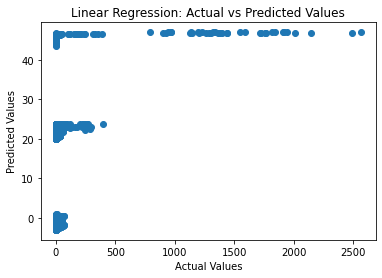

In [18]:
plt.scatter(y_test, lr_model_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.show()

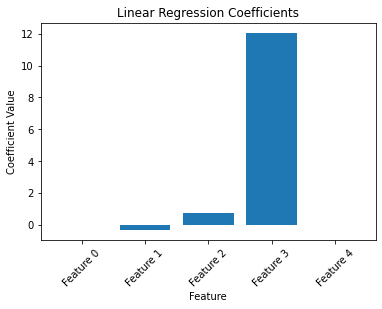

In [19]:
# Get coefficients and corresponding feature names
coefficients = lr_model.coef_
feature_names = [f"Feature {i}" for i in range(len(coefficients))]

# Plotting
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

Radom Forest Regressor

In [20]:

from sklearn.ensemble import RandomForestRegressor

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_model_pred = rf_model.predict(X_test)

# Evaluation
rf_mse = mean_squared_error(y_test, rf_model_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_model_pred)
rf_mae = mean_absolute_error(y_test, rf_model_pred)

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert scores to positive values
rf_cv_scores_positive = -rf_cv_scores



print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("Mean Absolute Error:", rf_mae)
print("R^2 Score:", rf_r2)
print("CV Scores (Mean Squared Error):", rf_cv_scores_positive)
print("Average CV Score:", np.mean(rf_cv_scores_positive))
print("Feature Importances:", rf_model.feature_importances_)


# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  15:30:08
----------------------------------
Mean Squared Error: 4163.596115071841
Root Mean Squared Error: 64.52593366292224
Mean Absolute Error: 9.594796946717222
R^2 Score: 0.07713025624306147
CV Scores (Mean Squared Error): [32.54382036 35.20870047 71.81887061 44.52129256 36.51761191]
Average CV Score: 44.122059180231716
Feature Importances: [0.10249407 0.17250841 0.67022434 0.05041971 0.00435346]
----------------------------------
Elapsed time: 1.33 minutes


In [21]:
    results['Model'].append('RandomForest')
    results['MAE'].append(rf_mae)
    results['MSE'].append(rf_mse)
    results['RMSE'].append(rf_rmse)
    results['Rsquared'].append(rf_r2)
    results['CVScore'].append(np.mean(rf_cv_scores_positive))
    predictions['RandomForest'] = rf_model_pred


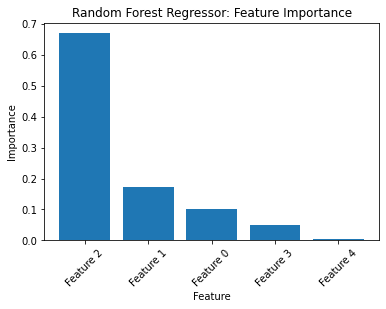

In [22]:
# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Get feature names (if available)
feature_names = [f"Feature {i}" for i in range(len(feature_importances))]

# Sort features based on importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Regressor: Feature Importance')
plt.show()

Gradient Boosting Machines (GBM): Models like XGBoost, LightGBM, or CatBoost are very popular for their performance in a variety of tasks. They can handle non-linear relationships and interactions between features effectively.

In [23]:
import xgboost as xgb



# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    # Add other parameters as needed
}

xgb_model = xgb.XGBRegressor()
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='neg_mean_squared_error')

xgb_grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
best_xgb_model = xgb_grid_search.best_estimator_

# Predictions
xgb_pred = best_xgb_model.predict(X_test)

# Evaluation
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)

# Cross-Validation Scores
xgb_cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores_positive = -xgb_cv_scores

print("XGBoost Evaluation Metrics")
print("Mean Squared Error:", xgb_mse)
print("Root Mean Squared Error:", xgb_rmse)
print("Mean Absolute Error:", xgb_mae)
print("R^2 Score:", xgb_r2)
print("CV Scores (Mean Squared Error):", xgb_cv_scores_positive)
print("Average CV Score:", np.mean(xgb_cv_scores_positive))



# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  15:31:59
----------------------------------
Best parameters for XGBoost: {'learning_rate': 0.2, 'n_estimators': 300}
XGBoost Evaluation Metrics
Mean Squared Error: 5330.602370835773
Root Mean Squared Error: 73.01097431780906
Mean Absolute Error: 14.878010856842975
R^2 Score: -0.18153910900131964
CV Scores (Mean Squared Error): [33.49716833 39.31065333 64.42457273 37.01470288 35.01309017]
Average CV Score: 41.85203748926827
----------------------------------
Elapsed time: 0.31 minutes


In [24]:
    results['Model'].append('XGBoost')
    results['MAE'].append(xgb_mae)
    results['MSE'].append(xgb_mse)
    results['RMSE'].append(xgb_rmse)
    results['Rsquared'].append(xgb_r2)
    results['CVScore'].append(np.mean(xgb_cv_scores_positive))
    predictions['XGBoost'] = xgb_pred

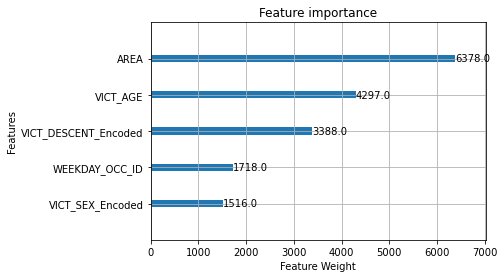

In [25]:
xgb.plot_importance(best_xgb_model, importance_type='weight', xlabel='Feature Weight')
plt.show()

In [26]:
from catboost import CatBoostRegressor, Pool

# Start time
start_time = time.time()
current_time = datetime.now()
print('Started at: ', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for CatBoost
cat_param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
}


cat_model = CatBoostRegressor()
cat_grid_search = GridSearchCV(cat_model, cat_param_grid, cv=5, scoring='neg_mean_squared_error')
cat_grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for CatBoost:", cat_grid_search.best_params_)
best_cat_model = cat_grid_search.best_estimator_

# Predictions
cat_pred = best_cat_model.predict(X_test)

pool = Pool(X_train, label=y_train)

# Evaluation
cat_mse = mean_squared_error(y_test, cat_pred)
cat_rmse = np.sqrt(cat_mse)
cat_r2 = r2_score(y_test, cat_pred)
cat_mae = mean_absolute_error(y_test, cat_pred)

# Cross-Validation Scores
cat_cv_scores = cross_val_score(best_cat_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cat_cv_scores_positive = -cat_cv_scores

print("CatBoost Evaluation Metrics")
print("Mean Squared Error:", cat_mse)
print("Root Mean Squared Error:", cat_rmse)
print("Mean Absolute Error:", cat_mae)
print("R^2 Score:", cat_r2)
print("CV Scores (Mean Squared Error):", cat_cv_scores_positive)
print("Average CV Score:", np.mean(cat_cv_scores_positive))






# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))

Started at:  15:32:18
----------------------------------
0:	learn: 61.2775634	total: 61.8ms	remaining: 1m 1s
1:	learn: 60.7624057	total: 65ms	remaining: 32.5s
2:	learn: 60.2626066	total: 68.4ms	remaining: 22.7s
3:	learn: 59.7612683	total: 71.6ms	remaining: 17.8s
4:	learn: 59.2717553	total: 75ms	remaining: 14.9s
5:	learn: 58.7779329	total: 78.3ms	remaining: 13s
6:	learn: 58.2899191	total: 81.5ms	remaining: 11.6s
7:	learn: 57.8155669	total: 84.7ms	remaining: 10.5s
8:	learn: 57.3376578	total: 87.7ms	remaining: 9.65s
9:	learn: 56.8631388	total: 91ms	remaining: 9.01s
10:	learn: 56.3964836	total: 94.3ms	remaining: 8.48s
11:	learn: 55.9336165	total: 97.6ms	remaining: 8.03s
12:	learn: 55.4776995	total: 101ms	remaining: 7.66s
13:	learn: 55.0247323	total: 104ms	remaining: 7.33s
14:	learn: 54.5839936	total: 107ms	remaining: 7.04s
15:	learn: 54.1429377	total: 110ms	remaining: 6.79s
16:	learn: 53.7065955	total: 114ms	remaining: 6.58s
17:	learn: 53.2901086	total: 117ms	remaining: 6.38s
18:	learn: 52

159:	learn: 23.6818568	total: 557ms	remaining: 2.92s
160:	learn: 23.5986974	total: 560ms	remaining: 2.92s
161:	learn: 23.5264716	total: 564ms	remaining: 2.92s
162:	learn: 23.4448670	total: 567ms	remaining: 2.91s
163:	learn: 23.3741574	total: 572ms	remaining: 2.91s
164:	learn: 23.3044797	total: 575ms	remaining: 2.91s
165:	learn: 23.2426899	total: 579ms	remaining: 2.91s
166:	learn: 23.1733233	total: 582ms	remaining: 2.9s
167:	learn: 23.1068810	total: 586ms	remaining: 2.9s
168:	learn: 23.0310874	total: 590ms	remaining: 2.9s
169:	learn: 22.9668224	total: 594ms	remaining: 2.9s
170:	learn: 22.9027047	total: 598ms	remaining: 2.9s
171:	learn: 22.8378319	total: 601ms	remaining: 2.89s
172:	learn: 22.7655428	total: 605ms	remaining: 2.89s
173:	learn: 22.7015932	total: 608ms	remaining: 2.89s
174:	learn: 22.6310864	total: 611ms	remaining: 2.88s
175:	learn: 22.5702237	total: 615ms	remaining: 2.88s
176:	learn: 22.5089434	total: 618ms	remaining: 2.88s
177:	learn: 22.4505903	total: 622ms	remaining: 2.87

341:	learn: 17.3083524	total: 1.13s	remaining: 2.18s
342:	learn: 17.2960399	total: 1.14s	remaining: 2.18s
343:	learn: 17.2843666	total: 1.14s	remaining: 2.17s
344:	learn: 17.2724951	total: 1.14s	remaining: 2.17s
345:	learn: 17.2596793	total: 1.15s	remaining: 2.17s
346:	learn: 17.2480335	total: 1.15s	remaining: 2.17s
347:	learn: 17.2362862	total: 1.16s	remaining: 2.16s
348:	learn: 17.2146362	total: 1.16s	remaining: 2.16s
349:	learn: 17.2031937	total: 1.16s	remaining: 2.15s
350:	learn: 17.1905280	total: 1.16s	remaining: 2.15s
351:	learn: 17.1691468	total: 1.17s	remaining: 2.15s
352:	learn: 17.1576417	total: 1.17s	remaining: 2.14s
353:	learn: 17.1454830	total: 1.17s	remaining: 2.14s
354:	learn: 17.1360952	total: 1.18s	remaining: 2.14s
355:	learn: 17.1251809	total: 1.18s	remaining: 2.13s
356:	learn: 17.1141109	total: 1.18s	remaining: 2.13s
357:	learn: 17.0950849	total: 1.19s	remaining: 2.13s
358:	learn: 17.0823107	total: 1.19s	remaining: 2.12s
359:	learn: 17.0718309	total: 1.19s	remaining:

525:	learn: 15.9128694	total: 1.72s	remaining: 1.55s
526:	learn: 15.9066861	total: 1.72s	remaining: 1.54s
527:	learn: 15.9033947	total: 1.72s	remaining: 1.54s
528:	learn: 15.8988066	total: 1.73s	remaining: 1.54s
529:	learn: 15.8946905	total: 1.73s	remaining: 1.53s
530:	learn: 15.8904588	total: 1.73s	remaining: 1.53s
531:	learn: 15.8752015	total: 1.74s	remaining: 1.53s
532:	learn: 15.8705763	total: 1.74s	remaining: 1.52s
533:	learn: 15.8681255	total: 1.74s	remaining: 1.52s
534:	learn: 15.8622677	total: 1.74s	remaining: 1.52s
535:	learn: 15.8565221	total: 1.75s	remaining: 1.51s
536:	learn: 15.8516130	total: 1.75s	remaining: 1.51s
537:	learn: 15.8475475	total: 1.75s	remaining: 1.51s
538:	learn: 15.8448945	total: 1.76s	remaining: 1.5s
539:	learn: 15.8393447	total: 1.76s	remaining: 1.5s
540:	learn: 15.8361472	total: 1.76s	remaining: 1.5s
541:	learn: 15.8339388	total: 1.77s	remaining: 1.49s
542:	learn: 15.8316250	total: 1.77s	remaining: 1.49s
543:	learn: 15.8293829	total: 1.77s	remaining: 1.

718:	learn: 15.1153034	total: 2.3s	remaining: 899ms
719:	learn: 15.1124162	total: 2.3s	remaining: 896ms
720:	learn: 15.1104255	total: 2.31s	remaining: 893ms
721:	learn: 15.1069445	total: 2.31s	remaining: 890ms
722:	learn: 15.1036676	total: 2.31s	remaining: 887ms
723:	learn: 15.0998754	total: 2.32s	remaining: 884ms
724:	learn: 15.0984784	total: 2.32s	remaining: 880ms
725:	learn: 15.0974903	total: 2.32s	remaining: 877ms
726:	learn: 15.0965145	total: 2.33s	remaining: 874ms
727:	learn: 15.0950041	total: 2.33s	remaining: 871ms
728:	learn: 15.0930422	total: 2.33s	remaining: 867ms
729:	learn: 15.0917298	total: 2.34s	remaining: 864ms
730:	learn: 15.0896593	total: 2.34s	remaining: 861ms
731:	learn: 15.0881056	total: 2.34s	remaining: 858ms
732:	learn: 15.0865941	total: 2.35s	remaining: 854ms
733:	learn: 15.0848419	total: 2.35s	remaining: 851ms
734:	learn: 15.0835660	total: 2.35s	remaining: 848ms
735:	learn: 15.0824908	total: 2.35s	remaining: 845ms
736:	learn: 15.0811407	total: 2.36s	remaining: 8

883:	learn: 14.6985104	total: 2.89s	remaining: 379ms
884:	learn: 14.6977762	total: 2.89s	remaining: 376ms
885:	learn: 14.6961336	total: 2.9s	remaining: 373ms
886:	learn: 14.6947888	total: 2.9s	remaining: 369ms
887:	learn: 14.6935286	total: 2.9s	remaining: 366ms
888:	learn: 14.6923079	total: 2.91s	remaining: 363ms
889:	learn: 14.6906560	total: 2.91s	remaining: 360ms
890:	learn: 14.6895515	total: 2.92s	remaining: 357ms
891:	learn: 14.6887287	total: 2.92s	remaining: 354ms
892:	learn: 14.6833332	total: 2.92s	remaining: 350ms
893:	learn: 14.6802693	total: 2.93s	remaining: 347ms
894:	learn: 14.6714082	total: 2.93s	remaining: 344ms
895:	learn: 14.6699939	total: 2.93s	remaining: 341ms
896:	learn: 14.6669166	total: 2.94s	remaining: 337ms
897:	learn: 14.6658349	total: 2.94s	remaining: 334ms
898:	learn: 14.6645708	total: 2.94s	remaining: 331ms
899:	learn: 14.6629805	total: 2.95s	remaining: 328ms
900:	learn: 14.6617855	total: 2.95s	remaining: 324ms
901:	learn: 14.6609742	total: 2.96s	remaining: 32

83:	learn: 32.6465031	total: 250ms	remaining: 2.72s
84:	learn: 32.4453485	total: 253ms	remaining: 2.72s
85:	learn: 32.2517679	total: 256ms	remaining: 2.72s
86:	learn: 32.0601460	total: 260ms	remaining: 2.73s
87:	learn: 31.8724449	total: 263ms	remaining: 2.73s
88:	learn: 31.6868526	total: 266ms	remaining: 2.72s
89:	learn: 31.5064697	total: 269ms	remaining: 2.72s
90:	learn: 31.3214724	total: 272ms	remaining: 2.71s
91:	learn: 31.1441656	total: 274ms	remaining: 2.71s
92:	learn: 30.9645417	total: 277ms	remaining: 2.7s
93:	learn: 30.7904773	total: 280ms	remaining: 2.7s
94:	learn: 30.6158019	total: 284ms	remaining: 2.7s
95:	learn: 30.4424670	total: 287ms	remaining: 2.7s
96:	learn: 30.2701816	total: 290ms	remaining: 2.7s
97:	learn: 30.1052278	total: 293ms	remaining: 2.7s
98:	learn: 29.9385071	total: 296ms	remaining: 2.7s
99:	learn: 29.7762730	total: 300ms	remaining: 2.7s
100:	learn: 29.6138411	total: 302ms	remaining: 2.69s
101:	learn: 29.4578333	total: 305ms	remaining: 2.68s
102:	learn: 29.299

273:	learn: 18.3216481	total: 832ms	remaining: 2.21s
274:	learn: 18.3023436	total: 836ms	remaining: 2.2s
275:	learn: 18.2718749	total: 839ms	remaining: 2.2s
276:	learn: 18.2542521	total: 843ms	remaining: 2.2s
277:	learn: 18.2383402	total: 847ms	remaining: 2.2s
278:	learn: 18.2209088	total: 850ms	remaining: 2.19s
279:	learn: 18.1913318	total: 853ms	remaining: 2.19s
280:	learn: 18.1742348	total: 856ms	remaining: 2.19s
281:	learn: 18.1591517	total: 860ms	remaining: 2.19s
282:	learn: 18.1438244	total: 863ms	remaining: 2.19s
283:	learn: 18.1149285	total: 866ms	remaining: 2.18s
284:	learn: 18.0851236	total: 868ms	remaining: 2.18s
285:	learn: 18.0557404	total: 872ms	remaining: 2.18s
286:	learn: 18.0412875	total: 875ms	remaining: 2.17s
287:	learn: 18.0098265	total: 879ms	remaining: 2.17s
288:	learn: 17.9966062	total: 882ms	remaining: 2.17s
289:	learn: 17.9826218	total: 885ms	remaining: 2.17s
290:	learn: 17.9690752	total: 887ms	remaining: 2.16s
291:	learn: 17.9541810	total: 890ms	remaining: 2.1

442:	learn: 16.0742514	total: 1.42s	remaining: 1.78s
443:	learn: 16.0660973	total: 1.42s	remaining: 1.78s
444:	learn: 16.0608214	total: 1.43s	remaining: 1.78s
445:	learn: 16.0556051	total: 1.43s	remaining: 1.78s
446:	learn: 16.0510309	total: 1.43s	remaining: 1.77s
447:	learn: 16.0459388	total: 1.44s	remaining: 1.77s
448:	learn: 16.0406168	total: 1.44s	remaining: 1.77s
449:	learn: 16.0348248	total: 1.44s	remaining: 1.76s
450:	learn: 16.0275123	total: 1.45s	remaining: 1.76s
451:	learn: 16.0200491	total: 1.45s	remaining: 1.76s
452:	learn: 16.0151933	total: 1.45s	remaining: 1.75s
453:	learn: 16.0081541	total: 1.46s	remaining: 1.75s
454:	learn: 16.0033896	total: 1.46s	remaining: 1.75s
455:	learn: 15.9988867	total: 1.46s	remaining: 1.75s
456:	learn: 15.9944028	total: 1.47s	remaining: 1.74s
457:	learn: 15.9882070	total: 1.47s	remaining: 1.74s
458:	learn: 15.9836547	total: 1.47s	remaining: 1.74s
459:	learn: 15.9782812	total: 1.48s	remaining: 1.73s
460:	learn: 15.9706384	total: 1.48s	remaining:

608:	learn: 15.3280585	total: 2s	remaining: 1.29s
609:	learn: 15.3157760	total: 2.01s	remaining: 1.28s
610:	learn: 15.3135104	total: 2.01s	remaining: 1.28s
611:	learn: 15.3102628	total: 2.02s	remaining: 1.28s
612:	learn: 15.3080683	total: 2.02s	remaining: 1.27s
613:	learn: 15.3050876	total: 2.02s	remaining: 1.27s
614:	learn: 15.3024567	total: 2.03s	remaining: 1.27s
615:	learn: 15.2998353	total: 2.03s	remaining: 1.27s
616:	learn: 15.2984238	total: 2.04s	remaining: 1.26s
617:	learn: 15.2952415	total: 2.04s	remaining: 1.26s
618:	learn: 15.2918350	total: 2.04s	remaining: 1.26s
619:	learn: 15.2893388	total: 2.05s	remaining: 1.25s
620:	learn: 15.2871994	total: 2.05s	remaining: 1.25s
621:	learn: 15.2794173	total: 2.05s	remaining: 1.25s
622:	learn: 15.2770748	total: 2.06s	remaining: 1.25s
623:	learn: 15.2753783	total: 2.06s	remaining: 1.24s
624:	learn: 15.2721277	total: 2.06s	remaining: 1.24s
625:	learn: 15.2708861	total: 2.07s	remaining: 1.24s
626:	learn: 15.2685668	total: 2.07s	remaining: 1.

780:	learn: 14.7753907	total: 2.59s	remaining: 725ms
781:	learn: 14.7738117	total: 2.59s	remaining: 722ms
782:	learn: 14.7725979	total: 2.59s	remaining: 719ms
783:	learn: 14.7590147	total: 2.6s	remaining: 716ms
784:	learn: 14.7474170	total: 2.6s	remaining: 712ms
785:	learn: 14.7462481	total: 2.6s	remaining: 709ms
786:	learn: 14.7281911	total: 2.61s	remaining: 706ms
787:	learn: 14.7265372	total: 2.61s	remaining: 702ms
788:	learn: 14.7256749	total: 2.61s	remaining: 699ms
789:	learn: 14.7233674	total: 2.62s	remaining: 696ms
790:	learn: 14.7213690	total: 2.62s	remaining: 692ms
791:	learn: 14.7199169	total: 2.62s	remaining: 689ms
792:	learn: 14.7178038	total: 2.63s	remaining: 686ms
793:	learn: 14.7165349	total: 2.63s	remaining: 683ms
794:	learn: 14.7151946	total: 2.63s	remaining: 679ms
795:	learn: 14.7137776	total: 2.64s	remaining: 676ms
796:	learn: 14.7111481	total: 2.64s	remaining: 673ms
797:	learn: 14.7102544	total: 2.64s	remaining: 669ms
798:	learn: 14.6924503	total: 2.65s	remaining: 66

964:	learn: 14.1879088	total: 3.17s	remaining: 115ms
965:	learn: 14.1868903	total: 3.18s	remaining: 112ms
966:	learn: 14.1843388	total: 3.18s	remaining: 109ms
967:	learn: 14.1835693	total: 3.18s	remaining: 105ms
968:	learn: 14.1737478	total: 3.19s	remaining: 102ms
969:	learn: 14.1726127	total: 3.19s	remaining: 98.7ms
970:	learn: 14.1623686	total: 3.19s	remaining: 95.4ms
971:	learn: 14.1604164	total: 3.2s	remaining: 92.1ms
972:	learn: 14.1592870	total: 3.2s	remaining: 88.8ms
973:	learn: 14.1569259	total: 3.2s	remaining: 85.5ms
974:	learn: 14.1545285	total: 3.21s	remaining: 82.2ms
975:	learn: 14.1529511	total: 3.21s	remaining: 78.9ms
976:	learn: 14.1505804	total: 3.21s	remaining: 75.6ms
977:	learn: 14.1486468	total: 3.21s	remaining: 72.3ms
978:	learn: 14.1480329	total: 3.22s	remaining: 69ms
979:	learn: 14.1457482	total: 3.22s	remaining: 65.7ms
980:	learn: 14.1443161	total: 3.22s	remaining: 62.5ms
981:	learn: 14.1432241	total: 3.23s	remaining: 59.2ms
982:	learn: 14.1419805	total: 3.23s	re

157:	learn: 23.8973553	total: 447ms	remaining: 2.38s
158:	learn: 23.8116473	total: 451ms	remaining: 2.38s
159:	learn: 23.7274381	total: 454ms	remaining: 2.38s
160:	learn: 23.6554461	total: 457ms	remaining: 2.38s
161:	learn: 23.5724840	total: 461ms	remaining: 2.38s
162:	learn: 23.5012144	total: 464ms	remaining: 2.38s
163:	learn: 23.4226504	total: 467ms	remaining: 2.38s
164:	learn: 23.3438280	total: 470ms	remaining: 2.38s
165:	learn: 23.2681996	total: 473ms	remaining: 2.38s
166:	learn: 23.1909375	total: 476ms	remaining: 2.37s
167:	learn: 23.1264387	total: 479ms	remaining: 2.37s
168:	learn: 23.0529707	total: 482ms	remaining: 2.37s
169:	learn: 22.9882065	total: 484ms	remaining: 2.36s
170:	learn: 22.9263826	total: 487ms	remaining: 2.36s
171:	learn: 22.8648192	total: 490ms	remaining: 2.36s
172:	learn: 22.7903160	total: 493ms	remaining: 2.36s
173:	learn: 22.7291566	total: 496ms	remaining: 2.36s
174:	learn: 22.6709873	total: 499ms	remaining: 2.35s
175:	learn: 22.6125285	total: 502ms	remaining:

355:	learn: 17.0553362	total: 1.03s	remaining: 1.87s
356:	learn: 17.0434841	total: 1.04s	remaining: 1.87s
357:	learn: 17.0324490	total: 1.04s	remaining: 1.87s
358:	learn: 17.0214064	total: 1.04s	remaining: 1.87s
359:	learn: 17.0091663	total: 1.05s	remaining: 1.86s
360:	learn: 16.9980517	total: 1.05s	remaining: 1.86s
361:	learn: 16.9865088	total: 1.05s	remaining: 1.86s
362:	learn: 16.9701672	total: 1.06s	remaining: 1.86s
363:	learn: 16.9594703	total: 1.06s	remaining: 1.85s
364:	learn: 16.9486768	total: 1.06s	remaining: 1.85s
365:	learn: 16.9234036	total: 1.07s	remaining: 1.85s
366:	learn: 16.9120045	total: 1.07s	remaining: 1.85s
367:	learn: 16.9010916	total: 1.07s	remaining: 1.84s
368:	learn: 16.8913117	total: 1.08s	remaining: 1.84s
369:	learn: 16.8805788	total: 1.08s	remaining: 1.84s
370:	learn: 16.8705919	total: 1.08s	remaining: 1.83s
371:	learn: 16.8607129	total: 1.08s	remaining: 1.83s
372:	learn: 16.8506114	total: 1.09s	remaining: 1.83s
373:	learn: 16.8408048	total: 1.09s	remaining:

539:	learn: 15.6896923	total: 1.62s	remaining: 1.38s
540:	learn: 15.6850686	total: 1.63s	remaining: 1.38s
541:	learn: 15.6828001	total: 1.63s	remaining: 1.38s
542:	learn: 15.6787537	total: 1.63s	remaining: 1.37s
543:	learn: 15.6764543	total: 1.64s	remaining: 1.37s
544:	learn: 15.6724541	total: 1.64s	remaining: 1.37s
545:	learn: 15.6693034	total: 1.64s	remaining: 1.36s
546:	learn: 15.6659073	total: 1.64s	remaining: 1.36s
547:	learn: 15.6633807	total: 1.65s	remaining: 1.36s
548:	learn: 15.6589828	total: 1.65s	remaining: 1.36s
549:	learn: 15.6546048	total: 1.65s	remaining: 1.35s
550:	learn: 15.6499889	total: 1.66s	remaining: 1.35s
551:	learn: 15.6461924	total: 1.66s	remaining: 1.35s
552:	learn: 15.6423535	total: 1.66s	remaining: 1.34s
553:	learn: 15.6396660	total: 1.67s	remaining: 1.34s
554:	learn: 15.6370536	total: 1.67s	remaining: 1.34s
555:	learn: 15.6278773	total: 1.67s	remaining: 1.33s
556:	learn: 15.6245589	total: 1.67s	remaining: 1.33s
557:	learn: 15.6080542	total: 1.68s	remaining:

732:	learn: 14.9767176	total: 2.21s	remaining: 804ms
733:	learn: 14.9749691	total: 2.21s	remaining: 801ms
734:	learn: 14.9736674	total: 2.21s	remaining: 798ms
735:	learn: 14.9727428	total: 2.22s	remaining: 796ms
736:	learn: 14.9711374	total: 2.22s	remaining: 793ms
737:	learn: 14.9596348	total: 2.22s	remaining: 790ms
738:	learn: 14.9577654	total: 2.23s	remaining: 787ms
739:	learn: 14.9557298	total: 2.23s	remaining: 784ms
740:	learn: 14.9547525	total: 2.23s	remaining: 781ms
741:	learn: 14.9526252	total: 2.24s	remaining: 778ms
742:	learn: 14.9510721	total: 2.24s	remaining: 775ms
743:	learn: 14.9496207	total: 2.24s	remaining: 772ms
744:	learn: 14.9474404	total: 2.25s	remaining: 769ms
745:	learn: 14.9453689	total: 2.25s	remaining: 766ms
746:	learn: 14.9435516	total: 2.25s	remaining: 763ms
747:	learn: 14.9329109	total: 2.25s	remaining: 760ms
748:	learn: 14.9314334	total: 2.26s	remaining: 757ms
749:	learn: 14.9305578	total: 2.26s	remaining: 754ms
750:	learn: 14.9295033	total: 2.26s	remaining:

926:	learn: 14.3893083	total: 2.79s	remaining: 220ms
927:	learn: 14.3828451	total: 2.8s	remaining: 217ms
928:	learn: 14.3816835	total: 2.8s	remaining: 214ms
929:	learn: 14.3808370	total: 2.8s	remaining: 211ms
930:	learn: 14.3761188	total: 2.81s	remaining: 208ms
931:	learn: 14.3558484	total: 2.81s	remaining: 205ms
932:	learn: 14.3546808	total: 2.81s	remaining: 202ms
933:	learn: 14.3531507	total: 2.82s	remaining: 199ms
934:	learn: 14.3485443	total: 2.82s	remaining: 196ms
935:	learn: 14.3480177	total: 2.82s	remaining: 193ms
936:	learn: 14.3468680	total: 2.83s	remaining: 190ms
937:	learn: 14.3453557	total: 2.83s	remaining: 187ms
938:	learn: 14.3440102	total: 2.83s	remaining: 184ms
939:	learn: 14.3425323	total: 2.83s	remaining: 181ms
940:	learn: 14.3225508	total: 2.84s	remaining: 178ms
941:	learn: 14.3213600	total: 2.84s	remaining: 175ms
942:	learn: 14.3156278	total: 2.84s	remaining: 172ms
943:	learn: 14.3145915	total: 2.85s	remaining: 169ms
944:	learn: 14.3140411	total: 2.85s	remaining: 16

117:	learn: 27.2316873	total: 336ms	remaining: 2.51s
118:	learn: 27.0989692	total: 339ms	remaining: 2.51s
119:	learn: 26.9650303	total: 342ms	remaining: 2.51s
120:	learn: 26.8387199	total: 345ms	remaining: 2.51s
121:	learn: 26.7158477	total: 354ms	remaining: 2.55s
122:	learn: 26.5886211	total: 359ms	remaining: 2.56s
123:	learn: 26.4684883	total: 363ms	remaining: 2.56s
124:	learn: 26.3469910	total: 366ms	remaining: 2.56s
125:	learn: 26.2310196	total: 369ms	remaining: 2.56s
126:	learn: 26.1088740	total: 373ms	remaining: 2.56s
127:	learn: 25.9913677	total: 376ms	remaining: 2.56s
128:	learn: 25.8775615	total: 379ms	remaining: 2.56s
129:	learn: 25.7675968	total: 382ms	remaining: 2.55s
130:	learn: 25.6550695	total: 385ms	remaining: 2.55s
131:	learn: 25.5412495	total: 388ms	remaining: 2.55s
132:	learn: 25.4351054	total: 391ms	remaining: 2.54s
133:	learn: 25.3256592	total: 393ms	remaining: 2.54s
134:	learn: 25.2145533	total: 397ms	remaining: 2.54s
135:	learn: 25.1081065	total: 400ms	remaining:

313:	learn: 17.1944566	total: 924ms	remaining: 2.02s
314:	learn: 17.1714987	total: 928ms	remaining: 2.02s
315:	learn: 17.1521628	total: 932ms	remaining: 2.02s
316:	learn: 17.1246075	total: 935ms	remaining: 2.02s
317:	learn: 17.1117998	total: 939ms	remaining: 2.01s
318:	learn: 17.0930373	total: 941ms	remaining: 2.01s
319:	learn: 17.0766134	total: 944ms	remaining: 2.01s
320:	learn: 17.0559860	total: 947ms	remaining: 2s
321:	learn: 17.0420111	total: 950ms	remaining: 2s
322:	learn: 17.0237440	total: 954ms	remaining: 2s
323:	learn: 17.0032973	total: 957ms	remaining: 2s
324:	learn: 16.9922261	total: 960ms	remaining: 1.99s
325:	learn: 16.9746243	total: 963ms	remaining: 1.99s
326:	learn: 16.9562152	total: 966ms	remaining: 1.99s
327:	learn: 16.9390282	total: 969ms	remaining: 1.99s
328:	learn: 16.9221294	total: 972ms	remaining: 1.98s
329:	learn: 16.9039461	total: 975ms	remaining: 1.98s
330:	learn: 16.8904811	total: 978ms	remaining: 1.98s
331:	learn: 16.8768665	total: 981ms	remaining: 1.97s
332:	

503:	learn: 15.3573608	total: 1.51s	remaining: 1.49s
504:	learn: 15.3527111	total: 1.51s	remaining: 1.48s
505:	learn: 15.3486379	total: 1.52s	remaining: 1.48s
506:	learn: 15.3433495	total: 1.52s	remaining: 1.48s
507:	learn: 15.3379628	total: 1.52s	remaining: 1.48s
508:	learn: 15.3333788	total: 1.53s	remaining: 1.47s
509:	learn: 15.3269404	total: 1.53s	remaining: 1.47s
510:	learn: 15.3210839	total: 1.53s	remaining: 1.47s
511:	learn: 15.3166030	total: 1.54s	remaining: 1.46s
512:	learn: 15.3124948	total: 1.54s	remaining: 1.46s
513:	learn: 15.3087650	total: 1.54s	remaining: 1.46s
514:	learn: 15.3027534	total: 1.55s	remaining: 1.46s
515:	learn: 15.2992200	total: 1.55s	remaining: 1.45s
516:	learn: 15.2939381	total: 1.55s	remaining: 1.45s
517:	learn: 15.2902240	total: 1.55s	remaining: 1.45s
518:	learn: 15.2870954	total: 1.56s	remaining: 1.44s
519:	learn: 15.2820725	total: 1.56s	remaining: 1.44s
520:	learn: 15.2779054	total: 1.56s	remaining: 1.44s
521:	learn: 15.2734574	total: 1.57s	remaining:

689:	learn: 14.6861598	total: 2.09s	remaining: 937ms
690:	learn: 14.6676647	total: 2.09s	remaining: 934ms
691:	learn: 14.6657293	total: 2.09s	remaining: 932ms
692:	learn: 14.6631220	total: 2.1s	remaining: 929ms
693:	learn: 14.6592433	total: 2.1s	remaining: 926ms
694:	learn: 14.6566813	total: 2.1s	remaining: 923ms
695:	learn: 14.6528325	total: 2.11s	remaining: 920ms
696:	learn: 14.6519422	total: 2.11s	remaining: 917ms
697:	learn: 14.6485688	total: 2.11s	remaining: 914ms
698:	learn: 14.6462482	total: 2.12s	remaining: 911ms
699:	learn: 14.6453773	total: 2.12s	remaining: 908ms
700:	learn: 14.6435657	total: 2.12s	remaining: 905ms
701:	learn: 14.6420710	total: 2.12s	remaining: 902ms
702:	learn: 14.6408870	total: 2.13s	remaining: 898ms
703:	learn: 14.6378834	total: 2.13s	remaining: 896ms
704:	learn: 14.6352694	total: 2.13s	remaining: 893ms
705:	learn: 14.6335097	total: 2.14s	remaining: 890ms
706:	learn: 14.6320523	total: 2.14s	remaining: 887ms
707:	learn: 14.6303284	total: 2.14s	remaining: 88

879:	learn: 14.1280271	total: 2.67s	remaining: 364ms
880:	learn: 14.1267937	total: 2.67s	remaining: 361ms
881:	learn: 14.1241088	total: 2.68s	remaining: 358ms
882:	learn: 14.1186743	total: 2.68s	remaining: 355ms
883:	learn: 14.1174360	total: 2.69s	remaining: 352ms
884:	learn: 14.1166794	total: 2.69s	remaining: 349ms
885:	learn: 14.1151055	total: 2.69s	remaining: 346ms
886:	learn: 14.1133633	total: 2.69s	remaining: 343ms
887:	learn: 14.1122663	total: 2.7s	remaining: 340ms
888:	learn: 14.1110846	total: 2.7s	remaining: 337ms
889:	learn: 14.1097308	total: 2.7s	remaining: 334ms
890:	learn: 14.1086041	total: 2.71s	remaining: 331ms
891:	learn: 14.1077861	total: 2.71s	remaining: 328ms
892:	learn: 14.1069937	total: 2.71s	remaining: 325ms
893:	learn: 14.1058700	total: 2.72s	remaining: 322ms
894:	learn: 14.0979418	total: 2.72s	remaining: 319ms
895:	learn: 14.0963502	total: 2.72s	remaining: 316ms
896:	learn: 14.0944054	total: 2.73s	remaining: 313ms
897:	learn: 14.0933423	total: 2.73s	remaining: 31

71:	learn: 34.1706137	total: 198ms	remaining: 2.55s
72:	learn: 33.9586147	total: 201ms	remaining: 2.55s
73:	learn: 33.7472087	total: 204ms	remaining: 2.55s
74:	learn: 33.5461177	total: 207ms	remaining: 2.55s
75:	learn: 33.3395674	total: 210ms	remaining: 2.56s
76:	learn: 33.1450607	total: 213ms	remaining: 2.56s
77:	learn: 32.9441173	total: 216ms	remaining: 2.55s
78:	learn: 32.7488412	total: 219ms	remaining: 2.55s
79:	learn: 32.5576958	total: 222ms	remaining: 2.55s
80:	learn: 32.3690023	total: 225ms	remaining: 2.55s
81:	learn: 32.1857305	total: 227ms	remaining: 2.55s
82:	learn: 32.0048134	total: 230ms	remaining: 2.54s
83:	learn: 31.8174175	total: 233ms	remaining: 2.54s
84:	learn: 31.6408912	total: 236ms	remaining: 2.54s
85:	learn: 31.4603867	total: 238ms	remaining: 2.53s
86:	learn: 31.2780628	total: 241ms	remaining: 2.53s
87:	learn: 31.0992067	total: 244ms	remaining: 2.53s
88:	learn: 30.9230399	total: 247ms	remaining: 2.53s
89:	learn: 30.7492213	total: 250ms	remaining: 2.52s
90:	learn: 3

273:	learn: 18.0935531	total: 786ms	remaining: 2.08s
274:	learn: 18.0763288	total: 789ms	remaining: 2.08s
275:	learn: 18.0545554	total: 792ms	remaining: 2.08s
276:	learn: 18.0376005	total: 796ms	remaining: 2.08s
277:	learn: 18.0171085	total: 799ms	remaining: 2.07s
278:	learn: 18.0015294	total: 802ms	remaining: 2.07s
279:	learn: 17.9762760	total: 805ms	remaining: 2.07s
280:	learn: 17.9582546	total: 808ms	remaining: 2.07s
281:	learn: 17.9431625	total: 811ms	remaining: 2.06s
282:	learn: 17.9272104	total: 814ms	remaining: 2.06s
283:	learn: 17.9027923	total: 817ms	remaining: 2.06s
284:	learn: 17.8824047	total: 820ms	remaining: 2.06s
285:	learn: 17.8620018	total: 823ms	remaining: 2.05s
286:	learn: 17.8467217	total: 825ms	remaining: 2.05s
287:	learn: 17.8200025	total: 829ms	remaining: 2.05s
288:	learn: 17.8041733	total: 831ms	remaining: 2.04s
289:	learn: 17.7897420	total: 835ms	remaining: 2.04s
290:	learn: 17.7743265	total: 837ms	remaining: 2.04s
291:	learn: 17.7526154	total: 840ms	remaining:

467:	learn: 15.7986594	total: 1.37s	remaining: 1.56s
468:	learn: 15.7946786	total: 1.38s	remaining: 1.56s
469:	learn: 15.7897194	total: 1.38s	remaining: 1.55s
470:	learn: 15.7840814	total: 1.38s	remaining: 1.55s
471:	learn: 15.7760574	total: 1.39s	remaining: 1.55s
472:	learn: 15.7677541	total: 1.39s	remaining: 1.55s
473:	learn: 15.7630905	total: 1.39s	remaining: 1.54s
474:	learn: 15.7589598	total: 1.4s	remaining: 1.54s
475:	learn: 15.7543307	total: 1.4s	remaining: 1.54s
476:	learn: 15.7484004	total: 1.4s	remaining: 1.54s
477:	learn: 15.7436430	total: 1.41s	remaining: 1.53s
478:	learn: 15.7291252	total: 1.41s	remaining: 1.53s
479:	learn: 15.7231034	total: 1.41s	remaining: 1.53s
480:	learn: 15.7155034	total: 1.41s	remaining: 1.53s
481:	learn: 15.7095817	total: 1.42s	remaining: 1.52s
482:	learn: 15.7042776	total: 1.42s	remaining: 1.52s
483:	learn: 15.6998995	total: 1.42s	remaining: 1.52s
484:	learn: 15.6919787	total: 1.43s	remaining: 1.51s
485:	learn: 15.6871037	total: 1.43s	remaining: 1.

657:	learn: 15.0345572	total: 1.96s	remaining: 1.02s
658:	learn: 15.0165204	total: 1.96s	remaining: 1.01s
659:	learn: 15.0024231	total: 1.96s	remaining: 1.01s
660:	learn: 14.9995997	total: 1.97s	remaining: 1.01s
661:	learn: 14.9986368	total: 1.97s	remaining: 1.01s
662:	learn: 14.9944650	total: 1.97s	remaining: 1s
663:	learn: 14.9922968	total: 1.98s	remaining: 1s
664:	learn: 14.9890127	total: 1.98s	remaining: 997ms
665:	learn: 14.9849024	total: 1.98s	remaining: 995ms
666:	learn: 14.9827824	total: 1.99s	remaining: 992ms
667:	learn: 14.9801688	total: 1.99s	remaining: 989ms
668:	learn: 14.9789082	total: 1.99s	remaining: 986ms
669:	learn: 14.9763383	total: 1.99s	remaining: 983ms
670:	learn: 14.9740220	total: 2s	remaining: 979ms
671:	learn: 14.9724248	total: 2s	remaining: 977ms
672:	learn: 14.9706588	total: 2s	remaining: 974ms
673:	learn: 14.9691975	total: 2.01s	remaining: 971ms
674:	learn: 14.9559012	total: 2.01s	remaining: 968ms
675:	learn: 14.9540688	total: 2.01s	remaining: 965ms
676:	lea

830:	learn: 14.5034170	total: 2.54s	remaining: 517ms
831:	learn: 14.5028207	total: 2.54s	remaining: 514ms
832:	learn: 14.5014938	total: 2.55s	remaining: 511ms
833:	learn: 14.4998942	total: 2.55s	remaining: 508ms
834:	learn: 14.4988441	total: 2.56s	remaining: 506ms
835:	learn: 14.4958791	total: 2.56s	remaining: 503ms
836:	learn: 14.4943389	total: 2.57s	remaining: 500ms
837:	learn: 14.4836092	total: 2.57s	remaining: 497ms
838:	learn: 14.4821717	total: 2.57s	remaining: 494ms
839:	learn: 14.4791960	total: 2.58s	remaining: 491ms
840:	learn: 14.4770564	total: 2.58s	remaining: 488ms
841:	learn: 14.4755546	total: 2.58s	remaining: 485ms
842:	learn: 14.4737022	total: 2.59s	remaining: 482ms
843:	learn: 14.4720959	total: 2.59s	remaining: 479ms
844:	learn: 14.4710171	total: 2.6s	remaining: 476ms
845:	learn: 14.4679939	total: 2.6s	remaining: 473ms
846:	learn: 14.4666561	total: 2.6s	remaining: 470ms
847:	learn: 14.4661706	total: 2.61s	remaining: 468ms
848:	learn: 14.4646362	total: 2.61s	remaining: 46

995:	learn: 14.0718176	total: 3.12s	remaining: 12.5ms
996:	learn: 14.0706338	total: 3.12s	remaining: 9.39ms
997:	learn: 14.0694731	total: 3.13s	remaining: 6.26ms
998:	learn: 14.0683149	total: 3.13s	remaining: 3.13ms
999:	learn: 14.0671427	total: 3.13s	remaining: 0us
0:	learn: 56.6238298	total: 3.02ms	remaining: 3.01s
1:	learn: 52.0204387	total: 5.51ms	remaining: 2.75s
2:	learn: 47.9875246	total: 8.02ms	remaining: 2.66s
3:	learn: 44.3342057	total: 10.5ms	remaining: 2.62s
4:	learn: 41.1482042	total: 13ms	remaining: 2.59s
5:	learn: 38.3160451	total: 15.5ms	remaining: 2.57s
6:	learn: 35.7697880	total: 18.3ms	remaining: 2.59s
7:	learn: 33.5742827	total: 20.8ms	remaining: 2.58s
8:	learn: 31.5959207	total: 23.4ms	remaining: 2.57s
9:	learn: 29.9048714	total: 26ms	remaining: 2.58s
10:	learn: 28.4423449	total: 28.5ms	remaining: 2.56s
11:	learn: 27.1682004	total: 30.9ms	remaining: 2.54s
12:	learn: 26.0433686	total: 33.4ms	remaining: 2.54s
13:	learn: 25.0418461	total: 36.2ms	remaining: 2.55s
14:	l

185:	learn: 11.9971295	total: 541ms	remaining: 2.37s
186:	learn: 11.9803952	total: 545ms	remaining: 2.37s
187:	learn: 11.9730194	total: 548ms	remaining: 2.37s
188:	learn: 11.9685173	total: 552ms	remaining: 2.37s
189:	learn: 11.9568659	total: 555ms	remaining: 2.37s
190:	learn: 11.9275299	total: 558ms	remaining: 2.36s
191:	learn: 11.9174540	total: 561ms	remaining: 2.36s
192:	learn: 11.9032181	total: 564ms	remaining: 2.36s
193:	learn: 11.8557384	total: 567ms	remaining: 2.35s
194:	learn: 11.7758816	total: 570ms	remaining: 2.35s
195:	learn: 11.7709966	total: 574ms	remaining: 2.35s
196:	learn: 11.7395659	total: 576ms	remaining: 2.35s
197:	learn: 11.7276374	total: 579ms	remaining: 2.35s
198:	learn: 11.7189620	total: 582ms	remaining: 2.34s
199:	learn: 11.7082117	total: 585ms	remaining: 2.34s
200:	learn: 11.6953919	total: 588ms	remaining: 2.34s
201:	learn: 11.6908251	total: 591ms	remaining: 2.33s
202:	learn: 11.6670615	total: 594ms	remaining: 2.33s
203:	learn: 11.6544164	total: 597ms	remaining:

378:	learn: 9.5323107	total: 1.12s	remaining: 1.84s
379:	learn: 9.5299114	total: 1.13s	remaining: 1.84s
380:	learn: 9.5206864	total: 1.13s	remaining: 1.83s
381:	learn: 9.4931725	total: 1.13s	remaining: 1.83s
382:	learn: 9.4861573	total: 1.14s	remaining: 1.83s
383:	learn: 9.4794914	total: 1.14s	remaining: 1.83s
384:	learn: 9.4656701	total: 1.14s	remaining: 1.83s
385:	learn: 9.4533296	total: 1.15s	remaining: 1.82s
386:	learn: 9.4492023	total: 1.15s	remaining: 1.82s
387:	learn: 9.4485418	total: 1.15s	remaining: 1.82s
388:	learn: 9.4474398	total: 1.16s	remaining: 1.81s
389:	learn: 9.4354848	total: 1.16s	remaining: 1.81s
390:	learn: 9.4216034	total: 1.16s	remaining: 1.81s
391:	learn: 9.4167551	total: 1.16s	remaining: 1.81s
392:	learn: 9.4128247	total: 1.17s	remaining: 1.8s
393:	learn: 9.4088665	total: 1.17s	remaining: 1.8s
394:	learn: 9.4047344	total: 1.17s	remaining: 1.8s
395:	learn: 9.3997303	total: 1.18s	remaining: 1.79s
396:	learn: 9.3878970	total: 1.18s	remaining: 1.79s
397:	learn: 9.3

571:	learn: 8.5577856	total: 1.71s	remaining: 1.28s
572:	learn: 8.5540421	total: 1.71s	remaining: 1.28s
573:	learn: 8.5529971	total: 1.72s	remaining: 1.27s
574:	learn: 8.5521903	total: 1.72s	remaining: 1.27s
575:	learn: 8.5500030	total: 1.72s	remaining: 1.27s
576:	learn: 8.5484427	total: 1.73s	remaining: 1.26s
577:	learn: 8.5467147	total: 1.73s	remaining: 1.26s
578:	learn: 8.5447862	total: 1.73s	remaining: 1.26s
579:	learn: 8.5392452	total: 1.74s	remaining: 1.26s
580:	learn: 8.5342681	total: 1.74s	remaining: 1.25s
581:	learn: 8.5316353	total: 1.74s	remaining: 1.25s
582:	learn: 8.5296470	total: 1.75s	remaining: 1.25s
583:	learn: 8.5272717	total: 1.75s	remaining: 1.25s
584:	learn: 8.5251286	total: 1.75s	remaining: 1.24s
585:	learn: 8.5222638	total: 1.75s	remaining: 1.24s
586:	learn: 8.5168488	total: 1.76s	remaining: 1.24s
587:	learn: 8.5149840	total: 1.76s	remaining: 1.23s
588:	learn: 8.5113436	total: 1.76s	remaining: 1.23s
589:	learn: 8.5036205	total: 1.77s	remaining: 1.23s
590:	learn: 

759:	learn: 8.0275802	total: 2.29s	remaining: 722ms
760:	learn: 8.0247992	total: 2.29s	remaining: 719ms
761:	learn: 8.0237222	total: 2.29s	remaining: 716ms
762:	learn: 8.0224691	total: 2.29s	remaining: 713ms
763:	learn: 8.0114554	total: 2.3s	remaining: 710ms
764:	learn: 8.0091397	total: 2.3s	remaining: 707ms
765:	learn: 8.0062129	total: 2.3s	remaining: 704ms
766:	learn: 8.0040061	total: 2.31s	remaining: 701ms
767:	learn: 8.0022408	total: 2.31s	remaining: 698ms
768:	learn: 8.0016757	total: 2.31s	remaining: 695ms
769:	learn: 7.9998857	total: 2.31s	remaining: 692ms
770:	learn: 7.9983272	total: 2.32s	remaining: 689ms
771:	learn: 7.9972487	total: 2.32s	remaining: 686ms
772:	learn: 7.9962240	total: 2.32s	remaining: 683ms
773:	learn: 7.9931533	total: 2.33s	remaining: 680ms
774:	learn: 7.9914517	total: 2.33s	remaining: 677ms
775:	learn: 7.9882504	total: 2.33s	remaining: 674ms
776:	learn: 7.9870271	total: 2.34s	remaining: 671ms
777:	learn: 7.9857573	total: 2.34s	remaining: 668ms
778:	learn: 7.9

951:	learn: 7.6749819	total: 2.87s	remaining: 145ms
952:	learn: 7.6733458	total: 2.87s	remaining: 142ms
953:	learn: 7.6724290	total: 2.88s	remaining: 139ms
954:	learn: 7.6707516	total: 2.88s	remaining: 136ms
955:	learn: 7.6698604	total: 2.88s	remaining: 133ms
956:	learn: 7.6674890	total: 2.89s	remaining: 130ms
957:	learn: 7.6652125	total: 2.89s	remaining: 127ms
958:	learn: 7.6608474	total: 2.89s	remaining: 124ms
959:	learn: 7.6599719	total: 2.9s	remaining: 121ms
960:	learn: 7.6592938	total: 2.9s	remaining: 118ms
961:	learn: 7.6573040	total: 2.9s	remaining: 115ms
962:	learn: 7.6545363	total: 2.91s	remaining: 112ms
963:	learn: 7.6527701	total: 2.91s	remaining: 109ms
964:	learn: 7.6518487	total: 2.91s	remaining: 106ms
965:	learn: 7.6494757	total: 2.92s	remaining: 103ms
966:	learn: 7.6486676	total: 2.92s	remaining: 99.6ms
967:	learn: 7.6468331	total: 2.92s	remaining: 96.6ms
968:	learn: 7.6460991	total: 2.92s	remaining: 93.6ms
969:	learn: 7.6437315	total: 2.93s	remaining: 90.6ms
970:	learn:

134:	learn: 13.0571250	total: 412ms	remaining: 2.64s
135:	learn: 13.0398976	total: 415ms	remaining: 2.64s
136:	learn: 13.0251688	total: 419ms	remaining: 2.64s
137:	learn: 12.9116358	total: 423ms	remaining: 2.64s
138:	learn: 12.9090234	total: 426ms	remaining: 2.64s
139:	learn: 12.9060329	total: 429ms	remaining: 2.64s
140:	learn: 12.8909477	total: 433ms	remaining: 2.64s
141:	learn: 12.8715706	total: 436ms	remaining: 2.63s
142:	learn: 12.7950185	total: 439ms	remaining: 2.63s
143:	learn: 12.6979397	total: 443ms	remaining: 2.63s
144:	learn: 12.6845014	total: 447ms	remaining: 2.63s
145:	learn: 12.6769350	total: 450ms	remaining: 2.63s
146:	learn: 12.6745815	total: 453ms	remaining: 2.63s
147:	learn: 12.6700887	total: 456ms	remaining: 2.63s
148:	learn: 12.6615800	total: 460ms	remaining: 2.63s
149:	learn: 12.6515641	total: 463ms	remaining: 2.63s
150:	learn: 12.6357892	total: 467ms	remaining: 2.62s
151:	learn: 12.5581682	total: 470ms	remaining: 2.62s
152:	learn: 12.5436425	total: 474ms	remaining:

313:	learn: 10.4353608	total: 991ms	remaining: 2.16s
314:	learn: 10.4161652	total: 994ms	remaining: 2.16s
315:	learn: 10.4134642	total: 997ms	remaining: 2.16s
316:	learn: 10.4089019	total: 1s	remaining: 2.15s
317:	learn: 10.3928555	total: 1s	remaining: 2.15s
318:	learn: 10.3883437	total: 1.01s	remaining: 2.15s
319:	learn: 10.3865414	total: 1.01s	remaining: 2.15s
320:	learn: 10.3824713	total: 1.01s	remaining: 2.15s
321:	learn: 10.3805193	total: 1.02s	remaining: 2.14s
322:	learn: 10.3768162	total: 1.02s	remaining: 2.14s
323:	learn: 10.3698630	total: 1.02s	remaining: 2.14s
324:	learn: 10.3682595	total: 1.03s	remaining: 2.13s
325:	learn: 10.3579141	total: 1.03s	remaining: 2.13s
326:	learn: 10.3538896	total: 1.03s	remaining: 2.13s
327:	learn: 10.3466764	total: 1.04s	remaining: 2.13s
328:	learn: 10.3433260	total: 1.04s	remaining: 2.13s
329:	learn: 10.3424891	total: 1.04s	remaining: 2.12s
330:	learn: 10.3250271	total: 1.05s	remaining: 2.12s
331:	learn: 10.3112272	total: 1.05s	remaining: 2.12s

495:	learn: 9.3300741	total: 1.57s	remaining: 1.6s
496:	learn: 9.3153740	total: 1.58s	remaining: 1.6s
497:	learn: 9.3097932	total: 1.58s	remaining: 1.59s
498:	learn: 9.2981109	total: 1.58s	remaining: 1.59s
499:	learn: 9.2955350	total: 1.59s	remaining: 1.59s
500:	learn: 9.2799581	total: 1.59s	remaining: 1.58s
501:	learn: 9.2728748	total: 1.59s	remaining: 1.58s
502:	learn: 9.2663322	total: 1.6s	remaining: 1.58s
503:	learn: 9.2652497	total: 1.6s	remaining: 1.57s
504:	learn: 9.2625202	total: 1.6s	remaining: 1.57s
505:	learn: 9.2569639	total: 1.61s	remaining: 1.57s
506:	learn: 9.2542361	total: 1.61s	remaining: 1.57s
507:	learn: 9.2515450	total: 1.61s	remaining: 1.56s
508:	learn: 9.2466721	total: 1.62s	remaining: 1.56s
509:	learn: 9.2439197	total: 1.62s	remaining: 1.56s
510:	learn: 9.2268416	total: 1.62s	remaining: 1.55s
511:	learn: 9.2248984	total: 1.63s	remaining: 1.55s
512:	learn: 9.2179646	total: 1.63s	remaining: 1.55s
513:	learn: 9.2157885	total: 1.63s	remaining: 1.54s
514:	learn: 9.205

673:	learn: 8.6568567	total: 2.16s	remaining: 1.04s
674:	learn: 8.6553782	total: 2.16s	remaining: 1.04s
675:	learn: 8.6473671	total: 2.16s	remaining: 1.04s
676:	learn: 8.6440825	total: 2.17s	remaining: 1.03s
677:	learn: 8.6405339	total: 2.17s	remaining: 1.03s
678:	learn: 8.6381037	total: 2.18s	remaining: 1.03s
679:	learn: 8.6349846	total: 2.18s	remaining: 1.02s
680:	learn: 8.6308710	total: 2.18s	remaining: 1.02s
681:	learn: 8.6250568	total: 2.19s	remaining: 1.02s
682:	learn: 8.6226729	total: 2.19s	remaining: 1.02s
683:	learn: 8.6200130	total: 2.19s	remaining: 1.01s
684:	learn: 8.6156980	total: 2.2s	remaining: 1.01s
685:	learn: 8.6137093	total: 2.2s	remaining: 1.01s
686:	learn: 8.6131781	total: 2.2s	remaining: 1s
687:	learn: 8.6122122	total: 2.21s	remaining: 1s
688:	learn: 8.6088910	total: 2.21s	remaining: 998ms
689:	learn: 8.6074945	total: 2.21s	remaining: 995ms
690:	learn: 8.6019845	total: 2.22s	remaining: 992ms
691:	learn: 8.5991294	total: 2.22s	remaining: 989ms
692:	learn: 8.5935359

843:	learn: 8.0527513	total: 2.73s	remaining: 505ms
844:	learn: 8.0507878	total: 2.74s	remaining: 502ms
845:	learn: 8.0478179	total: 2.74s	remaining: 499ms
846:	learn: 8.0465284	total: 2.74s	remaining: 496ms
847:	learn: 8.0410579	total: 2.76s	remaining: 494ms
848:	learn: 8.0391004	total: 2.76s	remaining: 491ms
849:	learn: 8.0376682	total: 2.77s	remaining: 488ms
850:	learn: 8.0322094	total: 2.77s	remaining: 485ms
851:	learn: 8.0312908	total: 2.77s	remaining: 482ms
852:	learn: 8.0276524	total: 2.78s	remaining: 478ms
853:	learn: 8.0266030	total: 2.78s	remaining: 475ms
854:	learn: 8.0259053	total: 2.78s	remaining: 472ms
855:	learn: 8.0232209	total: 2.79s	remaining: 469ms
856:	learn: 8.0193604	total: 2.79s	remaining: 466ms
857:	learn: 8.0184040	total: 2.79s	remaining: 462ms
858:	learn: 8.0173377	total: 2.79s	remaining: 459ms
859:	learn: 8.0113659	total: 2.8s	remaining: 456ms
860:	learn: 8.0072614	total: 2.8s	remaining: 453ms
861:	learn: 8.0037684	total: 2.81s	remaining: 449ms
862:	learn: 7.

9:	learn: 29.6395225	total: 27.4ms	remaining: 2.71s
10:	learn: 28.1795562	total: 30.1ms	remaining: 2.7s
11:	learn: 26.9111651	total: 33ms	remaining: 2.71s
12:	learn: 25.7766891	total: 35.8ms	remaining: 2.72s
13:	learn: 24.7686202	total: 38.6ms	remaining: 2.72s
14:	learn: 23.8036645	total: 41.7ms	remaining: 2.74s
15:	learn: 23.0568605	total: 44.4ms	remaining: 2.73s
16:	learn: 22.2895916	total: 47.9ms	remaining: 2.77s
17:	learn: 21.6198122	total: 51.4ms	remaining: 2.8s
18:	learn: 21.0990687	total: 54.3ms	remaining: 2.8s
19:	learn: 20.6716397	total: 57.2ms	remaining: 2.8s
20:	learn: 20.2355470	total: 60.5ms	remaining: 2.82s
21:	learn: 19.9192747	total: 63.4ms	remaining: 2.82s
22:	learn: 19.5202899	total: 66.6ms	remaining: 2.83s
23:	learn: 19.2694309	total: 70ms	remaining: 2.85s
24:	learn: 19.0602264	total: 73.2ms	remaining: 2.85s
25:	learn: 18.7593836	total: 76.1ms	remaining: 2.85s
26:	learn: 18.5839983	total: 78.8ms	remaining: 2.84s
27:	learn: 18.3325175	total: 81.7ms	remaining: 2.83s
28

180:	learn: 12.2513133	total: 615ms	remaining: 2.78s
181:	learn: 12.2278074	total: 618ms	remaining: 2.78s
182:	learn: 12.2077248	total: 621ms	remaining: 2.77s
183:	learn: 12.1830537	total: 625ms	remaining: 2.77s
184:	learn: 12.1725926	total: 628ms	remaining: 2.77s
185:	learn: 12.1695404	total: 631ms	remaining: 2.76s
186:	learn: 12.1645903	total: 634ms	remaining: 2.76s
187:	learn: 12.1017610	total: 638ms	remaining: 2.75s
188:	learn: 12.0939171	total: 642ms	remaining: 2.75s
189:	learn: 12.0792959	total: 646ms	remaining: 2.75s
190:	learn: 12.0669879	total: 649ms	remaining: 2.75s
191:	learn: 12.0541566	total: 652ms	remaining: 2.74s
192:	learn: 12.0516151	total: 655ms	remaining: 2.74s
193:	learn: 12.0499859	total: 658ms	remaining: 2.73s
194:	learn: 12.0481802	total: 662ms	remaining: 2.73s
195:	learn: 12.0341577	total: 665ms	remaining: 2.73s
196:	learn: 11.9898289	total: 668ms	remaining: 2.72s
197:	learn: 11.9832720	total: 671ms	remaining: 2.72s
198:	learn: 11.9811134	total: 674ms	remaining:

357:	learn: 9.8870243	total: 1.2s	remaining: 2.15s
358:	learn: 9.8836594	total: 1.21s	remaining: 2.15s
359:	learn: 9.8759864	total: 1.21s	remaining: 2.15s
360:	learn: 9.8753602	total: 1.21s	remaining: 2.14s
361:	learn: 9.8505290	total: 1.22s	remaining: 2.14s
362:	learn: 9.8464052	total: 1.22s	remaining: 2.14s
363:	learn: 9.8440166	total: 1.22s	remaining: 2.13s
364:	learn: 9.8419076	total: 1.23s	remaining: 2.13s
365:	learn: 9.8365534	total: 1.23s	remaining: 2.13s
366:	learn: 9.8314026	total: 1.23s	remaining: 2.13s
367:	learn: 9.8212697	total: 1.24s	remaining: 2.12s
368:	learn: 9.8025659	total: 1.24s	remaining: 2.12s
369:	learn: 9.7805723	total: 1.24s	remaining: 2.12s
370:	learn: 9.7795465	total: 1.25s	remaining: 2.11s
371:	learn: 9.7713086	total: 1.25s	remaining: 2.11s
372:	learn: 9.7680596	total: 1.25s	remaining: 2.1s
373:	learn: 9.7646389	total: 1.25s	remaining: 2.1s
374:	learn: 9.7630938	total: 1.26s	remaining: 2.1s
375:	learn: 9.7601414	total: 1.26s	remaining: 2.1s
376:	learn: 9.750

532:	learn: 8.8287542	total: 1.79s	remaining: 1.56s
533:	learn: 8.8257448	total: 1.79s	remaining: 1.56s
534:	learn: 8.8232995	total: 1.79s	remaining: 1.56s
535:	learn: 8.8217209	total: 1.8s	remaining: 1.56s
536:	learn: 8.8202971	total: 1.8s	remaining: 1.55s
537:	learn: 8.8168957	total: 1.8s	remaining: 1.55s
538:	learn: 8.8100723	total: 1.81s	remaining: 1.55s
539:	learn: 8.8086971	total: 1.81s	remaining: 1.54s
540:	learn: 8.8072447	total: 1.81s	remaining: 1.54s
541:	learn: 8.8047857	total: 1.82s	remaining: 1.54s
542:	learn: 8.8039020	total: 1.82s	remaining: 1.53s
543:	learn: 8.8020747	total: 1.82s	remaining: 1.53s
544:	learn: 8.7947873	total: 1.83s	remaining: 1.53s
545:	learn: 8.7915606	total: 1.83s	remaining: 1.52s
546:	learn: 8.7889583	total: 1.84s	remaining: 1.52s
547:	learn: 8.7880436	total: 1.84s	remaining: 1.52s
548:	learn: 8.7840973	total: 1.84s	remaining: 1.51s
549:	learn: 8.7809057	total: 1.85s	remaining: 1.51s
550:	learn: 8.7786637	total: 1.85s	remaining: 1.51s
551:	learn: 8.7

708:	learn: 8.1640105	total: 2.37s	remaining: 973ms
709:	learn: 8.1630416	total: 2.37s	remaining: 969ms
710:	learn: 8.1599298	total: 2.38s	remaining: 966ms
711:	learn: 8.1589017	total: 2.38s	remaining: 963ms
712:	learn: 8.1567248	total: 2.38s	remaining: 959ms
713:	learn: 8.1551754	total: 2.39s	remaining: 956ms
714:	learn: 8.1520525	total: 2.39s	remaining: 953ms
715:	learn: 8.1509899	total: 2.39s	remaining: 950ms
716:	learn: 8.1447869	total: 2.4s	remaining: 946ms
717:	learn: 8.1408570	total: 2.4s	remaining: 943ms
718:	learn: 8.1305602	total: 2.4s	remaining: 940ms
719:	learn: 8.1296367	total: 2.41s	remaining: 936ms
720:	learn: 8.1273270	total: 2.41s	remaining: 933ms
721:	learn: 8.1200317	total: 2.41s	remaining: 930ms
722:	learn: 8.1180033	total: 2.42s	remaining: 926ms
723:	learn: 8.1161438	total: 2.42s	remaining: 923ms
724:	learn: 8.1129379	total: 2.42s	remaining: 919ms
725:	learn: 8.1101717	total: 2.43s	remaining: 916ms
726:	learn: 8.1079256	total: 2.43s	remaining: 913ms
727:	learn: 8.1

882:	learn: 7.6441223	total: 2.95s	remaining: 391ms
883:	learn: 7.6412315	total: 2.96s	remaining: 388ms
884:	learn: 7.6370366	total: 2.96s	remaining: 385ms
885:	learn: 7.6263500	total: 2.96s	remaining: 381ms
886:	learn: 7.6253534	total: 2.97s	remaining: 378ms
887:	learn: 7.6247676	total: 2.97s	remaining: 375ms
888:	learn: 7.6220651	total: 2.98s	remaining: 371ms
889:	learn: 7.6194120	total: 2.98s	remaining: 368ms
890:	learn: 7.6186990	total: 2.98s	remaining: 365ms
891:	learn: 7.6172565	total: 2.98s	remaining: 361ms
892:	learn: 7.6160499	total: 2.99s	remaining: 358ms
893:	learn: 7.6142954	total: 2.99s	remaining: 355ms
894:	learn: 7.6132433	total: 3s	remaining: 352ms
895:	learn: 7.6131516	total: 3s	remaining: 348ms
896:	learn: 7.6116428	total: 3s	remaining: 345ms
897:	learn: 7.6104119	total: 3.01s	remaining: 342ms
898:	learn: 7.6087970	total: 3.01s	remaining: 338ms
899:	learn: 7.6077344	total: 3.01s	remaining: 335ms
900:	learn: 7.6034853	total: 3.02s	remaining: 331ms
901:	learn: 7.6001239

44:	learn: 15.5219716	total: 214ms	remaining: 4.54s
45:	learn: 15.4641671	total: 219ms	remaining: 4.54s
46:	learn: 15.4183815	total: 224ms	remaining: 4.54s
47:	learn: 15.3569930	total: 229ms	remaining: 4.55s
48:	learn: 15.3138516	total: 235ms	remaining: 4.56s
49:	learn: 15.2691296	total: 241ms	remaining: 4.58s
50:	learn: 15.2190344	total: 247ms	remaining: 4.59s
51:	learn: 15.1525011	total: 250ms	remaining: 4.56s
52:	learn: 15.1217411	total: 255ms	remaining: 4.56s
53:	learn: 15.0984310	total: 260ms	remaining: 4.55s
54:	learn: 15.0455667	total: 264ms	remaining: 4.53s
55:	learn: 15.0153905	total: 268ms	remaining: 4.51s
56:	learn: 14.9744653	total: 273ms	remaining: 4.51s
57:	learn: 14.9422486	total: 277ms	remaining: 4.5s
58:	learn: 14.8904007	total: 281ms	remaining: 4.48s
59:	learn: 14.8655330	total: 286ms	remaining: 4.47s
60:	learn: 14.8250411	total: 290ms	remaining: 4.47s
61:	learn: 14.8110119	total: 294ms	remaining: 4.45s
62:	learn: 14.7859031	total: 298ms	remaining: 4.43s
63:	learn: 14

205:	learn: 11.6712898	total: 792ms	remaining: 3.05s
206:	learn: 11.6689549	total: 795ms	remaining: 3.05s
207:	learn: 11.6639208	total: 799ms	remaining: 3.04s
208:	learn: 11.6605171	total: 802ms	remaining: 3.04s
209:	learn: 11.6479608	total: 806ms	remaining: 3.03s
210:	learn: 11.6358578	total: 810ms	remaining: 3.03s
211:	learn: 11.6338178	total: 814ms	remaining: 3.02s
212:	learn: 11.6298402	total: 817ms	remaining: 3.02s
213:	learn: 11.6128185	total: 820ms	remaining: 3.01s
214:	learn: 11.5567745	total: 823ms	remaining: 3.01s
215:	learn: 11.5340075	total: 827ms	remaining: 3s
216:	learn: 11.5326152	total: 830ms	remaining: 2.99s
217:	learn: 11.4893034	total: 833ms	remaining: 2.99s
218:	learn: 11.4864407	total: 836ms	remaining: 2.98s
219:	learn: 11.4778232	total: 839ms	remaining: 2.98s
220:	learn: 11.4745116	total: 843ms	remaining: 2.97s
221:	learn: 11.4651564	total: 846ms	remaining: 2.96s
222:	learn: 11.4633037	total: 848ms	remaining: 2.96s
223:	learn: 11.4022747	total: 852ms	remaining: 2.

394:	learn: 9.7170879	total: 1.38s	remaining: 2.11s
395:	learn: 9.7123190	total: 1.38s	remaining: 2.11s
396:	learn: 9.7111585	total: 1.39s	remaining: 2.1s
397:	learn: 9.7105753	total: 1.39s	remaining: 2.1s
398:	learn: 9.7081497	total: 1.39s	remaining: 2.1s
399:	learn: 9.7061800	total: 1.4s	remaining: 2.09s
400:	learn: 9.7022084	total: 1.4s	remaining: 2.09s
401:	learn: 9.6851984	total: 1.4s	remaining: 2.08s
402:	learn: 9.6830902	total: 1.41s	remaining: 2.08s
403:	learn: 9.6792739	total: 1.41s	remaining: 2.08s
404:	learn: 9.6775327	total: 1.41s	remaining: 2.07s
405:	learn: 9.6765758	total: 1.41s	remaining: 2.07s
406:	learn: 9.6721052	total: 1.42s	remaining: 2.06s
407:	learn: 9.6698203	total: 1.42s	remaining: 2.06s
408:	learn: 9.6690130	total: 1.42s	remaining: 2.06s
409:	learn: 9.6681357	total: 1.43s	remaining: 2.05s
410:	learn: 9.6657677	total: 1.43s	remaining: 2.05s
411:	learn: 9.6596150	total: 1.43s	remaining: 2.04s
412:	learn: 9.6544255	total: 1.44s	remaining: 2.04s
413:	learn: 9.6511

582:	learn: 8.7332559	total: 1.96s	remaining: 1.4s
583:	learn: 8.7277612	total: 1.97s	remaining: 1.4s
584:	learn: 8.7263165	total: 1.97s	remaining: 1.4s
585:	learn: 8.7238859	total: 1.97s	remaining: 1.39s
586:	learn: 8.7196491	total: 1.98s	remaining: 1.39s
587:	learn: 8.7155335	total: 1.98s	remaining: 1.39s
588:	learn: 8.7099979	total: 1.98s	remaining: 1.38s
589:	learn: 8.7050521	total: 1.99s	remaining: 1.38s
590:	learn: 8.7014663	total: 1.99s	remaining: 1.38s
591:	learn: 8.6985707	total: 1.99s	remaining: 1.37s
592:	learn: 8.6957578	total: 2s	remaining: 1.37s
593:	learn: 8.6948906	total: 2s	remaining: 1.37s
594:	learn: 8.6939391	total: 2s	remaining: 1.36s
595:	learn: 8.6917093	total: 2s	remaining: 1.36s
596:	learn: 8.6908425	total: 2.01s	remaining: 1.35s
597:	learn: 8.6852509	total: 2.01s	remaining: 1.35s
598:	learn: 8.6821353	total: 2.01s	remaining: 1.35s
599:	learn: 8.6761454	total: 2.02s	remaining: 1.34s
600:	learn: 8.6732244	total: 2.02s	remaining: 1.34s
601:	learn: 8.6700897	total

773:	learn: 8.1921182	total: 2.55s	remaining: 745ms
774:	learn: 8.1895807	total: 2.56s	remaining: 742ms
775:	learn: 8.1875967	total: 2.56s	remaining: 739ms
776:	learn: 8.1863558	total: 2.56s	remaining: 736ms
777:	learn: 8.1791701	total: 2.57s	remaining: 732ms
778:	learn: 8.1749358	total: 2.57s	remaining: 729ms
779:	learn: 8.1730675	total: 2.57s	remaining: 726ms
780:	learn: 8.1713912	total: 2.58s	remaining: 723ms
781:	learn: 8.1650412	total: 2.58s	remaining: 720ms
782:	learn: 8.1611712	total: 2.58s	remaining: 716ms
783:	learn: 8.1570322	total: 2.59s	remaining: 713ms
784:	learn: 8.1511941	total: 2.59s	remaining: 710ms
785:	learn: 8.1465109	total: 2.59s	remaining: 706ms
786:	learn: 8.1445101	total: 2.6s	remaining: 703ms
787:	learn: 8.1435161	total: 2.6s	remaining: 700ms
788:	learn: 8.1421867	total: 2.6s	remaining: 696ms
789:	learn: 8.1412222	total: 2.61s	remaining: 693ms
790:	learn: 8.1397638	total: 2.61s	remaining: 690ms
791:	learn: 8.1371047	total: 2.61s	remaining: 687ms
792:	learn: 8.1

946:	learn: 7.7306201	total: 3.13s	remaining: 175ms
947:	learn: 7.7288676	total: 3.14s	remaining: 172ms
948:	learn: 7.7254465	total: 3.14s	remaining: 169ms
949:	learn: 7.7238983	total: 3.15s	remaining: 166ms
950:	learn: 7.7229742	total: 3.15s	remaining: 162ms
951:	learn: 7.7215010	total: 3.15s	remaining: 159ms
952:	learn: 7.7205740	total: 3.16s	remaining: 156ms
953:	learn: 7.7191965	total: 3.16s	remaining: 152ms
954:	learn: 7.7183774	total: 3.17s	remaining: 149ms
955:	learn: 7.7179365	total: 3.17s	remaining: 146ms
956:	learn: 7.7166452	total: 3.17s	remaining: 143ms
957:	learn: 7.7150171	total: 3.17s	remaining: 139ms
958:	learn: 7.7147843	total: 3.18s	remaining: 136ms
959:	learn: 7.7135319	total: 3.18s	remaining: 133ms
960:	learn: 7.7126817	total: 3.18s	remaining: 129ms
961:	learn: 7.7118544	total: 3.19s	remaining: 126ms
962:	learn: 7.7012776	total: 3.19s	remaining: 123ms
963:	learn: 7.6988254	total: 3.19s	remaining: 119ms
964:	learn: 7.6977879	total: 3.2s	remaining: 116ms
965:	learn: 7

123:	learn: 13.3344878	total: 394ms	remaining: 2.78s
124:	learn: 13.3020662	total: 397ms	remaining: 2.78s
125:	learn: 13.2829959	total: 400ms	remaining: 2.77s
126:	learn: 13.2390169	total: 403ms	remaining: 2.77s
127:	learn: 13.1583579	total: 406ms	remaining: 2.77s
128:	learn: 13.1286115	total: 409ms	remaining: 2.76s
129:	learn: 13.1030285	total: 412ms	remaining: 2.76s
130:	learn: 13.0948105	total: 416ms	remaining: 2.76s
131:	learn: 13.0738401	total: 420ms	remaining: 2.76s
132:	learn: 13.0711588	total: 423ms	remaining: 2.76s
133:	learn: 13.0649003	total: 427ms	remaining: 2.76s
134:	learn: 13.0442449	total: 430ms	remaining: 2.75s
135:	learn: 13.0394328	total: 433ms	remaining: 2.75s
136:	learn: 13.0377416	total: 436ms	remaining: 2.75s
137:	learn: 13.0336661	total: 440ms	remaining: 2.75s
138:	learn: 13.0302480	total: 443ms	remaining: 2.74s
139:	learn: 13.0162958	total: 446ms	remaining: 2.74s
140:	learn: 12.9982273	total: 450ms	remaining: 2.74s
141:	learn: 12.9861606	total: 453ms	remaining:

306:	learn: 10.7803003	total: 976ms	remaining: 2.2s
307:	learn: 10.7567388	total: 980ms	remaining: 2.2s
308:	learn: 10.7363380	total: 983ms	remaining: 2.2s
309:	learn: 10.7343708	total: 987ms	remaining: 2.2s
310:	learn: 10.7188395	total: 990ms	remaining: 2.19s
311:	learn: 10.6810287	total: 994ms	remaining: 2.19s
312:	learn: 10.6765738	total: 997ms	remaining: 2.19s
313:	learn: 10.6743064	total: 1s	remaining: 2.19s
314:	learn: 10.6682969	total: 1s	remaining: 2.19s
315:	learn: 10.6610672	total: 1.01s	remaining: 2.18s
316:	learn: 10.6568182	total: 1.01s	remaining: 2.18s
317:	learn: 10.6512251	total: 1.01s	remaining: 2.17s
318:	learn: 10.6482543	total: 1.02s	remaining: 2.17s
319:	learn: 10.6476037	total: 1.02s	remaining: 2.17s
320:	learn: 10.6448176	total: 1.02s	remaining: 2.17s
321:	learn: 10.6326706	total: 1.03s	remaining: 2.16s
322:	learn: 10.6279084	total: 1.03s	remaining: 2.16s
323:	learn: 10.6157732	total: 1.03s	remaining: 2.16s
324:	learn: 10.6117893	total: 1.04s	remaining: 2.15s
325

465:	learn: 9.6025443	total: 1.55s	remaining: 1.78s
466:	learn: 9.5978062	total: 1.56s	remaining: 1.78s
467:	learn: 9.5908317	total: 1.56s	remaining: 1.78s
468:	learn: 9.5893123	total: 1.57s	remaining: 1.78s
469:	learn: 9.5800833	total: 1.57s	remaining: 1.77s
470:	learn: 9.5761003	total: 1.58s	remaining: 1.77s
471:	learn: 9.5708927	total: 1.58s	remaining: 1.77s
472:	learn: 9.5601459	total: 1.59s	remaining: 1.77s
473:	learn: 9.5589349	total: 1.59s	remaining: 1.77s
474:	learn: 9.5573237	total: 1.6s	remaining: 1.76s
475:	learn: 9.5545023	total: 1.6s	remaining: 1.76s
476:	learn: 9.5472219	total: 1.6s	remaining: 1.76s
477:	learn: 9.5444800	total: 1.61s	remaining: 1.76s
478:	learn: 9.5434162	total: 1.61s	remaining: 1.75s
479:	learn: 9.5395989	total: 1.62s	remaining: 1.75s
480:	learn: 9.5176166	total: 1.62s	remaining: 1.75s
481:	learn: 9.5144283	total: 1.63s	remaining: 1.75s
482:	learn: 9.5122745	total: 1.63s	remaining: 1.74s
483:	learn: 9.5039755	total: 1.63s	remaining: 1.74s
484:	learn: 9.4

682:	learn: 8.6662777	total: 2.33s	remaining: 1.08s
683:	learn: 8.6640435	total: 2.33s	remaining: 1.08s
684:	learn: 8.6627438	total: 2.34s	remaining: 1.07s
685:	learn: 8.6581169	total: 2.34s	remaining: 1.07s
686:	learn: 8.6557467	total: 2.35s	remaining: 1.07s
687:	learn: 8.6543467	total: 2.35s	remaining: 1.06s
688:	learn: 8.6514831	total: 2.35s	remaining: 1.06s
689:	learn: 8.6463762	total: 2.35s	remaining: 1.06s
690:	learn: 8.6442138	total: 2.36s	remaining: 1.05s
691:	learn: 8.6418371	total: 2.36s	remaining: 1.05s
692:	learn: 8.6403329	total: 2.36s	remaining: 1.05s
693:	learn: 8.6358551	total: 2.37s	remaining: 1.04s
694:	learn: 8.6341712	total: 2.37s	remaining: 1.04s
695:	learn: 8.6276710	total: 2.37s	remaining: 1.04s
696:	learn: 8.6233142	total: 2.38s	remaining: 1.03s
697:	learn: 8.6192108	total: 2.38s	remaining: 1.03s
698:	learn: 8.6165039	total: 2.38s	remaining: 1.02s
699:	learn: 8.6140731	total: 2.38s	remaining: 1.02s
700:	learn: 8.6117338	total: 2.39s	remaining: 1.02s
701:	learn: 

867:	learn: 8.1707687	total: 2.91s	remaining: 443ms
868:	learn: 8.1683038	total: 2.92s	remaining: 440ms
869:	learn: 8.1675358	total: 2.92s	remaining: 437ms
870:	learn: 8.1656078	total: 2.92s	remaining: 433ms
871:	learn: 8.1615067	total: 2.93s	remaining: 430ms
872:	learn: 8.1605572	total: 2.93s	remaining: 427ms
873:	learn: 8.1576207	total: 2.94s	remaining: 423ms
874:	learn: 8.1521619	total: 2.94s	remaining: 420ms
875:	learn: 8.1505185	total: 2.94s	remaining: 417ms
876:	learn: 8.1491530	total: 2.95s	remaining: 413ms
877:	learn: 8.1471786	total: 2.95s	remaining: 410ms
878:	learn: 8.1450284	total: 2.95s	remaining: 407ms
879:	learn: 8.1437033	total: 2.96s	remaining: 403ms
880:	learn: 8.1420473	total: 2.96s	remaining: 400ms
881:	learn: 8.1407288	total: 2.96s	remaining: 396ms
882:	learn: 8.1389535	total: 2.97s	remaining: 393ms
883:	learn: 8.1350228	total: 2.97s	remaining: 390ms
884:	learn: 8.1344365	total: 2.97s	remaining: 386ms
885:	learn: 8.1331635	total: 2.98s	remaining: 383ms
886:	learn: 

36:	learn: 15.0871602	total: 117ms	remaining: 3.05s
37:	learn: 14.9952550	total: 121ms	remaining: 3.06s
38:	learn: 14.9473210	total: 125ms	remaining: 3.08s
39:	learn: 14.9204795	total: 129ms	remaining: 3.1s
40:	learn: 14.8664330	total: 138ms	remaining: 3.22s
41:	learn: 14.7924694	total: 143ms	remaining: 3.26s
42:	learn: 14.7484142	total: 147ms	remaining: 3.27s
43:	learn: 14.7281855	total: 150ms	remaining: 3.26s
44:	learn: 14.6971027	total: 153ms	remaining: 3.25s
45:	learn: 14.6600602	total: 157ms	remaining: 3.25s
46:	learn: 14.5026512	total: 160ms	remaining: 3.25s
47:	learn: 14.3904618	total: 163ms	remaining: 3.24s
48:	learn: 14.3704710	total: 167ms	remaining: 3.23s
49:	learn: 14.3410673	total: 170ms	remaining: 3.22s
50:	learn: 14.3243023	total: 174ms	remaining: 3.23s
51:	learn: 14.2605203	total: 177ms	remaining: 3.22s
52:	learn: 13.9552859	total: 180ms	remaining: 3.22s
53:	learn: 13.9091286	total: 183ms	remaining: 3.21s
54:	learn: 13.8515863	total: 186ms	remaining: 3.2s
55:	learn: 13.

211:	learn: 9.0881056	total: 702ms	remaining: 2.61s
212:	learn: 9.0757751	total: 705ms	remaining: 2.61s
213:	learn: 9.0628120	total: 709ms	remaining: 2.6s
214:	learn: 9.0492898	total: 713ms	remaining: 2.6s
215:	learn: 9.0377944	total: 717ms	remaining: 2.6s
216:	learn: 9.0294640	total: 720ms	remaining: 2.6s
217:	learn: 9.0255743	total: 724ms	remaining: 2.6s
218:	learn: 9.0211585	total: 727ms	remaining: 2.59s
219:	learn: 9.0133813	total: 730ms	remaining: 2.59s
220:	learn: 9.0075444	total: 734ms	remaining: 2.59s
221:	learn: 9.0034334	total: 737ms	remaining: 2.58s
222:	learn: 8.9963373	total: 740ms	remaining: 2.58s
223:	learn: 8.9708221	total: 744ms	remaining: 2.58s
224:	learn: 8.9515090	total: 747ms	remaining: 2.57s
225:	learn: 8.9296092	total: 750ms	remaining: 2.57s
226:	learn: 8.9251681	total: 754ms	remaining: 2.57s
227:	learn: 8.9184237	total: 757ms	remaining: 2.56s
228:	learn: 8.9147170	total: 760ms	remaining: 2.56s
229:	learn: 8.9049753	total: 763ms	remaining: 2.55s
230:	learn: 8.879

373:	learn: 7.9178882	total: 1.28s	remaining: 2.14s
374:	learn: 7.9111039	total: 1.28s	remaining: 2.14s
375:	learn: 7.9096605	total: 1.29s	remaining: 2.14s
376:	learn: 7.9045433	total: 1.29s	remaining: 2.14s
377:	learn: 7.9027932	total: 1.3s	remaining: 2.13s
378:	learn: 7.8990508	total: 1.3s	remaining: 2.13s
379:	learn: 7.8968656	total: 1.31s	remaining: 2.13s
380:	learn: 7.8939657	total: 1.31s	remaining: 2.13s
381:	learn: 7.8825266	total: 1.31s	remaining: 2.13s
382:	learn: 7.8759983	total: 1.32s	remaining: 2.12s
383:	learn: 7.8719783	total: 1.32s	remaining: 2.12s
384:	learn: 7.8633253	total: 1.33s	remaining: 2.12s
385:	learn: 7.8588073	total: 1.33s	remaining: 2.12s
386:	learn: 7.8464533	total: 1.33s	remaining: 2.11s
387:	learn: 7.8414787	total: 1.34s	remaining: 2.11s
388:	learn: 7.8366848	total: 1.34s	remaining: 2.11s
389:	learn: 7.8342935	total: 1.34s	remaining: 2.1s
390:	learn: 7.8326278	total: 1.35s	remaining: 2.1s
391:	learn: 7.8309354	total: 1.35s	remaining: 2.1s
392:	learn: 7.829

561:	learn: 7.2502360	total: 2.05s	remaining: 1.6s
562:	learn: 7.2490810	total: 2.06s	remaining: 1.6s
563:	learn: 7.2484477	total: 2.06s	remaining: 1.59s
564:	learn: 7.2475081	total: 2.06s	remaining: 1.59s
565:	learn: 7.2386015	total: 2.07s	remaining: 1.58s
566:	learn: 7.2360108	total: 2.07s	remaining: 1.58s
567:	learn: 7.2346332	total: 2.07s	remaining: 1.58s
568:	learn: 7.2340475	total: 2.08s	remaining: 1.57s
569:	learn: 7.2336901	total: 2.08s	remaining: 1.57s
570:	learn: 7.2324717	total: 2.08s	remaining: 1.57s
571:	learn: 7.2298560	total: 2.09s	remaining: 1.56s
572:	learn: 7.2282698	total: 2.09s	remaining: 1.56s
573:	learn: 7.2235668	total: 2.09s	remaining: 1.55s
574:	learn: 7.2221642	total: 2.1s	remaining: 1.55s
575:	learn: 7.2216525	total: 2.1s	remaining: 1.55s
576:	learn: 7.2203063	total: 2.1s	remaining: 1.54s
577:	learn: 7.2194150	total: 2.11s	remaining: 1.54s
578:	learn: 7.2123383	total: 2.11s	remaining: 1.53s
579:	learn: 7.2113607	total: 2.11s	remaining: 1.53s
580:	learn: 7.205

731:	learn: 6.8255548	total: 2.63s	remaining: 963ms
732:	learn: 6.8232422	total: 2.63s	remaining: 959ms
733:	learn: 6.8225460	total: 2.63s	remaining: 955ms
734:	learn: 6.8214705	total: 2.64s	remaining: 951ms
735:	learn: 6.8205129	total: 2.64s	remaining: 948ms
736:	learn: 6.8198055	total: 2.65s	remaining: 944ms
737:	learn: 6.8186504	total: 2.65s	remaining: 940ms
738:	learn: 6.8170286	total: 2.65s	remaining: 936ms
739:	learn: 6.8161069	total: 2.65s	remaining: 933ms
740:	learn: 6.8152150	total: 2.66s	remaining: 929ms
741:	learn: 6.8137541	total: 2.66s	remaining: 925ms
742:	learn: 6.8089227	total: 2.66s	remaining: 921ms
743:	learn: 6.8082898	total: 2.67s	remaining: 917ms
744:	learn: 6.8030239	total: 2.67s	remaining: 914ms
745:	learn: 6.8006702	total: 2.67s	remaining: 910ms
746:	learn: 6.8004141	total: 2.67s	remaining: 906ms
747:	learn: 6.7990508	total: 2.68s	remaining: 902ms
748:	learn: 6.7962870	total: 2.68s	remaining: 899ms
749:	learn: 6.7939747	total: 2.68s	remaining: 895ms
750:	learn: 

909:	learn: 6.5277342	total: 3.21s	remaining: 317ms
910:	learn: 6.5266544	total: 3.21s	remaining: 314ms
911:	learn: 6.5263508	total: 3.21s	remaining: 310ms
912:	learn: 6.5253184	total: 3.22s	remaining: 307ms
913:	learn: 6.5248417	total: 3.22s	remaining: 303ms
914:	learn: 6.5223731	total: 3.22s	remaining: 300ms
915:	learn: 6.5216806	total: 3.23s	remaining: 296ms
916:	learn: 6.5207771	total: 3.23s	remaining: 292ms
917:	learn: 6.5201453	total: 3.23s	remaining: 289ms
918:	learn: 6.5198121	total: 3.24s	remaining: 285ms
919:	learn: 6.5192238	total: 3.24s	remaining: 282ms
920:	learn: 6.5151025	total: 3.24s	remaining: 278ms
921:	learn: 6.5139186	total: 3.25s	remaining: 275ms
922:	learn: 6.5132143	total: 3.25s	remaining: 271ms
923:	learn: 6.5103491	total: 3.25s	remaining: 268ms
924:	learn: 6.5098501	total: 3.26s	remaining: 264ms
925:	learn: 6.5055927	total: 3.26s	remaining: 261ms
926:	learn: 6.5046824	total: 3.26s	remaining: 257ms
927:	learn: 6.5036754	total: 3.27s	remaining: 254ms
928:	learn: 

80:	learn: 11.8913241	total: 250ms	remaining: 2.83s
81:	learn: 11.8806155	total: 253ms	remaining: 2.83s
82:	learn: 11.8685466	total: 256ms	remaining: 2.83s
83:	learn: 11.8241412	total: 259ms	remaining: 2.83s
84:	learn: 11.7895516	total: 263ms	remaining: 2.83s
85:	learn: 11.7656976	total: 265ms	remaining: 2.82s
86:	learn: 11.7464307	total: 268ms	remaining: 2.82s
87:	learn: 11.7329401	total: 272ms	remaining: 2.82s
88:	learn: 11.7285588	total: 275ms	remaining: 2.81s
89:	learn: 11.7245573	total: 279ms	remaining: 2.82s
90:	learn: 11.7114481	total: 282ms	remaining: 2.81s
91:	learn: 11.6674926	total: 285ms	remaining: 2.81s
92:	learn: 11.6565905	total: 288ms	remaining: 2.81s
93:	learn: 11.6510551	total: 291ms	remaining: 2.81s
94:	learn: 11.6271329	total: 294ms	remaining: 2.8s
95:	learn: 11.6055015	total: 298ms	remaining: 2.8s
96:	learn: 11.5924227	total: 301ms	remaining: 2.8s
97:	learn: 11.5892995	total: 304ms	remaining: 2.8s
98:	learn: 11.5763483	total: 308ms	remaining: 2.8s
99:	learn: 11.571

266:	learn: 8.8257148	total: 831ms	remaining: 2.28s
267:	learn: 8.8158790	total: 834ms	remaining: 2.28s
268:	learn: 8.8136982	total: 838ms	remaining: 2.28s
269:	learn: 8.8031122	total: 841ms	remaining: 2.27s
270:	learn: 8.7864562	total: 844ms	remaining: 2.27s
271:	learn: 8.7831181	total: 847ms	remaining: 2.27s
272:	learn: 8.7717172	total: 851ms	remaining: 2.27s
273:	learn: 8.7606234	total: 854ms	remaining: 2.26s
274:	learn: 8.7484563	total: 857ms	remaining: 2.26s
275:	learn: 8.7423883	total: 861ms	remaining: 2.26s
276:	learn: 8.7392810	total: 864ms	remaining: 2.25s
277:	learn: 8.7302213	total: 868ms	remaining: 2.25s
278:	learn: 8.7215393	total: 872ms	remaining: 2.25s
279:	learn: 8.7028699	total: 875ms	remaining: 2.25s
280:	learn: 8.7001219	total: 879ms	remaining: 2.25s
281:	learn: 8.6959099	total: 883ms	remaining: 2.25s
282:	learn: 8.6933463	total: 886ms	remaining: 2.25s
283:	learn: 8.6853844	total: 890ms	remaining: 2.24s
284:	learn: 8.6827635	total: 893ms	remaining: 2.24s
285:	learn: 

434:	learn: 7.8536013	total: 1.41s	remaining: 1.84s
435:	learn: 7.8498577	total: 1.42s	remaining: 1.83s
436:	learn: 7.8379219	total: 1.42s	remaining: 1.83s
437:	learn: 7.8293183	total: 1.43s	remaining: 1.83s
438:	learn: 7.8236517	total: 1.43s	remaining: 1.83s
439:	learn: 7.8203331	total: 1.43s	remaining: 1.82s
440:	learn: 7.8172273	total: 1.44s	remaining: 1.82s
441:	learn: 7.8080390	total: 1.44s	remaining: 1.82s
442:	learn: 7.8039432	total: 1.45s	remaining: 1.82s
443:	learn: 7.8019721	total: 1.45s	remaining: 1.81s
444:	learn: 7.7989769	total: 1.45s	remaining: 1.81s
445:	learn: 7.7954568	total: 1.46s	remaining: 1.81s
446:	learn: 7.7858452	total: 1.46s	remaining: 1.81s
447:	learn: 7.7832661	total: 1.46s	remaining: 1.8s
448:	learn: 7.7797495	total: 1.47s	remaining: 1.8s
449:	learn: 7.7780526	total: 1.47s	remaining: 1.8s
450:	learn: 7.7749822	total: 1.47s	remaining: 1.79s
451:	learn: 7.7729578	total: 1.48s	remaining: 1.79s
452:	learn: 7.7679419	total: 1.48s	remaining: 1.79s
453:	learn: 7.7

611:	learn: 7.1498111	total: 2s	remaining: 1.27s
612:	learn: 7.1461378	total: 2s	remaining: 1.26s
613:	learn: 7.1439355	total: 2s	remaining: 1.26s
614:	learn: 7.1359922	total: 2.01s	remaining: 1.26s
615:	learn: 7.1340512	total: 2.01s	remaining: 1.25s
616:	learn: 7.1327354	total: 2.02s	remaining: 1.25s
617:	learn: 7.1287496	total: 2.02s	remaining: 1.25s
618:	learn: 7.1274013	total: 2.02s	remaining: 1.24s
619:	learn: 7.1228288	total: 2.02s	remaining: 1.24s
620:	learn: 7.1184922	total: 2.03s	remaining: 1.24s
621:	learn: 7.1150199	total: 2.03s	remaining: 1.23s
622:	learn: 7.1077433	total: 2.04s	remaining: 1.23s
623:	learn: 7.1053056	total: 2.04s	remaining: 1.23s
624:	learn: 7.1017493	total: 2.04s	remaining: 1.22s
625:	learn: 7.1006596	total: 2.04s	remaining: 1.22s
626:	learn: 7.0921081	total: 2.05s	remaining: 1.22s
627:	learn: 7.0879829	total: 2.05s	remaining: 1.21s
628:	learn: 7.0809004	total: 2.05s	remaining: 1.21s
629:	learn: 7.0775699	total: 2.06s	remaining: 1.21s
630:	learn: 7.0766363

792:	learn: 6.6949288	total: 2.58s	remaining: 675ms
793:	learn: 6.6927948	total: 2.59s	remaining: 671ms
794:	learn: 6.6902461	total: 2.59s	remaining: 668ms
795:	learn: 6.6886752	total: 2.6s	remaining: 665ms
796:	learn: 6.6868810	total: 2.6s	remaining: 662ms
797:	learn: 6.6859362	total: 2.6s	remaining: 659ms
798:	learn: 6.6852545	total: 2.61s	remaining: 656ms
799:	learn: 6.6845782	total: 2.61s	remaining: 652ms
800:	learn: 6.6835797	total: 2.61s	remaining: 649ms
801:	learn: 6.6815786	total: 2.62s	remaining: 646ms
802:	learn: 6.6809025	total: 2.62s	remaining: 643ms
803:	learn: 6.6785037	total: 2.62s	remaining: 639ms
804:	learn: 6.6761611	total: 2.63s	remaining: 636ms
805:	learn: 6.6742170	total: 2.63s	remaining: 633ms
806:	learn: 6.6737154	total: 2.63s	remaining: 630ms
807:	learn: 6.6720434	total: 2.64s	remaining: 626ms
808:	learn: 6.6706977	total: 2.64s	remaining: 623ms
809:	learn: 6.6692018	total: 2.64s	remaining: 620ms
810:	learn: 6.6677156	total: 2.65s	remaining: 617ms
811:	learn: 6.6

973:	learn: 6.3769550	total: 3.17s	remaining: 84.5ms
974:	learn: 6.3760475	total: 3.17s	remaining: 81.3ms
975:	learn: 6.3746176	total: 3.17s	remaining: 78.1ms
976:	learn: 6.3743816	total: 3.18s	remaining: 74.8ms
977:	learn: 6.3728672	total: 3.18s	remaining: 71.6ms
978:	learn: 6.3706373	total: 3.19s	remaining: 68.3ms
979:	learn: 6.3662932	total: 3.19s	remaining: 65.1ms
980:	learn: 6.3588344	total: 3.19s	remaining: 61.8ms
981:	learn: 6.3561946	total: 3.19s	remaining: 58.6ms
982:	learn: 6.3542836	total: 3.2s	remaining: 55.3ms
983:	learn: 6.3536983	total: 3.2s	remaining: 52.1ms
984:	learn: 6.3527080	total: 3.21s	remaining: 48.8ms
985:	learn: 6.3495999	total: 3.21s	remaining: 45.6ms
986:	learn: 6.3490604	total: 3.21s	remaining: 42.3ms
987:	learn: 6.3488429	total: 3.21s	remaining: 39ms
988:	learn: 6.3482094	total: 3.22s	remaining: 35.8ms
989:	learn: 6.3472549	total: 3.22s	remaining: 32.5ms
990:	learn: 6.3462262	total: 3.22s	remaining: 29.3ms
991:	learn: 6.3408708	total: 3.23s	remaining: 26ms

149:	learn: 10.3474281	total: 467ms	remaining: 2.64s
150:	learn: 10.3395694	total: 470ms	remaining: 2.64s
151:	learn: 10.3281471	total: 474ms	remaining: 2.64s
152:	learn: 10.3031759	total: 477ms	remaining: 2.64s
153:	learn: 10.2867740	total: 481ms	remaining: 2.64s
154:	learn: 10.2558932	total: 484ms	remaining: 2.64s
155:	learn: 10.2432201	total: 488ms	remaining: 2.64s
156:	learn: 10.2345021	total: 490ms	remaining: 2.63s
157:	learn: 10.2219405	total: 493ms	remaining: 2.63s
158:	learn: 10.1946414	total: 496ms	remaining: 2.63s
159:	learn: 10.1547974	total: 500ms	remaining: 2.62s
160:	learn: 10.1385977	total: 503ms	remaining: 2.62s
161:	learn: 10.1292009	total: 506ms	remaining: 2.62s
162:	learn: 10.1249929	total: 509ms	remaining: 2.61s
163:	learn: 10.1232964	total: 512ms	remaining: 2.61s
164:	learn: 10.1105334	total: 515ms	remaining: 2.6s
165:	learn: 10.0819274	total: 518ms	remaining: 2.6s
166:	learn: 10.0756758	total: 520ms	remaining: 2.6s
167:	learn: 10.0741408	total: 523ms	remaining: 2.

337:	learn: 8.2795049	total: 1.05s	remaining: 2.06s
338:	learn: 8.2775035	total: 1.06s	remaining: 2.06s
339:	learn: 8.2740795	total: 1.06s	remaining: 2.06s
340:	learn: 8.2686459	total: 1.07s	remaining: 2.06s
341:	learn: 8.2639416	total: 1.07s	remaining: 2.06s
342:	learn: 8.2572654	total: 1.08s	remaining: 2.07s
343:	learn: 8.2551301	total: 1.09s	remaining: 2.07s
344:	learn: 8.2446035	total: 1.1s	remaining: 2.08s
345:	learn: 8.2418060	total: 1.1s	remaining: 2.08s
346:	learn: 8.2368070	total: 1.11s	remaining: 2.08s
347:	learn: 8.2343091	total: 1.11s	remaining: 2.09s
348:	learn: 8.2325227	total: 1.12s	remaining: 2.09s
349:	learn: 8.2293050	total: 1.12s	remaining: 2.08s
350:	learn: 8.2260309	total: 1.13s	remaining: 2.08s
351:	learn: 8.2247992	total: 1.13s	remaining: 2.08s
352:	learn: 8.2184217	total: 1.13s	remaining: 2.08s
353:	learn: 8.2167678	total: 1.14s	remaining: 2.07s
354:	learn: 8.2127295	total: 1.14s	remaining: 2.07s
355:	learn: 8.2108742	total: 1.14s	remaining: 2.06s
356:	learn: 8.

534:	learn: 7.3692576	total: 1.83s	remaining: 1.59s
535:	learn: 7.3630371	total: 1.84s	remaining: 1.59s
536:	learn: 7.3611611	total: 1.84s	remaining: 1.59s
537:	learn: 7.3594147	total: 1.84s	remaining: 1.58s
538:	learn: 7.3586033	total: 1.85s	remaining: 1.58s
539:	learn: 7.3563044	total: 1.85s	remaining: 1.57s
540:	learn: 7.3542332	total: 1.85s	remaining: 1.57s
541:	learn: 7.3514260	total: 1.85s	remaining: 1.57s
542:	learn: 7.3491671	total: 1.86s	remaining: 1.56s
543:	learn: 7.3444792	total: 1.86s	remaining: 1.56s
544:	learn: 7.3429433	total: 1.86s	remaining: 1.56s
545:	learn: 7.3401201	total: 1.87s	remaining: 1.55s
546:	learn: 7.3382831	total: 1.87s	remaining: 1.55s
547:	learn: 7.3352251	total: 1.87s	remaining: 1.55s
548:	learn: 7.3330900	total: 1.88s	remaining: 1.54s
549:	learn: 7.3298025	total: 1.88s	remaining: 1.54s
550:	learn: 7.3264473	total: 1.89s	remaining: 1.54s
551:	learn: 7.3241144	total: 1.89s	remaining: 1.53s
552:	learn: 7.3224986	total: 1.89s	remaining: 1.53s
553:	learn: 

705:	learn: 6.8874012	total: 2.41s	remaining: 1s
706:	learn: 6.8835647	total: 2.42s	remaining: 1s
707:	learn: 6.8832790	total: 2.42s	remaining: 999ms
708:	learn: 6.8820863	total: 2.42s	remaining: 995ms
709:	learn: 6.8773514	total: 2.43s	remaining: 992ms
710:	learn: 6.8762391	total: 2.43s	remaining: 989ms
711:	learn: 6.8750585	total: 2.44s	remaining: 985ms
712:	learn: 6.8740707	total: 2.44s	remaining: 982ms
713:	learn: 6.8705473	total: 2.44s	remaining: 978ms
714:	learn: 6.8703559	total: 2.44s	remaining: 975ms
715:	learn: 6.8701425	total: 2.45s	remaining: 971ms
716:	learn: 6.8697642	total: 2.45s	remaining: 967ms
717:	learn: 6.8693191	total: 2.45s	remaining: 964ms
718:	learn: 6.8660426	total: 2.46s	remaining: 960ms
719:	learn: 6.8639483	total: 2.46s	remaining: 957ms
720:	learn: 6.8637085	total: 2.46s	remaining: 953ms
721:	learn: 6.8610064	total: 2.47s	remaining: 950ms
722:	learn: 6.8597957	total: 2.47s	remaining: 946ms
723:	learn: 6.8590646	total: 2.47s	remaining: 943ms
724:	learn: 6.8582

889:	learn: 6.5817917	total: 3s	remaining: 371ms
890:	learn: 6.5809317	total: 3.01s	remaining: 369ms
891:	learn: 6.5807499	total: 3.02s	remaining: 365ms
892:	learn: 6.5804714	total: 3.02s	remaining: 362ms
893:	learn: 6.5800456	total: 3.03s	remaining: 359ms
894:	learn: 6.5794289	total: 3.03s	remaining: 355ms
895:	learn: 6.5793108	total: 3.03s	remaining: 352ms
896:	learn: 6.5790758	total: 3.04s	remaining: 349ms
897:	learn: 6.5781814	total: 3.04s	remaining: 345ms
898:	learn: 6.5775081	total: 3.04s	remaining: 342ms
899:	learn: 6.5762926	total: 3.05s	remaining: 339ms
900:	learn: 6.5757178	total: 3.05s	remaining: 335ms
901:	learn: 6.5721217	total: 3.06s	remaining: 332ms
902:	learn: 6.5713199	total: 3.06s	remaining: 329ms
903:	learn: 6.5707133	total: 3.06s	remaining: 325ms
904:	learn: 6.5693880	total: 3.07s	remaining: 322ms
905:	learn: 6.5675981	total: 3.07s	remaining: 319ms
906:	learn: 6.5663095	total: 3.08s	remaining: 315ms
907:	learn: 6.5658838	total: 3.08s	remaining: 312ms
908:	learn: 6.5

63:	learn: 12.8390671	total: 199ms	remaining: 2.91s
64:	learn: 12.7010414	total: 202ms	remaining: 2.91s
65:	learn: 12.6853372	total: 206ms	remaining: 2.92s
66:	learn: 12.6701834	total: 210ms	remaining: 2.92s
67:	learn: 12.5961115	total: 214ms	remaining: 2.93s
68:	learn: 12.5464340	total: 218ms	remaining: 2.94s
69:	learn: 12.5376292	total: 221ms	remaining: 2.94s
70:	learn: 12.5307398	total: 224ms	remaining: 2.94s
71:	learn: 12.5190132	total: 228ms	remaining: 2.93s
72:	learn: 12.3623024	total: 231ms	remaining: 2.93s
73:	learn: 12.3251700	total: 234ms	remaining: 2.93s
74:	learn: 12.3204170	total: 237ms	remaining: 2.93s
75:	learn: 12.2666595	total: 241ms	remaining: 2.93s
76:	learn: 12.2385850	total: 244ms	remaining: 2.93s
77:	learn: 12.2123401	total: 248ms	remaining: 2.93s
78:	learn: 12.1078822	total: 250ms	remaining: 2.92s
79:	learn: 12.0459674	total: 254ms	remaining: 2.92s
80:	learn: 12.0413466	total: 257ms	remaining: 2.91s
81:	learn: 11.9830052	total: 260ms	remaining: 2.91s
82:	learn: 1

242:	learn: 8.7103069	total: 783ms	remaining: 2.44s
243:	learn: 8.7050862	total: 786ms	remaining: 2.44s
244:	learn: 8.6984245	total: 789ms	remaining: 2.43s
245:	learn: 8.6817302	total: 792ms	remaining: 2.43s
246:	learn: 8.6775582	total: 796ms	remaining: 2.42s
247:	learn: 8.6689424	total: 799ms	remaining: 2.42s
248:	learn: 8.6591163	total: 802ms	remaining: 2.42s
249:	learn: 8.6564184	total: 806ms	remaining: 2.42s
250:	learn: 8.6500382	total: 810ms	remaining: 2.42s
251:	learn: 8.6458792	total: 813ms	remaining: 2.41s
252:	learn: 8.6387183	total: 816ms	remaining: 2.41s
253:	learn: 8.6299052	total: 819ms	remaining: 2.41s
254:	learn: 8.6225063	total: 822ms	remaining: 2.4s
255:	learn: 8.6177415	total: 825ms	remaining: 2.4s
256:	learn: 8.6064770	total: 829ms	remaining: 2.4s
257:	learn: 8.5866955	total: 832ms	remaining: 2.39s
258:	learn: 8.5812359	total: 835ms	remaining: 2.39s
259:	learn: 8.5777295	total: 839ms	remaining: 2.39s
260:	learn: 8.5679622	total: 842ms	remaining: 2.38s
261:	learn: 8.5

418:	learn: 7.6659706	total: 1.36s	remaining: 1.89s
419:	learn: 7.6628721	total: 1.37s	remaining: 1.89s
420:	learn: 7.6613234	total: 1.37s	remaining: 1.89s
421:	learn: 7.6549910	total: 1.38s	remaining: 1.89s
422:	learn: 7.6494073	total: 1.38s	remaining: 1.88s
423:	learn: 7.6407997	total: 1.38s	remaining: 1.88s
424:	learn: 7.6357232	total: 1.39s	remaining: 1.88s
425:	learn: 7.6280304	total: 1.39s	remaining: 1.87s
426:	learn: 7.6238541	total: 1.39s	remaining: 1.87s
427:	learn: 7.6199059	total: 1.4s	remaining: 1.87s
428:	learn: 7.6163896	total: 1.4s	remaining: 1.86s
429:	learn: 7.6118583	total: 1.4s	remaining: 1.86s
430:	learn: 7.6092367	total: 1.41s	remaining: 1.86s
431:	learn: 7.6044549	total: 1.41s	remaining: 1.85s
432:	learn: 7.6020303	total: 1.41s	remaining: 1.85s
433:	learn: 7.5957012	total: 1.42s	remaining: 1.85s
434:	learn: 7.5848378	total: 1.42s	remaining: 1.84s
435:	learn: 7.5783177	total: 1.42s	remaining: 1.84s
436:	learn: 7.5712320	total: 1.43s	remaining: 1.84s
437:	learn: 7.5

603:	learn: 7.0152823	total: 1.95s	remaining: 1.28s
604:	learn: 7.0119648	total: 1.96s	remaining: 1.28s
605:	learn: 7.0090211	total: 1.96s	remaining: 1.27s
606:	learn: 7.0063772	total: 1.96s	remaining: 1.27s
607:	learn: 7.0036130	total: 1.97s	remaining: 1.27s
608:	learn: 7.0015975	total: 1.97s	remaining: 1.26s
609:	learn: 6.9984349	total: 1.98s	remaining: 1.26s
610:	learn: 6.9948536	total: 1.98s	remaining: 1.26s
611:	learn: 6.9923905	total: 1.98s	remaining: 1.26s
612:	learn: 6.9899881	total: 1.99s	remaining: 1.25s
613:	learn: 6.9862737	total: 1.99s	remaining: 1.25s
614:	learn: 6.9843975	total: 1.99s	remaining: 1.25s
615:	learn: 6.9832195	total: 1.99s	remaining: 1.24s
616:	learn: 6.9778598	total: 2s	remaining: 1.24s
617:	learn: 6.9758611	total: 2s	remaining: 1.24s
618:	learn: 6.9728914	total: 2s	remaining: 1.23s
619:	learn: 6.9707430	total: 2.01s	remaining: 1.23s
620:	learn: 6.9676649	total: 2.01s	remaining: 1.23s
621:	learn: 6.9664781	total: 2.01s	remaining: 1.22s
622:	learn: 6.9639374

782:	learn: 6.6294211	total: 2.54s	remaining: 703ms
783:	learn: 6.6280661	total: 2.54s	remaining: 699ms
784:	learn: 6.6207282	total: 2.54s	remaining: 696ms
785:	learn: 6.6181814	total: 2.55s	remaining: 693ms
786:	learn: 6.6165644	total: 2.55s	remaining: 690ms
787:	learn: 6.6158835	total: 2.55s	remaining: 687ms
788:	learn: 6.6150200	total: 2.56s	remaining: 684ms
789:	learn: 6.6123264	total: 2.56s	remaining: 680ms
790:	learn: 6.6114478	total: 2.56s	remaining: 677ms
791:	learn: 6.6098426	total: 2.57s	remaining: 674ms
792:	learn: 6.6089573	total: 2.57s	remaining: 671ms
793:	learn: 6.6072784	total: 2.57s	remaining: 668ms
794:	learn: 6.6051039	total: 2.58s	remaining: 664ms
795:	learn: 6.6045712	total: 2.58s	remaining: 661ms
796:	learn: 6.6037213	total: 2.58s	remaining: 658ms
797:	learn: 6.5996970	total: 2.59s	remaining: 655ms
798:	learn: 6.5993718	total: 2.59s	remaining: 651ms
799:	learn: 6.5967558	total: 2.59s	remaining: 648ms
800:	learn: 6.5956528	total: 2.59s	remaining: 645ms
801:	learn: 

954:	learn: 6.3592775	total: 3.12s	remaining: 147ms
955:	learn: 6.3568987	total: 3.12s	remaining: 144ms
956:	learn: 6.3555350	total: 3.13s	remaining: 141ms
957:	learn: 6.3551061	total: 3.13s	remaining: 137ms
958:	learn: 6.3540523	total: 3.13s	remaining: 134ms
959:	learn: 6.3527511	total: 3.14s	remaining: 131ms
960:	learn: 6.3521486	total: 3.14s	remaining: 128ms
961:	learn: 6.3504562	total: 3.15s	remaining: 124ms
962:	learn: 6.3494764	total: 3.15s	remaining: 121ms
963:	learn: 6.3470633	total: 3.15s	remaining: 118ms
964:	learn: 6.3459969	total: 3.16s	remaining: 115ms
965:	learn: 6.3447439	total: 3.16s	remaining: 111ms
966:	learn: 6.3426106	total: 3.17s	remaining: 108ms
967:	learn: 6.3418399	total: 3.17s	remaining: 105ms
968:	learn: 6.3405503	total: 3.17s	remaining: 102ms
969:	learn: 6.3383317	total: 3.18s	remaining: 98.3ms
970:	learn: 6.3379102	total: 3.18s	remaining: 95ms
971:	learn: 6.3359036	total: 3.19s	remaining: 91.8ms
972:	learn: 6.3348168	total: 3.19s	remaining: 88.5ms
973:	learn

170:	learn: 10.2462833	total: 584ms	remaining: 2.83s
171:	learn: 10.2288387	total: 588ms	remaining: 2.83s
172:	learn: 10.2059649	total: 592ms	remaining: 2.83s
173:	learn: 10.1956945	total: 596ms	remaining: 2.83s
174:	learn: 10.1891522	total: 600ms	remaining: 2.83s
175:	learn: 10.1607043	total: 603ms	remaining: 2.82s
176:	learn: 10.1535267	total: 606ms	remaining: 2.82s
177:	learn: 10.0948669	total: 609ms	remaining: 2.81s
178:	learn: 10.0883852	total: 612ms	remaining: 2.81s
179:	learn: 10.0748838	total: 615ms	remaining: 2.8s
180:	learn: 10.0710469	total: 618ms	remaining: 2.79s
181:	learn: 10.0584849	total: 620ms	remaining: 2.79s
182:	learn: 10.0148873	total: 623ms	remaining: 2.78s
183:	learn: 9.9651028	total: 626ms	remaining: 2.78s
184:	learn: 9.9552263	total: 629ms	remaining: 2.77s
185:	learn: 9.9381302	total: 632ms	remaining: 2.77s
186:	learn: 9.9192550	total: 635ms	remaining: 2.76s
187:	learn: 9.9084965	total: 638ms	remaining: 2.75s
188:	learn: 9.8978409	total: 641ms	remaining: 2.75s


347:	learn: 8.4140635	total: 1.16s	remaining: 2.17s
348:	learn: 8.4089484	total: 1.16s	remaining: 2.17s
349:	learn: 8.4062644	total: 1.17s	remaining: 2.17s
350:	learn: 8.4032984	total: 1.17s	remaining: 2.17s
351:	learn: 8.3906415	total: 1.17s	remaining: 2.16s
352:	learn: 8.3876636	total: 1.18s	remaining: 2.16s
353:	learn: 8.3845465	total: 1.18s	remaining: 2.16s
354:	learn: 8.3756915	total: 1.19s	remaining: 2.15s
355:	learn: 8.3736617	total: 1.19s	remaining: 2.15s
356:	learn: 8.3673328	total: 1.19s	remaining: 2.15s
357:	learn: 8.3616992	total: 1.2s	remaining: 2.14s
358:	learn: 8.3492521	total: 1.2s	remaining: 2.14s
359:	learn: 8.3221499	total: 1.2s	remaining: 2.14s
360:	learn: 8.3197256	total: 1.21s	remaining: 2.13s
361:	learn: 8.3166249	total: 1.21s	remaining: 2.13s
362:	learn: 8.3137319	total: 1.21s	remaining: 2.13s
363:	learn: 8.3111883	total: 1.22s	remaining: 2.12s
364:	learn: 8.3082296	total: 1.22s	remaining: 2.12s
365:	learn: 8.3061035	total: 1.22s	remaining: 2.12s
366:	learn: 8.3

535:	learn: 7.5976050	total: 1.79s	remaining: 1.55s
536:	learn: 7.5969737	total: 1.8s	remaining: 1.55s
537:	learn: 7.5961798	total: 1.8s	remaining: 1.54s
538:	learn: 7.5954508	total: 1.8s	remaining: 1.54s
539:	learn: 7.5948989	total: 1.8s	remaining: 1.54s
540:	learn: 7.5912989	total: 1.81s	remaining: 1.53s
541:	learn: 7.5859760	total: 1.81s	remaining: 1.53s
542:	learn: 7.5838514	total: 1.81s	remaining: 1.53s
543:	learn: 7.5819591	total: 1.82s	remaining: 1.52s
544:	learn: 7.5793087	total: 1.82s	remaining: 1.52s
545:	learn: 7.5791310	total: 1.82s	remaining: 1.51s
546:	learn: 7.5781853	total: 1.82s	remaining: 1.51s
547:	learn: 7.5747708	total: 1.83s	remaining: 1.51s
548:	learn: 7.5717518	total: 1.83s	remaining: 1.5s
549:	learn: 7.5698977	total: 1.83s	remaining: 1.5s
550:	learn: 7.5673048	total: 1.84s	remaining: 1.5s
551:	learn: 7.5665440	total: 1.84s	remaining: 1.49s
552:	learn: 7.5612788	total: 1.84s	remaining: 1.49s
553:	learn: 7.5607370	total: 1.84s	remaining: 1.48s
554:	learn: 7.56047

726:	learn: 7.1061982	total: 2.34s	remaining: 879ms
727:	learn: 7.1043084	total: 2.35s	remaining: 876ms
728:	learn: 7.1018924	total: 2.35s	remaining: 873ms
729:	learn: 7.0974312	total: 2.35s	remaining: 870ms
730:	learn: 7.0953912	total: 2.35s	remaining: 867ms
731:	learn: 7.0931990	total: 2.36s	remaining: 863ms
732:	learn: 7.0915996	total: 2.36s	remaining: 860ms
733:	learn: 7.0899454	total: 2.36s	remaining: 857ms
734:	learn: 7.0897004	total: 2.37s	remaining: 854ms
735:	learn: 7.0893373	total: 2.37s	remaining: 850ms
736:	learn: 7.0868465	total: 2.37s	remaining: 847ms
737:	learn: 7.0858587	total: 2.38s	remaining: 844ms
738:	learn: 7.0848397	total: 2.38s	remaining: 841ms
739:	learn: 7.0846649	total: 2.38s	remaining: 838ms
740:	learn: 7.0833978	total: 2.39s	remaining: 834ms
741:	learn: 7.0821119	total: 2.39s	remaining: 831ms
742:	learn: 7.0795629	total: 2.39s	remaining: 828ms
743:	learn: 7.0764579	total: 2.4s	remaining: 825ms
744:	learn: 7.0758201	total: 2.4s	remaining: 822ms
745:	learn: 7.

907:	learn: 6.6560656	total: 2.92s	remaining: 296ms
908:	learn: 6.6559543	total: 2.92s	remaining: 293ms
909:	learn: 6.6545180	total: 2.93s	remaining: 290ms
910:	learn: 6.6540766	total: 2.93s	remaining: 286ms
911:	learn: 6.6464633	total: 2.93s	remaining: 283ms
912:	learn: 6.6453476	total: 2.94s	remaining: 280ms
913:	learn: 6.6450456	total: 2.94s	remaining: 277ms
914:	learn: 6.6420621	total: 2.94s	remaining: 273ms
915:	learn: 6.6395812	total: 2.95s	remaining: 270ms
916:	learn: 6.6388625	total: 2.95s	remaining: 267ms
917:	learn: 6.6355795	total: 2.95s	remaining: 264ms
918:	learn: 6.6352043	total: 2.96s	remaining: 261ms
919:	learn: 6.6332489	total: 2.96s	remaining: 257ms
920:	learn: 6.6317285	total: 2.96s	remaining: 254ms
921:	learn: 6.6305134	total: 2.97s	remaining: 251ms
922:	learn: 6.6300289	total: 2.97s	remaining: 248ms
923:	learn: 6.6286065	total: 2.97s	remaining: 244ms
924:	learn: 6.6285133	total: 2.97s	remaining: 241ms
925:	learn: 6.6270348	total: 2.98s	remaining: 238ms
926:	learn: 

71:	learn: 35.8784530	total: 274ms	remaining: 3.53s
72:	learn: 35.6296098	total: 278ms	remaining: 3.53s
73:	learn: 35.3823093	total: 282ms	remaining: 3.53s
74:	learn: 35.1473414	total: 287ms	remaining: 3.54s
75:	learn: 34.9060256	total: 291ms	remaining: 3.54s
76:	learn: 34.6706726	total: 295ms	remaining: 3.54s
77:	learn: 34.4640169	total: 299ms	remaining: 3.53s
78:	learn: 34.2349008	total: 303ms	remaining: 3.54s
79:	learn: 34.0056321	total: 307ms	remaining: 3.53s
80:	learn: 33.7794653	total: 311ms	remaining: 3.52s
81:	learn: 33.5506968	total: 314ms	remaining: 3.52s
82:	learn: 33.3229900	total: 318ms	remaining: 3.51s
83:	learn: 33.1063922	total: 321ms	remaining: 3.5s
84:	learn: 32.8938653	total: 325ms	remaining: 3.5s
85:	learn: 32.6722216	total: 329ms	remaining: 3.49s
86:	learn: 32.4637954	total: 333ms	remaining: 3.49s
87:	learn: 32.2611602	total: 336ms	remaining: 3.48s
88:	learn: 32.0511577	total: 340ms	remaining: 3.48s
89:	learn: 31.8539225	total: 343ms	remaining: 3.47s
90:	learn: 31.

265:	learn: 16.0192728	total: 1.06s	remaining: 2.93s
266:	learn: 15.9820839	total: 1.06s	remaining: 2.92s
267:	learn: 15.9515508	total: 1.07s	remaining: 2.92s
268:	learn: 15.9246748	total: 1.07s	remaining: 2.92s
269:	learn: 15.8968830	total: 1.08s	remaining: 2.92s
270:	learn: 15.8635386	total: 1.08s	remaining: 2.92s
271:	learn: 15.8287745	total: 1.09s	remaining: 2.91s
272:	learn: 15.8023141	total: 1.09s	remaining: 2.91s
273:	learn: 15.7730716	total: 1.09s	remaining: 2.9s
274:	learn: 15.7395347	total: 1.1s	remaining: 2.9s
275:	learn: 15.7137922	total: 1.1s	remaining: 2.9s
276:	learn: 15.6862096	total: 1.11s	remaining: 2.89s
277:	learn: 15.6571749	total: 1.11s	remaining: 2.89s
278:	learn: 15.6287714	total: 1.11s	remaining: 2.88s
279:	learn: 15.6032170	total: 1.12s	remaining: 2.88s
280:	learn: 15.5786709	total: 1.12s	remaining: 2.88s
281:	learn: 15.5539567	total: 1.13s	remaining: 2.87s
282:	learn: 15.5300074	total: 1.13s	remaining: 2.87s
283:	learn: 15.4974523	total: 1.14s	remaining: 2.86

454:	learn: 12.8704874	total: 1.84s	remaining: 2.21s
455:	learn: 12.8638480	total: 1.85s	remaining: 2.21s
456:	learn: 12.8554397	total: 1.85s	remaining: 2.2s
457:	learn: 12.8468574	total: 1.86s	remaining: 2.2s
458:	learn: 12.8384216	total: 1.86s	remaining: 2.19s
459:	learn: 12.8309449	total: 1.87s	remaining: 2.19s
460:	learn: 12.8237311	total: 1.87s	remaining: 2.19s
461:	learn: 12.8159320	total: 1.88s	remaining: 2.19s
462:	learn: 12.8087006	total: 1.88s	remaining: 2.18s
463:	learn: 12.8011496	total: 1.89s	remaining: 2.18s
464:	learn: 12.7958759	total: 1.89s	remaining: 2.17s
465:	learn: 12.7852883	total: 1.89s	remaining: 2.17s
466:	learn: 12.7764886	total: 1.9s	remaining: 2.17s
467:	learn: 12.7704800	total: 1.9s	remaining: 2.16s
468:	learn: 12.7638853	total: 1.91s	remaining: 2.16s
469:	learn: 12.7556750	total: 1.91s	remaining: 2.15s
470:	learn: 12.7490105	total: 1.91s	remaining: 2.15s
471:	learn: 12.7416666	total: 1.92s	remaining: 2.15s
472:	learn: 12.7344361	total: 1.92s	remaining: 2.1

644:	learn: 11.9187378	total: 2.63s	remaining: 1.45s
645:	learn: 11.9157326	total: 2.63s	remaining: 1.44s
646:	learn: 11.9135173	total: 2.64s	remaining: 1.44s
647:	learn: 11.9088113	total: 2.64s	remaining: 1.43s
648:	learn: 11.9050063	total: 2.65s	remaining: 1.43s
649:	learn: 11.9020270	total: 2.65s	remaining: 1.43s
650:	learn: 11.8914739	total: 2.65s	remaining: 1.42s
651:	learn: 11.8893459	total: 2.66s	remaining: 1.42s
652:	learn: 11.8860803	total: 2.66s	remaining: 1.42s
653:	learn: 11.8791177	total: 2.67s	remaining: 1.41s
654:	learn: 11.8687316	total: 2.67s	remaining: 1.41s
655:	learn: 11.8665651	total: 2.67s	remaining: 1.4s
656:	learn: 11.8626092	total: 2.68s	remaining: 1.4s
657:	learn: 11.8524595	total: 2.68s	remaining: 1.39s
658:	learn: 11.8456392	total: 2.69s	remaining: 1.39s
659:	learn: 11.8427221	total: 2.69s	remaining: 1.39s
660:	learn: 11.8406021	total: 2.7s	remaining: 1.38s
661:	learn: 11.8384404	total: 2.7s	remaining: 1.38s
662:	learn: 11.8311089	total: 2.7s	remaining: 1.37

832:	learn: 11.0860418	total: 3.42s	remaining: 685ms
833:	learn: 11.0845903	total: 3.42s	remaining: 681ms
834:	learn: 11.0810998	total: 3.42s	remaining: 677ms
835:	learn: 11.0766721	total: 3.43s	remaining: 673ms
836:	learn: 11.0719709	total: 3.43s	remaining: 669ms
837:	learn: 11.0708276	total: 3.44s	remaining: 665ms
838:	learn: 11.0677524	total: 3.44s	remaining: 661ms
839:	learn: 11.0631206	total: 3.45s	remaining: 657ms
840:	learn: 11.0541478	total: 3.45s	remaining: 653ms
841:	learn: 11.0517213	total: 3.46s	remaining: 649ms
842:	learn: 11.0499857	total: 3.46s	remaining: 645ms
843:	learn: 11.0487191	total: 3.46s	remaining: 641ms
844:	learn: 11.0464426	total: 3.47s	remaining: 636ms
845:	learn: 11.0415638	total: 3.47s	remaining: 632ms
846:	learn: 11.0393659	total: 3.48s	remaining: 628ms
847:	learn: 11.0379438	total: 3.48s	remaining: 624ms
848:	learn: 11.0356742	total: 3.48s	remaining: 620ms
849:	learn: 11.0316165	total: 3.49s	remaining: 616ms
850:	learn: 11.0305727	total: 3.49s	remaining:

19:	learn: 51.6727471	total: 69.6ms	remaining: 3.41s
20:	learn: 51.2492218	total: 73.5ms	remaining: 3.43s
21:	learn: 50.8326056	total: 76.5ms	remaining: 3.4s
22:	learn: 50.4280424	total: 80.4ms	remaining: 3.41s
23:	learn: 50.0288340	total: 84.8ms	remaining: 3.45s
24:	learn: 49.6263103	total: 87.7ms	remaining: 3.42s
25:	learn: 49.2524731	total: 91.2ms	remaining: 3.42s
26:	learn: 48.8972189	total: 94.7ms	remaining: 3.41s
27:	learn: 48.5077289	total: 97.4ms	remaining: 3.38s
28:	learn: 48.1284283	total: 101ms	remaining: 3.38s
29:	learn: 47.7512277	total: 104ms	remaining: 3.38s
30:	learn: 47.3771605	total: 108ms	remaining: 3.38s
31:	learn: 47.0181899	total: 112ms	remaining: 3.38s
32:	learn: 46.6558318	total: 115ms	remaining: 3.37s
33:	learn: 46.3191930	total: 119ms	remaining: 3.37s
34:	learn: 45.9795389	total: 122ms	remaining: 3.37s
35:	learn: 45.6191567	total: 126ms	remaining: 3.36s
36:	learn: 45.2688140	total: 129ms	remaining: 3.36s
37:	learn: 44.9381002	total: 133ms	remaining: 3.35s
38:	

177:	learn: 20.1525226	total: 659ms	remaining: 3.04s
178:	learn: 20.0774819	total: 663ms	remaining: 3.04s
179:	learn: 20.0119032	total: 667ms	remaining: 3.04s
180:	learn: 19.9333186	total: 671ms	remaining: 3.04s
181:	learn: 19.8626632	total: 681ms	remaining: 3.06s
182:	learn: 19.7898497	total: 687ms	remaining: 3.06s
183:	learn: 19.7247650	total: 691ms	remaining: 3.06s
184:	learn: 19.6560831	total: 695ms	remaining: 3.06s
185:	learn: 19.5911202	total: 699ms	remaining: 3.06s
186:	learn: 19.5227466	total: 703ms	remaining: 3.06s
187:	learn: 19.4574636	total: 706ms	remaining: 3.05s
188:	learn: 19.3956318	total: 712ms	remaining: 3.06s
189:	learn: 19.3349675	total: 716ms	remaining: 3.05s
190:	learn: 19.2762913	total: 720ms	remaining: 3.05s
191:	learn: 19.2205371	total: 723ms	remaining: 3.04s
192:	learn: 19.1637314	total: 727ms	remaining: 3.04s
193:	learn: 19.1048915	total: 731ms	remaining: 3.04s
194:	learn: 19.0493553	total: 735ms	remaining: 3.03s
195:	learn: 18.9955795	total: 739ms	remaining:

376:	learn: 13.8321662	total: 1.44s	remaining: 2.37s
377:	learn: 13.8240630	total: 1.44s	remaining: 2.37s
378:	learn: 13.8114802	total: 1.44s	remaining: 2.37s
379:	learn: 13.8000024	total: 1.45s	remaining: 2.37s
380:	learn: 13.7873454	total: 1.45s	remaining: 2.36s
381:	learn: 13.7756683	total: 1.46s	remaining: 2.36s
382:	learn: 13.7607552	total: 1.46s	remaining: 2.35s
383:	learn: 13.7443381	total: 1.47s	remaining: 2.35s
384:	learn: 13.7329191	total: 1.47s	remaining: 2.35s
385:	learn: 13.7202746	total: 1.47s	remaining: 2.34s
386:	learn: 13.7117189	total: 1.48s	remaining: 2.34s
387:	learn: 13.6975522	total: 1.48s	remaining: 2.33s
388:	learn: 13.6835938	total: 1.48s	remaining: 2.33s
389:	learn: 13.6732520	total: 1.49s	remaining: 2.33s
390:	learn: 13.6587653	total: 1.49s	remaining: 2.32s
391:	learn: 13.6433907	total: 1.5s	remaining: 2.32s
392:	learn: 13.6305310	total: 1.5s	remaining: 2.32s
393:	learn: 13.6234869	total: 1.5s	remaining: 2.31s
394:	learn: 13.6128054	total: 1.51s	remaining: 2.

575:	learn: 12.2873283	total: 2.22s	remaining: 1.64s
576:	learn: 12.2827988	total: 2.23s	remaining: 1.63s
577:	learn: 12.2800131	total: 2.23s	remaining: 1.63s
578:	learn: 12.2775676	total: 2.24s	remaining: 1.63s
579:	learn: 12.2736749	total: 2.24s	remaining: 1.62s
580:	learn: 12.2695319	total: 2.25s	remaining: 1.62s
581:	learn: 12.2663376	total: 2.25s	remaining: 1.61s
582:	learn: 12.2586681	total: 2.25s	remaining: 1.61s
583:	learn: 12.2555512	total: 2.26s	remaining: 1.61s
584:	learn: 12.2505923	total: 2.26s	remaining: 1.6s
585:	learn: 12.2431221	total: 2.26s	remaining: 1.6s
586:	learn: 12.2394803	total: 2.27s	remaining: 1.6s
587:	learn: 12.2356014	total: 2.27s	remaining: 1.59s
588:	learn: 12.2323403	total: 2.28s	remaining: 1.59s
589:	learn: 12.2304258	total: 2.28s	remaining: 1.58s
590:	learn: 12.2263019	total: 2.28s	remaining: 1.58s
591:	learn: 12.2221243	total: 2.29s	remaining: 1.58s
592:	learn: 12.2179386	total: 2.29s	remaining: 1.57s
593:	learn: 12.2143219	total: 2.29s	remaining: 1.

777:	learn: 11.4614416	total: 3.01s	remaining: 859ms
778:	learn: 11.4556233	total: 3.02s	remaining: 856ms
779:	learn: 11.4497526	total: 3.02s	remaining: 852ms
780:	learn: 11.4464446	total: 3.02s	remaining: 848ms
781:	learn: 11.4445241	total: 3.03s	remaining: 845ms
782:	learn: 11.4386596	total: 3.03s	remaining: 841ms
783:	learn: 11.4353734	total: 3.04s	remaining: 837ms
784:	learn: 11.4298284	total: 3.04s	remaining: 833ms
785:	learn: 11.4222056	total: 3.04s	remaining: 829ms
786:	learn: 11.4204415	total: 3.05s	remaining: 825ms
787:	learn: 11.4187096	total: 3.05s	remaining: 821ms
788:	learn: 11.4144418	total: 3.06s	remaining: 817ms
789:	learn: 11.4115668	total: 3.06s	remaining: 814ms
790:	learn: 11.3979129	total: 3.06s	remaining: 810ms
791:	learn: 11.3967917	total: 3.07s	remaining: 806ms
792:	learn: 11.3944240	total: 3.07s	remaining: 802ms
793:	learn: 11.3874880	total: 3.08s	remaining: 798ms
794:	learn: 11.3840376	total: 3.08s	remaining: 794ms
795:	learn: 11.3754752	total: 3.08s	remaining:

979:	learn: 10.7065322	total: 3.8s	remaining: 77.5ms
980:	learn: 10.7020483	total: 3.8s	remaining: 73.7ms
981:	learn: 10.6955398	total: 3.81s	remaining: 69.8ms
982:	learn: 10.6912536	total: 3.81s	remaining: 65.9ms
983:	learn: 10.6874754	total: 3.81s	remaining: 62ms
984:	learn: 10.6863149	total: 3.82s	remaining: 58.2ms
985:	learn: 10.6802036	total: 3.83s	remaining: 54.3ms
986:	learn: 10.6745271	total: 3.83s	remaining: 50.4ms
987:	learn: 10.6724197	total: 3.83s	remaining: 46.6ms
988:	learn: 10.6701915	total: 3.84s	remaining: 42.7ms
989:	learn: 10.6654387	total: 3.84s	remaining: 38.8ms
990:	learn: 10.6627436	total: 3.85s	remaining: 34.9ms
991:	learn: 10.6577479	total: 3.85s	remaining: 31.1ms
992:	learn: 10.6549661	total: 3.85s	remaining: 27.2ms
993:	learn: 10.6514307	total: 3.86s	remaining: 23.3ms
994:	learn: 10.6469295	total: 3.86s	remaining: 19.4ms
995:	learn: 10.6411877	total: 3.87s	remaining: 15.5ms
996:	learn: 10.6383457	total: 3.87s	remaining: 11.6ms
997:	learn: 10.6337592	total: 3.

172:	learn: 20.6062414	total: 667ms	remaining: 3.19s
173:	learn: 20.5245112	total: 671ms	remaining: 3.18s
174:	learn: 20.4380542	total: 675ms	remaining: 3.18s
175:	learn: 20.3576873	total: 680ms	remaining: 3.18s
176:	learn: 20.2794501	total: 685ms	remaining: 3.18s
177:	learn: 20.1983866	total: 689ms	remaining: 3.18s
178:	learn: 20.1266876	total: 692ms	remaining: 3.17s
179:	learn: 20.0522334	total: 696ms	remaining: 3.17s
180:	learn: 19.9863008	total: 701ms	remaining: 3.17s
181:	learn: 19.9127647	total: 706ms	remaining: 3.17s
182:	learn: 19.8362279	total: 710ms	remaining: 3.17s
183:	learn: 19.7594626	total: 714ms	remaining: 3.16s
184:	learn: 19.6813218	total: 718ms	remaining: 3.16s
185:	learn: 19.6105408	total: 723ms	remaining: 3.16s
186:	learn: 19.5357169	total: 727ms	remaining: 3.16s
187:	learn: 19.4716293	total: 732ms	remaining: 3.16s
188:	learn: 19.4068476	total: 736ms	remaining: 3.16s
189:	learn: 19.3412580	total: 740ms	remaining: 3.16s
190:	learn: 19.2755023	total: 745ms	remaining:

359:	learn: 13.9706786	total: 1.45s	remaining: 2.58s
360:	learn: 13.9553996	total: 1.46s	remaining: 2.58s
361:	learn: 13.9386419	total: 1.46s	remaining: 2.58s
362:	learn: 13.9283791	total: 1.47s	remaining: 2.58s
363:	learn: 13.9111564	total: 1.47s	remaining: 2.57s
364:	learn: 13.8955834	total: 1.48s	remaining: 2.57s
365:	learn: 13.8814230	total: 1.48s	remaining: 2.57s
366:	learn: 13.8676724	total: 1.49s	remaining: 2.56s
367:	learn: 13.8524661	total: 1.49s	remaining: 2.56s
368:	learn: 13.8361482	total: 1.5s	remaining: 2.56s
369:	learn: 13.8192942	total: 1.5s	remaining: 2.56s
370:	learn: 13.8043904	total: 1.51s	remaining: 2.56s
371:	learn: 13.7899803	total: 1.51s	remaining: 2.55s
372:	learn: 13.7768828	total: 1.52s	remaining: 2.55s
373:	learn: 13.7605121	total: 1.52s	remaining: 2.55s
374:	learn: 13.7474571	total: 1.53s	remaining: 2.54s
375:	learn: 13.7327389	total: 1.53s	remaining: 2.54s
376:	learn: 13.7232533	total: 1.54s	remaining: 2.54s
377:	learn: 13.7133360	total: 1.54s	remaining: 2

536:	learn: 12.2868069	total: 2.23s	remaining: 1.92s
537:	learn: 12.2832624	total: 2.23s	remaining: 1.92s
538:	learn: 12.2783530	total: 2.24s	remaining: 1.92s
539:	learn: 12.2700049	total: 2.24s	remaining: 1.91s
540:	learn: 12.2594435	total: 2.25s	remaining: 1.91s
541:	learn: 12.2545411	total: 2.25s	remaining: 1.9s
542:	learn: 12.2508986	total: 2.26s	remaining: 1.9s
543:	learn: 12.2453058	total: 2.26s	remaining: 1.9s
544:	learn: 12.2405201	total: 2.27s	remaining: 1.89s
545:	learn: 12.2293504	total: 2.27s	remaining: 1.89s
546:	learn: 12.2255497	total: 2.27s	remaining: 1.88s
547:	learn: 12.2197245	total: 2.28s	remaining: 1.88s
548:	learn: 12.2151757	total: 2.28s	remaining: 1.88s
549:	learn: 12.2084390	total: 2.29s	remaining: 1.87s
550:	learn: 12.2034393	total: 2.29s	remaining: 1.87s
551:	learn: 12.2001138	total: 2.29s	remaining: 1.86s
552:	learn: 12.1970723	total: 2.3s	remaining: 1.86s
553:	learn: 12.1931806	total: 2.3s	remaining: 1.85s
554:	learn: 12.1889992	total: 2.31s	remaining: 1.85

733:	learn: 11.4229913	total: 3.02s	remaining: 1.09s
734:	learn: 11.4212780	total: 3.02s	remaining: 1.09s
735:	learn: 11.4193472	total: 3.03s	remaining: 1.09s
736:	learn: 11.4151555	total: 3.03s	remaining: 1.08s
737:	learn: 11.4072254	total: 3.04s	remaining: 1.08s
738:	learn: 11.4027062	total: 3.04s	remaining: 1.07s
739:	learn: 11.3998942	total: 3.05s	remaining: 1.07s
740:	learn: 11.3983838	total: 3.05s	remaining: 1.07s
741:	learn: 11.3941876	total: 3.05s	remaining: 1.06s
742:	learn: 11.3883783	total: 3.06s	remaining: 1.06s
743:	learn: 11.3841026	total: 3.06s	remaining: 1.05s
744:	learn: 11.3824240	total: 3.07s	remaining: 1.05s
745:	learn: 11.3809299	total: 3.07s	remaining: 1.04s
746:	learn: 11.3738996	total: 3.08s	remaining: 1.04s
747:	learn: 11.3697465	total: 3.08s	remaining: 1.04s
748:	learn: 11.3662097	total: 3.08s	remaining: 1.03s
749:	learn: 11.3575624	total: 3.09s	remaining: 1.03s
750:	learn: 11.3525870	total: 3.09s	remaining: 1.02s
751:	learn: 11.3453589	total: 3.09s	remaining:

916:	learn: 10.6983868	total: 3.81s	remaining: 344ms
917:	learn: 10.6933024	total: 3.81s	remaining: 340ms
918:	learn: 10.6880686	total: 3.82s	remaining: 336ms
919:	learn: 10.6849502	total: 3.82s	remaining: 332ms
920:	learn: 10.6823196	total: 3.83s	remaining: 328ms
921:	learn: 10.6791431	total: 3.83s	remaining: 324ms
922:	learn: 10.6738695	total: 3.84s	remaining: 320ms
923:	learn: 10.6715521	total: 3.84s	remaining: 316ms
924:	learn: 10.6703702	total: 3.85s	remaining: 312ms
925:	learn: 10.6679451	total: 3.85s	remaining: 308ms
926:	learn: 10.6644738	total: 3.86s	remaining: 304ms
927:	learn: 10.6633011	total: 3.86s	remaining: 300ms
928:	learn: 10.6623427	total: 3.87s	remaining: 296ms
929:	learn: 10.6593754	total: 3.87s	remaining: 291ms
930:	learn: 10.6528567	total: 3.88s	remaining: 287ms
931:	learn: 10.6471365	total: 3.88s	remaining: 283ms
932:	learn: 10.6399790	total: 3.88s	remaining: 279ms
933:	learn: 10.6338229	total: 3.89s	remaining: 275ms
934:	learn: 10.6309714	total: 3.89s	remaining:

77:	learn: 33.8614539	total: 323ms	remaining: 3.82s
78:	learn: 33.6319176	total: 327ms	remaining: 3.82s
79:	learn: 33.4054086	total: 331ms	remaining: 3.81s
80:	learn: 33.1899600	total: 336ms	remaining: 3.81s
81:	learn: 32.9622548	total: 340ms	remaining: 3.81s
82:	learn: 32.7455439	total: 344ms	remaining: 3.8s
83:	learn: 32.5290930	total: 348ms	remaining: 3.79s
84:	learn: 32.3200719	total: 352ms	remaining: 3.79s
85:	learn: 32.0978996	total: 355ms	remaining: 3.78s
86:	learn: 31.8902808	total: 359ms	remaining: 3.77s
87:	learn: 31.6860275	total: 363ms	remaining: 3.76s
88:	learn: 31.4743166	total: 367ms	remaining: 3.76s
89:	learn: 31.2673814	total: 371ms	remaining: 3.75s
90:	learn: 31.0665363	total: 375ms	remaining: 3.74s
91:	learn: 30.8645166	total: 379ms	remaining: 3.74s
92:	learn: 30.6669403	total: 383ms	remaining: 3.73s
93:	learn: 30.4765812	total: 387ms	remaining: 3.73s
94:	learn: 30.2816744	total: 391ms	remaining: 3.72s
95:	learn: 30.0831847	total: 395ms	remaining: 3.72s
96:	learn: 29

267:	learn: 15.5284557	total: 1.1s	remaining: 3.02s
268:	learn: 15.5016322	total: 1.11s	remaining: 3.01s
269:	learn: 15.4752885	total: 1.11s	remaining: 3.01s
270:	learn: 15.4449615	total: 1.12s	remaining: 3s
271:	learn: 15.4222211	total: 1.12s	remaining: 3s
272:	learn: 15.3968323	total: 1.13s	remaining: 3s
273:	learn: 15.3689948	total: 1.13s	remaining: 2.99s
274:	learn: 15.3397625	total: 1.13s	remaining: 2.99s
275:	learn: 15.3155686	total: 1.14s	remaining: 2.98s
276:	learn: 15.2916680	total: 1.14s	remaining: 2.98s
277:	learn: 15.2661363	total: 1.15s	remaining: 2.97s
278:	learn: 15.2405797	total: 1.15s	remaining: 2.97s
279:	learn: 15.2161728	total: 1.15s	remaining: 2.96s
280:	learn: 15.1881499	total: 1.16s	remaining: 2.96s
281:	learn: 15.1630981	total: 1.16s	remaining: 2.96s
282:	learn: 15.1402857	total: 1.17s	remaining: 2.95s
283:	learn: 15.1128741	total: 1.17s	remaining: 2.95s
284:	learn: 15.0885373	total: 1.17s	remaining: 2.94s
285:	learn: 15.0647314	total: 1.18s	remaining: 2.94s
286

469:	learn: 12.5349735	total: 1.89s	remaining: 2.13s
470:	learn: 12.5283198	total: 1.9s	remaining: 2.13s
471:	learn: 12.5212623	total: 1.9s	remaining: 2.12s
472:	learn: 12.5147696	total: 1.9s	remaining: 2.12s
473:	learn: 12.5062855	total: 1.91s	remaining: 2.12s
474:	learn: 12.4991027	total: 1.91s	remaining: 2.11s
475:	learn: 12.4911942	total: 1.91s	remaining: 2.11s
476:	learn: 12.4828307	total: 1.92s	remaining: 2.1s
477:	learn: 12.4763288	total: 1.92s	remaining: 2.1s
478:	learn: 12.4699892	total: 1.93s	remaining: 2.09s
479:	learn: 12.4625316	total: 1.93s	remaining: 2.09s
480:	learn: 12.4571555	total: 1.93s	remaining: 2.08s
481:	learn: 12.4512024	total: 1.94s	remaining: 2.08s
482:	learn: 12.4448810	total: 1.94s	remaining: 2.08s
483:	learn: 12.4387632	total: 1.94s	remaining: 2.07s
484:	learn: 12.4327977	total: 1.95s	remaining: 2.07s
485:	learn: 12.4266388	total: 1.95s	remaining: 2.06s
486:	learn: 12.4191807	total: 1.96s	remaining: 2.06s
487:	learn: 12.4118715	total: 1.96s	remaining: 2.06

657:	learn: 11.6015585	total: 2.67s	remaining: 1.39s
658:	learn: 11.5980461	total: 2.67s	remaining: 1.38s
659:	learn: 11.5953137	total: 2.68s	remaining: 1.38s
660:	learn: 11.5920965	total: 2.68s	remaining: 1.37s
661:	learn: 11.5889930	total: 2.68s	remaining: 1.37s
662:	learn: 11.5822119	total: 2.69s	remaining: 1.37s
663:	learn: 11.5756822	total: 2.69s	remaining: 1.36s
664:	learn: 11.5709343	total: 2.7s	remaining: 1.36s
665:	learn: 11.5676479	total: 2.7s	remaining: 1.35s
666:	learn: 11.5648093	total: 2.71s	remaining: 1.35s
667:	learn: 11.5624297	total: 2.71s	remaining: 1.35s
668:	learn: 11.5595753	total: 2.71s	remaining: 1.34s
669:	learn: 11.5514732	total: 2.72s	remaining: 1.34s
670:	learn: 11.5496685	total: 2.72s	remaining: 1.33s
671:	learn: 11.5467120	total: 2.73s	remaining: 1.33s
672:	learn: 11.5382323	total: 2.73s	remaining: 1.33s
673:	learn: 11.5351635	total: 2.73s	remaining: 1.32s
674:	learn: 11.5334396	total: 2.74s	remaining: 1.32s
675:	learn: 11.5279631	total: 2.74s	remaining: 1

858:	learn: 10.8549233	total: 3.45s	remaining: 567ms
859:	learn: 10.8512510	total: 3.46s	remaining: 563ms
860:	learn: 10.8498405	total: 3.46s	remaining: 559ms
861:	learn: 10.8471521	total: 3.47s	remaining: 555ms
862:	learn: 10.8446026	total: 3.47s	remaining: 551ms
863:	learn: 10.8424962	total: 3.47s	remaining: 547ms
864:	learn: 10.8345626	total: 3.48s	remaining: 543ms
865:	learn: 10.8284046	total: 3.48s	remaining: 539ms
866:	learn: 10.8250642	total: 3.48s	remaining: 535ms
867:	learn: 10.8197586	total: 3.49s	remaining: 531ms
868:	learn: 10.8131420	total: 3.49s	remaining: 527ms
869:	learn: 10.8084268	total: 3.5s	remaining: 522ms
870:	learn: 10.8067578	total: 3.5s	remaining: 518ms
871:	learn: 10.8051027	total: 3.5s	remaining: 514ms
872:	learn: 10.8003698	total: 3.51s	remaining: 510ms
873:	learn: 10.7985547	total: 3.51s	remaining: 506ms
874:	learn: 10.7966256	total: 3.52s	remaining: 502ms
875:	learn: 10.7932079	total: 3.52s	remaining: 498ms
876:	learn: 10.7903937	total: 3.52s	remaining: 49

54:	learn: 38.1748010	total: 197ms	remaining: 3.39s
55:	learn: 37.9400375	total: 201ms	remaining: 3.39s
56:	learn: 37.6786984	total: 206ms	remaining: 3.4s
57:	learn: 37.4164630	total: 210ms	remaining: 3.4s
58:	learn: 37.1583120	total: 213ms	remaining: 3.4s
59:	learn: 36.8916656	total: 217ms	remaining: 3.4s
60:	learn: 36.6418414	total: 221ms	remaining: 3.4s
61:	learn: 36.3924396	total: 224ms	remaining: 3.4s
62:	learn: 36.1497169	total: 228ms	remaining: 3.39s
63:	learn: 35.8954619	total: 231ms	remaining: 3.38s
64:	learn: 35.6453694	total: 235ms	remaining: 3.38s
65:	learn: 35.4034457	total: 239ms	remaining: 3.38s
66:	learn: 35.1582467	total: 243ms	remaining: 3.38s
67:	learn: 34.9158861	total: 246ms	remaining: 3.37s
68:	learn: 34.6788857	total: 249ms	remaining: 3.37s
69:	learn: 34.4652275	total: 253ms	remaining: 3.36s
70:	learn: 34.2311074	total: 257ms	remaining: 3.36s
71:	learn: 33.9984066	total: 260ms	remaining: 3.36s
72:	learn: 33.7715092	total: 264ms	remaining: 3.35s
73:	learn: 33.5557

211:	learn: 17.7175996	total: 784ms	remaining: 2.91s
212:	learn: 17.6694865	total: 788ms	remaining: 2.91s
213:	learn: 17.6254766	total: 792ms	remaining: 2.91s
214:	learn: 17.5810710	total: 796ms	remaining: 2.91s
215:	learn: 17.5324542	total: 800ms	remaining: 2.9s
216:	learn: 17.4835137	total: 804ms	remaining: 2.9s
217:	learn: 17.4393702	total: 808ms	remaining: 2.9s
218:	learn: 17.3916485	total: 811ms	remaining: 2.89s
219:	learn: 17.3513723	total: 814ms	remaining: 2.89s
220:	learn: 17.3068949	total: 818ms	remaining: 2.88s
221:	learn: 17.2579607	total: 822ms	remaining: 2.88s
222:	learn: 17.2147646	total: 825ms	remaining: 2.88s
223:	learn: 17.1724158	total: 829ms	remaining: 2.87s
224:	learn: 17.1246490	total: 833ms	remaining: 2.87s
225:	learn: 17.0850341	total: 837ms	remaining: 2.87s
226:	learn: 17.0387697	total: 840ms	remaining: 2.86s
227:	learn: 16.9949129	total: 844ms	remaining: 2.86s
228:	learn: 16.9584166	total: 849ms	remaining: 2.86s
229:	learn: 16.9179069	total: 853ms	remaining: 2.

415:	learn: 13.2556847	total: 1.57s	remaining: 2.2s
416:	learn: 13.2466262	total: 1.57s	remaining: 2.2s
417:	learn: 13.2346139	total: 1.57s	remaining: 2.19s
418:	learn: 13.2240833	total: 1.58s	remaining: 2.19s
419:	learn: 13.2129515	total: 1.58s	remaining: 2.19s
420:	learn: 13.2026050	total: 1.59s	remaining: 2.18s
421:	learn: 13.1907520	total: 1.59s	remaining: 2.18s
422:	learn: 13.1794194	total: 1.59s	remaining: 2.17s
423:	learn: 13.1685020	total: 1.6s	remaining: 2.17s
424:	learn: 13.1584289	total: 1.6s	remaining: 2.17s
425:	learn: 13.1470145	total: 1.61s	remaining: 2.16s
426:	learn: 13.1377051	total: 1.61s	remaining: 2.16s
427:	learn: 13.1284223	total: 1.61s	remaining: 2.16s
428:	learn: 13.1183927	total: 1.62s	remaining: 2.15s
429:	learn: 13.1072112	total: 1.62s	remaining: 2.15s
430:	learn: 13.0968305	total: 1.63s	remaining: 2.15s
431:	learn: 13.0836036	total: 1.63s	remaining: 2.14s
432:	learn: 13.0731969	total: 1.63s	remaining: 2.14s
433:	learn: 13.0634932	total: 1.64s	remaining: 2.1

618:	learn: 12.0157167	total: 2.36s	remaining: 1.45s
619:	learn: 12.0095552	total: 2.36s	remaining: 1.45s
620:	learn: 12.0047732	total: 2.37s	remaining: 1.44s
621:	learn: 12.0011201	total: 2.37s	remaining: 1.44s
622:	learn: 11.9968922	total: 2.38s	remaining: 1.44s
623:	learn: 11.9935834	total: 2.38s	remaining: 1.43s
624:	learn: 11.9874068	total: 2.38s	remaining: 1.43s
625:	learn: 11.9834582	total: 2.39s	remaining: 1.43s
626:	learn: 11.9789047	total: 2.39s	remaining: 1.42s
627:	learn: 11.9755061	total: 2.4s	remaining: 1.42s
628:	learn: 11.9724472	total: 2.4s	remaining: 1.42s
629:	learn: 11.9702344	total: 2.4s	remaining: 1.41s
630:	learn: 11.9674979	total: 2.41s	remaining: 1.41s
631:	learn: 11.9622114	total: 2.41s	remaining: 1.4s
632:	learn: 11.9595217	total: 2.42s	remaining: 1.4s
633:	learn: 11.9546383	total: 2.42s	remaining: 1.4s
634:	learn: 11.9523324	total: 2.42s	remaining: 1.39s
635:	learn: 11.9454400	total: 2.43s	remaining: 1.39s
636:	learn: 11.9428986	total: 2.43s	remaining: 1.39s

794:	learn: 11.3153002	total: 3.14s	remaining: 810ms
795:	learn: 11.3103188	total: 3.14s	remaining: 806ms
796:	learn: 11.3086491	total: 3.15s	remaining: 802ms
797:	learn: 11.3023091	total: 3.15s	remaining: 798ms
798:	learn: 11.2990374	total: 3.16s	remaining: 794ms
799:	learn: 11.2946911	total: 3.16s	remaining: 791ms
800:	learn: 11.2920718	total: 3.17s	remaining: 787ms
801:	learn: 11.2895183	total: 3.17s	remaining: 783ms
802:	learn: 11.2842483	total: 3.18s	remaining: 779ms
803:	learn: 11.2805208	total: 3.18s	remaining: 775ms
804:	learn: 11.2772793	total: 3.19s	remaining: 772ms
805:	learn: 11.2749271	total: 3.19s	remaining: 768ms
806:	learn: 11.2713862	total: 3.19s	remaining: 764ms
807:	learn: 11.2696087	total: 3.2s	remaining: 760ms
808:	learn: 11.2645552	total: 3.2s	remaining: 756ms
809:	learn: 11.2590846	total: 3.21s	remaining: 752ms
810:	learn: 11.2555347	total: 3.21s	remaining: 749ms
811:	learn: 11.2537128	total: 3.22s	remaining: 745ms
812:	learn: 11.2464944	total: 3.22s	remaining: 7

958:	learn: 10.7421993	total: 3.92s	remaining: 168ms
959:	learn: 10.7391297	total: 3.93s	remaining: 164ms
960:	learn: 10.7363085	total: 3.93s	remaining: 160ms
961:	learn: 10.7314826	total: 3.94s	remaining: 155ms
962:	learn: 10.7296138	total: 3.94s	remaining: 151ms
963:	learn: 10.7274888	total: 3.94s	remaining: 147ms
964:	learn: 10.7255327	total: 3.95s	remaining: 143ms
965:	learn: 10.7211621	total: 3.95s	remaining: 139ms
966:	learn: 10.7179512	total: 3.96s	remaining: 135ms
967:	learn: 10.7154442	total: 3.96s	remaining: 131ms
968:	learn: 10.7100522	total: 3.96s	remaining: 127ms
969:	learn: 10.7085509	total: 3.97s	remaining: 123ms
970:	learn: 10.7050317	total: 3.97s	remaining: 119ms
971:	learn: 10.7017077	total: 3.98s	remaining: 115ms
972:	learn: 10.7007663	total: 3.98s	remaining: 110ms
973:	learn: 10.6947566	total: 3.98s	remaining: 106ms
974:	learn: 10.6921297	total: 3.99s	remaining: 102ms
975:	learn: 10.6903390	total: 3.99s	remaining: 98.1ms
976:	learn: 10.6882663	total: 3.99s	remaining

146:	learn: 9.1597236	total: 592ms	remaining: 3.44s
147:	learn: 9.1387669	total: 596ms	remaining: 3.43s
148:	learn: 9.1259643	total: 600ms	remaining: 3.43s
149:	learn: 9.1093968	total: 603ms	remaining: 3.42s
150:	learn: 9.0835352	total: 607ms	remaining: 3.41s
151:	learn: 9.0717073	total: 611ms	remaining: 3.41s
152:	learn: 9.0575298	total: 616ms	remaining: 3.41s
153:	learn: 9.0396417	total: 620ms	remaining: 3.4s
154:	learn: 9.0212682	total: 624ms	remaining: 3.4s
155:	learn: 8.9988367	total: 628ms	remaining: 3.4s
156:	learn: 8.9728934	total: 632ms	remaining: 3.39s
157:	learn: 8.9602501	total: 637ms	remaining: 3.39s
158:	learn: 8.9440304	total: 641ms	remaining: 3.39s
159:	learn: 8.9326110	total: 645ms	remaining: 3.38s
160:	learn: 8.9232660	total: 649ms	remaining: 3.38s
161:	learn: 8.9068369	total: 652ms	remaining: 3.37s
162:	learn: 8.8879543	total: 657ms	remaining: 3.37s
163:	learn: 8.8642052	total: 661ms	remaining: 3.37s
164:	learn: 8.8490113	total: 665ms	remaining: 3.37s
165:	learn: 8.8

351:	learn: 6.9930370	total: 1.38s	remaining: 2.54s
352:	learn: 6.9832465	total: 1.39s	remaining: 2.54s
353:	learn: 6.9786226	total: 1.39s	remaining: 2.54s
354:	learn: 6.9699495	total: 1.39s	remaining: 2.53s
355:	learn: 6.9645734	total: 1.4s	remaining: 2.53s
356:	learn: 6.9580713	total: 1.4s	remaining: 2.52s
357:	learn: 6.9528908	total: 1.4s	remaining: 2.52s
358:	learn: 6.9462321	total: 1.41s	remaining: 2.51s
359:	learn: 6.9392976	total: 1.41s	remaining: 2.51s
360:	learn: 6.9335587	total: 1.42s	remaining: 2.51s
361:	learn: 6.9293020	total: 1.42s	remaining: 2.5s
362:	learn: 6.9263424	total: 1.42s	remaining: 2.5s
363:	learn: 6.9147482	total: 1.43s	remaining: 2.5s
364:	learn: 6.9087263	total: 1.43s	remaining: 2.49s
365:	learn: 6.9034641	total: 1.44s	remaining: 2.49s
366:	learn: 6.8980765	total: 1.44s	remaining: 2.48s
367:	learn: 6.8924912	total: 1.44s	remaining: 2.48s
368:	learn: 6.8900065	total: 1.45s	remaining: 2.48s
369:	learn: 6.8825773	total: 1.45s	remaining: 2.47s
370:	learn: 6.8776

557:	learn: 6.0698177	total: 2.17s	remaining: 1.72s
558:	learn: 6.0684431	total: 2.17s	remaining: 1.71s
559:	learn: 6.0555304	total: 2.17s	remaining: 1.71s
560:	learn: 6.0543930	total: 2.18s	remaining: 1.71s
561:	learn: 6.0459630	total: 2.18s	remaining: 1.7s
562:	learn: 6.0442928	total: 2.19s	remaining: 1.7s
563:	learn: 6.0419955	total: 2.19s	remaining: 1.69s
564:	learn: 6.0362551	total: 2.19s	remaining: 1.69s
565:	learn: 6.0352723	total: 2.2s	remaining: 1.69s
566:	learn: 6.0332678	total: 2.2s	remaining: 1.68s
567:	learn: 6.0257142	total: 2.21s	remaining: 1.68s
568:	learn: 6.0241549	total: 2.21s	remaining: 1.67s
569:	learn: 6.0040608	total: 2.21s	remaining: 1.67s
570:	learn: 6.0020225	total: 2.22s	remaining: 1.67s
571:	learn: 5.9883374	total: 2.22s	remaining: 1.66s
572:	learn: 5.9702545	total: 2.23s	remaining: 1.66s
573:	learn: 5.9604330	total: 2.23s	remaining: 1.65s
574:	learn: 5.9573880	total: 2.23s	remaining: 1.65s
575:	learn: 5.9548325	total: 2.24s	remaining: 1.65s
576:	learn: 5.93

763:	learn: 5.3843612	total: 2.95s	remaining: 912ms
764:	learn: 5.3812752	total: 2.96s	remaining: 908ms
765:	learn: 5.3793068	total: 2.96s	remaining: 904ms
766:	learn: 5.3781872	total: 2.96s	remaining: 901ms
767:	learn: 5.3766441	total: 2.97s	remaining: 897ms
768:	learn: 5.3749851	total: 2.97s	remaining: 893ms
769:	learn: 5.3728456	total: 2.98s	remaining: 889ms
770:	learn: 5.3697470	total: 2.98s	remaining: 885ms
771:	learn: 5.3687117	total: 2.98s	remaining: 881ms
772:	learn: 5.3666862	total: 2.99s	remaining: 877ms
773:	learn: 5.3652580	total: 2.99s	remaining: 873ms
774:	learn: 5.3641301	total: 2.99s	remaining: 869ms
775:	learn: 5.3628565	total: 3s	remaining: 865ms
776:	learn: 5.3618235	total: 3s	remaining: 862ms
777:	learn: 5.3604516	total: 3.01s	remaining: 858ms
778:	learn: 5.3587803	total: 3.01s	remaining: 854ms
779:	learn: 5.3572294	total: 3.01s	remaining: 850ms
780:	learn: 5.3558042	total: 3.02s	remaining: 847ms
781:	learn: 5.3539681	total: 3.02s	remaining: 843ms
782:	learn: 5.3524

966:	learn: 4.9363808	total: 3.74s	remaining: 128ms
967:	learn: 4.9355891	total: 3.74s	remaining: 124ms
968:	learn: 4.9350964	total: 3.75s	remaining: 120ms
969:	learn: 4.9342384	total: 3.75s	remaining: 116ms
970:	learn: 4.9317088	total: 3.75s	remaining: 112ms
971:	learn: 4.9298018	total: 3.76s	remaining: 108ms
972:	learn: 4.9286734	total: 3.76s	remaining: 104ms
973:	learn: 4.9251489	total: 3.76s	remaining: 100ms
974:	learn: 4.9218401	total: 3.77s	remaining: 96.6ms
975:	learn: 4.9212873	total: 3.77s	remaining: 92.7ms
976:	learn: 4.9197868	total: 3.77s	remaining: 88.9ms
977:	learn: 4.9186960	total: 3.78s	remaining: 85ms
978:	learn: 4.9182749	total: 3.78s	remaining: 81.2ms
979:	learn: 4.9156275	total: 3.79s	remaining: 77.3ms
980:	learn: 4.9133904	total: 3.79s	remaining: 73.4ms
981:	learn: 4.9122915	total: 3.79s	remaining: 69.6ms
982:	learn: 4.9115437	total: 3.8s	remaining: 65.7ms
983:	learn: 4.9099439	total: 3.8s	remaining: 61.8ms
984:	learn: 4.9093465	total: 3.81s	remaining: 58ms
985:	le

161:	learn: 9.1611484	total: 620ms	remaining: 3.21s
162:	learn: 9.1390304	total: 624ms	remaining: 3.21s
163:	learn: 9.1284795	total: 628ms	remaining: 3.2s
164:	learn: 9.1090264	total: 631ms	remaining: 3.19s
165:	learn: 9.0947495	total: 635ms	remaining: 3.19s
166:	learn: 9.0819233	total: 639ms	remaining: 3.19s
167:	learn: 9.0615729	total: 642ms	remaining: 3.18s
168:	learn: 9.0569865	total: 646ms	remaining: 3.18s
169:	learn: 9.0363250	total: 650ms	remaining: 3.17s
170:	learn: 9.0163551	total: 653ms	remaining: 3.17s
171:	learn: 9.0105212	total: 657ms	remaining: 3.16s
172:	learn: 8.9823212	total: 660ms	remaining: 3.16s
173:	learn: 8.9608413	total: 664ms	remaining: 3.15s
174:	learn: 8.9474909	total: 668ms	remaining: 3.15s
175:	learn: 8.9461999	total: 671ms	remaining: 3.14s
176:	learn: 8.9189668	total: 675ms	remaining: 3.14s
177:	learn: 8.8979041	total: 679ms	remaining: 3.13s
178:	learn: 8.8902713	total: 683ms	remaining: 3.13s
179:	learn: 8.8747736	total: 686ms	remaining: 3.13s
180:	learn: 8

367:	learn: 6.9963499	total: 1.41s	remaining: 2.42s
368:	learn: 6.9915075	total: 1.41s	remaining: 2.42s
369:	learn: 6.9860760	total: 1.42s	remaining: 2.41s
370:	learn: 6.9827950	total: 1.42s	remaining: 2.41s
371:	learn: 6.9698975	total: 1.43s	remaining: 2.41s
372:	learn: 6.9639874	total: 1.43s	remaining: 2.4s
373:	learn: 6.9564565	total: 1.43s	remaining: 2.4s
374:	learn: 6.9531570	total: 1.44s	remaining: 2.4s
375:	learn: 6.9454957	total: 1.44s	remaining: 2.39s
376:	learn: 6.9391052	total: 1.45s	remaining: 2.39s
377:	learn: 6.9236007	total: 1.45s	remaining: 2.39s
378:	learn: 6.9159769	total: 1.45s	remaining: 2.38s
379:	learn: 6.9138015	total: 1.46s	remaining: 2.38s
380:	learn: 6.9109444	total: 1.46s	remaining: 2.37s
381:	learn: 6.8960626	total: 1.47s	remaining: 2.37s
382:	learn: 6.8882100	total: 1.47s	remaining: 2.37s
383:	learn: 6.8785632	total: 1.47s	remaining: 2.36s
384:	learn: 6.8689144	total: 1.48s	remaining: 2.36s
385:	learn: 6.8645474	total: 1.48s	remaining: 2.36s
386:	learn: 6.8

567:	learn: 6.1008046	total: 2.19s	remaining: 1.67s
568:	learn: 6.0983725	total: 2.2s	remaining: 1.66s
569:	learn: 6.0970707	total: 2.2s	remaining: 1.66s
570:	learn: 6.0962753	total: 2.21s	remaining: 1.66s
571:	learn: 6.0932750	total: 2.21s	remaining: 1.65s
572:	learn: 6.0907594	total: 2.21s	remaining: 1.65s
573:	learn: 6.0857641	total: 2.22s	remaining: 1.65s
574:	learn: 6.0838319	total: 2.22s	remaining: 1.64s
575:	learn: 6.0763845	total: 2.23s	remaining: 1.64s
576:	learn: 6.0742721	total: 2.23s	remaining: 1.63s
577:	learn: 6.0732445	total: 2.23s	remaining: 1.63s
578:	learn: 6.0701973	total: 2.24s	remaining: 1.63s
579:	learn: 6.0688411	total: 2.24s	remaining: 1.62s
580:	learn: 6.0662959	total: 2.24s	remaining: 1.62s
581:	learn: 6.0647892	total: 2.25s	remaining: 1.61s
582:	learn: 6.0629334	total: 2.25s	remaining: 1.61s
583:	learn: 6.0616083	total: 2.25s	remaining: 1.61s
584:	learn: 6.0566010	total: 2.26s	remaining: 1.6s
585:	learn: 6.0536611	total: 2.26s	remaining: 1.6s
586:	learn: 6.05

749:	learn: 5.5372078	total: 2.97s	remaining: 991ms
750:	learn: 5.5337078	total: 2.98s	remaining: 987ms
751:	learn: 5.5331366	total: 2.98s	remaining: 983ms
752:	learn: 5.5318005	total: 2.99s	remaining: 980ms
753:	learn: 5.5309324	total: 2.99s	remaining: 976ms
754:	learn: 5.5301941	total: 3s	remaining: 972ms
755:	learn: 5.5276896	total: 3s	remaining: 968ms
756:	learn: 5.5262219	total: 3s	remaining: 965ms
757:	learn: 5.5252806	total: 3.01s	remaining: 961ms
758:	learn: 5.5236147	total: 3.01s	remaining: 957ms
759:	learn: 5.5228015	total: 3.02s	remaining: 953ms
760:	learn: 5.5207356	total: 3.02s	remaining: 950ms
761:	learn: 5.5195927	total: 3.03s	remaining: 946ms
762:	learn: 5.5189246	total: 3.03s	remaining: 942ms
763:	learn: 5.5170677	total: 3.04s	remaining: 939ms
764:	learn: 5.5107567	total: 3.04s	remaining: 935ms
765:	learn: 5.5074165	total: 3.05s	remaining: 931ms
766:	learn: 5.5035218	total: 3.05s	remaining: 928ms
767:	learn: 5.4962731	total: 3.06s	remaining: 924ms
768:	learn: 5.4947510

933:	learn: 5.1127611	total: 3.75s	remaining: 265ms
934:	learn: 5.1115445	total: 3.76s	remaining: 261ms
935:	learn: 5.1087293	total: 3.76s	remaining: 257ms
936:	learn: 5.1052015	total: 3.77s	remaining: 253ms
937:	learn: 5.1045599	total: 3.77s	remaining: 249ms
938:	learn: 5.1020347	total: 3.77s	remaining: 245ms
939:	learn: 5.1007870	total: 3.78s	remaining: 241ms
940:	learn: 5.0994379	total: 3.78s	remaining: 237ms
941:	learn: 5.0947445	total: 3.79s	remaining: 233ms
942:	learn: 5.0942209	total: 3.79s	remaining: 229ms
943:	learn: 5.0882384	total: 3.79s	remaining: 225ms
944:	learn: 5.0864261	total: 3.8s	remaining: 221ms
945:	learn: 5.0833272	total: 3.8s	remaining: 217ms
946:	learn: 5.0822942	total: 3.81s	remaining: 213ms
947:	learn: 5.0810027	total: 3.81s	remaining: 209ms
948:	learn: 5.0797560	total: 3.81s	remaining: 205ms
949:	learn: 5.0766545	total: 3.82s	remaining: 201ms
950:	learn: 5.0726407	total: 3.82s	remaining: 197ms
951:	learn: 5.0701084	total: 3.82s	remaining: 193ms
952:	learn: 5.

133:	learn: 9.4669802	total: 500ms	remaining: 3.23s
134:	learn: 9.4533778	total: 504ms	remaining: 3.23s
135:	learn: 9.4299156	total: 507ms	remaining: 3.22s
136:	learn: 9.4255630	total: 511ms	remaining: 3.22s
137:	learn: 9.4175860	total: 514ms	remaining: 3.21s
138:	learn: 9.3985372	total: 518ms	remaining: 3.21s
139:	learn: 9.3790525	total: 522ms	remaining: 3.21s
140:	learn: 9.3654980	total: 526ms	remaining: 3.2s
141:	learn: 9.3426180	total: 529ms	remaining: 3.2s
142:	learn: 9.3159141	total: 533ms	remaining: 3.19s
143:	learn: 9.2736608	total: 537ms	remaining: 3.19s
144:	learn: 9.2680019	total: 540ms	remaining: 3.19s
145:	learn: 9.2382106	total: 544ms	remaining: 3.18s
146:	learn: 9.2243051	total: 548ms	remaining: 3.18s
147:	learn: 9.1944974	total: 552ms	remaining: 3.17s
148:	learn: 9.1769688	total: 555ms	remaining: 3.17s
149:	learn: 9.1337575	total: 559ms	remaining: 3.17s
150:	learn: 9.1170478	total: 563ms	remaining: 3.17s
151:	learn: 9.1033123	total: 567ms	remaining: 3.16s
152:	learn: 9.

334:	learn: 6.9974846	total: 1.28s	remaining: 2.55s
335:	learn: 6.9930376	total: 1.29s	remaining: 2.54s
336:	learn: 6.9830492	total: 1.29s	remaining: 2.54s
337:	learn: 6.9803923	total: 1.3s	remaining: 2.54s
338:	learn: 6.9727652	total: 1.3s	remaining: 2.53s
339:	learn: 6.9599272	total: 1.3s	remaining: 2.53s
340:	learn: 6.9493549	total: 1.31s	remaining: 2.53s
341:	learn: 6.9435333	total: 1.31s	remaining: 2.52s
342:	learn: 6.9281290	total: 1.31s	remaining: 2.52s
343:	learn: 6.9171234	total: 1.32s	remaining: 2.52s
344:	learn: 6.9114050	total: 1.32s	remaining: 2.51s
345:	learn: 6.9083191	total: 1.33s	remaining: 2.51s
346:	learn: 6.9033037	total: 1.33s	remaining: 2.5s
347:	learn: 6.8947603	total: 1.33s	remaining: 2.5s
348:	learn: 6.8881987	total: 1.34s	remaining: 2.5s
349:	learn: 6.8843000	total: 1.34s	remaining: 2.49s
350:	learn: 6.8775854	total: 1.35s	remaining: 2.49s
351:	learn: 6.8714429	total: 1.35s	remaining: 2.49s
352:	learn: 6.8681151	total: 1.35s	remaining: 2.48s
353:	learn: 6.8607

525:	learn: 5.9743936	total: 2.06s	remaining: 1.86s
526:	learn: 5.9710684	total: 2.07s	remaining: 1.86s
527:	learn: 5.9670654	total: 2.07s	remaining: 1.85s
528:	learn: 5.9640153	total: 2.08s	remaining: 1.85s
529:	learn: 5.9610455	total: 2.08s	remaining: 1.84s
530:	learn: 5.9590776	total: 2.08s	remaining: 1.84s
531:	learn: 5.9539214	total: 2.09s	remaining: 1.84s
532:	learn: 5.9531671	total: 2.09s	remaining: 1.83s
533:	learn: 5.9483561	total: 2.1s	remaining: 1.83s
534:	learn: 5.9467139	total: 2.1s	remaining: 1.82s
535:	learn: 5.9418839	total: 2.1s	remaining: 1.82s
536:	learn: 5.9320993	total: 2.11s	remaining: 1.82s
537:	learn: 5.9294470	total: 2.11s	remaining: 1.81s
538:	learn: 5.9259865	total: 2.12s	remaining: 1.81s
539:	learn: 5.9252042	total: 2.12s	remaining: 1.8s
540:	learn: 5.9238535	total: 2.12s	remaining: 1.8s
541:	learn: 5.9208304	total: 2.13s	remaining: 1.8s
542:	learn: 5.9179297	total: 2.13s	remaining: 1.79s
543:	learn: 5.9163839	total: 2.13s	remaining: 1.79s
544:	learn: 5.9130

728:	learn: 5.3497341	total: 2.85s	remaining: 1.06s
729:	learn: 5.3479903	total: 2.86s	remaining: 1.06s
730:	learn: 5.3470877	total: 2.86s	remaining: 1.05s
731:	learn: 5.3443754	total: 2.86s	remaining: 1.05s
732:	learn: 5.3424799	total: 2.87s	remaining: 1.04s
733:	learn: 5.3417262	total: 2.87s	remaining: 1.04s
734:	learn: 5.3400048	total: 2.88s	remaining: 1.04s
735:	learn: 5.3362375	total: 2.88s	remaining: 1.03s
736:	learn: 5.3336696	total: 2.88s	remaining: 1.03s
737:	learn: 5.3322276	total: 2.89s	remaining: 1.02s
738:	learn: 5.3304419	total: 2.89s	remaining: 1.02s
739:	learn: 5.3283551	total: 2.9s	remaining: 1.02s
740:	learn: 5.3256273	total: 2.9s	remaining: 1.01s
741:	learn: 5.3243703	total: 2.9s	remaining: 1.01s
742:	learn: 5.3212644	total: 2.91s	remaining: 1s
743:	learn: 5.3198179	total: 2.91s	remaining: 1s
744:	learn: 5.3178956	total: 2.92s	remaining: 998ms
745:	learn: 5.3170008	total: 2.92s	remaining: 994ms
746:	learn: 5.3136362	total: 2.92s	remaining: 990ms
747:	learn: 5.3126052

932:	learn: 4.9296384	total: 3.64s	remaining: 261ms
933:	learn: 4.9273748	total: 3.64s	remaining: 257ms
934:	learn: 4.9264960	total: 3.65s	remaining: 254ms
935:	learn: 4.9255959	total: 3.65s	remaining: 250ms
936:	learn: 4.9247983	total: 3.65s	remaining: 246ms
937:	learn: 4.9238194	total: 3.66s	remaining: 242ms
938:	learn: 4.9223449	total: 3.66s	remaining: 238ms
939:	learn: 4.9205665	total: 3.67s	remaining: 234ms
940:	learn: 4.9188752	total: 3.67s	remaining: 230ms
941:	learn: 4.9186189	total: 3.67s	remaining: 226ms
942:	learn: 4.9173526	total: 3.68s	remaining: 222ms
943:	learn: 4.9162215	total: 3.68s	remaining: 218ms
944:	learn: 4.9156394	total: 3.69s	remaining: 215ms
945:	learn: 4.9149482	total: 3.69s	remaining: 211ms
946:	learn: 4.9143350	total: 3.69s	remaining: 207ms
947:	learn: 4.9138879	total: 3.7s	remaining: 203ms
948:	learn: 4.9128118	total: 3.7s	remaining: 199ms
949:	learn: 4.9115539	total: 3.71s	remaining: 195ms
950:	learn: 4.9107463	total: 3.71s	remaining: 191ms
951:	learn: 4.

129:	learn: 9.6194039	total: 495ms	remaining: 3.31s
130:	learn: 9.6036561	total: 499ms	remaining: 3.31s
131:	learn: 9.5807365	total: 503ms	remaining: 3.31s
132:	learn: 9.5679491	total: 507ms	remaining: 3.3s
133:	learn: 9.5603894	total: 511ms	remaining: 3.3s
134:	learn: 9.5480752	total: 515ms	remaining: 3.3s
135:	learn: 9.5235802	total: 519ms	remaining: 3.29s
136:	learn: 9.5134745	total: 523ms	remaining: 3.29s
137:	learn: 9.4882222	total: 527ms	remaining: 3.29s
138:	learn: 9.4786374	total: 531ms	remaining: 3.29s
139:	learn: 9.4683594	total: 536ms	remaining: 3.29s
140:	learn: 9.4348311	total: 540ms	remaining: 3.29s
141:	learn: 9.4153873	total: 544ms	remaining: 3.28s
142:	learn: 9.3833874	total: 548ms	remaining: 3.28s
143:	learn: 9.3619974	total: 552ms	remaining: 3.28s
144:	learn: 9.3433555	total: 555ms	remaining: 3.27s
145:	learn: 9.3219074	total: 559ms	remaining: 3.27s
146:	learn: 9.2971860	total: 562ms	remaining: 3.26s
147:	learn: 9.2802211	total: 566ms	remaining: 3.26s
148:	learn: 9.2

322:	learn: 7.2434982	total: 1.27s	remaining: 2.66s
323:	learn: 7.2406539	total: 1.28s	remaining: 2.66s
324:	learn: 7.2309750	total: 1.28s	remaining: 2.66s
325:	learn: 7.2271847	total: 1.29s	remaining: 2.66s
326:	learn: 7.2233008	total: 1.29s	remaining: 2.66s
327:	learn: 7.2179852	total: 1.3s	remaining: 2.66s
328:	learn: 7.2149172	total: 1.3s	remaining: 2.65s
329:	learn: 7.2119659	total: 1.31s	remaining: 2.65s
330:	learn: 7.2093448	total: 1.32s	remaining: 2.68s
331:	learn: 7.2050691	total: 1.33s	remaining: 2.68s
332:	learn: 7.1989154	total: 1.34s	remaining: 2.68s
333:	learn: 7.1954193	total: 1.34s	remaining: 2.68s
334:	learn: 7.1944224	total: 1.35s	remaining: 2.67s
335:	learn: 7.1925305	total: 1.35s	remaining: 2.67s
336:	learn: 7.1867895	total: 1.35s	remaining: 2.67s
337:	learn: 7.1722060	total: 1.36s	remaining: 2.66s
338:	learn: 7.1714662	total: 1.36s	remaining: 2.66s
339:	learn: 7.1693532	total: 1.37s	remaining: 2.65s
340:	learn: 7.1646508	total: 1.37s	remaining: 2.65s
341:	learn: 7.

501:	learn: 6.3547861	total: 2.06s	remaining: 2.04s
502:	learn: 6.3519043	total: 2.06s	remaining: 2.04s
503:	learn: 6.3486911	total: 2.06s	remaining: 2.03s
504:	learn: 6.3457032	total: 2.07s	remaining: 2.03s
505:	learn: 6.3442782	total: 2.07s	remaining: 2.02s
506:	learn: 6.3420504	total: 2.08s	remaining: 2.02s
507:	learn: 6.3405743	total: 2.08s	remaining: 2.02s
508:	learn: 6.3365431	total: 2.08s	remaining: 2.01s
509:	learn: 6.3324440	total: 2.09s	remaining: 2.01s
510:	learn: 6.3257929	total: 2.09s	remaining: 2s
511:	learn: 6.3224392	total: 2.1s	remaining: 2s
512:	learn: 6.3187229	total: 2.1s	remaining: 2s
513:	learn: 6.3163787	total: 2.11s	remaining: 1.99s
514:	learn: 6.3031891	total: 2.11s	remaining: 1.99s
515:	learn: 6.3008757	total: 2.12s	remaining: 1.98s
516:	learn: 6.2888779	total: 2.12s	remaining: 1.98s
517:	learn: 6.2864596	total: 2.12s	remaining: 1.98s
518:	learn: 6.2848228	total: 2.13s	remaining: 1.97s
519:	learn: 6.2799282	total: 2.13s	remaining: 1.97s
520:	learn: 6.2766625	t

678:	learn: 5.7771621	total: 2.83s	remaining: 1.33s
679:	learn: 5.7742511	total: 2.83s	remaining: 1.33s
680:	learn: 5.7683161	total: 2.83s	remaining: 1.33s
681:	learn: 5.7629506	total: 2.84s	remaining: 1.32s
682:	learn: 5.7608902	total: 2.84s	remaining: 1.32s
683:	learn: 5.7587182	total: 2.85s	remaining: 1.32s
684:	learn: 5.7543744	total: 2.85s	remaining: 1.31s
685:	learn: 5.7519117	total: 2.86s	remaining: 1.31s
686:	learn: 5.7457858	total: 2.86s	remaining: 1.3s
687:	learn: 5.7438180	total: 2.87s	remaining: 1.3s
688:	learn: 5.7383067	total: 2.87s	remaining: 1.29s
689:	learn: 5.7374087	total: 2.87s	remaining: 1.29s
690:	learn: 5.7313589	total: 2.88s	remaining: 1.29s
691:	learn: 5.7260636	total: 2.88s	remaining: 1.28s
692:	learn: 5.7194484	total: 2.89s	remaining: 1.28s
693:	learn: 5.7157898	total: 2.89s	remaining: 1.27s
694:	learn: 5.7151211	total: 2.9s	remaining: 1.27s
695:	learn: 5.7137314	total: 2.9s	remaining: 1.27s
696:	learn: 5.7130027	total: 2.9s	remaining: 1.26s
697:	learn: 5.712

850:	learn: 5.3943424	total: 3.6s	remaining: 631ms
851:	learn: 5.3932647	total: 3.61s	remaining: 627ms
852:	learn: 5.3919428	total: 3.61s	remaining: 623ms
853:	learn: 5.3917686	total: 3.62s	remaining: 619ms
854:	learn: 5.3916502	total: 3.62s	remaining: 614ms
855:	learn: 5.3909582	total: 3.63s	remaining: 610ms
856:	learn: 5.3887902	total: 3.63s	remaining: 606ms
857:	learn: 5.3851542	total: 3.64s	remaining: 602ms
858:	learn: 5.3843918	total: 3.64s	remaining: 598ms
859:	learn: 5.3840143	total: 3.64s	remaining: 593ms
860:	learn: 5.3834507	total: 3.65s	remaining: 589ms
861:	learn: 5.3826817	total: 3.65s	remaining: 585ms
862:	learn: 5.3811523	total: 3.66s	remaining: 581ms
863:	learn: 5.3798738	total: 3.66s	remaining: 577ms
864:	learn: 5.3783562	total: 3.67s	remaining: 573ms
865:	learn: 5.3777852	total: 3.67s	remaining: 568ms
866:	learn: 5.3768155	total: 3.68s	remaining: 564ms
867:	learn: 5.3736796	total: 3.68s	remaining: 560ms
868:	learn: 5.3725653	total: 3.69s	remaining: 556ms
869:	learn: 5

48:	learn: 12.5756034	total: 225ms	remaining: 4.38s
49:	learn: 12.5207770	total: 230ms	remaining: 4.37s
50:	learn: 12.4768333	total: 234ms	remaining: 4.36s
51:	learn: 12.4214695	total: 240ms	remaining: 4.37s
52:	learn: 12.3660126	total: 244ms	remaining: 4.36s
53:	learn: 12.3249798	total: 249ms	remaining: 4.36s
54:	learn: 12.2863714	total: 253ms	remaining: 4.35s
55:	learn: 12.2271190	total: 257ms	remaining: 4.33s
56:	learn: 12.1996546	total: 262ms	remaining: 4.33s
57:	learn: 12.1757168	total: 266ms	remaining: 4.33s
58:	learn: 12.1423846	total: 271ms	remaining: 4.32s
59:	learn: 12.1008843	total: 275ms	remaining: 4.31s
60:	learn: 12.0681705	total: 281ms	remaining: 4.32s
61:	learn: 12.0315044	total: 285ms	remaining: 4.31s
62:	learn: 12.0037704	total: 290ms	remaining: 4.31s
63:	learn: 11.9658579	total: 294ms	remaining: 4.29s
64:	learn: 11.8954224	total: 299ms	remaining: 4.29s
65:	learn: 11.8488397	total: 304ms	remaining: 4.3s
66:	learn: 11.8245235	total: 308ms	remaining: 4.28s
67:	learn: 11

212:	learn: 8.3054247	total: 1s	remaining: 3.71s
213:	learn: 8.2928654	total: 1.01s	remaining: 3.71s
214:	learn: 8.2820676	total: 1.01s	remaining: 3.7s
215:	learn: 8.2767295	total: 1.02s	remaining: 3.69s
216:	learn: 8.2715775	total: 1.02s	remaining: 3.69s
217:	learn: 8.2665992	total: 1.03s	remaining: 3.69s
218:	learn: 8.2554884	total: 1.03s	remaining: 3.69s
219:	learn: 8.2363787	total: 1.04s	remaining: 3.69s
220:	learn: 8.2284986	total: 1.04s	remaining: 3.68s
221:	learn: 8.2011254	total: 1.05s	remaining: 3.68s
222:	learn: 8.1949701	total: 1.05s	remaining: 3.67s
223:	learn: 8.1837747	total: 1.06s	remaining: 3.67s
224:	learn: 8.1761863	total: 1.06s	remaining: 3.67s
225:	learn: 8.1592528	total: 1.07s	remaining: 3.66s
226:	learn: 8.1489087	total: 1.07s	remaining: 3.66s
227:	learn: 8.1432071	total: 1.08s	remaining: 3.65s
228:	learn: 8.1260786	total: 1.08s	remaining: 3.65s
229:	learn: 8.1081343	total: 1.09s	remaining: 3.65s
230:	learn: 8.0826010	total: 1.09s	remaining: 3.65s
231:	learn: 8.06

376:	learn: 7.0032257	total: 1.78s	remaining: 2.95s
377:	learn: 6.9996329	total: 1.79s	remaining: 2.94s
378:	learn: 6.9908638	total: 1.79s	remaining: 2.94s
379:	learn: 6.9879097	total: 1.8s	remaining: 2.93s
380:	learn: 6.9816512	total: 1.8s	remaining: 2.93s
381:	learn: 6.9797026	total: 1.81s	remaining: 2.92s
382:	learn: 6.9742951	total: 1.81s	remaining: 2.92s
383:	learn: 6.9722208	total: 1.82s	remaining: 2.91s
384:	learn: 6.9660312	total: 1.82s	remaining: 2.91s
385:	learn: 6.9610056	total: 1.83s	remaining: 2.9s
386:	learn: 6.9577610	total: 1.83s	remaining: 2.9s
387:	learn: 6.9530639	total: 1.83s	remaining: 2.89s
388:	learn: 6.9519590	total: 1.84s	remaining: 2.89s
389:	learn: 6.9400727	total: 1.84s	remaining: 2.88s
390:	learn: 6.9378130	total: 1.85s	remaining: 2.88s
391:	learn: 6.9151985	total: 1.85s	remaining: 2.87s
392:	learn: 6.9107824	total: 1.86s	remaining: 2.87s
393:	learn: 6.9086071	total: 1.86s	remaining: 2.86s
394:	learn: 6.8959184	total: 1.86s	remaining: 2.86s
395:	learn: 6.89

547:	learn: 6.0748724	total: 2.57s	remaining: 2.12s
548:	learn: 6.0704629	total: 2.57s	remaining: 2.11s
549:	learn: 6.0673963	total: 2.58s	remaining: 2.11s
550:	learn: 6.0658462	total: 2.58s	remaining: 2.1s
551:	learn: 6.0640380	total: 2.58s	remaining: 2.1s
552:	learn: 6.0620226	total: 2.59s	remaining: 2.09s
553:	learn: 6.0563240	total: 2.59s	remaining: 2.09s
554:	learn: 6.0547781	total: 2.6s	remaining: 2.08s
555:	learn: 6.0521578	total: 2.6s	remaining: 2.08s
556:	learn: 6.0495789	total: 2.61s	remaining: 2.07s
557:	learn: 6.0398380	total: 2.61s	remaining: 2.07s
558:	learn: 6.0385064	total: 2.62s	remaining: 2.06s
559:	learn: 6.0359271	total: 2.62s	remaining: 2.06s
560:	learn: 6.0347257	total: 2.63s	remaining: 2.06s
561:	learn: 6.0339400	total: 2.63s	remaining: 2.05s
562:	learn: 6.0309965	total: 2.63s	remaining: 2.04s
563:	learn: 6.0296275	total: 2.64s	remaining: 2.04s
564:	learn: 6.0286119	total: 2.64s	remaining: 2.04s
565:	learn: 6.0205970	total: 2.65s	remaining: 2.03s
566:	learn: 6.02

738:	learn: 5.5855574	total: 3.54s	remaining: 1.25s
739:	learn: 5.5822926	total: 3.55s	remaining: 1.25s
740:	learn: 5.5815932	total: 3.56s	remaining: 1.24s
741:	learn: 5.5808636	total: 3.56s	remaining: 1.24s
742:	learn: 5.5776847	total: 3.57s	remaining: 1.23s
743:	learn: 5.5752039	total: 3.57s	remaining: 1.23s
744:	learn: 5.5732954	total: 3.58s	remaining: 1.22s
745:	learn: 5.5721815	total: 3.58s	remaining: 1.22s
746:	learn: 5.5703547	total: 3.59s	remaining: 1.22s
747:	learn: 5.5682967	total: 3.59s	remaining: 1.21s
748:	learn: 5.5666210	total: 3.6s	remaining: 1.21s
749:	learn: 5.5621967	total: 3.6s	remaining: 1.2s
750:	learn: 5.5606095	total: 3.61s	remaining: 1.2s
751:	learn: 5.5599516	total: 3.61s	remaining: 1.19s
752:	learn: 5.5595952	total: 3.62s	remaining: 1.19s
753:	learn: 5.5589080	total: 3.62s	remaining: 1.18s
754:	learn: 5.5582517	total: 3.63s	remaining: 1.18s
755:	learn: 5.5579233	total: 3.63s	remaining: 1.17s
756:	learn: 5.5571124	total: 3.64s	remaining: 1.17s
757:	learn: 5.55

925:	learn: 5.1907086	total: 4.53s	remaining: 362ms
926:	learn: 5.1896798	total: 4.54s	remaining: 357ms
927:	learn: 5.1787034	total: 4.54s	remaining: 352ms
928:	learn: 5.1747712	total: 4.55s	remaining: 348ms
929:	learn: 5.1731152	total: 4.55s	remaining: 343ms
930:	learn: 5.1716490	total: 4.56s	remaining: 338ms
931:	learn: 5.1700767	total: 4.57s	remaining: 333ms
932:	learn: 5.1678221	total: 4.57s	remaining: 328ms
933:	learn: 5.1665871	total: 4.58s	remaining: 323ms
934:	learn: 5.1652008	total: 4.58s	remaining: 319ms
935:	learn: 5.1635061	total: 4.59s	remaining: 314ms
936:	learn: 5.1628121	total: 4.59s	remaining: 309ms
937:	learn: 5.1618832	total: 4.6s	remaining: 304ms
938:	learn: 5.1605461	total: 4.6s	remaining: 299ms
939:	learn: 5.1596848	total: 4.61s	remaining: 294ms
940:	learn: 5.1581987	total: 4.61s	remaining: 289ms
941:	learn: 5.1574952	total: 4.62s	remaining: 284ms
942:	learn: 5.1563923	total: 4.63s	remaining: 280ms
943:	learn: 5.1535278	total: 4.63s	remaining: 275ms
944:	learn: 5.

119:	learn: 7.7530722	total: 589ms	remaining: 4.32s
120:	learn: 7.7323010	total: 594ms	remaining: 4.31s
121:	learn: 7.7155853	total: 600ms	remaining: 4.32s
122:	learn: 7.7035150	total: 605ms	remaining: 4.32s
123:	learn: 7.6811900	total: 610ms	remaining: 4.31s
124:	learn: 7.6714979	total: 615ms	remaining: 4.3s
125:	learn: 7.6588123	total: 619ms	remaining: 4.29s
126:	learn: 7.6420610	total: 624ms	remaining: 4.29s
127:	learn: 7.6303215	total: 629ms	remaining: 4.29s
128:	learn: 7.6129208	total: 635ms	remaining: 4.29s
129:	learn: 7.6034789	total: 640ms	remaining: 4.28s
130:	learn: 7.5958016	total: 645ms	remaining: 4.28s
131:	learn: 7.5802697	total: 649ms	remaining: 4.27s
132:	learn: 7.5704812	total: 654ms	remaining: 4.26s
133:	learn: 7.5249341	total: 660ms	remaining: 4.26s
134:	learn: 7.4977832	total: 665ms	remaining: 4.26s
135:	learn: 7.4625056	total: 670ms	remaining: 4.26s
136:	learn: 7.4478134	total: 675ms	remaining: 4.25s
137:	learn: 7.4410648	total: 680ms	remaining: 4.25s
138:	learn: 7

286:	learn: 5.9138768	total: 1.56s	remaining: 3.87s
287:	learn: 5.9116553	total: 1.56s	remaining: 3.87s
288:	learn: 5.9083755	total: 1.57s	remaining: 3.86s
289:	learn: 5.9025848	total: 1.57s	remaining: 3.86s
290:	learn: 5.8988158	total: 1.58s	remaining: 3.85s
291:	learn: 5.8919076	total: 1.59s	remaining: 3.85s
292:	learn: 5.8879757	total: 1.59s	remaining: 3.85s
293:	learn: 5.8809291	total: 1.6s	remaining: 3.85s
294:	learn: 5.8774694	total: 1.61s	remaining: 3.84s
295:	learn: 5.8654633	total: 1.61s	remaining: 3.84s
296:	learn: 5.8638339	total: 1.62s	remaining: 3.83s
297:	learn: 5.8556482	total: 1.62s	remaining: 3.83s
298:	learn: 5.8482175	total: 1.63s	remaining: 3.82s
299:	learn: 5.8395557	total: 1.63s	remaining: 3.81s
300:	learn: 5.8349725	total: 1.64s	remaining: 3.81s
301:	learn: 5.8281904	total: 1.66s	remaining: 3.83s
302:	learn: 5.8255711	total: 1.67s	remaining: 3.83s
303:	learn: 5.8171400	total: 1.67s	remaining: 3.83s
304:	learn: 5.8146759	total: 1.68s	remaining: 3.82s
305:	learn: 5

481:	learn: 5.0194144	total: 2.53s	remaining: 2.72s
482:	learn: 5.0138128	total: 2.53s	remaining: 2.71s
483:	learn: 5.0038658	total: 2.54s	remaining: 2.71s
484:	learn: 5.0029295	total: 2.54s	remaining: 2.7s
485:	learn: 4.9910456	total: 2.55s	remaining: 2.69s
486:	learn: 4.9830987	total: 2.55s	remaining: 2.69s
487:	learn: 4.9821661	total: 2.56s	remaining: 2.68s
488:	learn: 4.9771696	total: 2.56s	remaining: 2.68s
489:	learn: 4.9726685	total: 2.57s	remaining: 2.67s
490:	learn: 4.9697174	total: 2.57s	remaining: 2.67s
491:	learn: 4.9683584	total: 2.58s	remaining: 2.66s
492:	learn: 4.9669660	total: 2.58s	remaining: 2.66s
493:	learn: 4.9627855	total: 2.59s	remaining: 2.65s
494:	learn: 4.9584368	total: 2.59s	remaining: 2.64s
495:	learn: 4.9563656	total: 2.6s	remaining: 2.64s
496:	learn: 4.9549589	total: 2.6s	remaining: 2.63s
497:	learn: 4.9465223	total: 2.61s	remaining: 2.63s
498:	learn: 4.9438141	total: 2.62s	remaining: 2.63s
499:	learn: 4.9388702	total: 2.63s	remaining: 2.63s
500:	learn: 4.9

663:	learn: 4.5069750	total: 3.31s	remaining: 1.68s
664:	learn: 4.5056378	total: 3.32s	remaining: 1.67s
665:	learn: 4.5047569	total: 3.32s	remaining: 1.67s
666:	learn: 4.4999041	total: 3.33s	remaining: 1.66s
667:	learn: 4.4992284	total: 3.33s	remaining: 1.66s
668:	learn: 4.4972888	total: 3.33s	remaining: 1.65s
669:	learn: 4.4955434	total: 3.34s	remaining: 1.64s
670:	learn: 4.4947596	total: 3.34s	remaining: 1.64s
671:	learn: 4.4922565	total: 3.35s	remaining: 1.63s
672:	learn: 4.4916000	total: 3.35s	remaining: 1.63s
673:	learn: 4.4874741	total: 3.36s	remaining: 1.62s
674:	learn: 4.4835166	total: 3.36s	remaining: 1.62s
675:	learn: 4.4802112	total: 3.37s	remaining: 1.61s
676:	learn: 4.4778021	total: 3.37s	remaining: 1.61s
677:	learn: 4.4767818	total: 3.37s	remaining: 1.6s
678:	learn: 4.4758904	total: 3.38s	remaining: 1.6s
679:	learn: 4.4746557	total: 3.38s	remaining: 1.59s
680:	learn: 4.4718779	total: 3.39s	remaining: 1.59s
681:	learn: 4.4660909	total: 3.39s	remaining: 1.58s
682:	learn: 4.

842:	learn: 4.1568096	total: 4.09s	remaining: 763ms
843:	learn: 4.1546837	total: 4.1s	remaining: 758ms
844:	learn: 4.1534960	total: 4.1s	remaining: 753ms
845:	learn: 4.1523300	total: 4.11s	remaining: 748ms
846:	learn: 4.1506275	total: 4.11s	remaining: 743ms
847:	learn: 4.1496096	total: 4.12s	remaining: 738ms
848:	learn: 4.1469584	total: 4.12s	remaining: 733ms
849:	learn: 4.1458612	total: 4.12s	remaining: 728ms
850:	learn: 4.1449839	total: 4.13s	remaining: 723ms
851:	learn: 4.1445339	total: 4.13s	remaining: 718ms
852:	learn: 4.1437135	total: 4.13s	remaining: 713ms
853:	learn: 4.1425582	total: 4.14s	remaining: 708ms
854:	learn: 4.1392602	total: 4.14s	remaining: 703ms
855:	learn: 4.1315091	total: 4.15s	remaining: 698ms
856:	learn: 4.1297212	total: 4.15s	remaining: 693ms
857:	learn: 4.1282157	total: 4.16s	remaining: 688ms
858:	learn: 4.1278074	total: 4.16s	remaining: 683ms
859:	learn: 4.1147508	total: 4.16s	remaining: 678ms
860:	learn: 4.1139257	total: 4.17s	remaining: 673ms
861:	learn: 4.

23:	learn: 12.6501891	total: 102ms	remaining: 4.14s
24:	learn: 12.5515882	total: 106ms	remaining: 4.14s
25:	learn: 12.5066322	total: 111ms	remaining: 4.15s
26:	learn: 12.2736108	total: 115ms	remaining: 4.14s
27:	learn: 12.2035582	total: 119ms	remaining: 4.13s
28:	learn: 12.1661954	total: 123ms	remaining: 4.13s
29:	learn: 12.1081038	total: 128ms	remaining: 4.13s
30:	learn: 12.0668717	total: 132ms	remaining: 4.12s
31:	learn: 11.9058229	total: 135ms	remaining: 4.09s
32:	learn: 11.7112672	total: 140ms	remaining: 4.09s
33:	learn: 11.6659910	total: 144ms	remaining: 4.1s
34:	learn: 11.6192109	total: 149ms	remaining: 4.1s
35:	learn: 11.5366411	total: 152ms	remaining: 4.08s
36:	learn: 11.3555358	total: 157ms	remaining: 4.07s
37:	learn: 11.2702830	total: 161ms	remaining: 4.06s
38:	learn: 11.1439394	total: 165ms	remaining: 4.05s
39:	learn: 11.1151909	total: 169ms	remaining: 4.05s
40:	learn: 11.0323296	total: 173ms	remaining: 4.04s
41:	learn: 10.9040204	total: 177ms	remaining: 4.04s
42:	learn: 10.

218:	learn: 6.5390124	total: 1.09s	remaining: 3.88s
219:	learn: 6.5336012	total: 1.09s	remaining: 3.87s
220:	learn: 6.5118135	total: 1.09s	remaining: 3.86s
221:	learn: 6.5082895	total: 1.1s	remaining: 3.85s
222:	learn: 6.5002796	total: 1.1s	remaining: 3.84s
223:	learn: 6.4948953	total: 1.11s	remaining: 3.83s
224:	learn: 6.4893951	total: 1.11s	remaining: 3.83s
225:	learn: 6.4861507	total: 1.12s	remaining: 3.82s
226:	learn: 6.4804779	total: 1.12s	remaining: 3.81s
227:	learn: 6.4736676	total: 1.12s	remaining: 3.81s
228:	learn: 6.4681300	total: 1.13s	remaining: 3.8s
229:	learn: 6.4418766	total: 1.13s	remaining: 3.79s
230:	learn: 6.4272595	total: 1.14s	remaining: 3.78s
231:	learn: 6.4252566	total: 1.14s	remaining: 3.77s
232:	learn: 6.4200250	total: 1.14s	remaining: 3.77s
233:	learn: 6.4069976	total: 1.15s	remaining: 3.76s
234:	learn: 6.3791405	total: 1.15s	remaining: 3.75s
235:	learn: 6.3723244	total: 1.16s	remaining: 3.74s
236:	learn: 6.3685075	total: 1.16s	remaining: 3.73s
237:	learn: 6.3

411:	learn: 5.3394380	total: 1.87s	remaining: 2.67s
412:	learn: 5.3319612	total: 1.88s	remaining: 2.67s
413:	learn: 5.3303572	total: 1.88s	remaining: 2.66s
414:	learn: 5.3279920	total: 1.89s	remaining: 2.66s
415:	learn: 5.3218281	total: 1.89s	remaining: 2.65s
416:	learn: 5.3199006	total: 1.89s	remaining: 2.65s
417:	learn: 5.3159789	total: 1.9s	remaining: 2.64s
418:	learn: 5.3122111	total: 1.9s	remaining: 2.64s
419:	learn: 5.3105153	total: 1.91s	remaining: 2.63s
420:	learn: 5.3012580	total: 1.91s	remaining: 2.63s
421:	learn: 5.2922514	total: 1.92s	remaining: 2.63s
422:	learn: 5.2828526	total: 1.92s	remaining: 2.62s
423:	learn: 5.2801560	total: 1.92s	remaining: 2.62s
424:	learn: 5.2784587	total: 1.93s	remaining: 2.61s
425:	learn: 5.2658252	total: 1.93s	remaining: 2.6s
426:	learn: 5.2607898	total: 1.94s	remaining: 2.6s
427:	learn: 5.2587776	total: 1.94s	remaining: 2.59s
428:	learn: 5.2580318	total: 1.94s	remaining: 2.59s
429:	learn: 5.2511564	total: 1.95s	remaining: 2.58s
430:	learn: 5.24

600:	learn: 4.6791008	total: 2.66s	remaining: 1.76s
601:	learn: 4.6783331	total: 2.66s	remaining: 1.76s
602:	learn: 4.6747956	total: 2.67s	remaining: 1.76s
603:	learn: 4.6732131	total: 2.67s	remaining: 1.75s
604:	learn: 4.6699474	total: 2.67s	remaining: 1.75s
605:	learn: 4.6683308	total: 2.68s	remaining: 1.74s
606:	learn: 4.6654936	total: 2.68s	remaining: 1.74s
607:	learn: 4.6629026	total: 2.69s	remaining: 1.73s
608:	learn: 4.6611679	total: 2.69s	remaining: 1.73s
609:	learn: 4.6607766	total: 2.7s	remaining: 1.72s
610:	learn: 4.6603231	total: 2.7s	remaining: 1.72s
611:	learn: 4.6591474	total: 2.71s	remaining: 1.72s
612:	learn: 4.6581747	total: 2.71s	remaining: 1.71s
613:	learn: 4.6569885	total: 2.71s	remaining: 1.71s
614:	learn: 4.6507808	total: 2.72s	remaining: 1.7s
615:	learn: 4.6433469	total: 2.72s	remaining: 1.7s
616:	learn: 4.6422671	total: 2.73s	remaining: 1.69s
617:	learn: 4.6350742	total: 2.73s	remaining: 1.69s
618:	learn: 4.6344469	total: 2.73s	remaining: 1.68s
619:	learn: 4.63

788:	learn: 4.3349679	total: 3.44s	remaining: 921ms
789:	learn: 4.3340631	total: 3.45s	remaining: 917ms
790:	learn: 4.3323850	total: 3.45s	remaining: 912ms
791:	learn: 4.3278037	total: 3.46s	remaining: 908ms
792:	learn: 4.3262030	total: 3.46s	remaining: 904ms
793:	learn: 4.3256175	total: 3.47s	remaining: 900ms
794:	learn: 4.3229209	total: 3.47s	remaining: 895ms
795:	learn: 4.3217643	total: 3.48s	remaining: 891ms
796:	learn: 4.3170716	total: 3.48s	remaining: 887ms
797:	learn: 4.3164112	total: 3.48s	remaining: 882ms
798:	learn: 4.3156393	total: 3.49s	remaining: 878ms
799:	learn: 4.3148085	total: 3.49s	remaining: 873ms
800:	learn: 4.3141558	total: 3.5s	remaining: 869ms
801:	learn: 4.3139273	total: 3.5s	remaining: 864ms
802:	learn: 4.3135316	total: 3.5s	remaining: 860ms
803:	learn: 4.3114610	total: 3.51s	remaining: 855ms
804:	learn: 4.3105356	total: 3.51s	remaining: 851ms
805:	learn: 4.3099612	total: 3.52s	remaining: 846ms
806:	learn: 4.3077403	total: 3.52s	remaining: 842ms
807:	learn: 4.3

980:	learn: 4.0932229	total: 4.22s	remaining: 81.8ms
981:	learn: 4.0926912	total: 4.23s	remaining: 77.5ms
982:	learn: 4.0920036	total: 4.23s	remaining: 73.2ms
983:	learn: 4.0903443	total: 4.24s	remaining: 68.9ms
984:	learn: 4.0896813	total: 4.24s	remaining: 64.6ms
985:	learn: 4.0892202	total: 4.25s	remaining: 60.3ms
986:	learn: 4.0888969	total: 4.25s	remaining: 56ms
987:	learn: 4.0857338	total: 4.25s	remaining: 51.7ms
988:	learn: 4.0848805	total: 4.26s	remaining: 47.4ms
989:	learn: 4.0845384	total: 4.26s	remaining: 43.1ms
990:	learn: 4.0842012	total: 4.27s	remaining: 38.8ms
991:	learn: 4.0830791	total: 4.27s	remaining: 34.5ms
992:	learn: 4.0811780	total: 4.28s	remaining: 30.1ms
993:	learn: 4.0806643	total: 4.28s	remaining: 25.8ms
994:	learn: 4.0800763	total: 4.28s	remaining: 21.5ms
995:	learn: 4.0793534	total: 4.29s	remaining: 17.2ms
996:	learn: 4.0783735	total: 4.29s	remaining: 12.9ms
997:	learn: 4.0782788	total: 4.29s	remaining: 8.61ms
998:	learn: 4.0780809	total: 4.3s	remaining: 4.3

164:	learn: 7.0734829	total: 677ms	remaining: 3.42s
165:	learn: 7.0631237	total: 681ms	remaining: 3.42s
166:	learn: 7.0490928	total: 685ms	remaining: 3.42s
167:	learn: 7.0402965	total: 689ms	remaining: 3.41s
168:	learn: 7.0301092	total: 694ms	remaining: 3.41s
169:	learn: 7.0003396	total: 700ms	remaining: 3.42s
170:	learn: 6.9954547	total: 704ms	remaining: 3.41s
171:	learn: 6.9808398	total: 708ms	remaining: 3.41s
172:	learn: 6.9560108	total: 712ms	remaining: 3.4s
173:	learn: 6.9469248	total: 716ms	remaining: 3.4s
174:	learn: 6.9251965	total: 722ms	remaining: 3.4s
175:	learn: 6.9122756	total: 726ms	remaining: 3.4s
176:	learn: 6.9025430	total: 730ms	remaining: 3.4s
177:	learn: 6.8867749	total: 735ms	remaining: 3.39s
178:	learn: 6.8738921	total: 739ms	remaining: 3.39s
179:	learn: 6.8578841	total: 743ms	remaining: 3.38s
180:	learn: 6.8472358	total: 747ms	remaining: 3.38s
181:	learn: 6.8357401	total: 751ms	remaining: 3.37s
182:	learn: 6.8167544	total: 755ms	remaining: 3.37s
183:	learn: 6.787

348:	learn: 5.5728280	total: 1.46s	remaining: 2.72s
349:	learn: 5.5686304	total: 1.46s	remaining: 2.72s
350:	learn: 5.5666149	total: 1.47s	remaining: 2.71s
351:	learn: 5.5557950	total: 1.47s	remaining: 2.71s
352:	learn: 5.5533488	total: 1.48s	remaining: 2.71s
353:	learn: 5.5515328	total: 1.48s	remaining: 2.7s
354:	learn: 5.5460021	total: 1.49s	remaining: 2.7s
355:	learn: 5.5437347	total: 1.49s	remaining: 2.7s
356:	learn: 5.5190577	total: 1.5s	remaining: 2.69s
357:	learn: 5.5087112	total: 1.5s	remaining: 2.69s
358:	learn: 5.4992321	total: 1.5s	remaining: 2.69s
359:	learn: 5.4971709	total: 1.51s	remaining: 2.68s
360:	learn: 5.4959865	total: 1.51s	remaining: 2.68s
361:	learn: 5.4922351	total: 1.52s	remaining: 2.67s
362:	learn: 5.4892398	total: 1.52s	remaining: 2.67s
363:	learn: 5.4882716	total: 1.53s	remaining: 2.67s
364:	learn: 5.4855032	total: 1.53s	remaining: 2.66s
365:	learn: 5.4813794	total: 1.53s	remaining: 2.66s
366:	learn: 5.4793898	total: 1.54s	remaining: 2.66s
367:	learn: 5.4759

528:	learn: 4.8806722	total: 2.24s	remaining: 1.99s
529:	learn: 4.8751774	total: 2.24s	remaining: 1.99s
530:	learn: 4.8602366	total: 2.25s	remaining: 1.99s
531:	learn: 4.8570279	total: 2.25s	remaining: 1.98s
532:	learn: 4.8540238	total: 2.26s	remaining: 1.98s
533:	learn: 4.8521234	total: 2.26s	remaining: 1.97s
534:	learn: 4.8496080	total: 2.27s	remaining: 1.97s
535:	learn: 4.8481390	total: 2.27s	remaining: 1.97s
536:	learn: 4.8440134	total: 2.28s	remaining: 1.96s
537:	learn: 4.8421373	total: 2.28s	remaining: 1.96s
538:	learn: 4.8410499	total: 2.28s	remaining: 1.95s
539:	learn: 4.8385335	total: 2.29s	remaining: 1.95s
540:	learn: 4.8361414	total: 2.29s	remaining: 1.95s
541:	learn: 4.8343055	total: 2.3s	remaining: 1.94s
542:	learn: 4.8298206	total: 2.3s	remaining: 1.94s
543:	learn: 4.8199267	total: 2.31s	remaining: 1.93s
544:	learn: 4.8177826	total: 2.31s	remaining: 1.93s
545:	learn: 4.8144916	total: 2.31s	remaining: 1.92s
546:	learn: 4.8082654	total: 2.32s	remaining: 1.92s
547:	learn: 4.

715:	learn: 4.4019394	total: 3.02s	remaining: 1.2s
716:	learn: 4.4007426	total: 3.03s	remaining: 1.2s
717:	learn: 4.4003772	total: 3.03s	remaining: 1.19s
718:	learn: 4.3995483	total: 3.04s	remaining: 1.19s
719:	learn: 4.3982993	total: 3.04s	remaining: 1.18s
720:	learn: 4.3975884	total: 3.05s	remaining: 1.18s
721:	learn: 4.3969087	total: 3.05s	remaining: 1.18s
722:	learn: 4.3960208	total: 3.06s	remaining: 1.17s
723:	learn: 4.3952009	total: 3.06s	remaining: 1.17s
724:	learn: 4.3936650	total: 3.07s	remaining: 1.16s
725:	learn: 4.3921320	total: 3.07s	remaining: 1.16s
726:	learn: 4.3916219	total: 3.08s	remaining: 1.16s
727:	learn: 4.3909382	total: 3.08s	remaining: 1.15s
728:	learn: 4.3902036	total: 3.09s	remaining: 1.15s
729:	learn: 4.3876120	total: 3.1s	remaining: 1.14s
730:	learn: 4.3871939	total: 3.1s	remaining: 1.14s
731:	learn: 4.3869073	total: 3.11s	remaining: 1.14s
732:	learn: 4.3834348	total: 3.11s	remaining: 1.13s
733:	learn: 4.3806215	total: 3.12s	remaining: 1.13s
734:	learn: 4.38

892:	learn: 4.2004000	total: 3.81s	remaining: 456ms
893:	learn: 4.1985513	total: 3.81s	remaining: 452ms
894:	learn: 4.1982424	total: 3.81s	remaining: 447ms
895:	learn: 4.1970680	total: 3.82s	remaining: 443ms
896:	learn: 4.1959752	total: 3.82s	remaining: 439ms
897:	learn: 4.1954313	total: 3.83s	remaining: 435ms
898:	learn: 4.1950263	total: 3.83s	remaining: 431ms
899:	learn: 4.1942009	total: 3.84s	remaining: 426ms
900:	learn: 4.1940456	total: 3.84s	remaining: 422ms
901:	learn: 4.1917679	total: 3.85s	remaining: 418ms
902:	learn: 4.1910618	total: 3.85s	remaining: 414ms
903:	learn: 4.1901313	total: 3.85s	remaining: 409ms
904:	learn: 4.1899192	total: 3.86s	remaining: 405ms
905:	learn: 4.1884740	total: 3.86s	remaining: 401ms
906:	learn: 4.1782730	total: 3.87s	remaining: 396ms
907:	learn: 4.1770453	total: 3.87s	remaining: 392ms
908:	learn: 4.1755196	total: 3.87s	remaining: 388ms
909:	learn: 4.1747726	total: 3.88s	remaining: 384ms
910:	learn: 4.1742604	total: 3.88s	remaining: 379ms
911:	learn: 

79:	learn: 8.9261327	total: 309ms	remaining: 3.56s
80:	learn: 8.9146092	total: 313ms	remaining: 3.56s
81:	learn: 8.8892620	total: 317ms	remaining: 3.55s
82:	learn: 8.8286961	total: 322ms	remaining: 3.56s
83:	learn: 8.7956183	total: 326ms	remaining: 3.56s
84:	learn: 8.7635778	total: 331ms	remaining: 3.56s
85:	learn: 8.7340958	total: 335ms	remaining: 3.56s
86:	learn: 8.6925443	total: 340ms	remaining: 3.57s
87:	learn: 8.6657888	total: 344ms	remaining: 3.57s
88:	learn: 8.6395751	total: 348ms	remaining: 3.56s
89:	learn: 8.6084576	total: 352ms	remaining: 3.56s
90:	learn: 8.5954222	total: 356ms	remaining: 3.56s
91:	learn: 8.5491744	total: 360ms	remaining: 3.56s
92:	learn: 8.5292885	total: 364ms	remaining: 3.55s
93:	learn: 8.4928152	total: 369ms	remaining: 3.55s
94:	learn: 8.4667623	total: 373ms	remaining: 3.55s
95:	learn: 8.4469918	total: 377ms	remaining: 3.55s
96:	learn: 8.4234225	total: 382ms	remaining: 3.55s
97:	learn: 8.4042697	total: 386ms	remaining: 3.55s
98:	learn: 8.3608580	total: 390

267:	learn: 6.1552266	total: 1.08s	remaining: 2.96s
268:	learn: 6.1512481	total: 1.09s	remaining: 2.96s
269:	learn: 6.1479668	total: 1.09s	remaining: 2.96s
270:	learn: 6.1426101	total: 1.1s	remaining: 2.96s
271:	learn: 6.1308065	total: 1.1s	remaining: 2.96s
272:	learn: 6.1249907	total: 1.11s	remaining: 2.96s
273:	learn: 6.1213496	total: 1.11s	remaining: 2.95s
274:	learn: 6.1192820	total: 1.12s	remaining: 2.95s
275:	learn: 6.1151996	total: 1.12s	remaining: 2.95s
276:	learn: 6.1114742	total: 1.13s	remaining: 2.94s
277:	learn: 6.1089765	total: 1.13s	remaining: 2.94s
278:	learn: 6.1017501	total: 1.13s	remaining: 2.93s
279:	learn: 6.0775277	total: 1.14s	remaining: 2.93s
280:	learn: 6.0758446	total: 1.14s	remaining: 2.92s
281:	learn: 6.0678041	total: 1.15s	remaining: 2.92s
282:	learn: 6.0641543	total: 1.15s	remaining: 2.92s
283:	learn: 6.0616287	total: 1.16s	remaining: 2.91s
284:	learn: 6.0520624	total: 1.16s	remaining: 2.91s
285:	learn: 6.0467362	total: 1.16s	remaining: 2.9s
286:	learn: 6.0

456:	learn: 5.1682527	total: 1.87s	remaining: 2.22s
457:	learn: 5.1673723	total: 1.88s	remaining: 2.22s
458:	learn: 5.1628384	total: 1.88s	remaining: 2.22s
459:	learn: 5.1597647	total: 1.89s	remaining: 2.21s
460:	learn: 5.1585960	total: 1.89s	remaining: 2.21s
461:	learn: 5.1542894	total: 1.9s	remaining: 2.21s
462:	learn: 5.1505035	total: 1.9s	remaining: 2.2s
463:	learn: 5.1480371	total: 1.9s	remaining: 2.2s
464:	learn: 5.1470881	total: 1.91s	remaining: 2.19s
465:	learn: 5.1447842	total: 1.91s	remaining: 2.19s
466:	learn: 5.1417557	total: 1.92s	remaining: 2.19s
467:	learn: 5.1398403	total: 1.92s	remaining: 2.18s
468:	learn: 5.1331243	total: 1.93s	remaining: 2.18s
469:	learn: 5.1271369	total: 1.93s	remaining: 2.18s
470:	learn: 5.1091182	total: 1.93s	remaining: 2.17s
471:	learn: 5.1063355	total: 1.94s	remaining: 2.17s
472:	learn: 5.1046917	total: 1.94s	remaining: 2.16s
473:	learn: 5.1031279	total: 1.95s	remaining: 2.16s
474:	learn: 5.1013288	total: 1.95s	remaining: 2.16s
475:	learn: 5.100

638:	learn: 4.6054680	total: 2.66s	remaining: 1.5s
639:	learn: 4.6018143	total: 2.66s	remaining: 1.5s
640:	learn: 4.6010362	total: 2.67s	remaining: 1.49s
641:	learn: 4.5988946	total: 2.67s	remaining: 1.49s
642:	learn: 4.5955245	total: 2.68s	remaining: 1.49s
643:	learn: 4.5912029	total: 2.68s	remaining: 1.48s
644:	learn: 4.5857649	total: 2.69s	remaining: 1.48s
645:	learn: 4.5841243	total: 2.69s	remaining: 1.48s
646:	learn: 4.5824289	total: 2.7s	remaining: 1.47s
647:	learn: 4.5813126	total: 2.7s	remaining: 1.47s
648:	learn: 4.5797581	total: 2.71s	remaining: 1.46s
649:	learn: 4.5775109	total: 2.71s	remaining: 1.46s
650:	learn: 4.5765567	total: 2.72s	remaining: 1.46s
651:	learn: 4.5738867	total: 2.72s	remaining: 1.45s
652:	learn: 4.5725047	total: 2.73s	remaining: 1.45s
653:	learn: 4.5704337	total: 2.73s	remaining: 1.45s
654:	learn: 4.5681824	total: 2.74s	remaining: 1.44s
655:	learn: 4.5652600	total: 2.74s	remaining: 1.44s
656:	learn: 4.5643126	total: 2.75s	remaining: 1.43s
657:	learn: 4.56

800:	learn: 4.2568488	total: 3.44s	remaining: 855ms
801:	learn: 4.2549319	total: 3.44s	remaining: 850ms
802:	learn: 4.2534754	total: 3.45s	remaining: 846ms
803:	learn: 4.2526468	total: 3.45s	remaining: 842ms
804:	learn: 4.2515435	total: 3.46s	remaining: 838ms
805:	learn: 4.2500544	total: 3.46s	remaining: 834ms
806:	learn: 4.2487026	total: 3.47s	remaining: 830ms
807:	learn: 4.2451774	total: 3.47s	remaining: 825ms
808:	learn: 4.2439885	total: 3.48s	remaining: 821ms
809:	learn: 4.2422153	total: 3.48s	remaining: 817ms
810:	learn: 4.2405095	total: 3.49s	remaining: 813ms
811:	learn: 4.2394421	total: 3.49s	remaining: 809ms
812:	learn: 4.2392266	total: 3.5s	remaining: 804ms
813:	learn: 4.2378070	total: 3.5s	remaining: 800ms
814:	learn: 4.2360943	total: 3.51s	remaining: 796ms
815:	learn: 4.2355343	total: 3.51s	remaining: 792ms
816:	learn: 4.2338920	total: 3.52s	remaining: 787ms
817:	learn: 4.2335933	total: 3.52s	remaining: 783ms
818:	learn: 4.2326842	total: 3.52s	remaining: 779ms
819:	learn: 4.

988:	learn: 3.9915402	total: 4.22s	remaining: 46.9ms
989:	learn: 3.9897048	total: 4.22s	remaining: 42.7ms
990:	learn: 3.9873281	total: 4.23s	remaining: 38.4ms
991:	learn: 3.9866108	total: 4.23s	remaining: 34.1ms
992:	learn: 3.9858800	total: 4.24s	remaining: 29.9ms
993:	learn: 3.9849844	total: 4.24s	remaining: 25.6ms
994:	learn: 3.9826331	total: 4.25s	remaining: 21.3ms
995:	learn: 3.9821023	total: 4.25s	remaining: 17.1ms
996:	learn: 3.9814796	total: 4.25s	remaining: 12.8ms
997:	learn: 3.9753753	total: 4.26s	remaining: 8.54ms
998:	learn: 3.9744920	total: 4.26s	remaining: 4.27ms
999:	learn: 3.9740327	total: 4.27s	remaining: 0us
0:	learn: 48.5489548	total: 4.48ms	remaining: 4.48s
1:	learn: 41.5993015	total: 7.95ms	remaining: 3.97s
2:	learn: 35.7506198	total: 11.3ms	remaining: 3.75s
3:	learn: 31.6525347	total: 14.8ms	remaining: 3.69s
4:	learn: 27.8791686	total: 18.2ms	remaining: 3.63s
5:	learn: 24.7833559	total: 21.7ms	remaining: 3.59s
6:	learn: 22.4999208	total: 25ms	remaining: 3.55s
7:	le

175:	learn: 7.0018449	total: 699ms	remaining: 3.27s
176:	learn: 6.9926261	total: 703ms	remaining: 3.27s
177:	learn: 6.9851583	total: 708ms	remaining: 3.27s
178:	learn: 6.9795810	total: 712ms	remaining: 3.27s
179:	learn: 6.9722180	total: 717ms	remaining: 3.26s
180:	learn: 6.9538320	total: 721ms	remaining: 3.26s
181:	learn: 6.9355813	total: 726ms	remaining: 3.26s
182:	learn: 6.9277540	total: 730ms	remaining: 3.26s
183:	learn: 6.9179163	total: 734ms	remaining: 3.26s
184:	learn: 6.8995222	total: 738ms	remaining: 3.25s
185:	learn: 6.8923222	total: 743ms	remaining: 3.25s
186:	learn: 6.8869532	total: 747ms	remaining: 3.25s
187:	learn: 6.8748829	total: 752ms	remaining: 3.25s
188:	learn: 6.8660686	total: 756ms	remaining: 3.24s
189:	learn: 6.8453408	total: 761ms	remaining: 3.24s
190:	learn: 6.8211742	total: 765ms	remaining: 3.24s
191:	learn: 6.8004813	total: 769ms	remaining: 3.23s
192:	learn: 6.7923077	total: 772ms	remaining: 3.23s
193:	learn: 6.7707496	total: 776ms	remaining: 3.23s
194:	learn: 

367:	learn: 5.5462348	total: 1.49s	remaining: 2.56s
368:	learn: 5.5427561	total: 1.49s	remaining: 2.55s
369:	learn: 5.5411406	total: 1.5s	remaining: 2.55s
370:	learn: 5.5352110	total: 1.5s	remaining: 2.54s
371:	learn: 5.5337471	total: 1.5s	remaining: 2.54s
372:	learn: 5.5302625	total: 1.51s	remaining: 2.54s
373:	learn: 5.5226511	total: 1.51s	remaining: 2.53s
374:	learn: 5.5179970	total: 1.52s	remaining: 2.53s
375:	learn: 5.5003328	total: 1.52s	remaining: 2.53s
376:	learn: 5.4893765	total: 1.53s	remaining: 2.52s
377:	learn: 5.4869914	total: 1.53s	remaining: 2.52s
378:	learn: 5.4833079	total: 1.53s	remaining: 2.52s
379:	learn: 5.4810672	total: 1.54s	remaining: 2.51s
380:	learn: 5.4743112	total: 1.54s	remaining: 2.51s
381:	learn: 5.4730701	total: 1.55s	remaining: 2.5s
382:	learn: 5.4687716	total: 1.55s	remaining: 2.5s
383:	learn: 5.4639109	total: 1.56s	remaining: 2.5s
384:	learn: 5.4530782	total: 1.56s	remaining: 2.49s
385:	learn: 5.4425264	total: 1.56s	remaining: 2.49s
386:	learn: 5.4406

555:	learn: 4.8266525	total: 2.27s	remaining: 1.82s
556:	learn: 4.8217962	total: 2.28s	remaining: 1.81s
557:	learn: 4.8202965	total: 2.28s	remaining: 1.81s
558:	learn: 4.8193781	total: 2.29s	remaining: 1.8s
559:	learn: 4.8182525	total: 2.29s	remaining: 1.8s
560:	learn: 4.8172092	total: 2.3s	remaining: 1.8s
561:	learn: 4.8147051	total: 2.3s	remaining: 1.79s
562:	learn: 4.8123975	total: 2.31s	remaining: 1.79s
563:	learn: 4.8089801	total: 2.31s	remaining: 1.78s
564:	learn: 4.8077711	total: 2.31s	remaining: 1.78s
565:	learn: 4.8063602	total: 2.32s	remaining: 1.78s
566:	learn: 4.7969251	total: 2.32s	remaining: 1.77s
567:	learn: 4.7913775	total: 2.33s	remaining: 1.77s
568:	learn: 4.7904678	total: 2.33s	remaining: 1.76s
569:	learn: 4.7874544	total: 2.33s	remaining: 1.76s
570:	learn: 4.7865232	total: 2.34s	remaining: 1.75s
571:	learn: 4.7844310	total: 2.34s	remaining: 1.75s
572:	learn: 4.7827123	total: 2.35s	remaining: 1.75s
573:	learn: 4.7805844	total: 2.35s	remaining: 1.74s
574:	learn: 4.779

739:	learn: 4.3987851	total: 3.06s	remaining: 1.07s
740:	learn: 4.3955833	total: 3.06s	remaining: 1.07s
741:	learn: 4.3945513	total: 3.07s	remaining: 1.07s
742:	learn: 4.3925013	total: 3.08s	remaining: 1.06s
743:	learn: 4.3898319	total: 3.08s	remaining: 1.06s
744:	learn: 4.3893706	total: 3.09s	remaining: 1.06s
745:	learn: 4.3854315	total: 3.09s	remaining: 1.05s
746:	learn: 4.3842760	total: 3.1s	remaining: 1.05s
747:	learn: 4.3791918	total: 3.1s	remaining: 1.04s
748:	learn: 4.3765079	total: 3.11s	remaining: 1.04s
749:	learn: 4.3761236	total: 3.11s	remaining: 1.04s
750:	learn: 4.3731960	total: 3.12s	remaining: 1.03s
751:	learn: 4.3723905	total: 3.13s	remaining: 1.03s
752:	learn: 4.3716111	total: 3.13s	remaining: 1.03s
753:	learn: 4.3695231	total: 3.14s	remaining: 1.02s
754:	learn: 4.3676786	total: 3.14s	remaining: 1.02s
755:	learn: 4.3663106	total: 3.15s	remaining: 1.02s
756:	learn: 4.3656381	total: 3.15s	remaining: 1.01s
757:	learn: 4.3636601	total: 3.16s	remaining: 1.01s
758:	learn: 4.

909:	learn: 4.1487026	total: 3.84s	remaining: 380ms
910:	learn: 4.1480904	total: 3.85s	remaining: 376ms
911:	learn: 4.1474491	total: 3.85s	remaining: 371ms
912:	learn: 4.1447869	total: 3.85s	remaining: 367ms
913:	learn: 4.1439158	total: 3.86s	remaining: 363ms
914:	learn: 4.1429048	total: 3.86s	remaining: 359ms
915:	learn: 4.1424840	total: 3.87s	remaining: 355ms
916:	learn: 4.1419943	total: 3.87s	remaining: 351ms
917:	learn: 4.1414859	total: 3.88s	remaining: 346ms
918:	learn: 4.1411870	total: 3.88s	remaining: 342ms
919:	learn: 4.1407702	total: 3.88s	remaining: 338ms
920:	learn: 4.1404142	total: 3.89s	remaining: 334ms
921:	learn: 4.1390548	total: 3.89s	remaining: 329ms
922:	learn: 4.1379208	total: 3.9s	remaining: 325ms
923:	learn: 4.1371346	total: 3.9s	remaining: 321ms
924:	learn: 4.1361457	total: 3.9s	remaining: 317ms
925:	learn: 4.1351924	total: 3.91s	remaining: 312ms
926:	learn: 4.1349187	total: 3.91s	remaining: 308ms
927:	learn: 4.1345868	total: 3.92s	remaining: 304ms
928:	learn: 4.1

78:	learn: 34.2762325	total: 395ms	remaining: 4.61s
79:	learn: 34.0392178	total: 400ms	remaining: 4.6s
80:	learn: 33.8011164	total: 405ms	remaining: 4.6s
81:	learn: 33.5831504	total: 411ms	remaining: 4.61s
82:	learn: 33.3558007	total: 417ms	remaining: 4.61s
83:	learn: 33.1355617	total: 425ms	remaining: 4.63s
84:	learn: 32.9343268	total: 430ms	remaining: 4.63s
85:	learn: 32.7142293	total: 436ms	remaining: 4.63s
86:	learn: 32.4913786	total: 442ms	remaining: 4.63s
87:	learn: 32.2775902	total: 447ms	remaining: 4.63s
88:	learn: 32.0591130	total: 452ms	remaining: 4.62s
89:	learn: 31.8366921	total: 457ms	remaining: 4.62s
90:	learn: 31.6218740	total: 463ms	remaining: 4.62s
91:	learn: 31.4124738	total: 468ms	remaining: 4.62s
92:	learn: 31.2029388	total: 475ms	remaining: 4.63s
93:	learn: 30.9923548	total: 480ms	remaining: 4.63s
94:	learn: 30.7867522	total: 483ms	remaining: 4.61s
95:	learn: 30.5763590	total: 489ms	remaining: 4.6s
96:	learn: 30.3740905	total: 495ms	remaining: 4.61s
97:	learn: 30.1

262:	learn: 14.8131049	total: 1.38s	remaining: 3.87s
263:	learn: 14.7820455	total: 1.38s	remaining: 3.86s
264:	learn: 14.7462952	total: 1.39s	remaining: 3.85s
265:	learn: 14.7081319	total: 1.4s	remaining: 3.85s
266:	learn: 14.6724216	total: 1.4s	remaining: 3.85s
267:	learn: 14.6363367	total: 1.41s	remaining: 3.84s
268:	learn: 14.6014020	total: 1.41s	remaining: 3.84s
269:	learn: 14.5661360	total: 1.42s	remaining: 3.83s
270:	learn: 14.5287819	total: 1.42s	remaining: 3.83s
271:	learn: 14.4942402	total: 1.43s	remaining: 3.83s
272:	learn: 14.4583321	total: 1.44s	remaining: 3.82s
273:	learn: 14.4305407	total: 1.44s	remaining: 3.81s
274:	learn: 14.3990542	total: 1.44s	remaining: 3.81s
275:	learn: 14.3658364	total: 1.45s	remaining: 3.8s
276:	learn: 14.3386317	total: 1.45s	remaining: 3.8s
277:	learn: 14.3025784	total: 1.46s	remaining: 3.79s
278:	learn: 14.2712008	total: 1.47s	remaining: 3.79s
279:	learn: 14.2392848	total: 1.47s	remaining: 3.78s
280:	learn: 14.2049667	total: 1.48s	remaining: 3.7

450:	learn: 11.2481391	total: 2.36s	remaining: 2.88s
451:	learn: 11.2371061	total: 2.37s	remaining: 2.87s
452:	learn: 11.2315043	total: 2.37s	remaining: 2.87s
453:	learn: 11.2192282	total: 2.38s	remaining: 2.86s
454:	learn: 11.2103743	total: 2.38s	remaining: 2.85s
455:	learn: 11.2005256	total: 2.39s	remaining: 2.85s
456:	learn: 11.1914245	total: 2.4s	remaining: 2.85s
457:	learn: 11.1820817	total: 2.4s	remaining: 2.84s
458:	learn: 11.1714530	total: 2.4s	remaining: 2.83s
459:	learn: 11.1596327	total: 2.41s	remaining: 2.83s
460:	learn: 11.1528912	total: 2.42s	remaining: 2.83s
461:	learn: 11.1440915	total: 2.42s	remaining: 2.82s
462:	learn: 11.1331514	total: 2.43s	remaining: 2.81s
463:	learn: 11.1243509	total: 2.43s	remaining: 2.81s
464:	learn: 11.1179222	total: 2.44s	remaining: 2.8s
465:	learn: 11.1118285	total: 2.44s	remaining: 2.8s
466:	learn: 11.1005199	total: 2.45s	remaining: 2.79s
467:	learn: 11.0943843	total: 2.45s	remaining: 2.79s
468:	learn: 11.0832338	total: 2.46s	remaining: 2.78

633:	learn: 9.9848521	total: 3.35s	remaining: 1.93s
634:	learn: 9.9775554	total: 3.35s	remaining: 1.93s
635:	learn: 9.9737652	total: 3.36s	remaining: 1.92s
636:	learn: 9.9695791	total: 3.37s	remaining: 1.92s
637:	learn: 9.9655473	total: 3.37s	remaining: 1.91s
638:	learn: 9.9583809	total: 3.38s	remaining: 1.91s
639:	learn: 9.9537370	total: 3.38s	remaining: 1.9s
640:	learn: 9.9471334	total: 3.39s	remaining: 1.9s
641:	learn: 9.9445904	total: 3.39s	remaining: 1.89s
642:	learn: 9.9417245	total: 3.4s	remaining: 1.89s
643:	learn: 9.9366062	total: 3.4s	remaining: 1.88s
644:	learn: 9.9340163	total: 3.41s	remaining: 1.88s
645:	learn: 9.9305721	total: 3.41s	remaining: 1.87s
646:	learn: 9.9230312	total: 3.42s	remaining: 1.86s
647:	learn: 9.9201440	total: 3.42s	remaining: 1.86s
648:	learn: 9.9155913	total: 3.43s	remaining: 1.85s
649:	learn: 9.9085998	total: 3.43s	remaining: 1.85s
650:	learn: 9.9029835	total: 3.44s	remaining: 1.84s
651:	learn: 9.8993789	total: 3.44s	remaining: 1.84s
652:	learn: 9.89

821:	learn: 9.2364771	total: 4.33s	remaining: 939ms
822:	learn: 9.2325035	total: 4.34s	remaining: 934ms
823:	learn: 9.2303822	total: 4.35s	remaining: 929ms
824:	learn: 9.2248856	total: 4.35s	remaining: 924ms
825:	learn: 9.2219189	total: 4.36s	remaining: 918ms
826:	learn: 9.2175442	total: 4.37s	remaining: 913ms
827:	learn: 9.2160657	total: 4.37s	remaining: 908ms
828:	learn: 9.2099359	total: 4.38s	remaining: 903ms
829:	learn: 9.2036707	total: 4.38s	remaining: 898ms
830:	learn: 9.1989455	total: 4.39s	remaining: 892ms
831:	learn: 9.1955493	total: 4.39s	remaining: 887ms
832:	learn: 9.1914285	total: 4.4s	remaining: 882ms
833:	learn: 9.1855581	total: 4.4s	remaining: 876ms
834:	learn: 9.1820291	total: 4.41s	remaining: 871ms
835:	learn: 9.1801855	total: 4.41s	remaining: 866ms
836:	learn: 9.1776510	total: 4.42s	remaining: 860ms
837:	learn: 9.1726680	total: 4.42s	remaining: 855ms
838:	learn: 9.1667953	total: 4.43s	remaining: 850ms
839:	learn: 9.1624685	total: 4.43s	remaining: 845ms
840:	learn: 9.

7:	learn: 56.9001185	total: 36.3ms	remaining: 4.5s
8:	learn: 56.4579358	total: 41.1ms	remaining: 4.52s
9:	learn: 56.0096352	total: 45.7ms	remaining: 4.53s
10:	learn: 55.5581696	total: 51.6ms	remaining: 4.64s
11:	learn: 55.1103996	total: 55.6ms	remaining: 4.58s
12:	learn: 54.6524137	total: 59ms	remaining: 4.48s
13:	learn: 54.2051828	total: 63ms	remaining: 4.43s
14:	learn: 53.7773453	total: 66.9ms	remaining: 4.39s
15:	learn: 53.3478918	total: 70.1ms	remaining: 4.31s
16:	learn: 52.9124563	total: 75ms	remaining: 4.33s
17:	learn: 52.4858575	total: 79.4ms	remaining: 4.33s
18:	learn: 52.0729006	total: 83.8ms	remaining: 4.33s
19:	learn: 51.6686683	total: 87.3ms	remaining: 4.28s
20:	learn: 51.2656302	total: 92.2ms	remaining: 4.3s
21:	learn: 50.8743918	total: 96.7ms	remaining: 4.3s
22:	learn: 50.4795561	total: 102ms	remaining: 4.31s
23:	learn: 50.0919908	total: 106ms	remaining: 4.31s
24:	learn: 49.7081557	total: 110ms	remaining: 4.31s
25:	learn: 49.3265565	total: 115ms	remaining: 4.31s
26:	learn

172:	learn: 19.6861234	total: 826ms	remaining: 3.95s
173:	learn: 19.5994696	total: 832ms	remaining: 3.95s
174:	learn: 19.5138232	total: 838ms	remaining: 3.95s
175:	learn: 19.4292294	total: 843ms	remaining: 3.95s
176:	learn: 19.3492098	total: 849ms	remaining: 3.94s
177:	learn: 19.2694935	total: 853ms	remaining: 3.94s
178:	learn: 19.1899668	total: 859ms	remaining: 3.94s
179:	learn: 19.1085460	total: 863ms	remaining: 3.93s
180:	learn: 19.0303183	total: 868ms	remaining: 3.93s
181:	learn: 18.9521484	total: 873ms	remaining: 3.92s
182:	learn: 18.8751966	total: 878ms	remaining: 3.92s
183:	learn: 18.7985783	total: 883ms	remaining: 3.91s
184:	learn: 18.7210231	total: 887ms	remaining: 3.91s
185:	learn: 18.6454047	total: 891ms	remaining: 3.9s
186:	learn: 18.5743907	total: 896ms	remaining: 3.9s
187:	learn: 18.5029081	total: 901ms	remaining: 3.89s
188:	learn: 18.4348243	total: 906ms	remaining: 3.89s
189:	learn: 18.3635393	total: 911ms	remaining: 3.88s
190:	learn: 18.2933578	total: 916ms	remaining: 3

329:	learn: 13.0458979	total: 1.61s	remaining: 3.28s
330:	learn: 13.0230739	total: 1.62s	remaining: 3.28s
331:	learn: 13.0057266	total: 1.63s	remaining: 3.27s
332:	learn: 12.9947809	total: 1.63s	remaining: 3.27s
333:	learn: 12.9798619	total: 1.64s	remaining: 3.27s
334:	learn: 12.9613296	total: 1.64s	remaining: 3.26s
335:	learn: 12.9448376	total: 1.65s	remaining: 3.26s
336:	learn: 12.9228255	total: 1.65s	remaining: 3.25s
337:	learn: 12.9020451	total: 1.66s	remaining: 3.25s
338:	learn: 12.8841884	total: 1.66s	remaining: 3.24s
339:	learn: 12.8652425	total: 1.67s	remaining: 3.24s
340:	learn: 12.8441314	total: 1.67s	remaining: 3.23s
341:	learn: 12.8244647	total: 1.68s	remaining: 3.23s
342:	learn: 12.8097047	total: 1.68s	remaining: 3.23s
343:	learn: 12.7920401	total: 1.69s	remaining: 3.22s
344:	learn: 12.7721576	total: 1.69s	remaining: 3.22s
345:	learn: 12.7558402	total: 1.7s	remaining: 3.21s
346:	learn: 12.7374519	total: 1.71s	remaining: 3.21s
347:	learn: 12.7244758	total: 1.71s	remaining: 

518:	learn: 10.8650952	total: 2.59s	remaining: 2.4s
519:	learn: 10.8599506	total: 2.6s	remaining: 2.4s
520:	learn: 10.8548734	total: 2.6s	remaining: 2.39s
521:	learn: 10.8496042	total: 2.61s	remaining: 2.39s
522:	learn: 10.8394454	total: 2.61s	remaining: 2.38s
523:	learn: 10.8290771	total: 2.62s	remaining: 2.38s
524:	learn: 10.8234739	total: 2.62s	remaining: 2.37s
525:	learn: 10.8164101	total: 2.63s	remaining: 2.37s
526:	learn: 10.8067007	total: 2.63s	remaining: 2.36s
527:	learn: 10.7990454	total: 2.64s	remaining: 2.36s
528:	learn: 10.7903672	total: 2.65s	remaining: 2.35s
529:	learn: 10.7844775	total: 2.65s	remaining: 2.35s
530:	learn: 10.7790151	total: 2.65s	remaining: 2.35s
531:	learn: 10.7715761	total: 2.66s	remaining: 2.34s
532:	learn: 10.7647046	total: 2.67s	remaining: 2.34s
533:	learn: 10.7582113	total: 2.67s	remaining: 2.33s
534:	learn: 10.7499788	total: 2.68s	remaining: 2.33s
535:	learn: 10.7441315	total: 2.68s	remaining: 2.32s
536:	learn: 10.7366405	total: 2.69s	remaining: 2.3

707:	learn: 9.8219385	total: 3.58s	remaining: 1.48s
708:	learn: 9.8156090	total: 3.59s	remaining: 1.47s
709:	learn: 9.8127557	total: 3.59s	remaining: 1.47s
710:	learn: 9.8104120	total: 3.6s	remaining: 1.46s
711:	learn: 9.8075673	total: 3.6s	remaining: 1.46s
712:	learn: 9.8029640	total: 3.61s	remaining: 1.45s
713:	learn: 9.8005097	total: 3.61s	remaining: 1.45s
714:	learn: 9.7967821	total: 3.62s	remaining: 1.44s
715:	learn: 9.7939580	total: 3.63s	remaining: 1.44s
716:	learn: 9.7873261	total: 3.63s	remaining: 1.43s
717:	learn: 9.7835539	total: 3.63s	remaining: 1.43s
718:	learn: 9.7808146	total: 3.64s	remaining: 1.42s
719:	learn: 9.7772267	total: 3.65s	remaining: 1.42s
720:	learn: 9.7750479	total: 3.65s	remaining: 1.41s
721:	learn: 9.7725304	total: 3.66s	remaining: 1.41s
722:	learn: 9.7663572	total: 3.66s	remaining: 1.4s
723:	learn: 9.7640399	total: 3.67s	remaining: 1.4s
724:	learn: 9.7578630	total: 3.67s	remaining: 1.39s
725:	learn: 9.7559287	total: 3.68s	remaining: 1.39s
726:	learn: 9.75

886:	learn: 9.1121228	total: 4.56s	remaining: 581ms
887:	learn: 9.1063945	total: 4.57s	remaining: 576ms
888:	learn: 9.1027437	total: 4.58s	remaining: 571ms
889:	learn: 9.1002442	total: 4.58s	remaining: 566ms
890:	learn: 9.0946273	total: 4.59s	remaining: 561ms
891:	learn: 9.0905639	total: 4.6s	remaining: 557ms
892:	learn: 9.0861373	total: 4.6s	remaining: 552ms
893:	learn: 9.0818772	total: 4.61s	remaining: 547ms
894:	learn: 9.0787025	total: 4.62s	remaining: 542ms
895:	learn: 9.0743328	total: 4.62s	remaining: 537ms
896:	learn: 9.0691078	total: 4.63s	remaining: 532ms
897:	learn: 9.0664706	total: 4.64s	remaining: 527ms
898:	learn: 9.0647560	total: 4.64s	remaining: 522ms
899:	learn: 9.0624973	total: 4.65s	remaining: 517ms
900:	learn: 9.0603100	total: 4.66s	remaining: 512ms
901:	learn: 9.0581520	total: 4.67s	remaining: 507ms
902:	learn: 9.0560629	total: 4.67s	remaining: 502ms
903:	learn: 9.0530328	total: 4.68s	remaining: 497ms
904:	learn: 9.0482921	total: 4.69s	remaining: 492ms
905:	learn: 9.

49:	learn: 42.0124160	total: 240ms	remaining: 4.56s
50:	learn: 41.6998256	total: 245ms	remaining: 4.56s
51:	learn: 41.3910349	total: 251ms	remaining: 4.57s
52:	learn: 41.0788563	total: 257ms	remaining: 4.59s
53:	learn: 40.7684361	total: 263ms	remaining: 4.6s
54:	learn: 40.4606267	total: 266ms	remaining: 4.58s
55:	learn: 40.1634300	total: 271ms	remaining: 4.58s
56:	learn: 39.8714125	total: 277ms	remaining: 4.58s
57:	learn: 39.5826896	total: 282ms	remaining: 4.58s
58:	learn: 39.3263763	total: 287ms	remaining: 4.58s
59:	learn: 39.0407570	total: 292ms	remaining: 4.58s
60:	learn: 38.7586358	total: 297ms	remaining: 4.57s
61:	learn: 38.4813054	total: 302ms	remaining: 4.57s
62:	learn: 38.2044661	total: 307ms	remaining: 4.57s
63:	learn: 37.9329904	total: 313ms	remaining: 4.58s
64:	learn: 37.6620541	total: 318ms	remaining: 4.58s
65:	learn: 37.3973679	total: 323ms	remaining: 4.58s
66:	learn: 37.1276590	total: 329ms	remaining: 4.58s
67:	learn: 36.8885521	total: 334ms	remaining: 4.57s
68:	learn: 36

230:	learn: 16.0264149	total: 1.22s	remaining: 4.07s
231:	learn: 15.9771533	total: 1.23s	remaining: 4.06s
232:	learn: 15.9336906	total: 1.23s	remaining: 4.06s
233:	learn: 15.8903012	total: 1.24s	remaining: 4.06s
234:	learn: 15.8412986	total: 1.24s	remaining: 4.05s
235:	learn: 15.7994013	total: 1.25s	remaining: 4.04s
236:	learn: 15.7503718	total: 1.25s	remaining: 4.04s
237:	learn: 15.7014523	total: 1.26s	remaining: 4.03s
238:	learn: 15.6525291	total: 1.27s	remaining: 4.03s
239:	learn: 15.6136499	total: 1.27s	remaining: 4.03s
240:	learn: 15.5674881	total: 1.28s	remaining: 4.02s
241:	learn: 15.5286235	total: 1.28s	remaining: 4.01s
242:	learn: 15.4868103	total: 1.29s	remaining: 4.01s
243:	learn: 15.4425388	total: 1.29s	remaining: 4s
244:	learn: 15.4011289	total: 1.3s	remaining: 4s
245:	learn: 15.3573822	total: 1.3s	remaining: 3.99s
246:	learn: 15.3163680	total: 1.31s	remaining: 3.99s
247:	learn: 15.2759983	total: 1.31s	remaining: 3.98s
248:	learn: 15.2331137	total: 1.32s	remaining: 3.98s
2

413:	learn: 11.6492617	total: 2.21s	remaining: 3.13s
414:	learn: 11.6373484	total: 2.22s	remaining: 3.13s
415:	learn: 11.6255566	total: 2.23s	remaining: 3.13s
416:	learn: 11.6148012	total: 2.23s	remaining: 3.12s
417:	learn: 11.6001759	total: 2.24s	remaining: 3.12s
418:	learn: 11.5862388	total: 2.25s	remaining: 3.11s
419:	learn: 11.5744351	total: 2.25s	remaining: 3.11s
420:	learn: 11.5636444	total: 2.25s	remaining: 3.1s
421:	learn: 11.5515596	total: 2.26s	remaining: 3.1s
422:	learn: 11.5402007	total: 2.27s	remaining: 3.09s
423:	learn: 11.5313043	total: 2.27s	remaining: 3.09s
424:	learn: 11.5203805	total: 2.28s	remaining: 3.08s
425:	learn: 11.5097152	total: 2.28s	remaining: 3.08s
426:	learn: 11.4951666	total: 2.29s	remaining: 3.07s
427:	learn: 11.4851511	total: 2.29s	remaining: 3.07s
428:	learn: 11.4755605	total: 2.3s	remaining: 3.06s
429:	learn: 11.4635380	total: 2.31s	remaining: 3.06s
430:	learn: 11.4534889	total: 2.31s	remaining: 3.05s
431:	learn: 11.4420936	total: 2.32s	remaining: 3.

597:	learn: 10.1592580	total: 3.21s	remaining: 2.15s
598:	learn: 10.1535953	total: 3.21s	remaining: 2.15s
599:	learn: 10.1494627	total: 3.22s	remaining: 2.15s
600:	learn: 10.1461459	total: 3.22s	remaining: 2.14s
601:	learn: 10.1415345	total: 3.23s	remaining: 2.13s
602:	learn: 10.1364816	total: 3.23s	remaining: 2.13s
603:	learn: 10.1282823	total: 3.24s	remaining: 2.12s
604:	learn: 10.1230852	total: 3.24s	remaining: 2.12s
605:	learn: 10.1149761	total: 3.25s	remaining: 2.11s
606:	learn: 10.1113642	total: 3.25s	remaining: 2.11s
607:	learn: 10.1061335	total: 3.26s	remaining: 2.1s
608:	learn: 10.1022557	total: 3.27s	remaining: 2.1s
609:	learn: 10.0983727	total: 3.27s	remaining: 2.09s
610:	learn: 10.0937284	total: 3.27s	remaining: 2.08s
611:	learn: 10.0875718	total: 3.28s	remaining: 2.08s
612:	learn: 10.0786721	total: 3.28s	remaining: 2.07s
613:	learn: 10.0744533	total: 3.29s	remaining: 2.07s
614:	learn: 10.0674209	total: 3.29s	remaining: 2.06s
615:	learn: 10.0637328	total: 3.3s	remaining: 2.

784:	learn: 9.3641932	total: 4.2s	remaining: 1.15s
785:	learn: 9.3597972	total: 4.2s	remaining: 1.14s
786:	learn: 9.3556139	total: 4.21s	remaining: 1.14s
787:	learn: 9.3519945	total: 4.21s	remaining: 1.13s
788:	learn: 9.3477256	total: 4.22s	remaining: 1.13s
789:	learn: 9.3457564	total: 4.23s	remaining: 1.12s
790:	learn: 9.3413791	total: 4.23s	remaining: 1.12s
791:	learn: 9.3377958	total: 4.24s	remaining: 1.11s
792:	learn: 9.3346086	total: 4.24s	remaining: 1.11s
793:	learn: 9.3303165	total: 4.25s	remaining: 1.1s
794:	learn: 9.3272436	total: 4.25s	remaining: 1.1s
795:	learn: 9.3217649	total: 4.26s	remaining: 1.09s
796:	learn: 9.3172788	total: 4.26s	remaining: 1.08s
797:	learn: 9.3132906	total: 4.27s	remaining: 1.08s
798:	learn: 9.3093968	total: 4.27s	remaining: 1.07s
799:	learn: 9.3071984	total: 4.28s	remaining: 1.07s
800:	learn: 9.3037548	total: 4.29s	remaining: 1.06s
801:	learn: 9.2985454	total: 4.29s	remaining: 1.06s
802:	learn: 9.2957435	total: 4.29s	remaining: 1.05s
803:	learn: 9.29

973:	learn: 8.7116198	total: 5.18s	remaining: 138ms
974:	learn: 8.7090850	total: 5.19s	remaining: 133ms
975:	learn: 8.7056488	total: 5.19s	remaining: 128ms
976:	learn: 8.7007197	total: 5.2s	remaining: 122ms
977:	learn: 8.6980133	total: 5.21s	remaining: 117ms
978:	learn: 8.6951384	total: 5.21s	remaining: 112ms
979:	learn: 8.6922090	total: 5.22s	remaining: 106ms
980:	learn: 8.6895931	total: 5.22s	remaining: 101ms
981:	learn: 8.6883248	total: 5.23s	remaining: 95.8ms
982:	learn: 8.6856420	total: 5.23s	remaining: 90.5ms
983:	learn: 8.6809680	total: 5.24s	remaining: 85.2ms
984:	learn: 8.6788808	total: 5.24s	remaining: 79.8ms
985:	learn: 8.6761332	total: 5.25s	remaining: 74.5ms
986:	learn: 8.6713390	total: 5.25s	remaining: 69.2ms
987:	learn: 8.6669350	total: 5.26s	remaining: 63.9ms
988:	learn: 8.6650414	total: 5.26s	remaining: 58.6ms
989:	learn: 8.6615060	total: 5.27s	remaining: 53.2ms
990:	learn: 8.6550375	total: 5.28s	remaining: 47.9ms
991:	learn: 8.6513593	total: 5.28s	remaining: 42.6ms
99

159:	learn: 20.8282335	total: 804ms	remaining: 4.22s
160:	learn: 20.7226360	total: 810ms	remaining: 4.22s
161:	learn: 20.6201223	total: 815ms	remaining: 4.22s
162:	learn: 20.5170569	total: 822ms	remaining: 4.22s
163:	learn: 20.4214046	total: 827ms	remaining: 4.21s
164:	learn: 20.3237746	total: 832ms	remaining: 4.21s
165:	learn: 20.2271552	total: 837ms	remaining: 4.2s
166:	learn: 20.1290944	total: 842ms	remaining: 4.2s
167:	learn: 20.0344615	total: 847ms	remaining: 4.2s
168:	learn: 19.9414474	total: 852ms	remaining: 4.19s
169:	learn: 19.8523685	total: 857ms	remaining: 4.18s
170:	learn: 19.7689640	total: 862ms	remaining: 4.18s
171:	learn: 19.6755258	total: 867ms	remaining: 4.17s
172:	learn: 19.5857486	total: 873ms	remaining: 4.17s
173:	learn: 19.4975938	total: 878ms	remaining: 4.17s
174:	learn: 19.4107254	total: 883ms	remaining: 4.16s
175:	learn: 19.3262614	total: 888ms	remaining: 4.16s
176:	learn: 19.2373650	total: 893ms	remaining: 4.15s
177:	learn: 19.1593835	total: 898ms	remaining: 4.

343:	learn: 12.4825823	total: 1.79s	remaining: 3.41s
344:	learn: 12.4669226	total: 1.79s	remaining: 3.41s
345:	learn: 12.4539546	total: 1.8s	remaining: 3.4s
346:	learn: 12.4355272	total: 1.81s	remaining: 3.4s
347:	learn: 12.4213818	total: 1.81s	remaining: 3.4s
348:	learn: 12.4042154	total: 1.82s	remaining: 3.39s
349:	learn: 12.3870729	total: 1.82s	remaining: 3.39s
350:	learn: 12.3712607	total: 1.83s	remaining: 3.38s
351:	learn: 12.3535551	total: 1.83s	remaining: 3.38s
352:	learn: 12.3371286	total: 1.84s	remaining: 3.37s
353:	learn: 12.3210752	total: 1.84s	remaining: 3.37s
354:	learn: 12.3054790	total: 1.85s	remaining: 3.36s
355:	learn: 12.2895416	total: 1.85s	remaining: 3.36s
356:	learn: 12.2718470	total: 1.86s	remaining: 3.35s
357:	learn: 12.2558999	total: 1.87s	remaining: 3.35s
358:	learn: 12.2419934	total: 1.87s	remaining: 3.34s
359:	learn: 12.2256715	total: 1.88s	remaining: 3.33s
360:	learn: 12.2088509	total: 1.88s	remaining: 3.33s
361:	learn: 12.1912250	total: 1.89s	remaining: 3.3

528:	learn: 10.5843500	total: 2.78s	remaining: 2.48s
529:	learn: 10.5765478	total: 2.79s	remaining: 2.47s
530:	learn: 10.5702557	total: 2.79s	remaining: 2.46s
531:	learn: 10.5634421	total: 2.8s	remaining: 2.46s
532:	learn: 10.5564800	total: 2.8s	remaining: 2.46s
533:	learn: 10.5511809	total: 2.81s	remaining: 2.45s
534:	learn: 10.5451166	total: 2.81s	remaining: 2.45s
535:	learn: 10.5388381	total: 2.82s	remaining: 2.44s
536:	learn: 10.5323990	total: 2.83s	remaining: 2.44s
537:	learn: 10.5256117	total: 2.83s	remaining: 2.43s
538:	learn: 10.5194874	total: 2.84s	remaining: 2.42s
539:	learn: 10.5109098	total: 2.84s	remaining: 2.42s
540:	learn: 10.5035607	total: 2.85s	remaining: 2.42s
541:	learn: 10.4968025	total: 2.85s	remaining: 2.41s
542:	learn: 10.4883222	total: 2.86s	remaining: 2.4s
543:	learn: 10.4816770	total: 2.86s	remaining: 2.4s
544:	learn: 10.4772704	total: 2.87s	remaining: 2.39s
545:	learn: 10.4722551	total: 2.87s	remaining: 2.39s
546:	learn: 10.4653150	total: 2.88s	remaining: 2.3

714:	learn: 9.6710182	total: 3.77s	remaining: 1.5s
715:	learn: 9.6643248	total: 3.78s	remaining: 1.5s
716:	learn: 9.6616874	total: 3.78s	remaining: 1.49s
717:	learn: 9.6576512	total: 3.79s	remaining: 1.49s
718:	learn: 9.6555406	total: 3.79s	remaining: 1.48s
719:	learn: 9.6528305	total: 3.8s	remaining: 1.48s
720:	learn: 9.6493646	total: 3.81s	remaining: 1.47s
721:	learn: 9.6462900	total: 3.81s	remaining: 1.47s
722:	learn: 9.6411079	total: 3.82s	remaining: 1.46s
723:	learn: 9.6392394	total: 3.82s	remaining: 1.46s
724:	learn: 9.6360792	total: 3.83s	remaining: 1.45s
725:	learn: 9.6325128	total: 3.83s	remaining: 1.45s
726:	learn: 9.6305292	total: 3.84s	remaining: 1.44s
727:	learn: 9.6255301	total: 3.84s	remaining: 1.44s
728:	learn: 9.6209270	total: 3.85s	remaining: 1.43s
729:	learn: 9.6183296	total: 3.85s	remaining: 1.42s
730:	learn: 9.6115304	total: 3.86s	remaining: 1.42s
731:	learn: 9.6079477	total: 3.86s	remaining: 1.41s
732:	learn: 9.6051437	total: 3.87s	remaining: 1.41s
733:	learn: 9.6

905:	learn: 8.9656813	total: 4.76s	remaining: 494ms
906:	learn: 8.9629503	total: 4.77s	remaining: 489ms
907:	learn: 8.9608687	total: 4.77s	remaining: 484ms
908:	learn: 8.9591903	total: 4.78s	remaining: 478ms
909:	learn: 8.9576405	total: 4.79s	remaining: 473ms
910:	learn: 8.9552850	total: 4.79s	remaining: 468ms
911:	learn: 8.9537658	total: 4.8s	remaining: 463ms
912:	learn: 8.9503699	total: 4.8s	remaining: 458ms
913:	learn: 8.9469958	total: 4.81s	remaining: 452ms
914:	learn: 8.9432569	total: 4.81s	remaining: 447ms
915:	learn: 8.9401186	total: 4.82s	remaining: 442ms
916:	learn: 8.9348972	total: 4.82s	remaining: 437ms
917:	learn: 8.9323813	total: 4.83s	remaining: 431ms
918:	learn: 8.9276329	total: 4.83s	remaining: 426ms
919:	learn: 8.9235103	total: 4.84s	remaining: 421ms
920:	learn: 8.9197453	total: 4.84s	remaining: 416ms
921:	learn: 8.9150103	total: 4.85s	remaining: 410ms
922:	learn: 8.9123688	total: 4.86s	remaining: 405ms
923:	learn: 8.9085257	total: 4.86s	remaining: 400ms
924:	learn: 8.

95:	learn: 29.1091103	total: 450ms	remaining: 4.24s
96:	learn: 28.9251306	total: 456ms	remaining: 4.25s
97:	learn: 28.7365532	total: 462ms	remaining: 4.25s
98:	learn: 28.5548514	total: 468ms	remaining: 4.26s
99:	learn: 28.3772518	total: 473ms	remaining: 4.26s
100:	learn: 28.1988742	total: 478ms	remaining: 4.26s
101:	learn: 28.0230382	total: 483ms	remaining: 4.25s
102:	learn: 27.8520874	total: 488ms	remaining: 4.25s
103:	learn: 27.6782348	total: 494ms	remaining: 4.25s
104:	learn: 27.5080026	total: 499ms	remaining: 4.25s
105:	learn: 27.3472724	total: 504ms	remaining: 4.25s
106:	learn: 27.1832413	total: 509ms	remaining: 4.25s
107:	learn: 27.0184929	total: 512ms	remaining: 4.23s
108:	learn: 26.8509109	total: 517ms	remaining: 4.23s
109:	learn: 26.6911671	total: 522ms	remaining: 4.22s
110:	learn: 26.5327328	total: 527ms	remaining: 4.22s
111:	learn: 26.3751312	total: 532ms	remaining: 4.22s
112:	learn: 26.2240475	total: 537ms	remaining: 4.22s
113:	learn: 26.0701588	total: 542ms	remaining: 4.21

290:	learn: 13.7638227	total: 1.44s	remaining: 3.5s
291:	learn: 13.7348899	total: 1.44s	remaining: 3.5s
292:	learn: 13.7087669	total: 1.45s	remaining: 3.5s
293:	learn: 13.6863261	total: 1.45s	remaining: 3.49s
294:	learn: 13.6592988	total: 1.46s	remaining: 3.49s
295:	learn: 13.6307805	total: 1.46s	remaining: 3.48s
296:	learn: 13.6078806	total: 1.47s	remaining: 3.48s
297:	learn: 13.5812763	total: 1.47s	remaining: 3.47s
298:	learn: 13.5542901	total: 1.48s	remaining: 3.47s
299:	learn: 13.5299394	total: 1.48s	remaining: 3.46s
300:	learn: 13.5055783	total: 1.49s	remaining: 3.46s
301:	learn: 13.4811723	total: 1.49s	remaining: 3.46s
302:	learn: 13.4574032	total: 1.5s	remaining: 3.45s
303:	learn: 13.4349260	total: 1.5s	remaining: 3.44s
304:	learn: 13.4181004	total: 1.51s	remaining: 3.44s
305:	learn: 13.3951158	total: 1.51s	remaining: 3.43s
306:	learn: 13.3721547	total: 1.52s	remaining: 3.43s
307:	learn: 13.3500869	total: 1.52s	remaining: 3.42s
308:	learn: 13.3315919	total: 1.53s	remaining: 3.42

483:	learn: 11.0722126	total: 2.43s	remaining: 2.59s
484:	learn: 11.0648286	total: 2.43s	remaining: 2.58s
485:	learn: 11.0559819	total: 2.44s	remaining: 2.58s
486:	learn: 11.0464783	total: 2.44s	remaining: 2.57s
487:	learn: 11.0380353	total: 2.45s	remaining: 2.57s
488:	learn: 11.0292789	total: 2.46s	remaining: 2.56s
489:	learn: 11.0172407	total: 2.46s	remaining: 2.56s
490:	learn: 11.0082823	total: 2.46s	remaining: 2.56s
491:	learn: 10.9967007	total: 2.47s	remaining: 2.55s
492:	learn: 10.9871344	total: 2.48s	remaining: 2.55s
493:	learn: 10.9790900	total: 2.48s	remaining: 2.54s
494:	learn: 10.9731640	total: 2.49s	remaining: 2.54s
495:	learn: 10.9652054	total: 2.49s	remaining: 2.53s
496:	learn: 10.9578781	total: 2.5s	remaining: 2.53s
497:	learn: 10.9490295	total: 2.5s	remaining: 2.52s
498:	learn: 10.9418628	total: 2.51s	remaining: 2.52s
499:	learn: 10.9340380	total: 2.51s	remaining: 2.51s
500:	learn: 10.9290661	total: 2.52s	remaining: 2.51s
501:	learn: 10.9226824	total: 2.52s	remaining: 2

669:	learn: 9.9712666	total: 3.41s	remaining: 1.68s
670:	learn: 9.9644370	total: 3.42s	remaining: 1.68s
671:	learn: 9.9583756	total: 3.42s	remaining: 1.67s
672:	learn: 9.9513898	total: 3.43s	remaining: 1.67s
673:	learn: 9.9452161	total: 3.43s	remaining: 1.66s
674:	learn: 9.9402963	total: 3.44s	remaining: 1.66s
675:	learn: 9.9355570	total: 3.44s	remaining: 1.65s
676:	learn: 9.9329540	total: 3.45s	remaining: 1.65s
677:	learn: 9.9301074	total: 3.45s	remaining: 1.64s
678:	learn: 9.9273760	total: 3.46s	remaining: 1.64s
679:	learn: 9.9226573	total: 3.46s	remaining: 1.63s
680:	learn: 9.9152704	total: 3.47s	remaining: 1.63s
681:	learn: 9.9122864	total: 3.47s	remaining: 1.62s
682:	learn: 9.9090329	total: 3.48s	remaining: 1.61s
683:	learn: 9.9055643	total: 3.48s	remaining: 1.61s
684:	learn: 9.8997309	total: 3.49s	remaining: 1.6s
685:	learn: 9.8958859	total: 3.49s	remaining: 1.6s
686:	learn: 9.8923757	total: 3.5s	remaining: 1.59s
687:	learn: 9.8902085	total: 3.5s	remaining: 1.59s
688:	learn: 9.88

845:	learn: 9.2680829	total: 4.41s	remaining: 802ms
846:	learn: 9.2655517	total: 4.41s	remaining: 797ms
847:	learn: 9.2586001	total: 4.42s	remaining: 792ms
848:	learn: 9.2555817	total: 4.43s	remaining: 787ms
849:	learn: 9.2518175	total: 4.43s	remaining: 782ms
850:	learn: 9.2481287	total: 4.44s	remaining: 777ms
851:	learn: 9.2434997	total: 4.45s	remaining: 772ms
852:	learn: 9.2412926	total: 4.45s	remaining: 767ms
853:	learn: 9.2367762	total: 4.46s	remaining: 762ms
854:	learn: 9.2336830	total: 4.46s	remaining: 757ms
855:	learn: 9.2288687	total: 4.47s	remaining: 752ms
856:	learn: 9.2243062	total: 4.47s	remaining: 747ms
857:	learn: 9.2216358	total: 4.48s	remaining: 742ms
858:	learn: 9.2183731	total: 4.49s	remaining: 737ms
859:	learn: 9.2131656	total: 4.5s	remaining: 732ms
860:	learn: 9.2092850	total: 4.5s	remaining: 727ms
861:	learn: 9.2070204	total: 4.51s	remaining: 722ms
862:	learn: 9.2033916	total: 4.51s	remaining: 717ms
863:	learn: 9.2019686	total: 4.52s	remaining: 711ms
864:	learn: 9.

23:	learn: 15.4504452	total: 111ms	remaining: 4.52s
24:	learn: 15.1136454	total: 116ms	remaining: 4.54s
25:	learn: 14.7566799	total: 121ms	remaining: 4.54s
26:	learn: 14.4444587	total: 127ms	remaining: 4.56s
27:	learn: 14.1176714	total: 132ms	remaining: 4.59s
28:	learn: 13.8543900	total: 137ms	remaining: 4.59s
29:	learn: 13.5644179	total: 142ms	remaining: 4.58s
30:	learn: 13.3356953	total: 147ms	remaining: 4.59s
31:	learn: 13.1104682	total: 152ms	remaining: 4.58s
32:	learn: 12.8892177	total: 157ms	remaining: 4.61s
33:	learn: 12.6765539	total: 162ms	remaining: 4.62s
34:	learn: 12.4592338	total: 167ms	remaining: 4.61s
35:	learn: 12.3093092	total: 172ms	remaining: 4.6s
36:	learn: 12.1417031	total: 176ms	remaining: 4.59s
37:	learn: 12.0372318	total: 181ms	remaining: 4.58s
38:	learn: 11.8824631	total: 185ms	remaining: 4.57s
39:	learn: 11.7218886	total: 190ms	remaining: 4.56s
40:	learn: 11.6067574	total: 194ms	remaining: 4.55s
41:	learn: 11.5141290	total: 199ms	remaining: 4.54s
42:	learn: 11

219:	learn: 6.5255327	total: 1.11s	remaining: 3.92s
220:	learn: 6.5128628	total: 1.11s	remaining: 3.92s
221:	learn: 6.5056113	total: 1.12s	remaining: 3.92s
222:	learn: 6.4989596	total: 1.12s	remaining: 3.91s
223:	learn: 6.4934716	total: 1.13s	remaining: 3.91s
224:	learn: 6.4863665	total: 1.13s	remaining: 3.9s
225:	learn: 6.4765884	total: 1.14s	remaining: 3.9s
226:	learn: 6.4693596	total: 1.14s	remaining: 3.9s
227:	learn: 6.4629922	total: 1.15s	remaining: 3.89s
228:	learn: 6.4582822	total: 1.15s	remaining: 3.88s
229:	learn: 6.4529237	total: 1.16s	remaining: 3.88s
230:	learn: 6.4464733	total: 1.16s	remaining: 3.87s
231:	learn: 6.4349550	total: 1.17s	remaining: 3.87s
232:	learn: 6.4296329	total: 1.17s	remaining: 3.86s
233:	learn: 6.4228714	total: 1.18s	remaining: 3.86s
234:	learn: 6.4150823	total: 1.18s	remaining: 3.85s
235:	learn: 6.4085028	total: 1.19s	remaining: 3.85s
236:	learn: 6.4014629	total: 1.19s	remaining: 3.84s
237:	learn: 6.3929137	total: 1.2s	remaining: 3.84s
238:	learn: 6.38

378:	learn: 5.2183191	total: 1.9s	remaining: 3.11s
379:	learn: 5.2131026	total: 1.91s	remaining: 3.11s
380:	learn: 5.2105945	total: 1.91s	remaining: 3.1s
381:	learn: 5.2038513	total: 1.92s	remaining: 3.1s
382:	learn: 5.1980585	total: 1.92s	remaining: 3.09s
383:	learn: 5.1802296	total: 1.93s	remaining: 3.09s
384:	learn: 5.1745162	total: 1.93s	remaining: 3.08s
385:	learn: 5.1712948	total: 1.94s	remaining: 3.08s
386:	learn: 5.1661474	total: 1.94s	remaining: 3.07s
387:	learn: 5.1638487	total: 1.95s	remaining: 3.07s
388:	learn: 5.1615580	total: 1.95s	remaining: 3.06s
389:	learn: 5.1536168	total: 1.96s	remaining: 3.06s
390:	learn: 5.1512530	total: 1.96s	remaining: 3.05s
391:	learn: 5.1387862	total: 1.97s	remaining: 3.05s
392:	learn: 5.1362673	total: 1.97s	remaining: 3.04s
393:	learn: 5.1341635	total: 1.97s	remaining: 3.04s
394:	learn: 5.1300119	total: 1.98s	remaining: 3.03s
395:	learn: 5.1222033	total: 1.98s	remaining: 3.03s
396:	learn: 5.1191385	total: 1.99s	remaining: 3.02s
397:	learn: 5.1

563:	learn: 4.4790326	total: 2.89s	remaining: 2.23s
564:	learn: 4.4753754	total: 2.89s	remaining: 2.23s
565:	learn: 4.4731474	total: 2.9s	remaining: 2.22s
566:	learn: 4.4719233	total: 2.91s	remaining: 2.22s
567:	learn: 4.4675387	total: 2.91s	remaining: 2.21s
568:	learn: 4.4652275	total: 2.92s	remaining: 2.21s
569:	learn: 4.4627398	total: 2.92s	remaining: 2.21s
570:	learn: 4.4606473	total: 2.93s	remaining: 2.2s
571:	learn: 4.4585875	total: 2.94s	remaining: 2.2s
572:	learn: 4.4573366	total: 2.94s	remaining: 2.19s
573:	learn: 4.4525530	total: 2.95s	remaining: 2.19s
574:	learn: 4.4507377	total: 2.95s	remaining: 2.18s
575:	learn: 4.4405529	total: 2.96s	remaining: 2.18s
576:	learn: 4.4306487	total: 2.96s	remaining: 2.17s
577:	learn: 4.4286423	total: 2.97s	remaining: 2.17s
578:	learn: 4.4268373	total: 2.98s	remaining: 2.16s
579:	learn: 4.4248995	total: 2.98s	remaining: 2.16s
580:	learn: 4.4238058	total: 2.99s	remaining: 2.15s
581:	learn: 4.4201047	total: 2.99s	remaining: 2.15s
582:	learn: 4.4

751:	learn: 3.9948212	total: 4.07s	remaining: 1.34s
752:	learn: 3.9923789	total: 4.08s	remaining: 1.34s
753:	learn: 3.9916243	total: 4.08s	remaining: 1.33s
754:	learn: 3.9903824	total: 4.09s	remaining: 1.33s
755:	learn: 3.9893160	total: 4.09s	remaining: 1.32s
756:	learn: 3.9869741	total: 4.1s	remaining: 1.31s
757:	learn: 3.9845241	total: 4.1s	remaining: 1.31s
758:	learn: 3.9831342	total: 4.11s	remaining: 1.3s
759:	learn: 3.9812510	total: 4.12s	remaining: 1.3s
760:	learn: 3.9781699	total: 4.12s	remaining: 1.29s
761:	learn: 3.9773139	total: 4.13s	remaining: 1.29s
762:	learn: 3.9765327	total: 4.13s	remaining: 1.28s
763:	learn: 3.9755196	total: 4.14s	remaining: 1.28s
764:	learn: 3.9742757	total: 4.15s	remaining: 1.27s
765:	learn: 3.9724610	total: 4.15s	remaining: 1.27s
766:	learn: 3.9717583	total: 4.16s	remaining: 1.26s
767:	learn: 3.9710137	total: 4.16s	remaining: 1.26s
768:	learn: 3.9659953	total: 4.18s	remaining: 1.25s
769:	learn: 3.9647291	total: 4.19s	remaining: 1.25s
770:	learn: 3.96

926:	learn: 3.7187866	total: 5.06s	remaining: 398ms
927:	learn: 3.7178490	total: 5.06s	remaining: 393ms
928:	learn: 3.7169368	total: 5.07s	remaining: 387ms
929:	learn: 3.7161095	total: 5.07s	remaining: 382ms
930:	learn: 3.7094859	total: 5.08s	remaining: 376ms
931:	learn: 3.7082358	total: 5.08s	remaining: 371ms
932:	learn: 3.7074241	total: 5.09s	remaining: 365ms
933:	learn: 3.7057543	total: 5.09s	remaining: 360ms
934:	learn: 3.7048727	total: 5.1s	remaining: 354ms
935:	learn: 3.7030779	total: 5.1s	remaining: 349ms
936:	learn: 3.7018016	total: 5.11s	remaining: 344ms
937:	learn: 3.6996156	total: 5.11s	remaining: 338ms
938:	learn: 3.6990411	total: 5.12s	remaining: 333ms
939:	learn: 3.6974122	total: 5.13s	remaining: 327ms
940:	learn: 3.6950775	total: 5.13s	remaining: 322ms
941:	learn: 3.6943466	total: 5.13s	remaining: 316ms
942:	learn: 3.6930872	total: 5.14s	remaining: 311ms
943:	learn: 3.6911951	total: 5.15s	remaining: 305ms
944:	learn: 3.6906446	total: 5.15s	remaining: 300ms
945:	learn: 3.

117:	learn: 8.1121785	total: 602ms	remaining: 4.5s
118:	learn: 8.0900605	total: 608ms	remaining: 4.5s
119:	learn: 8.0730304	total: 613ms	remaining: 4.5s
120:	learn: 8.0568755	total: 618ms	remaining: 4.49s
121:	learn: 8.0378021	total: 624ms	remaining: 4.49s
122:	learn: 8.0124651	total: 629ms	remaining: 4.48s
123:	learn: 7.9968134	total: 634ms	remaining: 4.48s
124:	learn: 7.9729897	total: 640ms	remaining: 4.48s
125:	learn: 7.9568775	total: 645ms	remaining: 4.47s
126:	learn: 7.9432091	total: 650ms	remaining: 4.47s
127:	learn: 7.9287036	total: 656ms	remaining: 4.47s
128:	learn: 7.9124870	total: 661ms	remaining: 4.46s
129:	learn: 7.8847532	total: 667ms	remaining: 4.46s
130:	learn: 7.8712273	total: 672ms	remaining: 4.46s
131:	learn: 7.8279215	total: 677ms	remaining: 4.45s
132:	learn: 7.7899539	total: 683ms	remaining: 4.45s
133:	learn: 7.7760211	total: 688ms	remaining: 4.44s
134:	learn: 7.7623066	total: 693ms	remaining: 4.44s
135:	learn: 7.7448654	total: 698ms	remaining: 4.43s
136:	learn: 7.6

284:	learn: 5.6767289	total: 1.59s	remaining: 3.99s
285:	learn: 5.6735648	total: 1.59s	remaining: 3.98s
286:	learn: 5.6687039	total: 1.6s	remaining: 3.98s
287:	learn: 5.6650649	total: 1.61s	remaining: 3.97s
288:	learn: 5.6577879	total: 1.61s	remaining: 3.97s
289:	learn: 5.6458665	total: 1.62s	remaining: 3.96s
290:	learn: 5.6406635	total: 1.63s	remaining: 3.96s
291:	learn: 5.6307489	total: 1.63s	remaining: 3.96s
292:	learn: 5.6247591	total: 1.64s	remaining: 3.95s
293:	learn: 5.6121339	total: 1.64s	remaining: 3.95s
294:	learn: 5.6046266	total: 1.65s	remaining: 3.94s
295:	learn: 5.6000532	total: 1.66s	remaining: 3.94s
296:	learn: 5.5934624	total: 1.66s	remaining: 3.94s
297:	learn: 5.5813592	total: 1.67s	remaining: 3.93s
298:	learn: 5.5780629	total: 1.67s	remaining: 3.92s
299:	learn: 5.5667782	total: 1.68s	remaining: 3.92s
300:	learn: 5.5581172	total: 1.69s	remaining: 3.92s
301:	learn: 5.5528890	total: 1.69s	remaining: 3.91s
302:	learn: 5.5498016	total: 1.7s	remaining: 3.9s
303:	learn: 5.5

465:	learn: 4.7132846	total: 2.57s	remaining: 2.94s
466:	learn: 4.7094770	total: 2.57s	remaining: 2.94s
467:	learn: 4.7033585	total: 2.58s	remaining: 2.93s
468:	learn: 4.6931501	total: 2.58s	remaining: 2.92s
469:	learn: 4.6899419	total: 2.59s	remaining: 2.92s
470:	learn: 4.6838711	total: 2.6s	remaining: 2.92s
471:	learn: 4.6824954	total: 2.6s	remaining: 2.91s
472:	learn: 4.6777556	total: 2.6s	remaining: 2.9s
473:	learn: 4.6726737	total: 2.61s	remaining: 2.9s
474:	learn: 4.6681489	total: 2.62s	remaining: 2.89s
475:	learn: 4.6648784	total: 2.62s	remaining: 2.88s
476:	learn: 4.6630157	total: 2.63s	remaining: 2.88s
477:	learn: 4.6599540	total: 2.63s	remaining: 2.87s
478:	learn: 4.6563639	total: 2.64s	remaining: 2.87s
479:	learn: 4.6557590	total: 2.64s	remaining: 2.86s
480:	learn: 4.6540426	total: 2.65s	remaining: 2.86s
481:	learn: 4.6520235	total: 2.65s	remaining: 2.85s
482:	learn: 4.6498791	total: 2.66s	remaining: 2.85s
483:	learn: 4.6456532	total: 2.66s	remaining: 2.84s
484:	learn: 4.644

645:	learn: 4.1539936	total: 3.55s	remaining: 1.95s
646:	learn: 4.1522168	total: 3.56s	remaining: 1.94s
647:	learn: 4.1504342	total: 3.56s	remaining: 1.93s
648:	learn: 4.1492531	total: 3.56s	remaining: 1.93s
649:	learn: 4.1486232	total: 3.57s	remaining: 1.92s
650:	learn: 4.1470120	total: 3.58s	remaining: 1.92s
651:	learn: 4.1452783	total: 3.58s	remaining: 1.91s
652:	learn: 4.1439978	total: 3.59s	remaining: 1.91s
653:	learn: 4.1428428	total: 3.59s	remaining: 1.9s
654:	learn: 4.1410225	total: 3.6s	remaining: 1.89s
655:	learn: 4.1384732	total: 3.6s	remaining: 1.89s
656:	learn: 4.1358548	total: 3.61s	remaining: 1.88s
657:	learn: 4.1350041	total: 3.61s	remaining: 1.88s
658:	learn: 4.1182536	total: 3.62s	remaining: 1.87s
659:	learn: 4.1168065	total: 3.62s	remaining: 1.87s
660:	learn: 4.1160960	total: 3.63s	remaining: 1.86s
661:	learn: 4.1139114	total: 3.63s	remaining: 1.85s
662:	learn: 4.1125617	total: 3.64s	remaining: 1.85s
663:	learn: 4.1113754	total: 3.64s	remaining: 1.84s
664:	learn: 4.1

843:	learn: 3.7701273	total: 4.54s	remaining: 840ms
844:	learn: 3.7690808	total: 4.55s	remaining: 835ms
845:	learn: 3.7643767	total: 4.56s	remaining: 829ms
846:	learn: 3.7641459	total: 4.56s	remaining: 824ms
847:	learn: 3.7633651	total: 4.57s	remaining: 818ms
848:	learn: 3.7622423	total: 4.57s	remaining: 813ms
849:	learn: 3.7615917	total: 4.58s	remaining: 808ms
850:	learn: 3.7596060	total: 4.58s	remaining: 802ms
851:	learn: 3.7571715	total: 4.59s	remaining: 797ms
852:	learn: 3.7545678	total: 4.59s	remaining: 791ms
853:	learn: 3.7519231	total: 4.6s	remaining: 786ms
854:	learn: 3.7511248	total: 4.6s	remaining: 780ms
855:	learn: 3.7494810	total: 4.61s	remaining: 775ms
856:	learn: 3.7458578	total: 4.61s	remaining: 770ms
857:	learn: 3.7437997	total: 4.62s	remaining: 764ms
858:	learn: 3.7429765	total: 4.62s	remaining: 759ms
859:	learn: 3.7405140	total: 4.63s	remaining: 753ms
860:	learn: 3.7381410	total: 4.63s	remaining: 748ms
861:	learn: 3.7368714	total: 4.64s	remaining: 742ms
862:	learn: 3.

26:	learn: 14.5752389	total: 135ms	remaining: 4.86s
27:	learn: 14.2109820	total: 140ms	remaining: 4.86s
28:	learn: 13.8917401	total: 145ms	remaining: 4.86s
29:	learn: 13.5772717	total: 151ms	remaining: 4.88s
30:	learn: 13.3220246	total: 156ms	remaining: 4.89s
31:	learn: 13.1155244	total: 162ms	remaining: 4.89s
32:	learn: 12.8981523	total: 167ms	remaining: 4.89s
33:	learn: 12.7304525	total: 172ms	remaining: 4.89s
34:	learn: 12.5031490	total: 177ms	remaining: 4.89s
35:	learn: 12.3381352	total: 183ms	remaining: 4.89s
36:	learn: 12.1802592	total: 188ms	remaining: 4.88s
37:	learn: 12.0537041	total: 192ms	remaining: 4.87s
38:	learn: 11.9040937	total: 198ms	remaining: 4.87s
39:	learn: 11.7708397	total: 204ms	remaining: 4.89s
40:	learn: 11.6296909	total: 209ms	remaining: 4.88s
41:	learn: 11.5315233	total: 215ms	remaining: 4.91s
42:	learn: 11.4215543	total: 223ms	remaining: 4.96s
43:	learn: 11.3307388	total: 229ms	remaining: 4.97s
44:	learn: 11.2236562	total: 236ms	remaining: 5s
45:	learn: 11.0

186:	learn: 6.7996627	total: 1.33s	remaining: 5.81s
187:	learn: 6.7955760	total: 1.34s	remaining: 5.79s
188:	learn: 6.7886958	total: 1.35s	remaining: 5.78s
189:	learn: 6.7695112	total: 1.35s	remaining: 5.76s
190:	learn: 6.7573238	total: 1.36s	remaining: 5.75s
191:	learn: 6.7479870	total: 1.36s	remaining: 5.73s
192:	learn: 6.7387708	total: 1.37s	remaining: 5.71s
193:	learn: 6.7232957	total: 1.37s	remaining: 5.7s
194:	learn: 6.7166385	total: 1.38s	remaining: 5.69s
195:	learn: 6.6950009	total: 1.38s	remaining: 5.67s
196:	learn: 6.6670956	total: 1.39s	remaining: 5.66s
197:	learn: 6.6571675	total: 1.39s	remaining: 5.65s
198:	learn: 6.6383164	total: 1.4s	remaining: 5.63s
199:	learn: 6.6142717	total: 1.4s	remaining: 5.62s
200:	learn: 6.5964940	total: 1.41s	remaining: 5.6s
201:	learn: 6.5896052	total: 1.41s	remaining: 5.59s
202:	learn: 6.5615362	total: 1.42s	remaining: 5.57s
203:	learn: 6.5538634	total: 1.42s	remaining: 5.56s
204:	learn: 6.5478631	total: 1.43s	remaining: 5.54s
205:	learn: 6.53

366:	learn: 5.2648044	total: 2.33s	remaining: 4.02s
367:	learn: 5.2638932	total: 2.33s	remaining: 4.01s
368:	learn: 5.2570094	total: 2.34s	remaining: 4s
369:	learn: 5.2549116	total: 2.35s	remaining: 4s
370:	learn: 5.2505940	total: 2.35s	remaining: 3.99s
371:	learn: 5.2419742	total: 2.36s	remaining: 3.98s
372:	learn: 5.2348017	total: 2.37s	remaining: 3.98s
373:	learn: 5.2315371	total: 2.37s	remaining: 3.97s
374:	learn: 5.2241013	total: 2.38s	remaining: 3.96s
375:	learn: 5.2224317	total: 2.38s	remaining: 3.96s
376:	learn: 5.2190972	total: 2.39s	remaining: 3.95s
377:	learn: 5.2142507	total: 2.4s	remaining: 3.94s
378:	learn: 5.1991089	total: 2.4s	remaining: 3.94s
379:	learn: 5.1931389	total: 2.41s	remaining: 3.93s
380:	learn: 5.1892074	total: 2.41s	remaining: 3.92s
381:	learn: 5.1774847	total: 2.42s	remaining: 3.92s
382:	learn: 5.1696816	total: 2.43s	remaining: 3.92s
383:	learn: 5.1636829	total: 2.44s	remaining: 3.91s
384:	learn: 5.1614743	total: 2.44s	remaining: 3.9s
385:	learn: 5.1568077

552:	learn: 4.5481687	total: 3.5s	remaining: 2.83s
553:	learn: 4.5447364	total: 3.51s	remaining: 2.83s
554:	learn: 4.5418378	total: 3.52s	remaining: 2.82s
555:	learn: 4.5326191	total: 3.52s	remaining: 2.81s
556:	learn: 4.5258144	total: 3.53s	remaining: 2.81s
557:	learn: 4.5248026	total: 3.53s	remaining: 2.8s
558:	learn: 4.5241730	total: 3.54s	remaining: 2.79s
559:	learn: 4.5235836	total: 3.55s	remaining: 2.79s
560:	learn: 4.5211621	total: 3.55s	remaining: 2.78s
561:	learn: 4.5188141	total: 3.56s	remaining: 2.77s
562:	learn: 4.5166425	total: 3.56s	remaining: 2.77s
563:	learn: 4.5147961	total: 3.57s	remaining: 2.76s
564:	learn: 4.5048662	total: 3.58s	remaining: 2.75s
565:	learn: 4.5032568	total: 3.58s	remaining: 2.75s
566:	learn: 4.5009943	total: 3.59s	remaining: 2.74s
567:	learn: 4.4982925	total: 3.59s	remaining: 2.73s
568:	learn: 4.4967387	total: 3.6s	remaining: 2.73s
569:	learn: 4.4947769	total: 3.61s	remaining: 2.72s
570:	learn: 4.4933406	total: 3.61s	remaining: 2.71s
571:	learn: 4.4

727:	learn: 4.1322067	total: 4.49s	remaining: 1.68s
728:	learn: 4.1311767	total: 4.49s	remaining: 1.67s
729:	learn: 4.1294951	total: 4.5s	remaining: 1.66s
730:	learn: 4.1287629	total: 4.5s	remaining: 1.66s
731:	learn: 4.1277493	total: 4.51s	remaining: 1.65s
732:	learn: 4.1255181	total: 4.51s	remaining: 1.64s
733:	learn: 4.1216551	total: 4.52s	remaining: 1.64s
734:	learn: 4.1198836	total: 4.52s	remaining: 1.63s
735:	learn: 4.1184296	total: 4.53s	remaining: 1.62s
736:	learn: 4.1175114	total: 4.53s	remaining: 1.62s
737:	learn: 4.1165203	total: 4.54s	remaining: 1.61s
738:	learn: 4.1136218	total: 4.54s	remaining: 1.6s
739:	learn: 4.1105160	total: 4.55s	remaining: 1.6s
740:	learn: 4.1025848	total: 4.55s	remaining: 1.59s
741:	learn: 4.1016459	total: 4.56s	remaining: 1.58s
742:	learn: 4.0998750	total: 4.57s	remaining: 1.58s
743:	learn: 4.0945058	total: 4.57s	remaining: 1.57s
744:	learn: 4.0909000	total: 4.58s	remaining: 1.57s
745:	learn: 4.0869538	total: 4.58s	remaining: 1.56s
746:	learn: 4.07

910:	learn: 3.7637373	total: 5.47s	remaining: 535ms
911:	learn: 3.7631772	total: 5.48s	remaining: 529ms
912:	learn: 3.7616713	total: 5.49s	remaining: 523ms
913:	learn: 3.7610933	total: 5.49s	remaining: 517ms
914:	learn: 3.7603420	total: 5.5s	remaining: 511ms
915:	learn: 3.7597152	total: 5.5s	remaining: 504ms
916:	learn: 3.7581233	total: 5.51s	remaining: 498ms
917:	learn: 3.7558807	total: 5.51s	remaining: 492ms
918:	learn: 3.7548380	total: 5.52s	remaining: 486ms
919:	learn: 3.7545210	total: 5.52s	remaining: 480ms
920:	learn: 3.7521960	total: 5.53s	remaining: 474ms
921:	learn: 3.7514572	total: 5.53s	remaining: 468ms
922:	learn: 3.7506707	total: 5.54s	remaining: 462ms
923:	learn: 3.7502425	total: 5.54s	remaining: 456ms
924:	learn: 3.7491577	total: 5.55s	remaining: 450ms
925:	learn: 3.7471702	total: 5.55s	remaining: 444ms
926:	learn: 3.7458297	total: 5.56s	remaining: 438ms
927:	learn: 3.7450923	total: 5.57s	remaining: 432ms
928:	learn: 3.7418222	total: 5.57s	remaining: 426ms
929:	learn: 3.

91:	learn: 8.9196912	total: 469ms	remaining: 4.63s
92:	learn: 8.8935069	total: 482ms	remaining: 4.7s
93:	learn: 8.8575461	total: 491ms	remaining: 4.73s
94:	learn: 8.8263440	total: 500ms	remaining: 4.76s
95:	learn: 8.7975696	total: 507ms	remaining: 4.77s
96:	learn: 8.7550496	total: 514ms	remaining: 4.78s
97:	learn: 8.7269980	total: 520ms	remaining: 4.79s
98:	learn: 8.6861037	total: 529ms	remaining: 4.82s
99:	learn: 8.6684107	total: 538ms	remaining: 4.84s
100:	learn: 8.6540183	total: 547ms	remaining: 4.87s
101:	learn: 8.6280321	total: 556ms	remaining: 4.9s
102:	learn: 8.5932252	total: 568ms	remaining: 4.94s
103:	learn: 8.5682405	total: 575ms	remaining: 4.96s
104:	learn: 8.5479675	total: 582ms	remaining: 4.96s
105:	learn: 8.5348322	total: 591ms	remaining: 4.98s
106:	learn: 8.5071435	total: 598ms	remaining: 4.99s
107:	learn: 8.4944963	total: 607ms	remaining: 5.01s
108:	learn: 8.4787254	total: 614ms	remaining: 5.02s
109:	learn: 8.4513262	total: 624ms	remaining: 5.05s
110:	learn: 8.4362967	t

260:	learn: 6.0313143	total: 1.86s	remaining: 5.26s
261:	learn: 6.0145471	total: 1.86s	remaining: 5.25s
262:	learn: 6.0028651	total: 1.87s	remaining: 5.25s
263:	learn: 5.9932497	total: 1.88s	remaining: 5.24s
264:	learn: 5.9876910	total: 1.89s	remaining: 5.23s
265:	learn: 5.9709687	total: 1.89s	remaining: 5.22s
266:	learn: 5.9596014	total: 1.9s	remaining: 5.21s
267:	learn: 5.9422385	total: 1.9s	remaining: 5.2s
268:	learn: 5.9383657	total: 1.91s	remaining: 5.19s
269:	learn: 5.9303680	total: 1.92s	remaining: 5.18s
270:	learn: 5.9108690	total: 1.92s	remaining: 5.17s
271:	learn: 5.9013765	total: 1.93s	remaining: 5.16s
272:	learn: 5.8943579	total: 1.93s	remaining: 5.14s
273:	learn: 5.8867017	total: 1.94s	remaining: 5.14s
274:	learn: 5.8697065	total: 1.94s	remaining: 5.13s
275:	learn: 5.8636630	total: 1.95s	remaining: 5.12s
276:	learn: 5.8596163	total: 1.96s	remaining: 5.1s
277:	learn: 5.8482404	total: 1.96s	remaining: 5.09s
278:	learn: 5.8411526	total: 1.97s	remaining: 5.08s
279:	learn: 5.83

432:	learn: 4.8295417	total: 2.85s	remaining: 3.73s
433:	learn: 4.8272106	total: 2.85s	remaining: 3.72s
434:	learn: 4.8224262	total: 2.85s	remaining: 3.71s
435:	learn: 4.8208851	total: 2.86s	remaining: 3.7s
436:	learn: 4.8189222	total: 2.87s	remaining: 3.69s
437:	learn: 4.8127849	total: 2.87s	remaining: 3.68s
438:	learn: 4.8084349	total: 2.88s	remaining: 3.68s
439:	learn: 4.8070737	total: 2.88s	remaining: 3.67s
440:	learn: 4.8027418	total: 2.89s	remaining: 3.66s
441:	learn: 4.8010544	total: 2.89s	remaining: 3.65s
442:	learn: 4.7993644	total: 2.9s	remaining: 3.64s
443:	learn: 4.7952485	total: 2.9s	remaining: 3.63s
444:	learn: 4.7926829	total: 2.91s	remaining: 3.63s
445:	learn: 4.7855880	total: 2.91s	remaining: 3.62s
446:	learn: 4.7824191	total: 2.92s	remaining: 3.61s
447:	learn: 4.7797955	total: 2.92s	remaining: 3.6s
448:	learn: 4.7755253	total: 2.93s	remaining: 3.59s
449:	learn: 4.7697872	total: 2.93s	remaining: 3.58s
450:	learn: 4.7666668	total: 2.94s	remaining: 3.58s
451:	learn: 4.76

618:	learn: 4.2497565	total: 3.83s	remaining: 2.35s
619:	learn: 4.2474914	total: 3.83s	remaining: 2.35s
620:	learn: 4.2464713	total: 3.84s	remaining: 2.34s
621:	learn: 4.2440264	total: 3.84s	remaining: 2.33s
622:	learn: 4.2427686	total: 3.85s	remaining: 2.33s
623:	learn: 4.2416263	total: 3.85s	remaining: 2.32s
624:	learn: 4.2382592	total: 3.86s	remaining: 2.31s
625:	learn: 4.2370964	total: 3.86s	remaining: 2.31s
626:	learn: 4.2359135	total: 3.87s	remaining: 2.3s
627:	learn: 4.2342642	total: 3.87s	remaining: 2.29s
628:	learn: 4.2331943	total: 3.88s	remaining: 2.29s
629:	learn: 4.2311632	total: 3.88s	remaining: 2.28s
630:	learn: 4.2298465	total: 3.89s	remaining: 2.27s
631:	learn: 4.2290105	total: 3.89s	remaining: 2.27s
632:	learn: 4.2214146	total: 3.9s	remaining: 2.26s
633:	learn: 4.2193160	total: 3.9s	remaining: 2.25s
634:	learn: 4.2176793	total: 3.91s	remaining: 2.25s
635:	learn: 4.2171577	total: 3.91s	remaining: 2.24s
636:	learn: 4.2152336	total: 3.92s	remaining: 2.23s
637:	learn: 4.2

809:	learn: 3.8481547	total: 4.81s	remaining: 1.13s
810:	learn: 3.8470757	total: 4.82s	remaining: 1.12s
811:	learn: 3.8446662	total: 4.82s	remaining: 1.12s
812:	learn: 3.8437440	total: 4.83s	remaining: 1.11s
813:	learn: 3.8393783	total: 4.83s	remaining: 1.1s
814:	learn: 3.8386120	total: 4.84s	remaining: 1.1s
815:	learn: 3.8368439	total: 4.84s	remaining: 1.09s
816:	learn: 3.8361234	total: 4.85s	remaining: 1.09s
817:	learn: 3.8353018	total: 4.86s	remaining: 1.08s
818:	learn: 3.8323023	total: 4.86s	remaining: 1.07s
819:	learn: 3.8310370	total: 4.87s	remaining: 1.07s
820:	learn: 3.8302076	total: 4.87s	remaining: 1.06s
821:	learn: 3.8287172	total: 4.88s	remaining: 1.06s
822:	learn: 3.8275943	total: 4.88s	remaining: 1.05s
823:	learn: 3.8269047	total: 4.89s	remaining: 1.04s
824:	learn: 3.8256321	total: 4.89s	remaining: 1.04s
825:	learn: 3.8217142	total: 4.9s	remaining: 1.03s
826:	learn: 3.8208561	total: 4.9s	remaining: 1.02s
827:	learn: 3.8183675	total: 4.91s	remaining: 1.02s
828:	learn: 3.81

998:	learn: 3.5760637	total: 5.81s	remaining: 5.81ms
999:	learn: 3.5751715	total: 5.81s	remaining: 0us
0:	learn: 53.2102428	total: 4.12ms	remaining: 4.12s
1:	learn: 49.1337329	total: 8.95ms	remaining: 4.46s
2:	learn: 45.4474449	total: 13.7ms	remaining: 4.55s
3:	learn: 42.2114810	total: 21.2ms	remaining: 5.29s
4:	learn: 39.1255846	total: 30ms	remaining: 5.97s
5:	learn: 36.2994749	total: 39.7ms	remaining: 6.58s
6:	learn: 33.8118523	total: 56ms	remaining: 7.95s
7:	learn: 31.5280955	total: 66ms	remaining: 8.18s
8:	learn: 29.4653009	total: 72.7ms	remaining: 8s
9:	learn: 27.6106472	total: 80.7ms	remaining: 7.99s
10:	learn: 25.9290510	total: 88.7ms	remaining: 7.97s
11:	learn: 24.5557805	total: 96.1ms	remaining: 7.91s
12:	learn: 23.1760275	total: 103ms	remaining: 7.84s
13:	learn: 21.9611729	total: 114ms	remaining: 8.04s
14:	learn: 20.8482625	total: 121ms	remaining: 7.96s
15:	learn: 19.8493348	total: 130ms	remaining: 7.97s
16:	learn: 18.9175313	total: 137ms	remaining: 7.91s
17:	learn: 18.161970

175:	learn: 7.1322053	total: 1.14s	remaining: 5.34s
176:	learn: 7.1187960	total: 1.15s	remaining: 5.33s
177:	learn: 7.0998384	total: 1.15s	remaining: 5.32s
178:	learn: 7.0932475	total: 1.16s	remaining: 5.31s
179:	learn: 7.0648598	total: 1.16s	remaining: 5.3s
180:	learn: 7.0544081	total: 1.17s	remaining: 5.29s
181:	learn: 7.0310875	total: 1.17s	remaining: 5.28s
182:	learn: 7.0188221	total: 1.18s	remaining: 5.27s
183:	learn: 7.0071705	total: 1.19s	remaining: 5.26s
184:	learn: 6.9933270	total: 1.19s	remaining: 5.25s
185:	learn: 6.9726731	total: 1.2s	remaining: 5.24s
186:	learn: 6.9604773	total: 1.2s	remaining: 5.22s
187:	learn: 6.9138807	total: 1.21s	remaining: 5.21s
188:	learn: 6.9059776	total: 1.21s	remaining: 5.21s
189:	learn: 6.8911291	total: 1.22s	remaining: 5.2s
190:	learn: 6.8841495	total: 1.22s	remaining: 5.18s
191:	learn: 6.8615374	total: 1.23s	remaining: 5.17s
192:	learn: 6.8536115	total: 1.23s	remaining: 5.16s
193:	learn: 6.8448580	total: 1.24s	remaining: 5.15s
194:	learn: 6.83

336:	learn: 5.4820479	total: 2.13s	remaining: 4.19s
337:	learn: 5.4750982	total: 2.13s	remaining: 4.18s
338:	learn: 5.4681285	total: 2.14s	remaining: 4.17s
339:	learn: 5.4616102	total: 2.15s	remaining: 4.17s
340:	learn: 5.4545649	total: 2.15s	remaining: 4.16s
341:	learn: 5.4513944	total: 2.16s	remaining: 4.15s
342:	learn: 5.4411217	total: 2.16s	remaining: 4.14s
343:	learn: 5.4261276	total: 2.17s	remaining: 4.13s
344:	learn: 5.4215774	total: 2.17s	remaining: 4.13s
345:	learn: 5.4186347	total: 2.18s	remaining: 4.12s
346:	learn: 5.4161225	total: 2.19s	remaining: 4.11s
347:	learn: 5.4130059	total: 2.19s	remaining: 4.11s
348:	learn: 5.4059473	total: 2.2s	remaining: 4.1s
349:	learn: 5.3998297	total: 2.2s	remaining: 4.09s
350:	learn: 5.3871938	total: 2.21s	remaining: 4.08s
351:	learn: 5.3810847	total: 2.21s	remaining: 4.08s
352:	learn: 5.3761079	total: 2.22s	remaining: 4.07s
353:	learn: 5.3677445	total: 2.23s	remaining: 4.06s
354:	learn: 5.3540436	total: 2.23s	remaining: 4.05s
355:	learn: 5.3

513:	learn: 4.6352330	total: 3.12s	remaining: 2.95s
514:	learn: 4.6340340	total: 3.12s	remaining: 2.94s
515:	learn: 4.6316379	total: 3.13s	remaining: 2.93s
516:	learn: 4.6270598	total: 3.13s	remaining: 2.93s
517:	learn: 4.6250632	total: 3.14s	remaining: 2.92s
518:	learn: 4.6225511	total: 3.14s	remaining: 2.91s
519:	learn: 4.6194705	total: 3.15s	remaining: 2.91s
520:	learn: 4.6155657	total: 3.15s	remaining: 2.9s
521:	learn: 4.6139696	total: 3.16s	remaining: 2.89s
522:	learn: 4.6092656	total: 3.17s	remaining: 2.89s
523:	learn: 4.6069612	total: 3.17s	remaining: 2.88s
524:	learn: 4.6013231	total: 3.17s	remaining: 2.87s
525:	learn: 4.5976705	total: 3.18s	remaining: 2.87s
526:	learn: 4.5964262	total: 3.19s	remaining: 2.86s
527:	learn: 4.5903418	total: 3.19s	remaining: 2.85s
528:	learn: 4.5882748	total: 3.2s	remaining: 2.85s
529:	learn: 4.5867343	total: 3.2s	remaining: 2.84s
530:	learn: 4.5811533	total: 3.21s	remaining: 2.83s
531:	learn: 4.5780823	total: 3.21s	remaining: 2.83s
532:	learn: 4.5

699:	learn: 4.1564087	total: 4.1s	remaining: 1.76s
700:	learn: 4.1544465	total: 4.11s	remaining: 1.75s
701:	learn: 4.1535523	total: 4.11s	remaining: 1.75s
702:	learn: 4.1455106	total: 4.12s	remaining: 1.74s
703:	learn: 4.1439023	total: 4.13s	remaining: 1.74s
704:	learn: 4.1419067	total: 4.13s	remaining: 1.73s
705:	learn: 4.1361171	total: 4.14s	remaining: 1.72s
706:	learn: 4.1352404	total: 4.14s	remaining: 1.72s
707:	learn: 4.1342549	total: 4.15s	remaining: 1.71s
708:	learn: 4.1307590	total: 4.16s	remaining: 1.71s
709:	learn: 4.1292533	total: 4.16s	remaining: 1.7s
710:	learn: 4.1280650	total: 4.17s	remaining: 1.69s
711:	learn: 4.1269898	total: 4.17s	remaining: 1.69s
712:	learn: 4.1255370	total: 4.18s	remaining: 1.68s
713:	learn: 4.1244891	total: 4.18s	remaining: 1.68s
714:	learn: 4.1233631	total: 4.19s	remaining: 1.67s
715:	learn: 4.1216836	total: 4.19s	remaining: 1.66s
716:	learn: 4.1203347	total: 4.2s	remaining: 1.66s
717:	learn: 4.1185279	total: 4.2s	remaining: 1.65s
718:	learn: 4.11

891:	learn: 3.8410396	total: 5.09s	remaining: 616ms
892:	learn: 3.8395624	total: 5.09s	remaining: 610ms
893:	learn: 3.8390980	total: 5.1s	remaining: 604ms
894:	learn: 3.8388777	total: 5.1s	remaining: 599ms
895:	learn: 3.8380404	total: 5.11s	remaining: 593ms
896:	learn: 3.8370363	total: 5.11s	remaining: 587ms
897:	learn: 3.8325610	total: 5.12s	remaining: 581ms
898:	learn: 3.8314998	total: 5.12s	remaining: 576ms
899:	learn: 3.8309982	total: 5.13s	remaining: 570ms
900:	learn: 3.8304359	total: 5.13s	remaining: 564ms
901:	learn: 3.8250110	total: 5.14s	remaining: 558ms
902:	learn: 3.8242433	total: 5.14s	remaining: 552ms
903:	learn: 3.8226683	total: 5.15s	remaining: 547ms
904:	learn: 3.8215857	total: 5.15s	remaining: 541ms
905:	learn: 3.8210416	total: 5.16s	remaining: 535ms
906:	learn: 3.8158883	total: 5.16s	remaining: 530ms
907:	learn: 3.8110858	total: 5.17s	remaining: 524ms
908:	learn: 3.8094786	total: 5.17s	remaining: 518ms
909:	learn: 3.8080590	total: 5.18s	remaining: 512ms
910:	learn: 3.

75:	learn: 7.3577232	total: 397ms	remaining: 4.83s
76:	learn: 7.3158890	total: 403ms	remaining: 4.83s
77:	learn: 7.2791040	total: 409ms	remaining: 4.84s
78:	learn: 7.2454318	total: 415ms	remaining: 4.84s
79:	learn: 7.1963869	total: 421ms	remaining: 4.83s
80:	learn: 7.1768704	total: 426ms	remaining: 4.83s
81:	learn: 7.1358648	total: 431ms	remaining: 4.83s
82:	learn: 7.1190953	total: 437ms	remaining: 4.82s
83:	learn: 7.0873772	total: 443ms	remaining: 4.83s
84:	learn: 7.0637807	total: 448ms	remaining: 4.83s
85:	learn: 7.0450027	total: 454ms	remaining: 4.82s
86:	learn: 7.0203500	total: 460ms	remaining: 4.83s
87:	learn: 7.0010361	total: 466ms	remaining: 4.83s
88:	learn: 6.9813032	total: 472ms	remaining: 4.83s
89:	learn: 6.9027879	total: 477ms	remaining: 4.82s
90:	learn: 6.8885868	total: 483ms	remaining: 4.82s
91:	learn: 6.8661164	total: 488ms	remaining: 4.82s
92:	learn: 6.8421480	total: 494ms	remaining: 4.81s
93:	learn: 6.8164509	total: 499ms	remaining: 4.81s
94:	learn: 6.7803287	total: 506

249:	learn: 4.5875391	total: 1.39s	remaining: 4.17s
250:	learn: 4.5843773	total: 1.4s	remaining: 4.17s
251:	learn: 4.5769673	total: 1.41s	remaining: 4.17s
252:	learn: 4.5728680	total: 1.41s	remaining: 4.17s
253:	learn: 4.5713258	total: 1.42s	remaining: 4.17s
254:	learn: 4.5684168	total: 1.43s	remaining: 4.17s
255:	learn: 4.5600557	total: 1.43s	remaining: 4.17s
256:	learn: 4.5580246	total: 1.44s	remaining: 4.16s
257:	learn: 4.5555997	total: 1.45s	remaining: 4.16s
258:	learn: 4.5537047	total: 1.45s	remaining: 4.16s
259:	learn: 4.5494969	total: 1.46s	remaining: 4.16s
260:	learn: 4.5419581	total: 1.47s	remaining: 4.16s
261:	learn: 4.5396550	total: 1.47s	remaining: 4.15s
262:	learn: 4.5364990	total: 1.48s	remaining: 4.15s
263:	learn: 4.5274390	total: 1.49s	remaining: 4.15s
264:	learn: 4.5159343	total: 1.49s	remaining: 4.15s
265:	learn: 4.5113132	total: 1.5s	remaining: 4.14s
266:	learn: 4.5058728	total: 1.51s	remaining: 4.14s
267:	learn: 4.4997723	total: 1.51s	remaining: 4.14s
268:	learn: 4.

427:	learn: 3.7427514	total: 2.37s	remaining: 3.17s
428:	learn: 3.7405279	total: 2.38s	remaining: 3.17s
429:	learn: 3.7384898	total: 2.38s	remaining: 3.16s
430:	learn: 3.7370706	total: 2.39s	remaining: 3.15s
431:	learn: 3.7348102	total: 2.39s	remaining: 3.15s
432:	learn: 3.7327491	total: 2.4s	remaining: 3.14s
433:	learn: 3.7316344	total: 2.4s	remaining: 3.13s
434:	learn: 3.7215143	total: 2.41s	remaining: 3.13s
435:	learn: 3.7201334	total: 2.41s	remaining: 3.12s
436:	learn: 3.7172178	total: 2.42s	remaining: 3.12s
437:	learn: 3.7135488	total: 2.42s	remaining: 3.11s
438:	learn: 3.7121685	total: 2.43s	remaining: 3.1s
439:	learn: 3.7091527	total: 2.43s	remaining: 3.1s
440:	learn: 3.6975277	total: 2.44s	remaining: 3.09s
441:	learn: 3.6955015	total: 2.44s	remaining: 3.08s
442:	learn: 3.6927619	total: 2.45s	remaining: 3.08s
443:	learn: 3.6913050	total: 2.45s	remaining: 3.07s
444:	learn: 3.6888645	total: 2.46s	remaining: 3.07s
445:	learn: 3.6875742	total: 2.46s	remaining: 3.06s
446:	learn: 3.68

587:	learn: 3.3641536	total: 3.17s	remaining: 2.22s
588:	learn: 3.3625650	total: 3.18s	remaining: 2.22s
589:	learn: 3.3616153	total: 3.18s	remaining: 2.21s
590:	learn: 3.3606580	total: 3.19s	remaining: 2.21s
591:	learn: 3.3594720	total: 3.19s	remaining: 2.2s
592:	learn: 3.3580430	total: 3.2s	remaining: 2.19s
593:	learn: 3.3573265	total: 3.2s	remaining: 2.19s
594:	learn: 3.3550381	total: 3.21s	remaining: 2.18s
595:	learn: 3.3530302	total: 3.21s	remaining: 2.18s
596:	learn: 3.3520141	total: 3.22s	remaining: 2.17s
597:	learn: 3.3488461	total: 3.22s	remaining: 2.17s
598:	learn: 3.3457619	total: 3.23s	remaining: 2.16s
599:	learn: 3.3444928	total: 3.23s	remaining: 2.15s
600:	learn: 3.3421642	total: 3.24s	remaining: 2.15s
601:	learn: 3.3412240	total: 3.24s	remaining: 2.14s
602:	learn: 3.3403880	total: 3.25s	remaining: 2.14s
603:	learn: 3.3395355	total: 3.25s	remaining: 2.13s
604:	learn: 3.3380869	total: 3.26s	remaining: 2.13s
605:	learn: 3.3357144	total: 3.26s	remaining: 2.12s
606:	learn: 3.3

782:	learn: 3.1415471	total: 4.16s	remaining: 1.15s
783:	learn: 3.1406802	total: 4.16s	remaining: 1.15s
784:	learn: 3.1396362	total: 4.17s	remaining: 1.14s
785:	learn: 3.1390569	total: 4.17s	remaining: 1.14s
786:	learn: 3.1383012	total: 4.18s	remaining: 1.13s
787:	learn: 3.1375948	total: 4.18s	remaining: 1.12s
788:	learn: 3.1362373	total: 4.19s	remaining: 1.12s
789:	learn: 3.1358875	total: 4.19s	remaining: 1.11s
790:	learn: 3.1343864	total: 4.2s	remaining: 1.11s
791:	learn: 3.1340329	total: 4.2s	remaining: 1.1s
792:	learn: 3.1332185	total: 4.21s	remaining: 1.1s
793:	learn: 3.1325525	total: 4.21s	remaining: 1.09s
794:	learn: 3.1318699	total: 4.22s	remaining: 1.09s
795:	learn: 3.1308417	total: 4.22s	remaining: 1.08s
796:	learn: 3.1300508	total: 4.23s	remaining: 1.08s
797:	learn: 3.1291408	total: 4.23s	remaining: 1.07s
798:	learn: 3.1286822	total: 4.24s	remaining: 1.06s
799:	learn: 3.1281014	total: 4.24s	remaining: 1.06s
800:	learn: 3.1271809	total: 4.25s	remaining: 1.05s
801:	learn: 3.12

979:	learn: 2.9921165	total: 5.15s	remaining: 105ms
980:	learn: 2.9918583	total: 5.16s	remaining: 99.9ms
981:	learn: 2.9917158	total: 5.16s	remaining: 94.6ms
982:	learn: 2.9913880	total: 5.17s	remaining: 89.4ms
983:	learn: 2.9909701	total: 5.17s	remaining: 84.1ms
984:	learn: 2.9903565	total: 5.18s	remaining: 78.8ms
985:	learn: 2.9900107	total: 5.18s	remaining: 73.6ms
986:	learn: 2.9898537	total: 5.19s	remaining: 68.3ms
987:	learn: 2.9895915	total: 5.19s	remaining: 63.1ms
988:	learn: 2.9894177	total: 5.2s	remaining: 57.8ms
989:	learn: 2.9890039	total: 5.2s	remaining: 52.5ms
990:	learn: 2.9877112	total: 5.21s	remaining: 47.3ms
991:	learn: 2.9873059	total: 5.21s	remaining: 42ms
992:	learn: 2.9868281	total: 5.22s	remaining: 36.8ms
993:	learn: 2.9862430	total: 5.22s	remaining: 31.5ms
994:	learn: 2.9855291	total: 5.23s	remaining: 26.3ms
995:	learn: 2.9853037	total: 5.23s	remaining: 21ms
996:	learn: 2.9849060	total: 5.24s	remaining: 15.8ms
997:	learn: 2.9843982	total: 5.24s	remaining: 10.5ms


166:	learn: 5.3537312	total: 845ms	remaining: 4.22s
167:	learn: 5.3443052	total: 850ms	remaining: 4.21s
168:	learn: 5.3333924	total: 855ms	remaining: 4.21s
169:	learn: 5.3289052	total: 860ms	remaining: 4.2s
170:	learn: 5.2966733	total: 865ms	remaining: 4.2s
171:	learn: 5.2802142	total: 871ms	remaining: 4.19s
172:	learn: 5.2748610	total: 876ms	remaining: 4.19s
173:	learn: 5.2665814	total: 881ms	remaining: 4.18s
174:	learn: 5.2536990	total: 886ms	remaining: 4.18s
175:	learn: 5.2409723	total: 891ms	remaining: 4.17s
176:	learn: 5.2293325	total: 897ms	remaining: 4.17s
177:	learn: 5.2198074	total: 902ms	remaining: 4.16s
178:	learn: 5.1953226	total: 907ms	remaining: 4.16s
179:	learn: 5.1848583	total: 912ms	remaining: 4.16s
180:	learn: 5.1696602	total: 918ms	remaining: 4.15s
181:	learn: 5.1495150	total: 923ms	remaining: 4.15s
182:	learn: 5.1386087	total: 928ms	remaining: 4.14s
183:	learn: 5.1323937	total: 933ms	remaining: 4.14s
184:	learn: 5.1178055	total: 938ms	remaining: 4.13s
185:	learn: 5.

354:	learn: 4.0580291	total: 1.83s	remaining: 3.33s
355:	learn: 4.0548308	total: 1.84s	remaining: 3.33s
356:	learn: 4.0530970	total: 1.85s	remaining: 3.33s
357:	learn: 4.0479423	total: 1.85s	remaining: 3.32s
358:	learn: 4.0463257	total: 1.86s	remaining: 3.32s
359:	learn: 4.0445621	total: 1.87s	remaining: 3.32s
360:	learn: 4.0423768	total: 1.87s	remaining: 3.31s
361:	learn: 4.0239259	total: 1.88s	remaining: 3.31s
362:	learn: 4.0218801	total: 1.88s	remaining: 3.31s
363:	learn: 4.0204704	total: 1.89s	remaining: 3.3s
364:	learn: 4.0169488	total: 1.9s	remaining: 3.3s
365:	learn: 4.0128591	total: 1.9s	remaining: 3.29s
366:	learn: 4.0102430	total: 1.91s	remaining: 3.29s
367:	learn: 4.0033244	total: 1.91s	remaining: 3.28s
368:	learn: 4.0007451	total: 1.92s	remaining: 3.28s
369:	learn: 3.9978092	total: 1.92s	remaining: 3.27s
370:	learn: 3.9914291	total: 1.93s	remaining: 3.27s
371:	learn: 3.9819382	total: 1.93s	remaining: 3.27s
372:	learn: 3.9774335	total: 1.94s	remaining: 3.26s
373:	learn: 3.97

527:	learn: 3.5577068	total: 2.82s	remaining: 2.52s
528:	learn: 3.5560157	total: 2.83s	remaining: 2.52s
529:	learn: 3.5549166	total: 2.83s	remaining: 2.51s
530:	learn: 3.5538804	total: 2.84s	remaining: 2.51s
531:	learn: 3.5531671	total: 2.85s	remaining: 2.5s
532:	learn: 3.5497926	total: 2.85s	remaining: 2.5s
533:	learn: 3.5476533	total: 2.86s	remaining: 2.49s
534:	learn: 3.5457389	total: 2.86s	remaining: 2.49s
535:	learn: 3.5428536	total: 2.87s	remaining: 2.48s
536:	learn: 3.5420980	total: 2.88s	remaining: 2.48s
537:	learn: 3.5404910	total: 2.88s	remaining: 2.48s
538:	learn: 3.5398827	total: 2.89s	remaining: 2.47s
539:	learn: 3.5375941	total: 2.89s	remaining: 2.46s
540:	learn: 3.5365259	total: 2.9s	remaining: 2.46s
541:	learn: 3.5351001	total: 2.91s	remaining: 2.46s
542:	learn: 3.5342145	total: 2.91s	remaining: 2.45s
543:	learn: 3.5295384	total: 2.92s	remaining: 2.44s
544:	learn: 3.5278396	total: 2.92s	remaining: 2.44s
545:	learn: 3.5270559	total: 2.93s	remaining: 2.44s
546:	learn: 3.5

711:	learn: 3.3129867	total: 3.8s	remaining: 1.54s
712:	learn: 3.3101379	total: 3.81s	remaining: 1.53s
713:	learn: 3.3083819	total: 3.82s	remaining: 1.53s
714:	learn: 3.3071811	total: 3.83s	remaining: 1.53s
715:	learn: 3.3062398	total: 3.84s	remaining: 1.52s
716:	learn: 3.3059397	total: 3.84s	remaining: 1.52s
717:	learn: 3.3049253	total: 3.85s	remaining: 1.51s
718:	learn: 3.3021541	total: 3.85s	remaining: 1.5s
719:	learn: 3.3018324	total: 3.86s	remaining: 1.5s
720:	learn: 3.3006672	total: 3.86s	remaining: 1.49s
721:	learn: 3.3000190	total: 3.87s	remaining: 1.49s
722:	learn: 3.2997725	total: 3.87s	remaining: 1.48s
723:	learn: 3.2990105	total: 3.88s	remaining: 1.48s
724:	learn: 3.2984848	total: 3.88s	remaining: 1.47s
725:	learn: 3.2981099	total: 3.89s	remaining: 1.47s
726:	learn: 3.2968260	total: 3.9s	remaining: 1.46s
727:	learn: 3.2952807	total: 3.9s	remaining: 1.46s
728:	learn: 3.2948658	total: 3.91s	remaining: 1.45s
729:	learn: 3.2937544	total: 3.91s	remaining: 1.45s
730:	learn: 3.292

900:	learn: 3.1239740	total: 4.79s	remaining: 527ms
901:	learn: 3.1232861	total: 4.8s	remaining: 521ms
902:	learn: 3.1211066	total: 4.8s	remaining: 516ms
903:	learn: 3.1207479	total: 4.81s	remaining: 510ms
904:	learn: 3.1194227	total: 4.81s	remaining: 505ms
905:	learn: 3.1188462	total: 4.82s	remaining: 500ms
906:	learn: 3.1179212	total: 4.82s	remaining: 494ms
907:	learn: 3.1167442	total: 4.83s	remaining: 489ms
908:	learn: 3.1162662	total: 4.83s	remaining: 484ms
909:	learn: 3.1159782	total: 4.84s	remaining: 478ms
910:	learn: 3.1154577	total: 4.84s	remaining: 473ms
911:	learn: 3.1150321	total: 4.85s	remaining: 468ms
912:	learn: 3.1148049	total: 4.85s	remaining: 462ms
913:	learn: 3.1140969	total: 4.86s	remaining: 457ms
914:	learn: 3.1136209	total: 4.86s	remaining: 452ms
915:	learn: 3.1130681	total: 4.87s	remaining: 446ms
916:	learn: 3.1127960	total: 4.87s	remaining: 441ms
917:	learn: 3.1126263	total: 4.88s	remaining: 436ms
918:	learn: 3.1118092	total: 4.88s	remaining: 430ms
919:	learn: 3.

94:	learn: 6.6588629	total: 450ms	remaining: 4.29s
95:	learn: 6.6009578	total: 455ms	remaining: 4.29s
96:	learn: 6.5731327	total: 461ms	remaining: 4.29s
97:	learn: 6.5437541	total: 466ms	remaining: 4.29s
98:	learn: 6.5287078	total: 471ms	remaining: 4.29s
99:	learn: 6.5057840	total: 476ms	remaining: 4.29s
100:	learn: 6.4579653	total: 481ms	remaining: 4.28s
101:	learn: 6.4365926	total: 487ms	remaining: 4.28s
102:	learn: 6.4198347	total: 492ms	remaining: 4.28s
103:	learn: 6.3794555	total: 497ms	remaining: 4.28s
104:	learn: 6.3541495	total: 502ms	remaining: 4.28s
105:	learn: 6.3242463	total: 507ms	remaining: 4.28s
106:	learn: 6.3091567	total: 513ms	remaining: 4.28s
107:	learn: 6.2982900	total: 518ms	remaining: 4.28s
108:	learn: 6.2682373	total: 524ms	remaining: 4.28s
109:	learn: 6.2416321	total: 529ms	remaining: 4.28s
110:	learn: 6.2263835	total: 534ms	remaining: 4.28s
111:	learn: 6.2138029	total: 539ms	remaining: 4.27s
112:	learn: 6.2059189	total: 544ms	remaining: 4.27s
113:	learn: 6.1882

291:	learn: 4.3330684	total: 1.43s	remaining: 3.46s
292:	learn: 4.3308831	total: 1.43s	remaining: 3.46s
293:	learn: 4.3208102	total: 1.44s	remaining: 3.45s
294:	learn: 4.3157902	total: 1.44s	remaining: 3.44s
295:	learn: 4.3137503	total: 1.45s	remaining: 3.44s
296:	learn: 4.3111336	total: 1.45s	remaining: 3.43s
297:	learn: 4.3094034	total: 1.45s	remaining: 3.43s
298:	learn: 4.3034685	total: 1.46s	remaining: 3.42s
299:	learn: 4.2966826	total: 1.46s	remaining: 3.42s
300:	learn: 4.2941891	total: 1.47s	remaining: 3.41s
301:	learn: 4.2920233	total: 1.47s	remaining: 3.41s
302:	learn: 4.2846653	total: 1.48s	remaining: 3.4s
303:	learn: 4.2802587	total: 1.48s	remaining: 3.4s
304:	learn: 4.2735935	total: 1.49s	remaining: 3.39s
305:	learn: 4.2621546	total: 1.49s	remaining: 3.39s
306:	learn: 4.2580798	total: 1.5s	remaining: 3.38s
307:	learn: 4.2541507	total: 1.5s	remaining: 3.38s
308:	learn: 4.2458881	total: 1.51s	remaining: 3.38s
309:	learn: 4.2395885	total: 1.51s	remaining: 3.37s
310:	learn: 4.23

476:	learn: 3.6662872	total: 2.41s	remaining: 2.65s
477:	learn: 3.6640766	total: 2.42s	remaining: 2.64s
478:	learn: 3.6633672	total: 2.42s	remaining: 2.64s
479:	learn: 3.6621615	total: 2.43s	remaining: 2.63s
480:	learn: 3.6589811	total: 2.43s	remaining: 2.63s
481:	learn: 3.6558264	total: 2.44s	remaining: 2.62s
482:	learn: 3.6549356	total: 2.44s	remaining: 2.62s
483:	learn: 3.6539292	total: 2.45s	remaining: 2.61s
484:	learn: 3.6519786	total: 2.45s	remaining: 2.61s
485:	learn: 3.6512565	total: 2.46s	remaining: 2.6s
486:	learn: 3.6503423	total: 2.46s	remaining: 2.6s
487:	learn: 3.6493142	total: 2.47s	remaining: 2.59s
488:	learn: 3.6352179	total: 2.47s	remaining: 2.58s
489:	learn: 3.6343329	total: 2.48s	remaining: 2.58s
490:	learn: 3.6334876	total: 2.48s	remaining: 2.57s
491:	learn: 3.6327296	total: 2.49s	remaining: 2.57s
492:	learn: 3.6319490	total: 2.49s	remaining: 2.56s
493:	learn: 3.6296597	total: 2.5s	remaining: 2.56s
494:	learn: 3.6280066	total: 2.5s	remaining: 2.56s
495:	learn: 3.62

670:	learn: 3.3199304	total: 3.4s	remaining: 1.67s
671:	learn: 3.3195459	total: 3.41s	remaining: 1.66s
672:	learn: 3.3180573	total: 3.41s	remaining: 1.66s
673:	learn: 3.3169354	total: 3.42s	remaining: 1.65s
674:	learn: 3.3155409	total: 3.42s	remaining: 1.65s
675:	learn: 3.3145672	total: 3.43s	remaining: 1.64s
676:	learn: 3.3133917	total: 3.43s	remaining: 1.64s
677:	learn: 3.3122563	total: 3.44s	remaining: 1.63s
678:	learn: 3.3116385	total: 3.44s	remaining: 1.63s
679:	learn: 3.3103577	total: 3.45s	remaining: 1.62s
680:	learn: 3.3081844	total: 3.45s	remaining: 1.62s
681:	learn: 3.3079284	total: 3.46s	remaining: 1.61s
682:	learn: 3.3052895	total: 3.46s	remaining: 1.61s
683:	learn: 3.3025316	total: 3.47s	remaining: 1.6s
684:	learn: 3.3021703	total: 3.47s	remaining: 1.6s
685:	learn: 3.3012129	total: 3.48s	remaining: 1.59s
686:	learn: 3.2982740	total: 3.48s	remaining: 1.59s
687:	learn: 3.2965752	total: 3.49s	remaining: 1.58s
688:	learn: 3.2946130	total: 3.49s	remaining: 1.58s
689:	learn: 3.2

866:	learn: 3.1114904	total: 4.39s	remaining: 674ms
867:	learn: 3.1108339	total: 4.4s	remaining: 669ms
868:	learn: 3.1100931	total: 4.41s	remaining: 664ms
869:	learn: 3.1097286	total: 4.41s	remaining: 659ms
870:	learn: 3.1088855	total: 4.41s	remaining: 654ms
871:	learn: 3.1075121	total: 4.42s	remaining: 649ms
872:	learn: 3.1069834	total: 4.42s	remaining: 644ms
873:	learn: 3.1064964	total: 4.43s	remaining: 639ms
874:	learn: 3.1059346	total: 4.44s	remaining: 634ms
875:	learn: 3.1042815	total: 4.44s	remaining: 629ms
876:	learn: 3.1035630	total: 4.45s	remaining: 624ms
877:	learn: 3.1032210	total: 4.45s	remaining: 618ms
878:	learn: 3.1028625	total: 4.46s	remaining: 613ms
879:	learn: 3.1022279	total: 4.46s	remaining: 608ms
880:	learn: 3.1018004	total: 4.46s	remaining: 603ms
881:	learn: 3.1012106	total: 4.47s	remaining: 598ms
882:	learn: 3.1008387	total: 4.47s	remaining: 593ms
883:	learn: 3.0991093	total: 4.48s	remaining: 588ms
884:	learn: 3.0988020	total: 4.49s	remaining: 583ms
885:	learn: 3

51:	learn: 8.4856706	total: 263ms	remaining: 4.8s
52:	learn: 8.4576337	total: 268ms	remaining: 4.79s
53:	learn: 8.4145040	total: 274ms	remaining: 4.79s
54:	learn: 8.3560215	total: 279ms	remaining: 4.79s
55:	learn: 8.3337294	total: 284ms	remaining: 4.79s
56:	learn: 8.2816330	total: 289ms	remaining: 4.79s
57:	learn: 8.2482837	total: 295ms	remaining: 4.79s
58:	learn: 8.1901405	total: 300ms	remaining: 4.79s
59:	learn: 8.1701301	total: 305ms	remaining: 4.78s
60:	learn: 8.1285662	total: 311ms	remaining: 4.79s
61:	learn: 8.0788267	total: 316ms	remaining: 4.78s
62:	learn: 8.0486645	total: 322ms	remaining: 4.78s
63:	learn: 7.9663686	total: 327ms	remaining: 4.78s
64:	learn: 7.9031934	total: 333ms	remaining: 4.79s
65:	learn: 7.8729859	total: 338ms	remaining: 4.78s
66:	learn: 7.8351662	total: 343ms	remaining: 4.78s
67:	learn: 7.7965934	total: 349ms	remaining: 4.78s
68:	learn: 7.7397053	total: 354ms	remaining: 4.77s
69:	learn: 7.7021143	total: 360ms	remaining: 4.78s
70:	learn: 7.6769813	total: 366m

223:	learn: 4.8538240	total: 1.25s	remaining: 4.32s
224:	learn: 4.8410418	total: 1.25s	remaining: 4.32s
225:	learn: 4.8349776	total: 1.26s	remaining: 4.32s
226:	learn: 4.8196408	total: 1.27s	remaining: 4.31s
227:	learn: 4.8082778	total: 1.27s	remaining: 4.31s
228:	learn: 4.8035906	total: 1.28s	remaining: 4.31s
229:	learn: 4.7958556	total: 1.28s	remaining: 4.3s
230:	learn: 4.7938551	total: 1.29s	remaining: 4.3s
231:	learn: 4.7831637	total: 1.3s	remaining: 4.29s
232:	learn: 4.7774177	total: 1.3s	remaining: 4.29s
233:	learn: 4.7646901	total: 1.31s	remaining: 4.29s
234:	learn: 4.7596341	total: 1.31s	remaining: 4.28s
235:	learn: 4.7568620	total: 1.32s	remaining: 4.28s
236:	learn: 4.7481905	total: 1.33s	remaining: 4.27s
237:	learn: 4.7403209	total: 1.33s	remaining: 4.27s
238:	learn: 4.7372363	total: 1.34s	remaining: 4.27s
239:	learn: 4.7329013	total: 1.35s	remaining: 4.26s
240:	learn: 4.7262514	total: 1.35s	remaining: 4.26s
241:	learn: 4.7234006	total: 1.36s	remaining: 4.25s
242:	learn: 4.72

408:	learn: 3.8369211	total: 2.24s	remaining: 3.23s
409:	learn: 3.8253045	total: 2.24s	remaining: 3.23s
410:	learn: 3.8234692	total: 2.25s	remaining: 3.22s
411:	learn: 3.8194548	total: 2.25s	remaining: 3.22s
412:	learn: 3.8162111	total: 2.26s	remaining: 3.21s
413:	learn: 3.8132657	total: 2.26s	remaining: 3.21s
414:	learn: 3.8118558	total: 2.27s	remaining: 3.2s
415:	learn: 3.8086607	total: 2.27s	remaining: 3.19s
416:	learn: 3.8061519	total: 2.28s	remaining: 3.19s
417:	learn: 3.8033033	total: 2.28s	remaining: 3.18s
418:	learn: 3.8018781	total: 2.29s	remaining: 3.17s
419:	learn: 3.7997317	total: 2.29s	remaining: 3.17s
420:	learn: 3.7978032	total: 2.3s	remaining: 3.16s
421:	learn: 3.7966275	total: 2.31s	remaining: 3.16s
422:	learn: 3.7928375	total: 2.31s	remaining: 3.15s
423:	learn: 3.7901646	total: 2.32s	remaining: 3.15s
424:	learn: 3.7878982	total: 2.32s	remaining: 3.14s
425:	learn: 3.7855983	total: 2.33s	remaining: 3.14s
426:	learn: 3.7838184	total: 2.33s	remaining: 3.13s
427:	learn: 3.

604:	learn: 3.3922655	total: 3.23s	remaining: 2.11s
605:	learn: 3.3910564	total: 3.24s	remaining: 2.1s
606:	learn: 3.3896055	total: 3.24s	remaining: 2.1s
607:	learn: 3.3876806	total: 3.25s	remaining: 2.09s
608:	learn: 3.3858065	total: 3.25s	remaining: 2.09s
609:	learn: 3.3849195	total: 3.26s	remaining: 2.08s
610:	learn: 3.3836115	total: 3.26s	remaining: 2.08s
611:	learn: 3.3824766	total: 3.27s	remaining: 2.07s
612:	learn: 3.3818049	total: 3.27s	remaining: 2.07s
613:	learn: 3.3808853	total: 3.28s	remaining: 2.06s
614:	learn: 3.3797967	total: 3.28s	remaining: 2.06s
615:	learn: 3.3792918	total: 3.29s	remaining: 2.05s
616:	learn: 3.3777227	total: 3.29s	remaining: 2.04s
617:	learn: 3.3765321	total: 3.3s	remaining: 2.04s
618:	learn: 3.3757133	total: 3.3s	remaining: 2.03s
619:	learn: 3.3746684	total: 3.31s	remaining: 2.03s
620:	learn: 3.3736507	total: 3.31s	remaining: 2.02s
621:	learn: 3.3725656	total: 3.32s	remaining: 2.02s
622:	learn: 3.3714176	total: 3.32s	remaining: 2.01s
623:	learn: 3.36

789:	learn: 3.1707065	total: 4.22s	remaining: 1.12s
790:	learn: 3.1703071	total: 4.23s	remaining: 1.12s
791:	learn: 3.1700074	total: 4.23s	remaining: 1.11s
792:	learn: 3.1665280	total: 4.24s	remaining: 1.1s
793:	learn: 3.1661924	total: 4.24s	remaining: 1.1s
794:	learn: 3.1648710	total: 4.25s	remaining: 1.09s
795:	learn: 3.1643046	total: 4.25s	remaining: 1.09s
796:	learn: 3.1632344	total: 4.26s	remaining: 1.08s
797:	learn: 3.1625520	total: 4.26s	remaining: 1.08s
798:	learn: 3.1618718	total: 4.27s	remaining: 1.07s
799:	learn: 3.1594954	total: 4.27s	remaining: 1.07s
800:	learn: 3.1566005	total: 4.28s	remaining: 1.06s
801:	learn: 3.1555741	total: 4.28s	remaining: 1.06s
802:	learn: 3.1548059	total: 4.29s	remaining: 1.05s
803:	learn: 3.1537117	total: 4.29s	remaining: 1.05s
804:	learn: 3.1532286	total: 4.3s	remaining: 1.04s
805:	learn: 3.1528370	total: 4.3s	remaining: 1.04s
806:	learn: 3.1525829	total: 4.31s	remaining: 1.03s
807:	learn: 3.1522555	total: 4.32s	remaining: 1.02s
808:	learn: 3.15

986:	learn: 3.0037866	total: 5.21s	remaining: 68.6ms
987:	learn: 3.0017005	total: 5.22s	remaining: 63.4ms
988:	learn: 3.0014913	total: 5.22s	remaining: 58.1ms
989:	learn: 3.0011598	total: 5.22s	remaining: 52.8ms
990:	learn: 3.0005169	total: 5.23s	remaining: 47.5ms
991:	learn: 2.9984304	total: 5.24s	remaining: 42.2ms
992:	learn: 2.9974156	total: 5.24s	remaining: 36.9ms
993:	learn: 2.9963814	total: 5.25s	remaining: 31.7ms
994:	learn: 2.9962071	total: 5.25s	remaining: 26.4ms
995:	learn: 2.9956988	total: 5.25s	remaining: 21.1ms
996:	learn: 2.9945085	total: 5.26s	remaining: 15.8ms
997:	learn: 2.9938709	total: 5.26s	remaining: 10.6ms
998:	learn: 2.9932732	total: 5.27s	remaining: 5.28ms
999:	learn: 2.9928953	total: 5.28s	remaining: 0us
0:	learn: 48.6300668	total: 4.46ms	remaining: 4.46s
1:	learn: 41.3940671	total: 9.02ms	remaining: 4.5s
2:	learn: 35.2819727	total: 13.5ms	remaining: 4.49s
3:	learn: 30.5656951	total: 18ms	remaining: 4.48s
4:	learn: 26.5456808	total: 22.4ms	remaining: 4.46s
5:	l

179:	learn: 5.2990546	total: 881ms	remaining: 4.01s
180:	learn: 5.2846381	total: 886ms	remaining: 4.01s
181:	learn: 5.2636508	total: 891ms	remaining: 4s
182:	learn: 5.2531802	total: 896ms	remaining: 4s
183:	learn: 5.2499907	total: 902ms	remaining: 4s
184:	learn: 5.2353224	total: 907ms	remaining: 4s
185:	learn: 5.2256633	total: 912ms	remaining: 3.99s
186:	learn: 5.2204573	total: 917ms	remaining: 3.99s
187:	learn: 5.2125733	total: 921ms	remaining: 3.98s
188:	learn: 5.2030529	total: 926ms	remaining: 3.97s
189:	learn: 5.1944925	total: 931ms	remaining: 3.97s
190:	learn: 5.1828623	total: 936ms	remaining: 3.96s
191:	learn: 5.1742638	total: 941ms	remaining: 3.96s
192:	learn: 5.1692715	total: 946ms	remaining: 3.96s
193:	learn: 5.1623956	total: 951ms	remaining: 3.95s
194:	learn: 5.1443455	total: 956ms	remaining: 3.95s
195:	learn: 5.1401040	total: 960ms	remaining: 3.94s
196:	learn: 5.1282392	total: 965ms	remaining: 3.94s
197:	learn: 5.1246004	total: 971ms	remaining: 3.93s
198:	learn: 5.0976750	to

375:	learn: 4.0881124	total: 1.88s	remaining: 3.11s
376:	learn: 4.0872165	total: 1.88s	remaining: 3.11s
377:	learn: 4.0832220	total: 1.89s	remaining: 3.1s
378:	learn: 4.0819097	total: 1.89s	remaining: 3.1s
379:	learn: 4.0800714	total: 1.9s	remaining: 3.09s
380:	learn: 4.0776332	total: 1.9s	remaining: 3.09s
381:	learn: 4.0744342	total: 1.91s	remaining: 3.08s
382:	learn: 4.0736787	total: 1.91s	remaining: 3.08s
383:	learn: 4.0716944	total: 1.91s	remaining: 3.07s
384:	learn: 4.0701013	total: 1.92s	remaining: 3.06s
385:	learn: 4.0701002	total: 1.92s	remaining: 3.06s
386:	learn: 4.0692515	total: 1.93s	remaining: 3.05s
387:	learn: 4.0674731	total: 1.93s	remaining: 3.04s
388:	learn: 4.0655527	total: 1.94s	remaining: 3.04s
389:	learn: 4.0628393	total: 1.94s	remaining: 3.04s
390:	learn: 4.0619917	total: 1.94s	remaining: 3.03s
391:	learn: 4.0599284	total: 1.95s	remaining: 3.02s
392:	learn: 4.0540090	total: 1.95s	remaining: 3.02s
393:	learn: 4.0452145	total: 1.96s	remaining: 3.01s
394:	learn: 4.03

537:	learn: 3.6486546	total: 2.67s	remaining: 2.29s
538:	learn: 3.6476525	total: 2.67s	remaining: 2.29s
539:	learn: 3.6441005	total: 2.68s	remaining: 2.28s
540:	learn: 3.6436017	total: 2.68s	remaining: 2.28s
541:	learn: 3.6418514	total: 2.69s	remaining: 2.27s
542:	learn: 3.6384087	total: 2.69s	remaining: 2.27s
543:	learn: 3.6362331	total: 2.7s	remaining: 2.26s
544:	learn: 3.6345178	total: 2.7s	remaining: 2.26s
545:	learn: 3.6317120	total: 2.71s	remaining: 2.25s
546:	learn: 3.6297681	total: 2.71s	remaining: 2.25s
547:	learn: 3.6288325	total: 2.72s	remaining: 2.24s
548:	learn: 3.6225834	total: 2.72s	remaining: 2.24s
549:	learn: 3.6208619	total: 2.73s	remaining: 2.23s
550:	learn: 3.6189441	total: 2.73s	remaining: 2.23s
551:	learn: 3.6165135	total: 2.74s	remaining: 2.22s
552:	learn: 3.6160250	total: 2.74s	remaining: 2.22s
553:	learn: 3.6147180	total: 2.75s	remaining: 2.21s
554:	learn: 3.6124040	total: 2.75s	remaining: 2.21s
555:	learn: 3.6106134	total: 2.76s	remaining: 2.2s
556:	learn: 3.6

731:	learn: 3.3158356	total: 3.66s	remaining: 1.34s
732:	learn: 3.3101921	total: 3.67s	remaining: 1.33s
733:	learn: 3.3088992	total: 3.67s	remaining: 1.33s
734:	learn: 3.3080986	total: 3.68s	remaining: 1.32s
735:	learn: 3.3075534	total: 3.68s	remaining: 1.32s
736:	learn: 3.3075530	total: 3.68s	remaining: 1.31s
737:	learn: 3.3066784	total: 3.69s	remaining: 1.31s
738:	learn: 3.3060669	total: 3.69s	remaining: 1.3s
739:	learn: 3.3059350	total: 3.7s	remaining: 1.3s
740:	learn: 3.3054918	total: 3.71s	remaining: 1.29s
741:	learn: 3.3024626	total: 3.71s	remaining: 1.29s
742:	learn: 3.3021979	total: 3.72s	remaining: 1.28s
743:	learn: 3.3014433	total: 3.72s	remaining: 1.28s
744:	learn: 3.3006266	total: 3.73s	remaining: 1.27s
745:	learn: 3.3000929	total: 3.73s	remaining: 1.27s
746:	learn: 3.2996848	total: 3.74s	remaining: 1.26s
747:	learn: 3.2988520	total: 3.74s	remaining: 1.26s
748:	learn: 3.2972674	total: 3.75s	remaining: 1.26s
749:	learn: 3.2964063	total: 3.75s	remaining: 1.25s
750:	learn: 3.2

918:	learn: 3.1214025	total: 4.65s	remaining: 410ms
919:	learn: 3.1205692	total: 4.66s	remaining: 405ms
920:	learn: 3.1203447	total: 4.66s	remaining: 400ms
921:	learn: 3.1195566	total: 4.67s	remaining: 395ms
922:	learn: 3.1192422	total: 4.67s	remaining: 390ms
923:	learn: 3.1186496	total: 4.67s	remaining: 385ms
924:	learn: 3.1180089	total: 4.68s	remaining: 379ms
925:	learn: 3.1174402	total: 4.68s	remaining: 374ms
926:	learn: 3.1167381	total: 4.69s	remaining: 369ms
927:	learn: 3.1162778	total: 4.69s	remaining: 364ms
928:	learn: 3.1148859	total: 4.7s	remaining: 359ms
929:	learn: 3.1143760	total: 4.7s	remaining: 354ms
930:	learn: 3.1131839	total: 4.71s	remaining: 349ms
931:	learn: 3.1122378	total: 4.71s	remaining: 344ms
932:	learn: 3.1117388	total: 4.72s	remaining: 339ms
933:	learn: 3.1111663	total: 4.72s	remaining: 334ms
934:	learn: 3.1093499	total: 4.73s	remaining: 329ms
935:	learn: 3.1083099	total: 4.74s	remaining: 324ms
936:	learn: 3.1081325	total: 4.74s	remaining: 319ms
937:	learn: 3.

94:	learn: 6.8051861	total: 540ms	remaining: 5.15s
95:	learn: 6.7850412	total: 546ms	remaining: 5.14s
96:	learn: 6.7578813	total: 552ms	remaining: 5.14s
97:	learn: 6.7374590	total: 558ms	remaining: 5.14s
98:	learn: 6.7180199	total: 565ms	remaining: 5.14s
99:	learn: 6.6938734	total: 571ms	remaining: 5.13s
100:	learn: 6.6575033	total: 577ms	remaining: 5.13s
101:	learn: 6.6485729	total: 583ms	remaining: 5.13s
102:	learn: 6.6318795	total: 589ms	remaining: 5.13s
103:	learn: 6.6105626	total: 595ms	remaining: 5.13s
104:	learn: 6.5781315	total: 601ms	remaining: 5.12s
105:	learn: 6.5216333	total: 607ms	remaining: 5.12s
106:	learn: 6.4821607	total: 613ms	remaining: 5.11s
107:	learn: 6.4674960	total: 618ms	remaining: 5.11s
108:	learn: 6.4545879	total: 624ms	remaining: 5.1s
109:	learn: 6.4446544	total: 630ms	remaining: 5.1s
110:	learn: 6.4021607	total: 636ms	remaining: 5.1s
111:	learn: 6.3766942	total: 643ms	remaining: 5.1s
112:	learn: 6.3546084	total: 648ms	remaining: 5.09s
113:	learn: 6.3458989	

256:	learn: 4.5208415	total: 1.54s	remaining: 4.44s
257:	learn: 4.5178774	total: 1.54s	remaining: 4.44s
258:	learn: 4.4924404	total: 1.55s	remaining: 4.43s
259:	learn: 4.4894608	total: 1.56s	remaining: 4.43s
260:	learn: 4.4725675	total: 1.56s	remaining: 4.42s
261:	learn: 4.4588753	total: 1.57s	remaining: 4.42s
262:	learn: 4.4541937	total: 1.57s	remaining: 4.42s
263:	learn: 4.4517339	total: 1.58s	remaining: 4.41s
264:	learn: 4.4482852	total: 1.59s	remaining: 4.41s
265:	learn: 4.4377978	total: 1.59s	remaining: 4.4s
266:	learn: 4.4258467	total: 1.6s	remaining: 4.4s
267:	learn: 4.4244803	total: 1.61s	remaining: 4.39s
268:	learn: 4.4102746	total: 1.61s	remaining: 4.39s
269:	learn: 4.4075200	total: 1.62s	remaining: 4.38s
270:	learn: 4.3991894	total: 1.63s	remaining: 4.38s
271:	learn: 4.3905200	total: 1.63s	remaining: 4.38s
272:	learn: 4.3829435	total: 1.64s	remaining: 4.37s
273:	learn: 4.3779509	total: 1.65s	remaining: 4.37s
274:	learn: 4.3723769	total: 1.65s	remaining: 4.36s
275:	learn: 4.3

431:	learn: 3.7846695	total: 2.72s	remaining: 3.57s
432:	learn: 3.7785905	total: 2.72s	remaining: 3.57s
433:	learn: 3.7775240	total: 2.73s	remaining: 3.56s
434:	learn: 3.7758363	total: 2.73s	remaining: 3.55s
435:	learn: 3.7731405	total: 2.74s	remaining: 3.55s
436:	learn: 3.7722100	total: 2.75s	remaining: 3.54s
437:	learn: 3.7704958	total: 2.75s	remaining: 3.53s
438:	learn: 3.7688198	total: 2.76s	remaining: 3.53s
439:	learn: 3.7668203	total: 2.77s	remaining: 3.52s
440:	learn: 3.7639415	total: 2.77s	remaining: 3.51s
441:	learn: 3.7588162	total: 2.78s	remaining: 3.51s
442:	learn: 3.7560377	total: 2.78s	remaining: 3.5s
443:	learn: 3.7548268	total: 2.79s	remaining: 3.49s
444:	learn: 3.7538640	total: 2.8s	remaining: 3.49s
445:	learn: 3.7511770	total: 2.8s	remaining: 3.48s
446:	learn: 3.7503134	total: 2.81s	remaining: 3.48s
447:	learn: 3.7484293	total: 2.81s	remaining: 3.47s
448:	learn: 3.7467062	total: 2.82s	remaining: 3.46s
449:	learn: 3.7431590	total: 2.83s	remaining: 3.46s
450:	learn: 3.7

592:	learn: 3.4423996	total: 3.72s	remaining: 2.55s
593:	learn: 3.4410383	total: 3.72s	remaining: 2.54s
594:	learn: 3.4403522	total: 3.73s	remaining: 2.54s
595:	learn: 3.4390668	total: 3.74s	remaining: 2.53s
596:	learn: 3.4377255	total: 3.75s	remaining: 2.53s
597:	learn: 3.4343937	total: 3.75s	remaining: 2.52s
598:	learn: 3.4331283	total: 3.76s	remaining: 2.52s
599:	learn: 3.4293905	total: 3.77s	remaining: 2.51s
600:	learn: 3.4275102	total: 3.77s	remaining: 2.5s
601:	learn: 3.4267105	total: 3.78s	remaining: 2.5s
602:	learn: 3.4256623	total: 3.79s	remaining: 2.49s
603:	learn: 3.4242205	total: 3.79s	remaining: 2.49s
604:	learn: 3.4230302	total: 3.8s	remaining: 2.48s
605:	learn: 3.4195534	total: 3.81s	remaining: 2.48s
606:	learn: 3.4181598	total: 3.82s	remaining: 2.47s
607:	learn: 3.4172682	total: 3.82s	remaining: 2.46s
608:	learn: 3.4155613	total: 3.83s	remaining: 2.46s
609:	learn: 3.4130261	total: 3.83s	remaining: 2.45s
610:	learn: 3.4113260	total: 3.84s	remaining: 2.45s
611:	learn: 3.4

774:	learn: 3.2293779	total: 4.92s	remaining: 1.43s
775:	learn: 3.2287148	total: 4.92s	remaining: 1.42s
776:	learn: 3.2279254	total: 4.93s	remaining: 1.41s
777:	learn: 3.2275913	total: 4.93s	remaining: 1.41s
778:	learn: 3.2269413	total: 4.94s	remaining: 1.4s
779:	learn: 3.2264062	total: 4.95s	remaining: 1.4s
780:	learn: 3.2262116	total: 4.95s	remaining: 1.39s
781:	learn: 3.2254599	total: 4.96s	remaining: 1.38s
782:	learn: 3.2250531	total: 4.96s	remaining: 1.38s
783:	learn: 3.2246371	total: 4.97s	remaining: 1.37s
784:	learn: 3.2231566	total: 4.98s	remaining: 1.36s
785:	learn: 3.2221583	total: 4.98s	remaining: 1.36s
786:	learn: 3.2215077	total: 4.99s	remaining: 1.35s
787:	learn: 3.2206918	total: 5s	remaining: 1.34s
788:	learn: 3.2202773	total: 5s	remaining: 1.34s
789:	learn: 3.2192694	total: 5.01s	remaining: 1.33s
790:	learn: 3.2183706	total: 5.01s	remaining: 1.32s
791:	learn: 3.2170730	total: 5.02s	remaining: 1.32s
792:	learn: 3.2163869	total: 5.03s	remaining: 1.31s
793:	learn: 3.213935

934:	learn: 3.1001727	total: 5.91s	remaining: 411ms
935:	learn: 3.0998513	total: 5.92s	remaining: 405ms
936:	learn: 3.0988965	total: 5.93s	remaining: 398ms
937:	learn: 3.0975306	total: 5.93s	remaining: 392ms
938:	learn: 3.0970721	total: 5.94s	remaining: 386ms
939:	learn: 3.0966834	total: 5.95s	remaining: 380ms
940:	learn: 3.0964689	total: 5.95s	remaining: 373ms
941:	learn: 3.0958254	total: 5.96s	remaining: 367ms
942:	learn: 3.0955568	total: 5.97s	remaining: 361ms
943:	learn: 3.0952015	total: 5.98s	remaining: 355ms
944:	learn: 3.0941191	total: 5.98s	remaining: 348ms
945:	learn: 3.0939588	total: 5.99s	remaining: 342ms
946:	learn: 3.0933942	total: 6s	remaining: 336ms
947:	learn: 3.0927101	total: 6.01s	remaining: 329ms
948:	learn: 3.0918565	total: 6.01s	remaining: 323ms
949:	learn: 3.0909749	total: 6.02s	remaining: 317ms
950:	learn: 3.0904502	total: 6.03s	remaining: 311ms
951:	learn: 3.0898688	total: 6.03s	remaining: 304ms
952:	learn: 3.0895034	total: 6.04s	remaining: 298ms
953:	learn: 3.0

105:	learn: 6.4765797	total: 845ms	remaining: 7.13s
106:	learn: 6.4525721	total: 851ms	remaining: 7.1s
107:	learn: 6.4407998	total: 857ms	remaining: 7.07s
108:	learn: 6.4247396	total: 862ms	remaining: 7.05s
109:	learn: 6.4150176	total: 868ms	remaining: 7.02s
110:	learn: 6.4006569	total: 874ms	remaining: 7s
111:	learn: 6.3819256	total: 879ms	remaining: 6.97s
112:	learn: 6.3562332	total: 884ms	remaining: 6.94s
113:	learn: 6.3382230	total: 890ms	remaining: 6.92s
114:	learn: 6.3143865	total: 895ms	remaining: 6.89s
115:	learn: 6.2549918	total: 900ms	remaining: 6.86s
116:	learn: 6.2467763	total: 906ms	remaining: 6.83s
117:	learn: 6.2303849	total: 911ms	remaining: 6.81s
118:	learn: 6.2191527	total: 916ms	remaining: 6.78s
119:	learn: 6.2056852	total: 921ms	remaining: 6.76s
120:	learn: 6.1921064	total: 927ms	remaining: 6.73s
121:	learn: 6.1837970	total: 932ms	remaining: 6.7s
122:	learn: 6.1667886	total: 937ms	remaining: 6.68s
123:	learn: 6.1357496	total: 944ms	remaining: 6.67s
124:	learn: 6.100

276:	learn: 4.4475822	total: 1.82s	remaining: 4.76s
277:	learn: 4.4463285	total: 1.83s	remaining: 4.76s
278:	learn: 4.4425405	total: 1.84s	remaining: 4.75s
279:	learn: 4.4350927	total: 1.84s	remaining: 4.74s
280:	learn: 4.4094948	total: 1.85s	remaining: 4.74s
281:	learn: 4.4012695	total: 1.86s	remaining: 4.73s
282:	learn: 4.3958836	total: 1.86s	remaining: 4.72s
283:	learn: 4.3827878	total: 1.87s	remaining: 4.72s
284:	learn: 4.3768097	total: 1.88s	remaining: 4.71s
285:	learn: 4.3745330	total: 1.89s	remaining: 4.71s
286:	learn: 4.3711266	total: 1.9s	remaining: 4.71s
287:	learn: 4.3665316	total: 1.91s	remaining: 4.73s
288:	learn: 4.3612506	total: 1.92s	remaining: 4.72s
289:	learn: 4.3565391	total: 1.93s	remaining: 4.72s
290:	learn: 4.3438634	total: 1.93s	remaining: 4.71s
291:	learn: 4.3361191	total: 1.94s	remaining: 4.7s
292:	learn: 4.3321888	total: 1.95s	remaining: 4.7s
293:	learn: 4.3250687	total: 1.95s	remaining: 4.69s
294:	learn: 4.3217391	total: 1.96s	remaining: 4.68s
295:	learn: 4.3

441:	learn: 3.6955015	total: 2.81s	remaining: 3.54s
442:	learn: 3.6927619	total: 2.81s	remaining: 3.54s
443:	learn: 3.6913050	total: 2.82s	remaining: 3.53s
444:	learn: 3.6888645	total: 2.82s	remaining: 3.52s
445:	learn: 3.6875742	total: 2.83s	remaining: 3.52s
446:	learn: 3.6849569	total: 2.83s	remaining: 3.51s
447:	learn: 3.6825443	total: 2.84s	remaining: 3.5s
448:	learn: 3.6794245	total: 2.85s	remaining: 3.49s
449:	learn: 3.6776835	total: 2.85s	remaining: 3.48s
450:	learn: 3.6748028	total: 2.86s	remaining: 3.48s
451:	learn: 3.6736422	total: 2.86s	remaining: 3.47s
452:	learn: 3.6700309	total: 2.87s	remaining: 3.46s
453:	learn: 3.6677188	total: 2.87s	remaining: 3.46s
454:	learn: 3.6659526	total: 2.88s	remaining: 3.45s
455:	learn: 3.6647912	total: 2.88s	remaining: 3.44s
456:	learn: 3.6632758	total: 2.89s	remaining: 3.43s
457:	learn: 3.6595969	total: 2.9s	remaining: 3.43s
458:	learn: 3.6512424	total: 2.9s	remaining: 3.42s
459:	learn: 3.6494461	total: 2.9s	remaining: 3.41s
460:	learn: 3.64

621:	learn: 3.3147864	total: 3.8s	remaining: 2.31s
622:	learn: 3.3138644	total: 3.8s	remaining: 2.3s
623:	learn: 3.3131182	total: 3.81s	remaining: 2.29s
624:	learn: 3.3119135	total: 3.81s	remaining: 2.29s
625:	learn: 3.3112771	total: 3.82s	remaining: 2.28s
626:	learn: 3.3105818	total: 3.83s	remaining: 2.28s
627:	learn: 3.3096156	total: 3.83s	remaining: 2.27s
628:	learn: 3.3090806	total: 3.84s	remaining: 2.26s
629:	learn: 3.3080892	total: 3.85s	remaining: 2.26s
630:	learn: 3.3069284	total: 3.85s	remaining: 2.25s
631:	learn: 3.3059729	total: 3.85s	remaining: 2.24s
632:	learn: 3.3042550	total: 3.86s	remaining: 2.24s
633:	learn: 3.3036007	total: 3.87s	remaining: 2.23s
634:	learn: 3.3028094	total: 3.87s	remaining: 2.23s
635:	learn: 3.3013440	total: 3.88s	remaining: 2.22s
636:	learn: 3.2987915	total: 3.88s	remaining: 2.21s
637:	learn: 3.2985118	total: 3.89s	remaining: 2.21s
638:	learn: 3.2978719	total: 3.9s	remaining: 2.2s
639:	learn: 3.2974341	total: 3.9s	remaining: 2.19s
640:	learn: 3.2966

799:	learn: 3.1281014	total: 4.79s	remaining: 1.2s
800:	learn: 3.1271809	total: 4.79s	remaining: 1.19s
801:	learn: 3.1256215	total: 4.8s	remaining: 1.18s
802:	learn: 3.1229079	total: 4.8s	remaining: 1.18s
803:	learn: 3.1221111	total: 4.81s	remaining: 1.17s
804:	learn: 3.1214924	total: 4.82s	remaining: 1.17s
805:	learn: 3.1208681	total: 4.82s	remaining: 1.16s
806:	learn: 3.1199086	total: 4.83s	remaining: 1.15s
807:	learn: 3.1195103	total: 4.83s	remaining: 1.15s
808:	learn: 3.1190778	total: 4.84s	remaining: 1.14s
809:	learn: 3.1182048	total: 4.84s	remaining: 1.14s
810:	learn: 3.1174814	total: 4.85s	remaining: 1.13s
811:	learn: 3.1169632	total: 4.85s	remaining: 1.12s
812:	learn: 3.1162505	total: 4.86s	remaining: 1.12s
813:	learn: 3.1154815	total: 4.87s	remaining: 1.11s
814:	learn: 3.1138409	total: 4.87s	remaining: 1.1s
815:	learn: 3.1130143	total: 4.88s	remaining: 1.1s
816:	learn: 3.1123601	total: 4.88s	remaining: 1.09s
817:	learn: 3.1117488	total: 4.89s	remaining: 1.09s
818:	learn: 3.110

980:	learn: 2.9918583	total: 5.77s	remaining: 112ms
981:	learn: 2.9917158	total: 5.78s	remaining: 106ms
982:	learn: 2.9913880	total: 5.78s	remaining: 100ms
983:	learn: 2.9909701	total: 5.79s	remaining: 94.1ms
984:	learn: 2.9903565	total: 5.79s	remaining: 88.2ms
985:	learn: 2.9900107	total: 5.8s	remaining: 82.3ms
986:	learn: 2.9898537	total: 5.8s	remaining: 76.4ms
987:	learn: 2.9895915	total: 5.81s	remaining: 70.6ms
988:	learn: 2.9894177	total: 5.81s	remaining: 64.7ms
989:	learn: 2.9890039	total: 5.82s	remaining: 58.8ms
990:	learn: 2.9877112	total: 5.82s	remaining: 52.9ms
991:	learn: 2.9873059	total: 5.83s	remaining: 47ms
992:	learn: 2.9868281	total: 5.83s	remaining: 41.1ms
993:	learn: 2.9862430	total: 5.84s	remaining: 35.3ms
994:	learn: 2.9855291	total: 5.85s	remaining: 29.4ms
995:	learn: 2.9853037	total: 5.85s	remaining: 23.5ms
996:	learn: 2.9849060	total: 5.86s	remaining: 17.6ms
997:	learn: 2.9843982	total: 5.86s	remaining: 11.7ms
998:	learn: 2.9840172	total: 5.87s	remaining: 5.87ms


152:	learn: 5.4992172	total: 829ms	remaining: 4.59s
153:	learn: 5.4832167	total: 834ms	remaining: 4.58s
154:	learn: 5.4743884	total: 840ms	remaining: 4.58s
155:	learn: 5.4639267	total: 846ms	remaining: 4.58s
156:	learn: 5.4535816	total: 851ms	remaining: 4.57s
157:	learn: 5.4453649	total: 856ms	remaining: 4.56s
158:	learn: 5.4248343	total: 862ms	remaining: 4.56s
159:	learn: 5.4213357	total: 867ms	remaining: 4.55s
160:	learn: 5.4135893	total: 872ms	remaining: 4.54s
161:	learn: 5.4081066	total: 877ms	remaining: 4.54s
162:	learn: 5.4016977	total: 882ms	remaining: 4.53s
163:	learn: 5.3934819	total: 887ms	remaining: 4.52s
164:	learn: 5.3836568	total: 892ms	remaining: 4.51s
165:	learn: 5.3658594	total: 897ms	remaining: 4.51s
166:	learn: 5.3537312	total: 903ms	remaining: 4.5s
167:	learn: 5.3443052	total: 908ms	remaining: 4.5s
168:	learn: 5.3333924	total: 913ms	remaining: 4.49s
169:	learn: 5.3289052	total: 918ms	remaining: 4.48s
170:	learn: 5.2966733	total: 924ms	remaining: 4.48s
171:	learn: 5.

335:	learn: 4.1205176	total: 1.81s	remaining: 3.58s
336:	learn: 4.1174130	total: 1.82s	remaining: 3.58s
337:	learn: 4.1121427	total: 1.82s	remaining: 3.57s
338:	learn: 4.1106386	total: 1.83s	remaining: 3.57s
339:	learn: 4.1063809	total: 1.83s	remaining: 3.56s
340:	learn: 4.1031686	total: 1.84s	remaining: 3.56s
341:	learn: 4.1019109	total: 1.85s	remaining: 3.55s
342:	learn: 4.0986565	total: 1.85s	remaining: 3.55s
343:	learn: 4.0960440	total: 1.86s	remaining: 3.54s
344:	learn: 4.0935976	total: 1.86s	remaining: 3.54s
345:	learn: 4.0912595	total: 1.87s	remaining: 3.53s
346:	learn: 4.0887956	total: 1.87s	remaining: 3.52s
347:	learn: 4.0838436	total: 1.88s	remaining: 3.52s
348:	learn: 4.0811811	total: 1.88s	remaining: 3.52s
349:	learn: 4.0777330	total: 1.89s	remaining: 3.51s
350:	learn: 4.0740488	total: 1.9s	remaining: 3.5s
351:	learn: 4.0714968	total: 1.9s	remaining: 3.5s
352:	learn: 4.0663775	total: 1.91s	remaining: 3.49s
353:	learn: 4.0618340	total: 1.91s	remaining: 3.49s
354:	learn: 4.05

514:	learn: 3.5888333	total: 2.79s	remaining: 2.63s
515:	learn: 3.5883943	total: 2.8s	remaining: 2.63s
516:	learn: 3.5876843	total: 2.8s	remaining: 2.62s
517:	learn: 3.5872110	total: 2.81s	remaining: 2.62s
518:	learn: 3.5850936	total: 2.82s	remaining: 2.61s
519:	learn: 3.5819116	total: 2.82s	remaining: 2.6s
520:	learn: 3.5776714	total: 2.83s	remaining: 2.6s
521:	learn: 3.5761101	total: 2.83s	remaining: 2.59s
522:	learn: 3.5726163	total: 2.84s	remaining: 2.59s
523:	learn: 3.5715372	total: 2.84s	remaining: 2.58s
524:	learn: 3.5669562	total: 2.85s	remaining: 2.58s
525:	learn: 3.5647078	total: 2.85s	remaining: 2.57s
526:	learn: 3.5589790	total: 2.86s	remaining: 2.57s
527:	learn: 3.5577068	total: 2.87s	remaining: 2.56s
528:	learn: 3.5560157	total: 2.87s	remaining: 2.56s
529:	learn: 3.5549166	total: 2.88s	remaining: 2.55s
530:	learn: 3.5538804	total: 2.88s	remaining: 2.54s
531:	learn: 3.5531671	total: 2.89s	remaining: 2.54s
532:	learn: 3.5497926	total: 2.89s	remaining: 2.53s
533:	learn: 3.54

695:	learn: 3.3329240	total: 3.78s	remaining: 1.65s
696:	learn: 3.3313282	total: 3.79s	remaining: 1.65s
697:	learn: 3.3309133	total: 3.8s	remaining: 1.64s
698:	learn: 3.3300435	total: 3.8s	remaining: 1.64s
699:	learn: 3.3294556	total: 3.81s	remaining: 1.63s
700:	learn: 3.3284058	total: 3.82s	remaining: 1.63s
701:	learn: 3.3280043	total: 3.82s	remaining: 1.62s
702:	learn: 3.3254684	total: 3.83s	remaining: 1.62s
703:	learn: 3.3250546	total: 3.83s	remaining: 1.61s
704:	learn: 3.3245482	total: 3.84s	remaining: 1.61s
705:	learn: 3.3240371	total: 3.84s	remaining: 1.6s
706:	learn: 3.3214366	total: 3.85s	remaining: 1.59s
707:	learn: 3.3198281	total: 3.85s	remaining: 1.59s
708:	learn: 3.3155055	total: 3.86s	remaining: 1.58s
709:	learn: 3.3149541	total: 3.86s	remaining: 1.58s
710:	learn: 3.3137349	total: 3.87s	remaining: 1.57s
711:	learn: 3.3129867	total: 3.88s	remaining: 1.57s
712:	learn: 3.3101379	total: 3.88s	remaining: 1.56s
713:	learn: 3.3083819	total: 3.89s	remaining: 1.56s
714:	learn: 3.3

877:	learn: 3.1450520	total: 4.76s	remaining: 662ms
878:	learn: 3.1441735	total: 4.77s	remaining: 657ms
879:	learn: 3.1433351	total: 4.77s	remaining: 651ms
880:	learn: 3.1430152	total: 4.78s	remaining: 646ms
881:	learn: 3.1422282	total: 4.79s	remaining: 640ms
882:	learn: 3.1401642	total: 4.79s	remaining: 635ms
883:	learn: 3.1396359	total: 4.8s	remaining: 630ms
884:	learn: 3.1385663	total: 4.8s	remaining: 624ms
885:	learn: 3.1377263	total: 4.81s	remaining: 619ms
886:	learn: 3.1372105	total: 4.81s	remaining: 613ms
887:	learn: 3.1368475	total: 4.82s	remaining: 608ms
888:	learn: 3.1358233	total: 4.82s	remaining: 602ms
889:	learn: 3.1352368	total: 4.83s	remaining: 597ms
890:	learn: 3.1337495	total: 4.83s	remaining: 591ms
891:	learn: 3.1332525	total: 4.84s	remaining: 586ms
892:	learn: 3.1324736	total: 4.84s	remaining: 580ms
893:	learn: 3.1310747	total: 4.85s	remaining: 575ms
894:	learn: 3.1309058	total: 4.85s	remaining: 569ms
895:	learn: 3.1305248	total: 4.86s	remaining: 564ms
896:	learn: 3.

63:	learn: 7.7857186	total: 297ms	remaining: 4.35s
64:	learn: 7.7372093	total: 302ms	remaining: 4.35s
65:	learn: 7.6956508	total: 307ms	remaining: 4.35s
66:	learn: 7.6768707	total: 313ms	remaining: 4.35s
67:	learn: 7.6401224	total: 318ms	remaining: 4.36s
68:	learn: 7.6204941	total: 323ms	remaining: 4.36s
69:	learn: 7.5818491	total: 328ms	remaining: 4.35s
70:	learn: 7.5509353	total: 333ms	remaining: 4.36s
71:	learn: 7.5136813	total: 338ms	remaining: 4.35s
72:	learn: 7.4277488	total: 343ms	remaining: 4.35s
73:	learn: 7.3863093	total: 347ms	remaining: 4.34s
74:	learn: 7.3635960	total: 352ms	remaining: 4.34s
75:	learn: 7.3102472	total: 356ms	remaining: 4.33s
76:	learn: 7.2341825	total: 361ms	remaining: 4.33s
77:	learn: 7.2191746	total: 366ms	remaining: 4.32s
78:	learn: 7.1851169	total: 370ms	remaining: 4.32s
79:	learn: 7.1137601	total: 375ms	remaining: 4.32s
80:	learn: 7.0641818	total: 381ms	remaining: 4.32s
81:	learn: 7.0331499	total: 386ms	remaining: 4.32s
82:	learn: 7.0134735	total: 391

253:	learn: 4.5780919	total: 1.29s	remaining: 3.79s
254:	learn: 4.5723439	total: 1.3s	remaining: 3.79s
255:	learn: 4.5669767	total: 1.3s	remaining: 3.78s
256:	learn: 4.5643286	total: 1.31s	remaining: 3.78s
257:	learn: 4.5606939	total: 1.31s	remaining: 3.77s
258:	learn: 4.5327031	total: 1.32s	remaining: 3.77s
259:	learn: 4.5294388	total: 1.32s	remaining: 3.77s
260:	learn: 4.5234031	total: 1.33s	remaining: 3.76s
261:	learn: 4.5199266	total: 1.33s	remaining: 3.76s
262:	learn: 4.5126867	total: 1.34s	remaining: 3.76s
263:	learn: 4.5052347	total: 1.34s	remaining: 3.75s
264:	learn: 4.4995308	total: 1.35s	remaining: 3.75s
265:	learn: 4.4938592	total: 1.36s	remaining: 3.74s
266:	learn: 4.4848265	total: 1.36s	remaining: 3.74s
267:	learn: 4.4775924	total: 1.37s	remaining: 3.73s
268:	learn: 4.4756066	total: 1.37s	remaining: 3.73s
269:	learn: 4.4702055	total: 1.38s	remaining: 3.72s
270:	learn: 4.4679066	total: 1.38s	remaining: 3.72s
271:	learn: 4.4618715	total: 1.39s	remaining: 3.71s
272:	learn: 4.

443:	learn: 3.7596532	total: 2.28s	remaining: 2.85s
444:	learn: 3.7585963	total: 2.28s	remaining: 2.85s
445:	learn: 3.7563574	total: 2.29s	remaining: 2.84s
446:	learn: 3.7547162	total: 2.29s	remaining: 2.84s
447:	learn: 3.7535432	total: 2.3s	remaining: 2.83s
448:	learn: 3.7519447	total: 2.3s	remaining: 2.83s
449:	learn: 3.7357038	total: 2.31s	remaining: 2.82s
450:	learn: 3.7339126	total: 2.31s	remaining: 2.82s
451:	learn: 3.7333802	total: 2.32s	remaining: 2.81s
452:	learn: 3.7320468	total: 2.33s	remaining: 2.81s
453:	learn: 3.7311502	total: 2.33s	remaining: 2.8s
454:	learn: 3.7299629	total: 2.33s	remaining: 2.8s
455:	learn: 3.7256549	total: 2.34s	remaining: 2.79s
456:	learn: 3.7236963	total: 2.35s	remaining: 2.79s
457:	learn: 3.7222756	total: 2.35s	remaining: 2.78s
458:	learn: 3.7203451	total: 2.36s	remaining: 2.78s
459:	learn: 3.7183941	total: 2.36s	remaining: 2.77s
460:	learn: 3.7097608	total: 2.37s	remaining: 2.77s
461:	learn: 3.7073059	total: 2.37s	remaining: 2.76s
462:	learn: 3.70

637:	learn: 3.3771642	total: 3.27s	remaining: 1.85s
638:	learn: 3.3689649	total: 3.27s	remaining: 1.85s
639:	learn: 3.3685049	total: 3.28s	remaining: 1.84s
640:	learn: 3.3677083	total: 3.28s	remaining: 1.84s
641:	learn: 3.3656374	total: 3.29s	remaining: 1.83s
642:	learn: 3.3645113	total: 3.29s	remaining: 1.83s
643:	learn: 3.3634343	total: 3.3s	remaining: 1.82s
644:	learn: 3.3624800	total: 3.31s	remaining: 1.82s
645:	learn: 3.3616716	total: 3.31s	remaining: 1.81s
646:	learn: 3.3602361	total: 3.31s	remaining: 1.81s
647:	learn: 3.3590101	total: 3.32s	remaining: 1.8s
648:	learn: 3.3586639	total: 3.32s	remaining: 1.8s
649:	learn: 3.3577639	total: 3.33s	remaining: 1.79s
650:	learn: 3.3522487	total: 3.33s	remaining: 1.79s
651:	learn: 3.3514668	total: 3.34s	remaining: 1.78s
652:	learn: 3.3497415	total: 3.34s	remaining: 1.78s
653:	learn: 3.3492041	total: 3.35s	remaining: 1.77s
654:	learn: 3.3485919	total: 3.35s	remaining: 1.77s
655:	learn: 3.3475840	total: 3.36s	remaining: 1.76s
656:	learn: 3.3

805:	learn: 3.1629480	total: 4.25s	remaining: 1.02s
806:	learn: 3.1625328	total: 4.26s	remaining: 1.02s
807:	learn: 3.1617107	total: 4.27s	remaining: 1.01s
808:	learn: 3.1607056	total: 4.27s	remaining: 1.01s
809:	learn: 3.1601411	total: 4.28s	remaining: 1s
810:	learn: 3.1593132	total: 4.29s	remaining: 999ms
811:	learn: 3.1587984	total: 4.29s	remaining: 995ms
812:	learn: 3.1578707	total: 4.3s	remaining: 990ms
813:	learn: 3.1574977	total: 4.31s	remaining: 985ms
814:	learn: 3.1569036	total: 4.32s	remaining: 980ms
815:	learn: 3.1566467	total: 4.32s	remaining: 975ms
816:	learn: 3.1556752	total: 4.33s	remaining: 970ms
817:	learn: 3.1546259	total: 4.33s	remaining: 964ms
818:	learn: 3.1540837	total: 4.34s	remaining: 960ms
819:	learn: 3.1537822	total: 4.35s	remaining: 955ms
820:	learn: 3.1528918	total: 4.35s	remaining: 949ms
821:	learn: 3.1526286	total: 4.36s	remaining: 944ms
822:	learn: 3.1506157	total: 4.37s	remaining: 939ms
823:	learn: 3.1478531	total: 4.37s	remaining: 934ms
824:	learn: 3.14

971:	learn: 3.0294300	total: 5.24s	remaining: 151ms
972:	learn: 3.0288947	total: 5.25s	remaining: 146ms
973:	learn: 3.0285994	total: 5.25s	remaining: 140ms
974:	learn: 3.0283158	total: 5.26s	remaining: 135ms
975:	learn: 3.0279781	total: 5.26s	remaining: 129ms
976:	learn: 3.0272314	total: 5.27s	remaining: 124ms
977:	learn: 3.0268270	total: 5.28s	remaining: 119ms
978:	learn: 3.0265878	total: 5.28s	remaining: 113ms
979:	learn: 3.0260285	total: 5.29s	remaining: 108ms
980:	learn: 3.0248165	total: 5.29s	remaining: 102ms
981:	learn: 3.0239439	total: 5.3s	remaining: 97.1ms
982:	learn: 3.0234526	total: 5.3s	remaining: 91.7ms
983:	learn: 3.0231225	total: 5.31s	remaining: 86.3ms
984:	learn: 3.0228216	total: 5.31s	remaining: 80.9ms
985:	learn: 3.0226127	total: 5.32s	remaining: 75.5ms
986:	learn: 3.0221992	total: 5.32s	remaining: 70.1ms
987:	learn: 3.0215665	total: 5.33s	remaining: 64.7ms
988:	learn: 3.0191593	total: 5.33s	remaining: 59.3ms
989:	learn: 3.0189593	total: 5.34s	remaining: 53.9ms
990:	

156:	learn: 5.5733326	total: 793ms	remaining: 4.26s
157:	learn: 5.5634728	total: 799ms	remaining: 4.25s
158:	learn: 5.5556133	total: 805ms	remaining: 4.26s
159:	learn: 5.5470943	total: 811ms	remaining: 4.25s
160:	learn: 5.4870995	total: 815ms	remaining: 4.25s
161:	learn: 5.4769833	total: 820ms	remaining: 4.24s
162:	learn: 5.4686405	total: 825ms	remaining: 4.24s
163:	learn: 5.4594968	total: 830ms	remaining: 4.23s
164:	learn: 5.4526991	total: 836ms	remaining: 4.23s
165:	learn: 5.4314494	total: 840ms	remaining: 4.22s
166:	learn: 5.4088257	total: 845ms	remaining: 4.21s
167:	learn: 5.4037801	total: 850ms	remaining: 4.21s
168:	learn: 5.3923414	total: 855ms	remaining: 4.2s
169:	learn: 5.3740476	total: 860ms	remaining: 4.2s
170:	learn: 5.3641043	total: 865ms	remaining: 4.2s
171:	learn: 5.3361259	total: 870ms	remaining: 4.19s
172:	learn: 5.3273945	total: 875ms	remaining: 4.18s
173:	learn: 5.3108302	total: 880ms	remaining: 4.17s
174:	learn: 5.2979159	total: 885ms	remaining: 4.17s
175:	learn: 5.2

351:	learn: 4.0612264	total: 1.77s	remaining: 3.27s
352:	learn: 4.0573943	total: 1.78s	remaining: 3.26s
353:	learn: 4.0559407	total: 1.78s	remaining: 3.26s
354:	learn: 4.0545820	total: 1.79s	remaining: 3.25s
355:	learn: 4.0377808	total: 1.79s	remaining: 3.25s
356:	learn: 4.0339752	total: 1.8s	remaining: 3.24s
357:	learn: 4.0306025	total: 1.81s	remaining: 3.24s
358:	learn: 4.0270341	total: 1.81s	remaining: 3.23s
359:	learn: 4.0225216	total: 1.81s	remaining: 3.23s
360:	learn: 4.0198870	total: 1.82s	remaining: 3.22s
361:	learn: 4.0103257	total: 1.82s	remaining: 3.22s
362:	learn: 4.0042904	total: 1.83s	remaining: 3.21s
363:	learn: 4.0025303	total: 1.83s	remaining: 3.21s
364:	learn: 3.9947032	total: 1.84s	remaining: 3.2s
365:	learn: 3.9897228	total: 1.85s	remaining: 3.2s
366:	learn: 3.9851456	total: 1.85s	remaining: 3.19s
367:	learn: 3.9835609	total: 1.86s	remaining: 3.19s
368:	learn: 3.9794980	total: 1.86s	remaining: 3.18s
369:	learn: 3.9762174	total: 1.87s	remaining: 3.18s
370:	learn: 3.9

549:	learn: 3.4979981	total: 2.77s	remaining: 2.26s
550:	learn: 3.4964802	total: 2.77s	remaining: 2.26s
551:	learn: 3.4956794	total: 2.78s	remaining: 2.25s
552:	learn: 3.4927313	total: 2.78s	remaining: 2.25s
553:	learn: 3.4842458	total: 2.79s	remaining: 2.24s
554:	learn: 3.4814697	total: 2.79s	remaining: 2.24s
555:	learn: 3.4772224	total: 2.8s	remaining: 2.23s
556:	learn: 3.4755595	total: 2.8s	remaining: 2.23s
557:	learn: 3.4735379	total: 2.81s	remaining: 2.22s
558:	learn: 3.4665403	total: 2.81s	remaining: 2.22s
559:	learn: 3.4651257	total: 2.82s	remaining: 2.21s
560:	learn: 3.4642779	total: 2.82s	remaining: 2.21s
561:	learn: 3.4628190	total: 2.83s	remaining: 2.2s
562:	learn: 3.4614165	total: 2.83s	remaining: 2.2s
563:	learn: 3.4596857	total: 2.84s	remaining: 2.19s
564:	learn: 3.4568319	total: 2.84s	remaining: 2.19s
565:	learn: 3.4537163	total: 2.85s	remaining: 2.18s
566:	learn: 3.4532994	total: 2.85s	remaining: 2.18s
567:	learn: 3.4522135	total: 2.86s	remaining: 2.17s
568:	learn: 3.45

746:	learn: 3.2203781	total: 3.76s	remaining: 1.27s
747:	learn: 3.2197329	total: 3.76s	remaining: 1.27s
748:	learn: 3.2192187	total: 3.77s	remaining: 1.26s
749:	learn: 3.2186972	total: 3.77s	remaining: 1.26s
750:	learn: 3.2171701	total: 3.78s	remaining: 1.25s
751:	learn: 3.2165484	total: 3.78s	remaining: 1.25s
752:	learn: 3.2094227	total: 3.79s	remaining: 1.24s
753:	learn: 3.2086880	total: 3.79s	remaining: 1.24s
754:	learn: 3.2080637	total: 3.8s	remaining: 1.23s
755:	learn: 3.2052702	total: 3.8s	remaining: 1.23s
756:	learn: 3.2043536	total: 3.81s	remaining: 1.22s
757:	learn: 3.2025239	total: 3.81s	remaining: 1.22s
758:	learn: 3.2020697	total: 3.82s	remaining: 1.21s
759:	learn: 3.2014341	total: 3.82s	remaining: 1.21s
760:	learn: 3.2005699	total: 3.83s	remaining: 1.2s
761:	learn: 3.1999795	total: 3.83s	remaining: 1.2s
762:	learn: 3.1986834	total: 3.84s	remaining: 1.19s
763:	learn: 3.1982110	total: 3.85s	remaining: 1.19s
764:	learn: 3.1980987	total: 3.85s	remaining: 1.18s
765:	learn: 3.19

941:	learn: 3.0399864	total: 4.74s	remaining: 292ms
942:	learn: 3.0394480	total: 4.75s	remaining: 287ms
943:	learn: 3.0372721	total: 4.75s	remaining: 282ms
944:	learn: 3.0365874	total: 4.75s	remaining: 277ms
945:	learn: 3.0357618	total: 4.76s	remaining: 272ms
946:	learn: 3.0352623	total: 4.76s	remaining: 267ms
947:	learn: 3.0348709	total: 4.77s	remaining: 262ms
948:	learn: 3.0344492	total: 4.78s	remaining: 257ms
949:	learn: 3.0323954	total: 4.78s	remaining: 252ms
950:	learn: 3.0299451	total: 4.79s	remaining: 247ms
951:	learn: 3.0294693	total: 4.79s	remaining: 242ms
952:	learn: 3.0290157	total: 4.8s	remaining: 237ms
953:	learn: 3.0286877	total: 4.8s	remaining: 232ms
954:	learn: 3.0279391	total: 4.81s	remaining: 226ms
955:	learn: 3.0264801	total: 4.81s	remaining: 221ms
956:	learn: 3.0255799	total: 4.82s	remaining: 216ms
957:	learn: 3.0252026	total: 4.82s	remaining: 211ms
958:	learn: 3.0248835	total: 4.83s	remaining: 206ms
959:	learn: 3.0242727	total: 4.83s	remaining: 201ms
960:	learn: 3.

132:	learn: 6.0781049	total: 651ms	remaining: 4.24s
133:	learn: 6.0573916	total: 657ms	remaining: 4.24s
134:	learn: 6.0476523	total: 662ms	remaining: 4.24s
135:	learn: 6.0277349	total: 667ms	remaining: 4.24s
136:	learn: 6.0132690	total: 672ms	remaining: 4.23s
137:	learn: 5.9944500	total: 677ms	remaining: 4.23s
138:	learn: 5.9845904	total: 682ms	remaining: 4.22s
139:	learn: 5.9253136	total: 687ms	remaining: 4.22s
140:	learn: 5.8948829	total: 692ms	remaining: 4.21s
141:	learn: 5.8541827	total: 697ms	remaining: 4.21s
142:	learn: 5.8394868	total: 702ms	remaining: 4.21s
143:	learn: 5.8343909	total: 707ms	remaining: 4.2s
144:	learn: 5.8264898	total: 711ms	remaining: 4.19s
145:	learn: 5.8138229	total: 716ms	remaining: 4.19s
146:	learn: 5.8024939	total: 721ms	remaining: 4.18s
147:	learn: 5.7950615	total: 725ms	remaining: 4.18s
148:	learn: 5.7763009	total: 730ms	remaining: 4.17s
149:	learn: 5.7486520	total: 735ms	remaining: 4.17s
150:	learn: 5.7255859	total: 740ms	remaining: 4.16s
151:	learn: 5

329:	learn: 4.2708353	total: 1.64s	remaining: 3.32s
330:	learn: 4.2682832	total: 1.64s	remaining: 3.32s
331:	learn: 4.2659429	total: 1.65s	remaining: 3.31s
332:	learn: 4.2613885	total: 1.65s	remaining: 3.31s
333:	learn: 4.2599851	total: 1.66s	remaining: 3.3s
334:	learn: 4.2550629	total: 1.66s	remaining: 3.3s
335:	learn: 4.2525149	total: 1.67s	remaining: 3.29s
336:	learn: 4.2503142	total: 1.67s	remaining: 3.29s
337:	learn: 4.2465390	total: 1.68s	remaining: 3.28s
338:	learn: 4.2345883	total: 1.68s	remaining: 3.28s
339:	learn: 4.2316258	total: 1.69s	remaining: 3.27s
340:	learn: 4.2277370	total: 1.69s	remaining: 3.27s
341:	learn: 4.2252583	total: 1.7s	remaining: 3.26s
342:	learn: 4.2227411	total: 1.7s	remaining: 3.26s
343:	learn: 4.2152767	total: 1.71s	remaining: 3.25s
344:	learn: 4.2123897	total: 1.71s	remaining: 3.25s
345:	learn: 4.2092725	total: 1.72s	remaining: 3.24s
346:	learn: 4.2080546	total: 1.72s	remaining: 3.24s
347:	learn: 4.2008949	total: 1.73s	remaining: 3.23s
348:	learn: 4.18

523:	learn: 3.6767105	total: 2.62s	remaining: 2.38s
524:	learn: 3.6742523	total: 2.63s	remaining: 2.38s
525:	learn: 3.6704165	total: 2.63s	remaining: 2.37s
526:	learn: 3.6692323	total: 2.64s	remaining: 2.37s
527:	learn: 3.6674446	total: 2.64s	remaining: 2.36s
528:	learn: 3.6645862	total: 2.65s	remaining: 2.36s
529:	learn: 3.6593846	total: 2.65s	remaining: 2.35s
530:	learn: 3.6560766	total: 2.66s	remaining: 2.35s
531:	learn: 3.6551122	total: 2.66s	remaining: 2.34s
532:	learn: 3.6536152	total: 2.67s	remaining: 2.34s
533:	learn: 3.6528440	total: 2.67s	remaining: 2.33s
534:	learn: 3.6510547	total: 2.68s	remaining: 2.33s
535:	learn: 3.6502940	total: 2.68s	remaining: 2.32s
536:	learn: 3.6494556	total: 2.69s	remaining: 2.32s
537:	learn: 3.6486546	total: 2.69s	remaining: 2.31s
538:	learn: 3.6476525	total: 2.7s	remaining: 2.31s
539:	learn: 3.6441005	total: 2.7s	remaining: 2.3s
540:	learn: 3.6436017	total: 2.71s	remaining: 2.3s
541:	learn: 3.6418514	total: 2.71s	remaining: 2.29s
542:	learn: 3.63

718:	learn: 3.3304196	total: 3.61s	remaining: 1.41s
719:	learn: 3.3284250	total: 3.61s	remaining: 1.4s
720:	learn: 3.3268400	total: 3.62s	remaining: 1.4s
721:	learn: 3.3258864	total: 3.62s	remaining: 1.39s
722:	learn: 3.3253285	total: 3.63s	remaining: 1.39s
723:	learn: 3.3221571	total: 3.63s	remaining: 1.38s
724:	learn: 3.3215214	total: 3.64s	remaining: 1.38s
725:	learn: 3.3201914	total: 3.64s	remaining: 1.37s
726:	learn: 3.3196470	total: 3.65s	remaining: 1.37s
727:	learn: 3.3192569	total: 3.65s	remaining: 1.36s
728:	learn: 3.3177203	total: 3.65s	remaining: 1.36s
729:	learn: 3.3172744	total: 3.66s	remaining: 1.35s
730:	learn: 3.3163927	total: 3.67s	remaining: 1.35s
731:	learn: 3.3158356	total: 3.67s	remaining: 1.34s
732:	learn: 3.3101921	total: 3.67s	remaining: 1.34s
733:	learn: 3.3088992	total: 3.68s	remaining: 1.33s
734:	learn: 3.3080986	total: 3.69s	remaining: 1.33s
735:	learn: 3.3075534	total: 3.69s	remaining: 1.32s
736:	learn: 3.3075530	total: 3.69s	remaining: 1.32s
737:	learn: 3.

879:	learn: 3.1561369	total: 4.4s	remaining: 600ms
880:	learn: 3.1549583	total: 4.4s	remaining: 595ms
881:	learn: 3.1530089	total: 4.41s	remaining: 590ms
882:	learn: 3.1521666	total: 4.42s	remaining: 585ms
883:	learn: 3.1514715	total: 4.42s	remaining: 580ms
884:	learn: 3.1490632	total: 4.43s	remaining: 575ms
885:	learn: 3.1474304	total: 4.43s	remaining: 570ms
886:	learn: 3.1469782	total: 4.44s	remaining: 565ms
887:	learn: 3.1459673	total: 4.44s	remaining: 560ms
888:	learn: 3.1455238	total: 4.45s	remaining: 555ms
889:	learn: 3.1449835	total: 4.45s	remaining: 550ms
890:	learn: 3.1446451	total: 4.46s	remaining: 545ms
891:	learn: 3.1439744	total: 4.46s	remaining: 540ms
892:	learn: 3.1431422	total: 4.47s	remaining: 535ms
893:	learn: 3.1422849	total: 4.47s	remaining: 530ms
894:	learn: 3.1419588	total: 4.48s	remaining: 525ms
895:	learn: 3.1415146	total: 4.48s	remaining: 520ms
896:	learn: 3.1411005	total: 4.49s	remaining: 515ms
897:	learn: 3.1401151	total: 4.49s	remaining: 510ms
898:	learn: 3.

In [27]:
    results['Model'].append('CatBoost')
    results['MAE'].append(cat_mae)
    results['MSE'].append(cat_mse)
    results['RMSE'].append(cat_rmse)
    results['Rsquared'].append(cat_r2)
    results['CVScore'].append(np.mean(xgb_cv_scores_positive))
    predictions['CatBoost'] = cat_pred

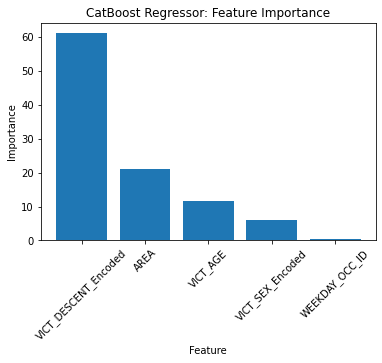

In [28]:
# Get feature importance
feature_importance = best_cat_model.get_feature_importance(prettified=True, type='PredictionValuesChange')

# Plotting feature importance
feature_names = feature_importance['Feature Id']
importance_values = feature_importance['Importances']
plt.bar(range(len(feature_names)), importance_values)
plt.xticks(range(len(feature_names)), feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Regressor: Feature Importance')
plt.show()

Desicion-Tree Regressor

In [30]:

from sklearn.tree import DecisionTreeRegressor



start_time = time.time()
current_time = datetime.now()
print('Started at:', current_time.strftime("%H:%M:%S"))
print('----------------------------------')

# Define the parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}


dt_model = DecisionTreeRegressor()


dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

# Extract the best parameters and model
best_params = dt_grid_search.best_params_
best_dt_model = dt_grid_search.best_estimator_

# Predictions
dt_pred = best_dt_model.predict(X_test)

# Evaluation
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

# Cross-Validation Scores
dt_cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dt_cv_scores_positive = -dt_cv_scores

# Print results
print("Best parameters for Decision Tree:", best_params)
print("Decision Tree Evaluation Metrics:")
print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)
print("Mean Absolute Error:", dt_mae)
print("R^2 Score:", dt_r2)
print("CV Scores (Mean Squared Error):", dt_cv_scores_positive)
print("Average CV Score:", np.mean(dt_cv_scores_positive))

# Calculate elapsed time
print('----------------------------------')
elapsed_time = (time.time() - start_time) / 60
print("Elapsed time: {:.2f} minutes".format(elapsed_time))


Started at: 15:41:06
----------------------------------
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Evaluation Metrics:
Mean Squared Error: 4586.686055261758
Root Mean Squared Error: 67.72507700447271
Mean Absolute Error: 9.33745759329475
R^2 Score: -0.01664850949163288
CV Scores (Mean Squared Error): [35.6193953  34.38828017 80.59388637 37.51918788 36.81070784]
Average CV Score: 44.98629151028816
----------------------------------
Elapsed time: 0.47 minutes


In [32]:
results['Model'].append('DecisionTree')
results['MAE'].append(dt_mae)
results['MSE'].append(dt_mse)
results['RMSE'].append(dt_rmse)
results['Rsquared'].append(dt_r2)
results['CVScore'].append(np.mean(dt_cv_scores_positive))
predictions['DecisionTree'] = dt_pred

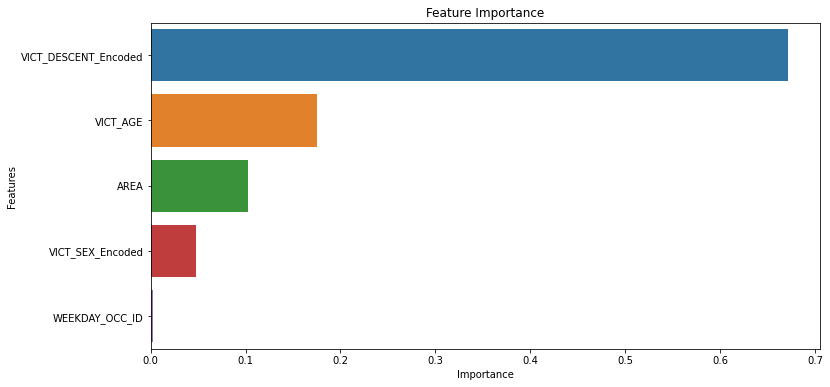

In [33]:
# Visualize Feature Importance
feature_importance = best_dt_model.feature_importances_
feature_names = X_train.columns  # Adjust this based on your feature names

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance[indices], y=feature_names[indices])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

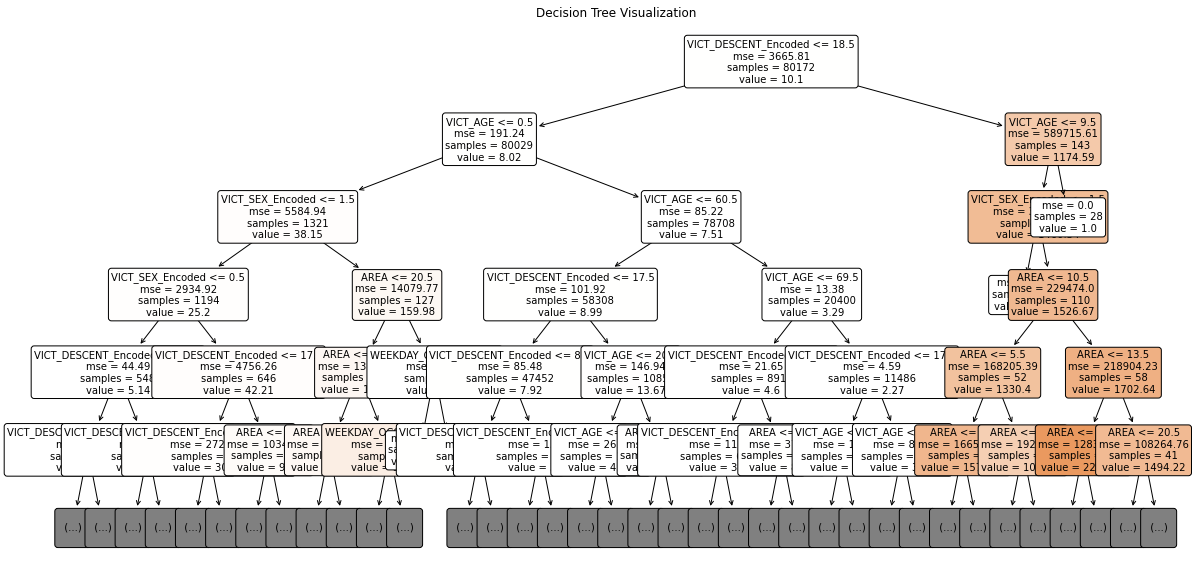

In [36]:
from sklearn.tree import plot_tree

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10, precision=2,max_depth=5)
plt.title('Decision Tree Visualization')
plt.show()

### 4.4.Comparison on the models

In [37]:
results

{'Model': ['LinearRegression',
  'RandomForest',
  'XGBoost',
  'CatBoost',
  'DecisionTree'],
 'MAE': [15.336831315802572,
  9.594796946717222,
  14.878010856842975,
  10.457143447271601,
  9.33745759329475],
 'MSE': [4441.801216837647,
  4163.596115071841,
  5330.602370835773,
  4806.356063909416,
  4586.686055261758],
 'RMSE': [66.64683951124499,
  64.52593366292224,
  73.01097431780906,
  69.32788806756929,
  67.72507700447271],
 'Rsquared': [0.015465516464608808,
  0.07713025624306147,
  -0.18153910900131964,
  -0.06533882406318714,
  -0.01664850949163288],
 'CVScore': [3553.6950436148654,
  44.122059180231716,
  41.85203748926827,
  41.85203748926827,
  44.98629151028816]}

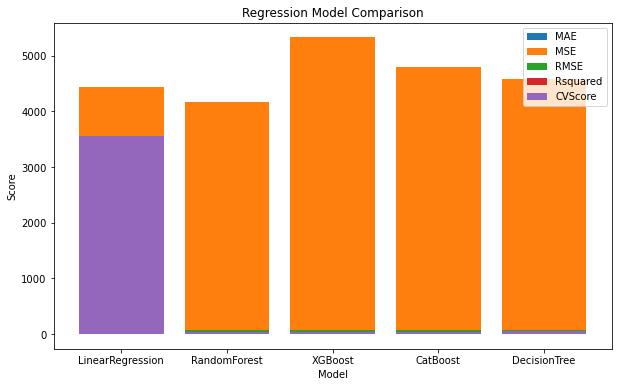

In [38]:
# Visualizations
# 1. Bar chart of model scores
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['MAE'], label='MAE')
plt.bar(results['Model'], results['MSE'], label='MSE')
plt.bar(results['Model'], results['RMSE'], label='RMSE')
plt.bar(results['Model'], results['Rsquared'], label='Rsquared')
plt.bar(results['Model'], results['CVScore'], label='CVScore')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Regression Model Comparison')
plt.legend()
plt.show()

<b>Based on these metrics, RandomForest seems to perform the best overall, with the lowest MAE, MSE, RMSE, and a relatively higher R-squared compared to the other models. It also has a lower cross-validated score, indicating better generalization. </b>

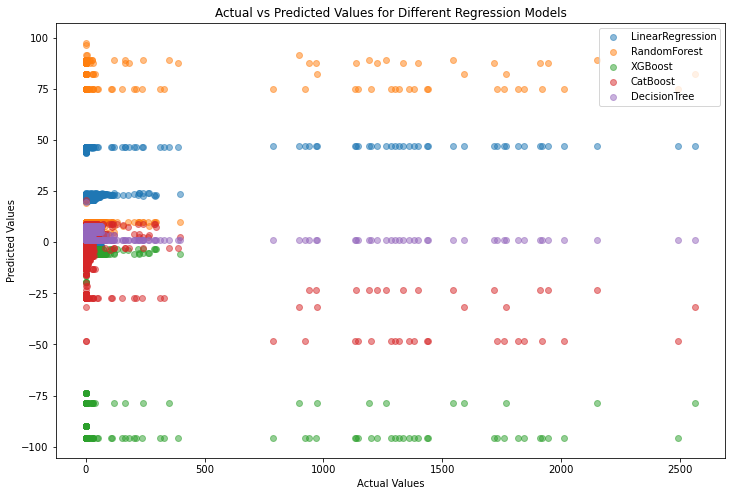

In [39]:
# 2. Scatter plot of actual vs predicted values for each model
plt.figure(figsize=(12, 8))
for name, y_pred in predictions.items():
    plt.scatter(y_test, y_pred, label=name, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Different Regression Models')
plt.legend()
plt.show()


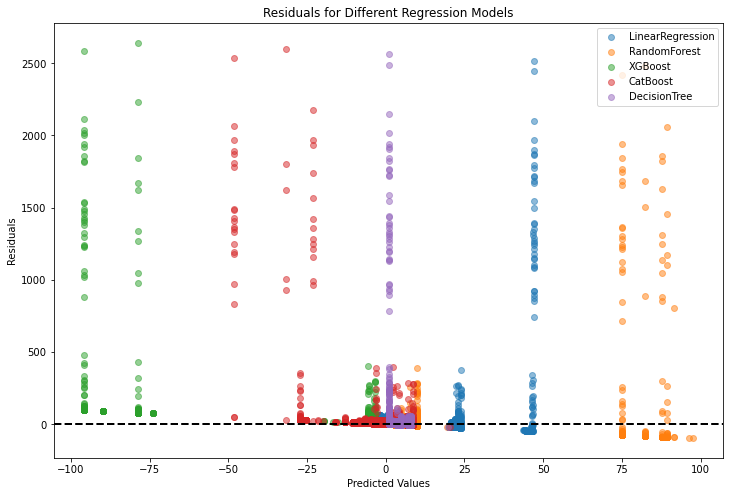

In [40]:
# 3. Residual plot for each model
plt.figure(figsize=(12, 8))
for name, y_pred in predictions.items():
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, label=name, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals for Different Regression Models')
plt.legend()
plt.show()

## 4.5.Final Model

<b>Model Validation</b>

Plotting learning curves, which is a great way to check for overfitting or underfitting.

In [42]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 20))  # fewer, larger steps



# Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

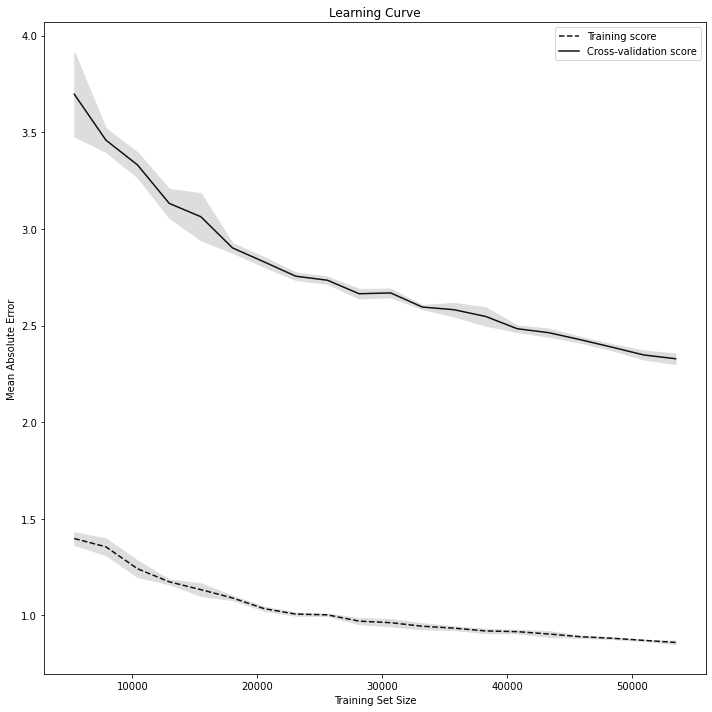

In [43]:
# Plot learning curves
plt.subplots(1, figsize=(10, 10))
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Mean Absolute Error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

The training score starts at a lower error and increases as the number of training instances increases. This is typical because models tend to perform very well on a small dataset but then start to generalize as the dataset grows, resulting in higher error rates on the training set.
</br>
The cross-validation score decreases as the number of training instances increases, which is expected because the model learns more from a larger dataset and therefore improves its performance on unseen data.
</br>
Overall, this learning curve suggests that the model could benefit from more training data to improve its generalization. 

<b>Final Model Training</b>

In [46]:

final_model = RandomForestRegressor()
final_model.version = '1.0'
final_model.pandas_version = pd.__version__
final_model.numpy_version = np.__version__
final_model.sklearn_version = sklearn_version
final_model.X_columns = [col for col in X_train.columns]
final_model.build_datetime = datetime.now
final_model.fit(np.vstack((X_train, X_test)), np.concatenate((y_train, y_test)))



RandomForestRegressor()

In [52]:
final_pred = final_model.predict(X)

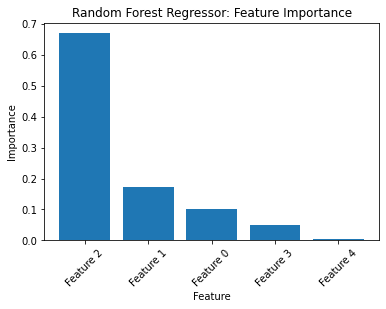

In [59]:
# Get feature importances from the trained model
final_fm = final_model.feature_importances_

# Get feature names (if available)
fn = [f"Feature {i}" for i in range(len(final_fm))]

# Sort features based on importance
si = np.argsort(feature_importances)[::-1]

# Plotting
plt.bar(range(len(final_fm)), feature_importances[si])
plt.xticks(range(len(feature_importances)), np.array(fn)[si], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Regressor: Feature Importance')
plt.show()

In [55]:
df_pred =X.copy()
df_pred['CRIME_Predicted'] = final_pred
df_pred['CRIME_Total'] = y

In [56]:
df_pred

,AREA,VICT_AGE,VICT_DESCENT_Encoded,VICT_SEX_Encoded,WEEKDAY_OCC_ID,CRIME_Predicted,CRIME_Total
53954,12,0,19,2,5,2687.65,2766
53953,12,0,19,2,4,2602.30,2689
53955,12,0,19,2,6,2672.08,2564
53949,12,0,19,2,0,2464.81,2528
57998,13,0,19,2,5,2485.37,2527
...,...,...,...,...,...,...,...
52398,11,59,13,0,4,1.23,1
52403,11,59,13,1,4,1.18,1
52405,11,59,16,1,1,1.00,1
52406,11,59,16,1,2,1.00,1


In [60]:
import pickle

save_modelfilepath = "../models/final_model_1.pkl"
with open(save_modelfilepath, 'wb') as file:
    pickle.dump([final_model], file)
    
preddata_filepath = "../data/processed/pred_raw_1.csv"
df_pred.to_csv(preddata_filepath, index=False) 